In [12]:
import os
import pandas as pd

# Define the root directory and an empty list to store sampling frequency information
root_dir = './'
sampling_data = []

# Define function to calculate sampling frequency
def calculate_sampling_frequency(file_path):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Ensure 'time_from_sync' column exists in the file
    if 'time_from_sync' in data.columns:
        # Calculate the time difference between consecutive samples
        time_diffs = data['time_from_sync'].diff().dropna()
        # Calculate sampling frequency as the inverse of the mean time difference
        if not time_diffs.empty:
            sampling_freq = 1 / time_diffs.mean()
        else:
            sampling_freq = None
    else:
        sampling_freq = None
    
    return sampling_freq

# Walk through the root directory to find each folder and process files within them
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    
    # Check if it’s a directory and follows the expected structure
    if os.path.isdir(folder_path):
        # Go through each sub-directory and file within the main folder
        for dirpath, _, filenames in os.walk(folder_path):
            for filename in filenames:
                if filename.endswith('.csv'):
                    file_path = os.path.join(dirpath, filename)
                    # Calculate sampling frequency for the current file
                    sampling_freq = calculate_sampling_frequency(file_path)
                    
                    # Extract sensor information from directory path
                    sensor = dirpath.split('/')[-1]
                    main_folder = folder_name
                    
                    # Store the result with clear folder, sensor, and file information
                    sampling_data.append({
                        'Main Folder': main_folder,
                        'Sensor': sensor,
                        'File Name': filename,
                        'File Path': file_path,
                        'Sampling Frequency (Hz)': sampling_freq
                    })

# Create a DataFrame from the collected sampling frequency data
sampling_df = pd.DataFrame(sampling_data)

# Display the DataFrame to ensure it’s understandable
sampling_df.head()

# Optionally save the DataFrame to a CSV for easier access later
sampling_df.to_csv('sampling_frequencies.csv', index=False)


In [13]:
sampling_df

Main Folder                             Sensor  \
0     007_Fast_stbd_turn_1           007_Fast_stbd_turn_1\GPS   
1     007_Fast_stbd_turn_1  007_Fast_stbd_turn_1\IMU\Sensor_3   
2     007_Fast_stbd_turn_1  007_Fast_stbd_turn_1\IMU\Sensor_3   
3     007_Fast_stbd_turn_1  007_Fast_stbd_turn_1\IMU\Sensor_3   
4     007_Fast_stbd_turn_1  007_Fast_stbd_turn_1\IMU\Sensor_3   
..                     ...                                ...   
138  015_Skirt_shift_turns    015_Skirt_shift_turns\Sensor_wb   
139  015_Skirt_shift_turns   015_Skirt_shift_turns\Sensor_wnb   
140  015_Skirt_shift_turns   015_Skirt_shift_turns\Sensor_wnb   
141  015_Skirt_shift_turns   015_Skirt_shift_turns\Sensor_wnb   
142  015_Skirt_shift_turns   015_Skirt_shift_turns\Sensor_wnb   

                           File Name  \
0       GPS_007_Fast_stbd_turn_1.csv   
1     accel_007_Fast_stbd_turn_1.csv   
2     angle_007_Fast_stbd_turn_1.csv   
3      gyro_007_Fast_stbd_turn_1.csv   
4       mag_007_Fast_stbd_turn_1.csv   
..                               ...   
138    mag_015_Skirt_shift_turns.csv   
139  accel_015_Skirt_shift_turns.csv   
140  angle_015_Skirt_shift_turns.csv   
141   gyro_015_Skirt_shift_turns.csv   
142    mag_015_Skirt_shift_turns.csv   

                                             File Path  \
0    ./007_Fast_stbd_turn_1\GPS\GPS_007_Fast_stbd_t...   
1    ./007_Fast_stbd_turn_1\IMU\Sensor_3\accel_007_...   
2    ./007_Fast_stbd_turn_1\IMU\Sensor_3\angle_007_...   
3    ./007_Fast_stbd_turn_1\IMU\Sensor_3\gyro_007_F...   
4    ./007_Fast_stbd_turn_1\IMU\Sensor_3\mag_007_Fa...   
..                                                 ...   
138  ./015_Skirt_shift_turns\Sensor_wb\mag_015_Skir...   
139  ./015_Skirt_shift_turns\Sensor_wnb\accel_015_S...   
140  ./015_Skirt_shift_turns\Sensor_wnb\angle_015_S...   
141  ./015_Skirt_shift_turns\Sensor_wnb\gyro_015_Sk...   
142  ./015_Skirt_shift_turns\Sensor_wnb\mag_015_Ski...   

     Sampling Frequency (Hz)  
0                   0.999992  
1                 200.000000  
2                 200.000000  
3                 200.000000  
4                 200.000000  
..                       ...  
138                12.903226  
139                99.538202  
140                99.538202  
141                99.538202  
142                99.538202  

[143 rows x 5 columns]

In [18]:
import os
import pandas as pd

# Define the root directory and an empty list to store sampling frequency information
root_dir = './'
sampling_data = []

# Define function to calculate sampling frequency
def calculate_sampling_frequency(file_path):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Ensure 'time_from_sync' column exists in the file
    if 'time_from_sync' in data.columns:
        # Calculate the time difference between consecutive samples
        time_diffs = data['time_from_sync'].diff().dropna()
        # Calculate sampling frequency as the inverse of the mean time difference
        if not time_diffs.empty:
            sampling_freq = 1 / time_diffs.mean()
        else:
            sampling_freq = None
    else:
        sampling_freq = None
    
    return sampling_freq

# Walk through the root directory to find each folder and process files within them
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    
    # Check if it’s a directory and follows the expected structure
    if os.path.isdir(folder_path):
        # Go through each sub-directory and file within the main folder
        for dirpath, _, filenames in os.walk(folder_path):
            for filename in filenames:
                if filename.endswith('.csv'):
                    file_path = os.path.join(dirpath, filename)
                    # Calculate sampling frequency for the current file
                    sampling_freq = calculate_sampling_frequency(file_path)
                    
                    # Extract main folder and sensor name information directly from folder names
                    main_folder = folder_name
                    sensor_name_path = dirpath.split('/')[-1]  # Sensor path in column B
                    
                    # Store the result with clear folder, sensor, and file information
                    sampling_data.append({
                        'Main Folder': main_folder,
                        'Sensor Name Path': sensor_name_path,
                        'File Name': filename,
                        'File Path': file_path,
                        'Sampling Frequency (Hz)': sampling_freq
                    })

# Create a DataFrame from the collected sampling frequency data
sampling_df = pd.DataFrame(sampling_data)

# Add a new column that extracts the actual sensor name from the 'Sensor Name Path' column (mimicking your Excel formula)
sampling_df['Sensor Name'] = sampling_df['Sensor Name Path'].apply(lambda x: x.split('\\')[-1])

# Display the DataFrame to ensure it’s understandable
sampling_df.head()

# Optionally save the DataFrame to a CSV for easier access later
sampling_df.to_csv('sampling_frequencies.csv', index=False)


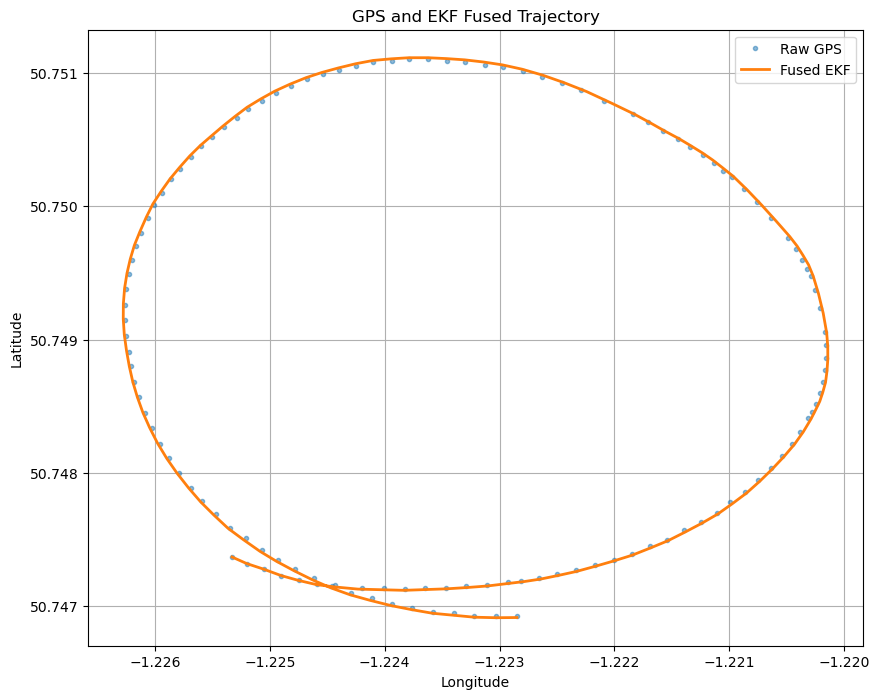

In [41]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '009_Fast_port_turn_1'
base_dir = f'{experiment_name}/'
sensor_name = 'wb'

# Define file paths
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')
imu_dir = os.path.join(base_dir, f'IMU/Sensor_{sensor_name}')
accel_file = os.path.join(imu_dir, f'accel_{experiment_name}.csv')
gyro_file = os.path.join(imu_dir, f'gyro_{experiment_name}.csv')

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
gps_df = pd.read_csv(gps_file, usecols=gps_columns)
log(f"GPS Data Loaded: {gps_df.shape[0]} rows")

# Load IMU data (Accelerometer and Gyroscope)
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
log("Loading IMU accelerometer data...")
accel_df = pd.read_csv(accel_file, usecols=imu_columns)
log(f"Accelerometer Data Loaded: {accel_df.shape[0]} rows")

log("Loading IMU gyroscope data...")
gyro_df = pd.read_csv(gyro_file, usecols=imu_columns)
log(f"Gyroscope Data Loaded: {gyro_df.shape[0]} rows")

# Check time_from_sync ranges
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

log("\nTime Range in IMU Accelerometer Data:")
log(f"Start: {accel_df['time_from_sync'].min()}, End: {accel_df['time_from_sync'].max()}")

log("\nTime Range in IMU Gyroscope Data:")
log(f"Start: {gyro_df['time_from_sync'].min()}, End: {gyro_df['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
accel_df['time_from_sync'] = pd.to_numeric(accel_df['time_from_sync'], errors='coerce')
gyro_df['time_from_sync'] = pd.to_numeric(gyro_df['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')
accel_df_sorted = accel_df.sort_values('time_from_sync')
gyro_df_sorted = gyro_df.sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data
log("\nMerging IMU Accelerometer and Gyroscope Data...")
imu_df = pd.merge_asof(
    accel_df_sorted,
    gyro_df_sorted,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05,  # Adjust tolerance as needed (in the same units as time_from_sync)
    suffixes=('_accel', '_gyro')
)
log(f"IMU Data After Merging: {imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
data_df = data_df.drop(index=data_df.index[0])
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# Define the state vector [E, N, V_E, V_N]
state = np.array([data_df.iloc[0]['E'],
                  data_df.iloc[0]['N'],
                  0,
                  0]).reshape(4,1)

# Define covariance matrices
P = np.eye(4) * 500  # Initial state covariance
Q = np.eye(4)        # Process noise covariance
R_gps = np.eye(2) * 10  # Measurement noise covariance for GPS
# R_imu is not used in this implementation

# Define identity matrix
I = np.eye(4)

# Store estimates
estimated_states = []

log("\nStarting Extended Kalman Filter (EKF) processing...")
# EKF Implementation
for idx in range(len(data_df)):
    row = data_df.iloc[idx]
    
    # Time step
    if idx == 0:
        dt = 0.01  # Assume initial dt (e.g., 100Hz)
    else:
        dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
        if dt <= 0:
            dt = 0.01  # Handle non-positive dt
    
    # State Transition Matrix
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # Control Input (from IMU: accelerometer data)
    # Assuming accel_x and accel_y are in m/s^2
    a_E = row['x_accel']  # Accelerometer x-axis
    a_N = row['y_accel']  # Accelerometer y-axis
    u = np.array([0.5 * a_E * dt**2,
                  0.5 * a_N * dt**2,
                  a_E * dt,
                  a_N * dt]).reshape(4,1)
    
    # Process model prediction
    state = F @ state + u
    P = F @ P @ F.T + Q
    
    # Measurement Update
    # GPS provides E and N
    z = np.array([row['E'], row['N']]).reshape(2,1)
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    
    y_innovation = z - H @ state  # Innovation
    S = H @ P @ H.T + R_gps
    K = P @ H.T @ np.linalg.inv(S)
    
    state = state + K @ y_innovation
    P = (I - K @ H) @ P
    
    # Store the estimated state
    estimated_states.append(state.flatten())
    
    # Optional: Print progress
    if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
        log(f"Processed {idx} rows...")

log("EKF processing completed.")

# Convert estimated states to DataFrame
estimated_states = np.array(estimated_states)
data_df['E_est'] = estimated_states[:,0]
data_df['N_est'] = estimated_states[:,1]

# Function to convert ENU back to lat/lon/alt
def enu_to_latlon(e, n, u):
    # Apply inverse rotation
    diff = np.array([e, n, u])
    ecef_diff = R.T @ diff
    # Compute ECEF coordinates
    x = ref_ecef[0] + ecef_diff[0]
    y = ref_ecef[1] + ecef_diff[1]
    z = ref_ecef[2] + ecef_diff[2]
    # Convert back to LLA
    lon, lat, alt = transformer_to_lla.transform(x, y, z)
    return lat, lon, alt

# Convert ENU back to lat/lon for plotting
log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
latlon_est = data_df.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
data_df['Lat_est'], data_df['Lng_est'], data_df['Alt_est'] = zip(*latlon_est)
log("Conversion completed.")

# Plotting
log("\nPlotting the trajectories...")
plt.figure(figsize=(10,8))
plt.plot(data_df['Lng'], data_df['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
plt.plot(data_df['Lng_est'], data_df['Lat_est'], label='Fused EKF', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS and EKF Fused Trajectory')
plt.legend()
plt.grid()
plt.show()



=== Difference Statistics ===

E_diff:
  Mean: 0.0783 meters
  Median: -0.2725 meters
  Std Dev: 1.1605 meters
  RMSE: 1.1586 meters
  Max Error: 4.3368 meters

N_diff:
  Mean: -0.0233 meters
  Median: -0.1441 meters
  Std Dev: 1.3873 meters
  RMSE: 1.3821 meters
  Max Error: 4.6329 meters

Total_Error:
  Mean: 1.6174 meters
  Median: 1.4491 meters
  Std Dev: 0.8010 meters
  RMSE: 1.8035 meters
  Max Error: 5.0474 meters


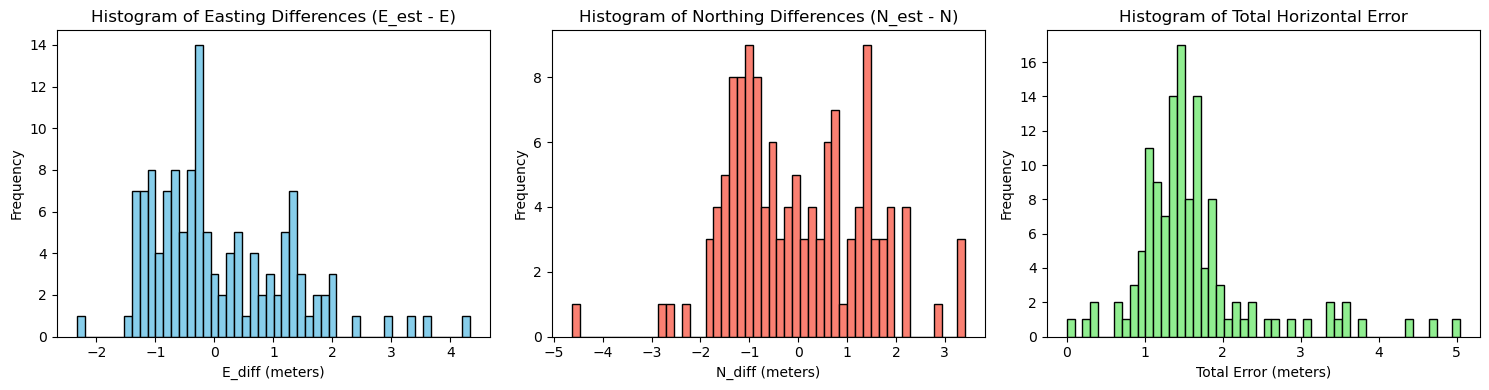

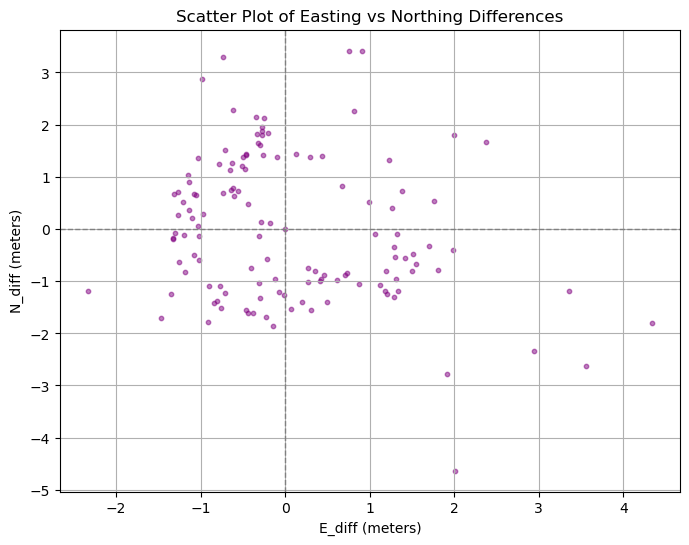

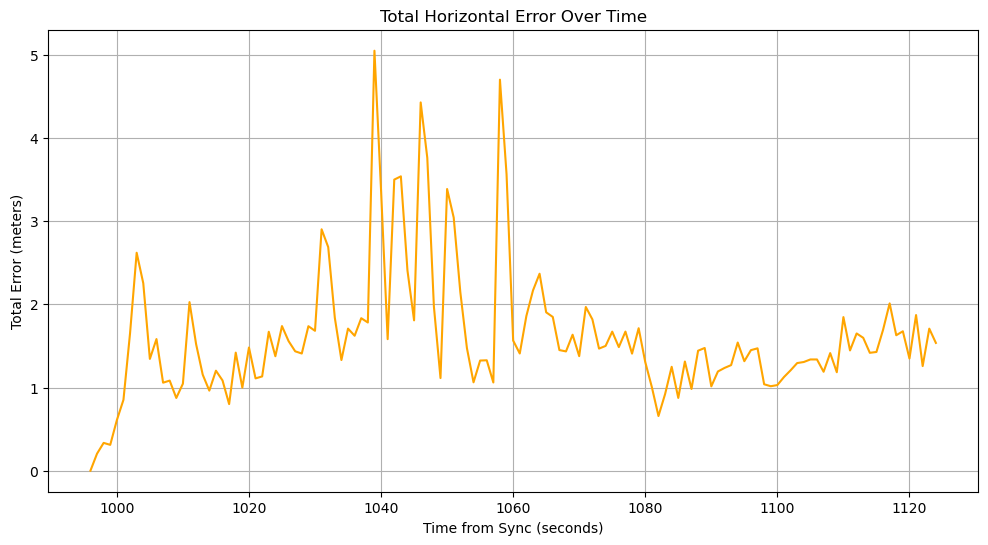

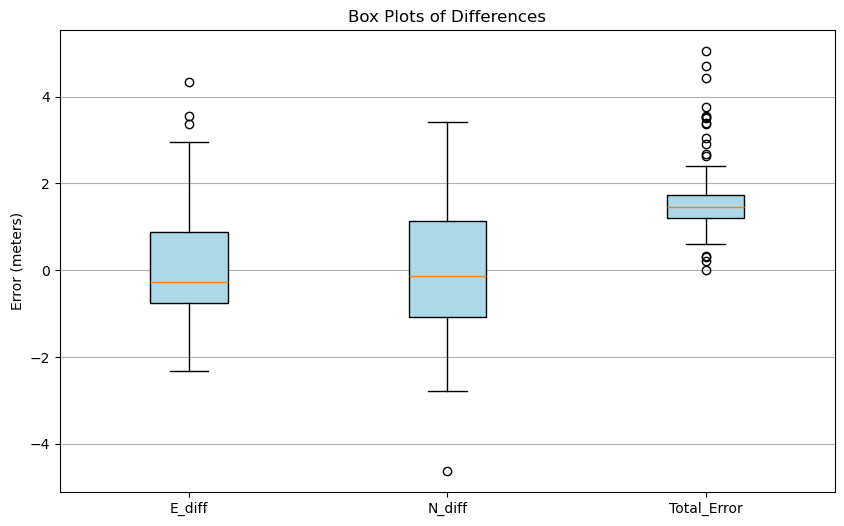

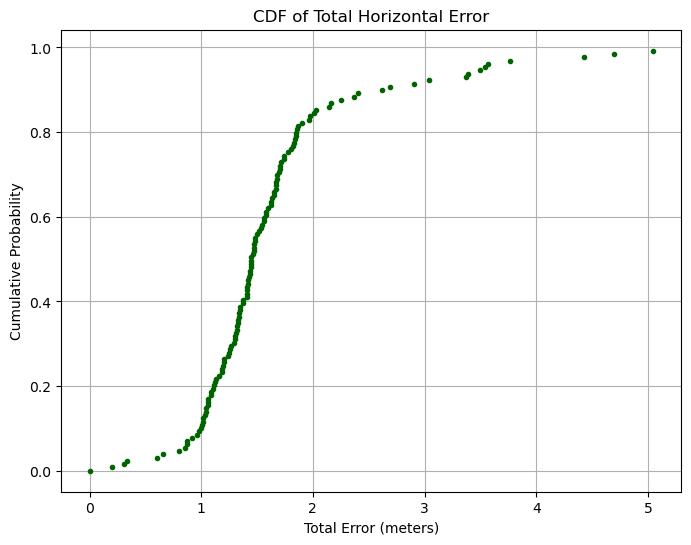

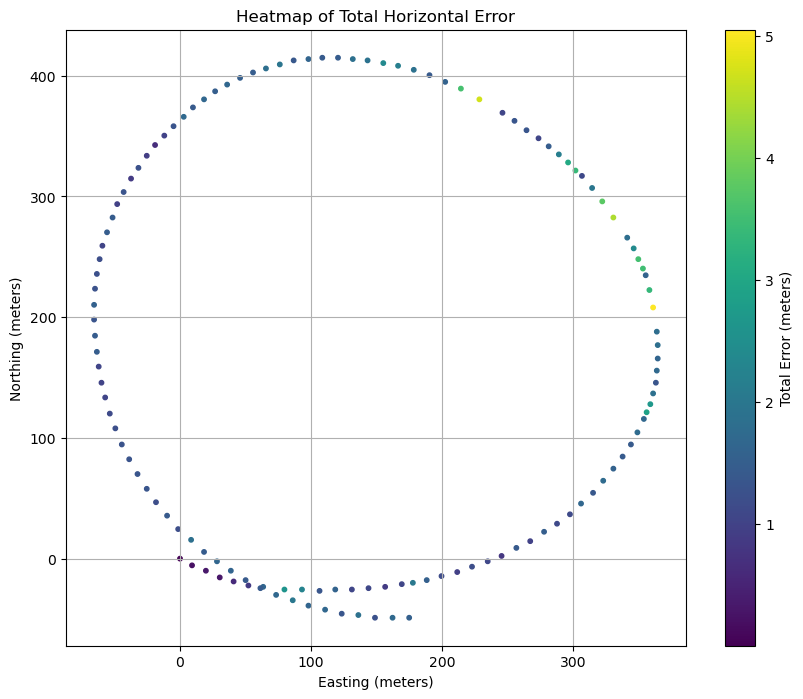

In [42]:
# ================== Difference Statistics and Visualization ==================

# Ensure that the necessary columns are present
required_columns = ['E', 'N', 'E_est', 'N_est']
for col in required_columns:
    if col not in data_df.columns:
        log(f"Error: Column '{col}' not found in data_df.")
        sys.exit(f"Terminating script due to missing column: {col}")

# Calculate differences in Easting and Northing
data_df['E_diff'] = data_df['E_est'] - data_df['E']
data_df['N_diff'] = data_df['N_est'] - data_df['N']

# Calculate total horizontal error
data_df['Total_Error'] = np.sqrt(data_df['E_diff']**2 + data_df['N_diff']**2)

# Compute statistics
statistics = {
    'E_diff': {
        'Mean': data_df['E_diff'].mean(),
        'Median': data_df['E_diff'].median(),
        'Std Dev': data_df['E_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['E_diff']**2)),
        'Max Error': data_df['E_diff'].abs().max()
    },
    'N_diff': {
        'Mean': data_df['N_diff'].mean(),
        'Median': data_df['N_diff'].median(),
        'Std Dev': data_df['N_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['N_diff']**2)),
        'Max Error': data_df['N_diff'].abs().max()
    },
    'Total_Error': {
        'Mean': data_df['Total_Error'].mean(),
        'Median': data_df['Total_Error'].median(),
        'Std Dev': data_df['Total_Error'].std(),
        'RMSE': np.sqrt(np.mean(data_df['Total_Error']**2)),
        'Max Error': data_df['Total_Error'].max()
    }
}

# Print statistics if printing is enabled
if PRINT_ENABLED:
    print("\n=== Difference Statistics ===")
    for key, stats in statistics.items():
        print(f"\n{key}:")
        for stat_name, value in stats.items():
            print(f"  {stat_name}: {value:.4f} meters")

# Alternatively, always print statistics
print("\n=== Difference Statistics ===")
for key, stats in statistics.items():
    print(f"\n{key}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f} meters")

# Visualization

# 1. Histograms of E_diff, N_diff, and Total_Error
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(data_df['E_diff'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Easting Differences (E_est - E)')
plt.xlabel('E_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data_df['N_diff'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Northing Differences (N_est - N)')
plt.xlabel('N_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data_df['Total_Error'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Scatter Plot of E_diff vs N_diff
plt.figure(figsize=(8, 6))
plt.scatter(data_df['E_diff'], data_df['N_diff'], alpha=0.5, s=10, c='purple')
plt.title('Scatter Plot of Easting vs Northing Differences')
plt.xlabel('E_diff (meters)')
plt.ylabel('N_diff (meters)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

# 3. Time Series of Total Error
plt.figure(figsize=(12, 6))
plt.plot(data_df['time_from_sync'], data_df['Total_Error'], color='orange')
plt.title('Total Horizontal Error Over Time')
plt.xlabel('Time from Sync (seconds)')
plt.ylabel('Total Error (meters)')
plt.grid(True)
plt.show()

# 4. Box Plots for E_diff, N_diff, and Total_Error
plt.figure(figsize=(10, 6))
box_data = [data_df['E_diff'], data_df['N_diff'], data_df['Total_Error']]
plt.boxplot(box_data, labels=['E_diff', 'N_diff', 'Total_Error'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Box Plots of Differences')
plt.ylabel('Error (meters)')
plt.grid(True, axis='y')
plt.show()

# 5. Cumulative Distribution Function (CDF) of Total Error
sorted_errors = np.sort(data_df['Total_Error'])
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none', color='darkgreen')
plt.title('CDF of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# 6. Error Heatmap (Optional)
# If you want to visualize the spatial distribution of errors
plt.figure(figsize=(10, 8))
sc = plt.scatter(data_df['E'], data_df['N'], c=data_df['Total_Error'], cmap='viridis', s=10)
plt.colorbar(sc, label='Total Error (meters)')
plt.title('Heatmap of Total Horizontal Error')
plt.xlabel('Easting (meters)')
plt.ylabel('Northing (meters)')
plt.grid(True)
plt.show()


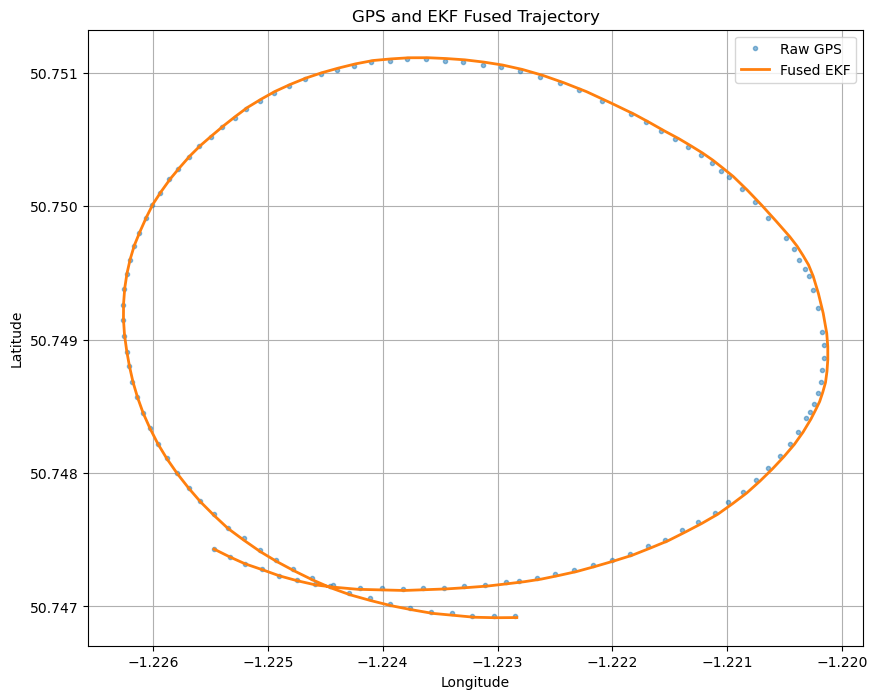


=== Difference Statistics ===

E_diff:
  Mean: 1.3133 meters
  Median: 0.9710 meters
  Std Dev: 1.1790 meters
  RMSE: 1.7618 meters
  Max Error: 5.5243 meters

N_diff:
  Mean: -0.1149 meters
  Median: -0.3365 meters
  Std Dev: 1.3727 meters
  RMSE: 1.3722 meters
  Max Error: 4.7250 meters

Total_Error:
  Mean: 1.9042 meters
  Median: 1.8442 meters
  Std Dev: 1.1711 meters
  RMSE: 2.2331 meters
  Max Error: 5.8253 meters


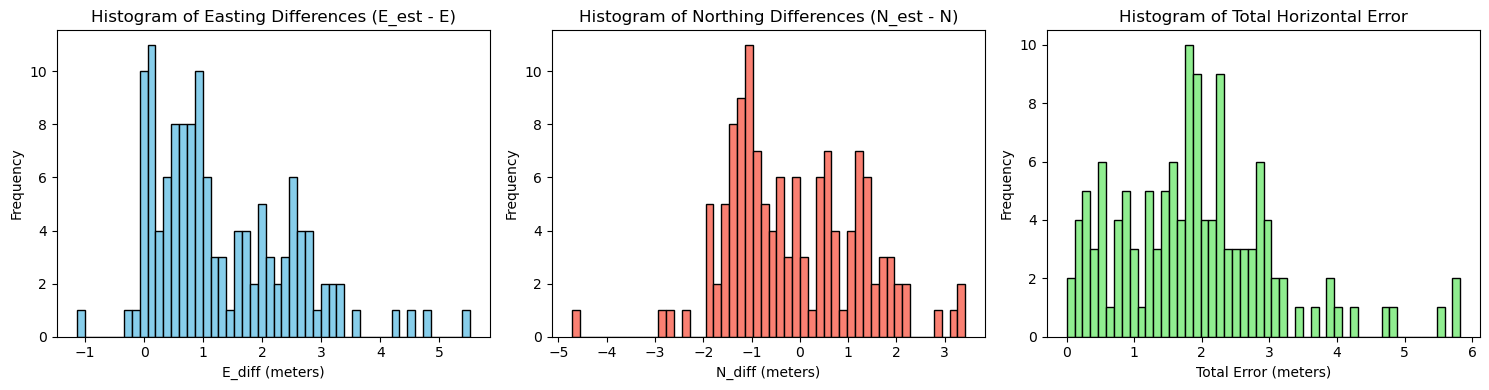

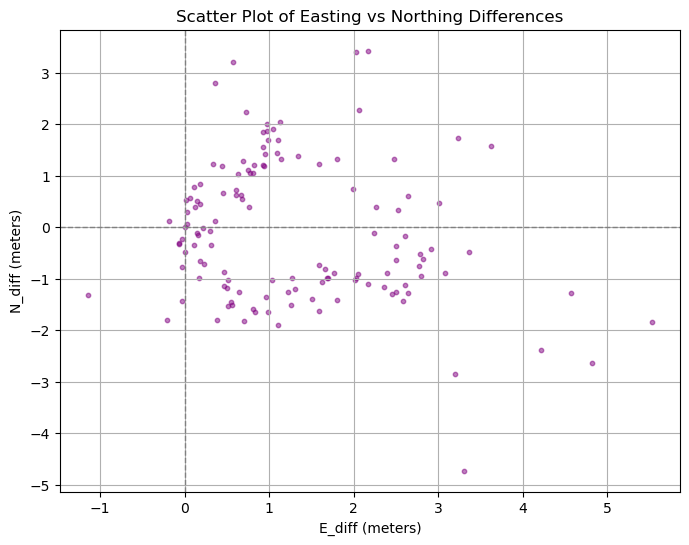

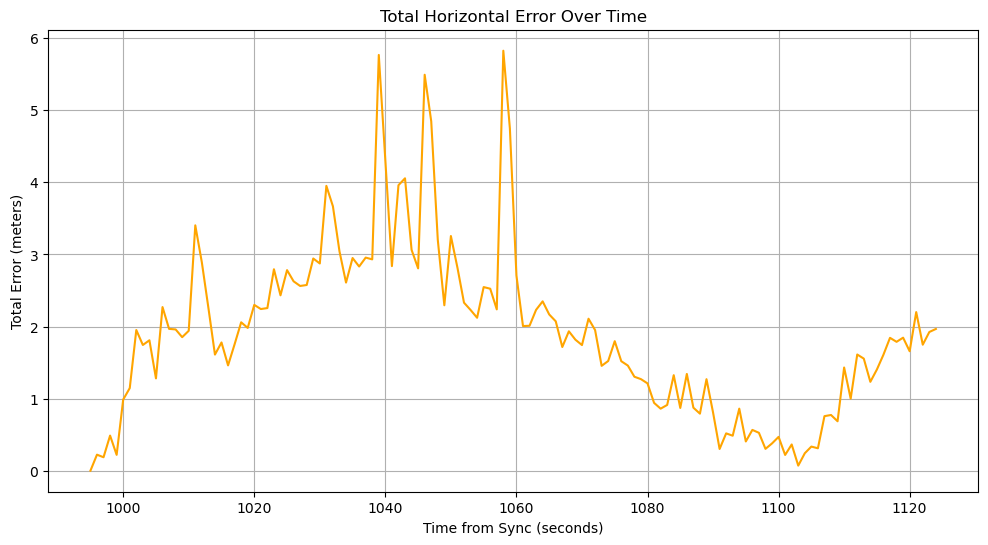

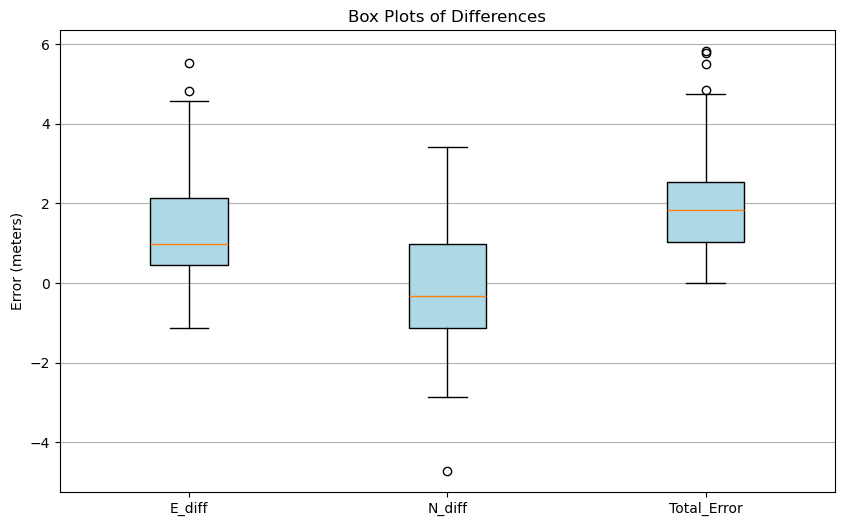

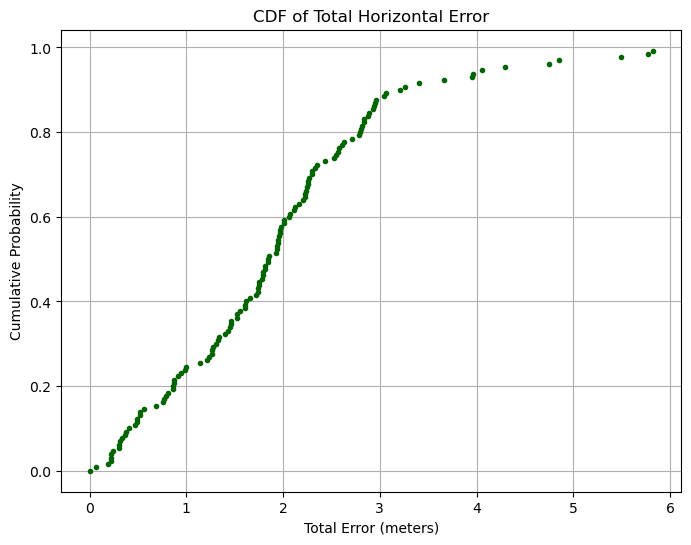

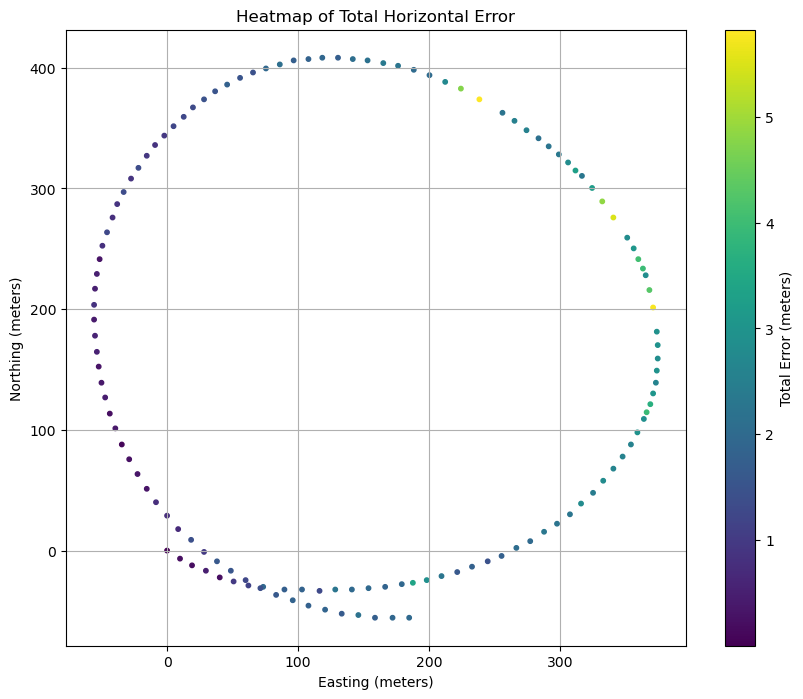

In [45]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '009_Fast_port_turn_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # === Modified ===

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
gps_df = pd.read_csv(gps_file, usecols=gps_columns)
log(f"GPS Data Loaded: {gps_df.shape[0]} rows")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    log(f"Loading IMU accelerometer data from {sensor}...")
    accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
    log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    
    log(f"Loading IMU gyroscope data from {sensor}...")
    gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
    log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    # merged_imu = merged_imu.dropna()
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
# combined_imu_df = combined_imu_df.dropna()
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# Aggregate Accelerometer Data from All Sensors
log("\nAggregating accelerometer data from all sensors...")
accel_columns = [f'x_accel_{sensor}' for sensor in sensor_names] + \
                [f'y_accel_{sensor}' for sensor in sensor_names] + \
                [f'z_accel_{sensor}' for sensor in sensor_names]

# Compute average accelerations
data_df['x_accel_avg'] = data_df[[f'x_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
data_df['y_accel_avg'] = data_df[[f'y_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
data_df['z_accel_avg'] = data_df[[f'z_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
log("Aggregated accelerometer data computed.")

# Define the state vector [E, N, V_E, V_N]
state = np.array([data_df.iloc[0]['E'],
                  data_df.iloc[0]['N'],
                  0,
                  0]).reshape(4,1)

# Define covariance matrices
P = np.eye(4) * 500  # Initial state covariance
Q = np.eye(4)        # Process noise covariance
R_gps = np.eye(2) * 10  # Measurement noise covariance for GPS
# R_imu is not used in this implementation

# Define identity matrix
I = np.eye(4)

# Store estimates
estimated_states = []

log("\nStarting Extended Kalman Filter (EKF) processing with aggregated IMU data...")
# EKF Implementation
for idx in range(len(data_df)):
    row = data_df.iloc[idx]
    
    # Time step
    if idx == 0:
        dt = 0.01  # Assume initial dt (e.g., 100Hz)
    else:
        dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
        if dt <= 0:
            dt = 0.01  # Handle non-positive dt
    
    # State Transition Matrix
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # Control Input (from aggregated IMU: average accelerometer data)
    # Assuming accel_x_avg and accel_y_avg are in m/s^2
    a_E = row['x_accel_avg']  # Aggregated accelerometer x-axis
    a_N = row['y_accel_avg']  # Aggregated accelerometer y-axis
    u = np.array([0.5 * a_E * dt**2,
                  0.5 * a_N * dt**2,
                  a_E * dt,
                  a_N * dt]).reshape(4,1)
    
    # Process model prediction
    state = F @ state + u
    P = F @ P @ F.T + Q
    
    # Measurement Update
    # GPS provides E and N
    z = np.array([row['E'], row['N']]).reshape(2,1)
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    
    y_innovation = z - H @ state  # Innovation
    S = H @ P @ H.T + R_gps
    K = P @ H.T @ np.linalg.inv(S)
    
    state = state + K @ y_innovation
    P = (I - K @ H) @ P
    
    # Store the estimated state
    estimated_states.append(state.flatten())
    
    # Optional: Print progress
    if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
        log(f"Processed {idx} rows...")

log("EKF processing completed.")

# Convert estimated states to DataFrame
estimated_states = np.array(estimated_states)
data_df['E_est'] = estimated_states[:,0]
data_df['N_est'] = estimated_states[:,1]

# Function to convert ENU back to lat/lon/alt
def enu_to_latlon(e, n, u):
    # Apply inverse rotation
    diff = np.array([e, n, u])
    ecef_diff = R.T @ diff
    # Compute ECEF coordinates
    x = ref_ecef[0] + ecef_diff[0]
    y = ref_ecef[1] + ecef_diff[1]
    z = ref_ecef[2] + ecef_diff[2]
    # Convert back to LLA
    lon, lat, alt = transformer_to_lla.transform(x, y, z)
    return lat, lon, alt

# Convert ENU back to lat/lon for plotting
log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
latlon_est = data_df.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
data_df['Lat_est'], data_df['Lng_est'], data_df['Alt_est'] = zip(*latlon_est)
log("Conversion completed.")

# Plotting
log("\nPlotting the trajectories...")
plt.figure(figsize=(10,8))
plt.plot(data_df['Lng'], data_df['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
plt.plot(data_df['Lng_est'], data_df['Lat_est'], label='Fused EKF', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS and EKF Fused Trajectory')
plt.legend()
plt.grid()
plt.show()

# ================== Difference Statistics and Visualization ==================

# Ensure that the necessary columns are present
required_columns = ['E', 'N', 'E_est', 'N_est']
for col in required_columns:
    if col not in data_df.columns:
        log(f"Error: Column '{col}' not found in data_df.")
        sys.exit(f"Terminating script due to missing column: {col}")

# Calculate differences in Easting and Northing
data_df['E_diff'] = data_df['E_est'] - data_df['E']
data_df['N_diff'] = data_df['N_est'] - data_df['N']

# Calculate total horizontal error
data_df['Total_Error'] = np.sqrt(data_df['E_diff']**2 + data_df['N_diff']**2)

# Compute statistics
statistics = {
    'E_diff': {
        'Mean': data_df['E_diff'].mean(),
        'Median': data_df['E_diff'].median(),
        'Std Dev': data_df['E_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['E_diff']**2)),
        'Max Error': data_df['E_diff'].abs().max()
    },
    'N_diff': {
        'Mean': data_df['N_diff'].mean(),
        'Median': data_df['N_diff'].median(),
        'Std Dev': data_df['N_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['N_diff']**2)),
        'Max Error': data_df['N_diff'].abs().max()
    },
    'Total_Error': {
        'Mean': data_df['Total_Error'].mean(),
        'Median': data_df['Total_Error'].median(),
        'Std Dev': data_df['Total_Error'].std(),
        'RMSE': np.sqrt(np.mean(data_df['Total_Error']**2)),
        'Max Error': data_df['Total_Error'].max()
    }
}

# Print statistics if printing is enabled
if PRINT_ENABLED:
    print("\n=== Difference Statistics ===")
    for key, stats in statistics.items():
        print(f"\n{key}:")
        for stat_name, value in stats.items():
            print(f"  {stat_name}: {value:.4f} meters")

# Alternatively, always print statistics
print("\n=== Difference Statistics ===")
for key, stats in statistics.items():
    print(f"\n{key}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f} meters")

# Visualization

# 1. Histograms of E_diff, N_diff, and Total_Error
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(data_df['E_diff'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Easting Differences (E_est - E)')
plt.xlabel('E_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data_df['N_diff'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Northing Differences (N_est - N)')
plt.xlabel('N_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data_df['Total_Error'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Scatter Plot of E_diff vs N_diff
plt.figure(figsize=(8, 6))
plt.scatter(data_df['E_diff'], data_df['N_diff'], alpha=0.5, s=10, c='purple')
plt.title('Scatter Plot of Easting vs Northing Differences')
plt.xlabel('E_diff (meters)')
plt.ylabel('N_diff (meters)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

# 3. Time Series of Total Error
plt.figure(figsize=(12, 6))
plt.plot(data_df['time_from_sync'], data_df['Total_Error'], color='orange')
plt.title('Total Horizontal Error Over Time')
plt.xlabel('Time from Sync (seconds)')
plt.ylabel('Total Error (meters)')
plt.grid(True)
plt.show()

# 4. Box Plots for E_diff, N_diff, and Total_Error
plt.figure(figsize=(10, 6))
box_data = [data_df['E_diff'], data_df['N_diff'], data_df['Total_Error']]
plt.boxplot(box_data, labels=['E_diff', 'N_diff', 'Total_Error'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Box Plots of Differences')
plt.ylabel('Error (meters)')
plt.grid(True, axis='y')
plt.show()

# 5. Cumulative Distribution Function (CDF) of Total Error
sorted_errors = np.sort(data_df['Total_Error'])
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none', color='darkgreen')
plt.title('CDF of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# 6. Error Heatmap (Optional)
# If you want to visualize the spatial distribution of errors
plt.figure(figsize=(10, 8))
sc = plt.scatter(data_df['E'], data_df['N'], c=data_df['Total_Error'], cmap='viridis', s=10)
plt.colorbar(sc, label='Total Error (meters)')
plt.title('Heatmap of Total Horizontal Error')
plt.xlabel('Easting (meters)')
plt.ylabel('Northing (meters)')
plt.grid(True)
plt.show()


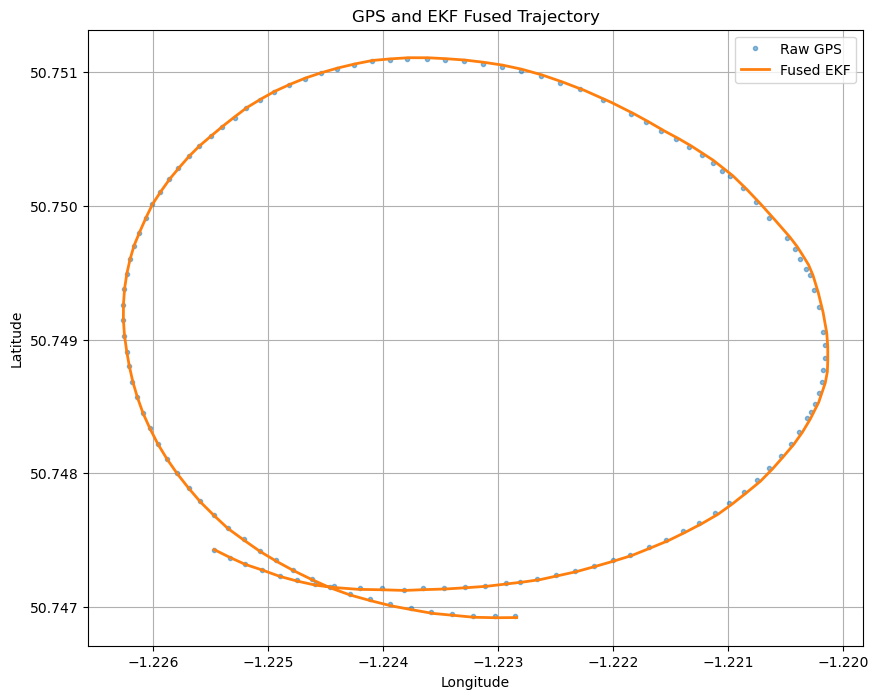

C:\Users\ben\AppData\Local\Temp\ipykernel_4448\3002737268.py:378: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PDOP': data_df.groupby('PDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
C:\Users\ben\AppData\Local\Temp\ipykernel_4448\3002737268.py:379: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'HDOP': data_df.groupby('HDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
C:\Users\ben\AppData\Local\Temp\ipykernel_4448\3002737268.py:380: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pand


=== Difference Statistics ===

E_diff:
  Mean: 0.9199 meters
  Median: 0.5965 meters
  Std Dev: 0.9208 meters
  RMSE: 1.2990 meters
  Max Error: 5.4988 meters

N_diff:
  Mean: -0.1024 meters
  Median: -0.2162 meters
  Std Dev: 1.0534 meters
  RMSE: 1.0543 meters
  Max Error: 4.0009 meters

Total_Error:
  Mean: 1.3611 meters
  Median: 1.2318 meters
  Std Dev: 0.9766 meters
  RMSE: 1.6731 meters
  Max Error: 5.8431 meters

=== DOP-based Error Statistics ===

PDOP-based Total Error:
  PDOP_bin      mean    median       std  count
0      0-5  1.361121  1.231784  0.976644    130
1     5-10       NaN       NaN       NaN      0
2    10-15       NaN       NaN       NaN      0
3    15-20       NaN       NaN       NaN      0
4      20+       NaN       NaN       NaN      0

HDOP-based Total Error:
  HDOP_bin      mean    median       std  count
0      0-5  1.361121  1.231784  0.976644    130
1     5-10       NaN       NaN       NaN      0
2    10-15       NaN       NaN       NaN      0
3    15-2

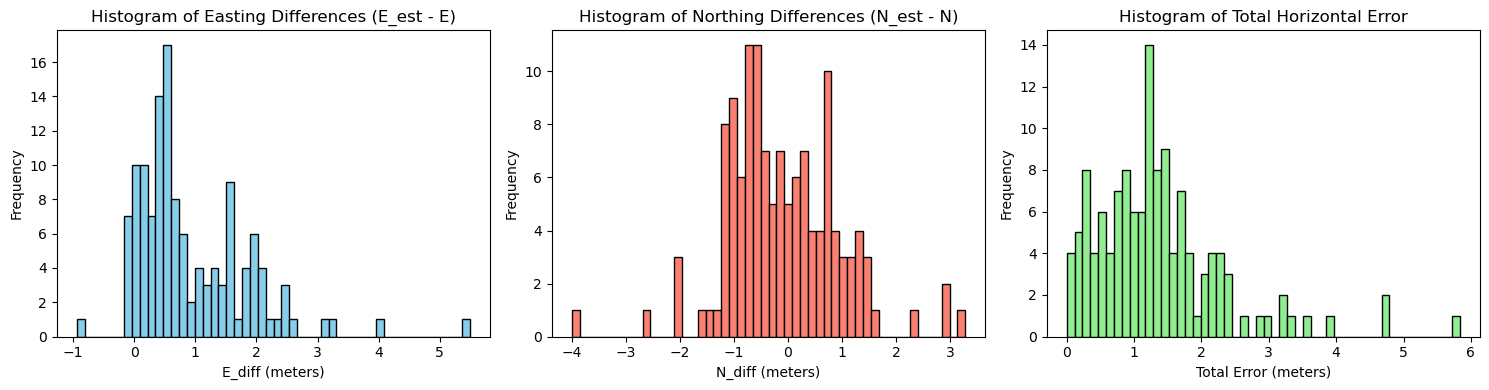

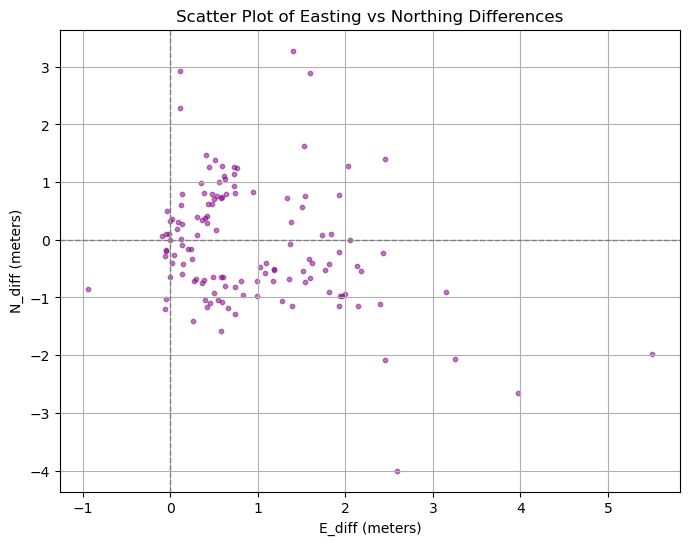

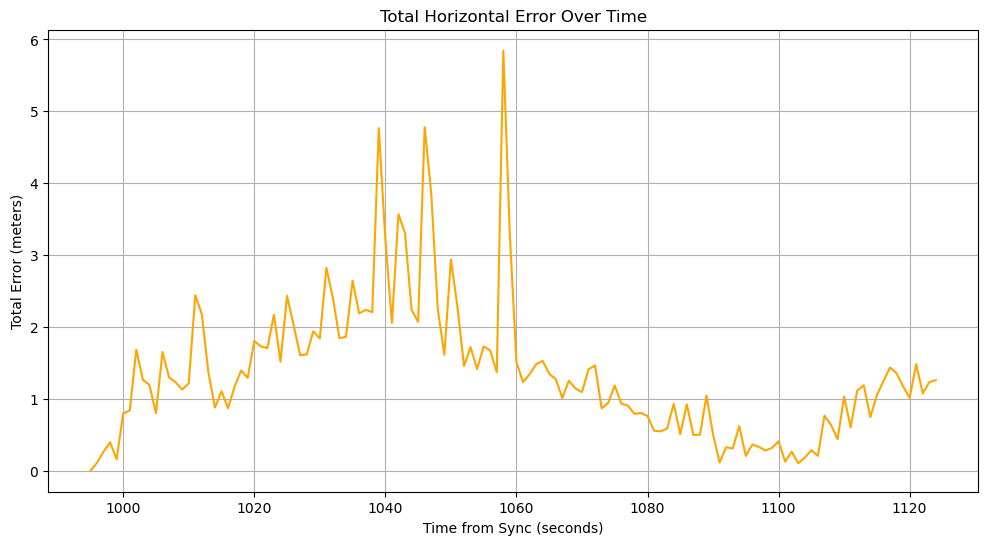

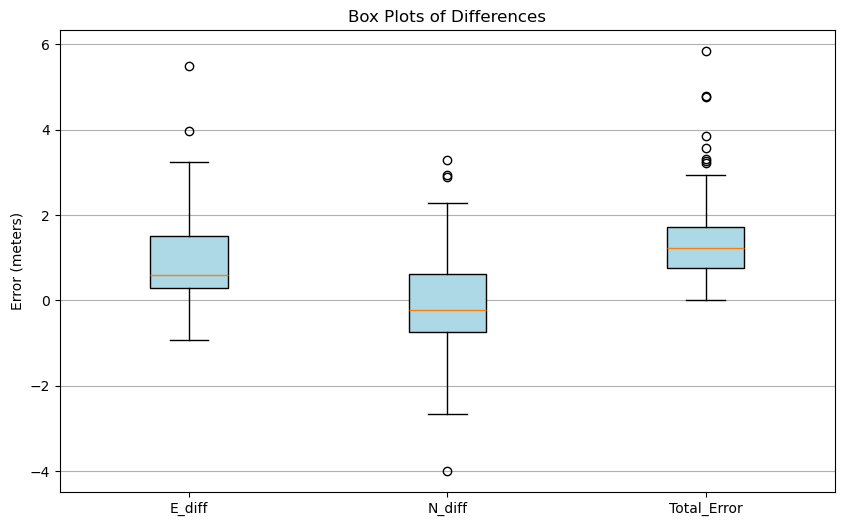

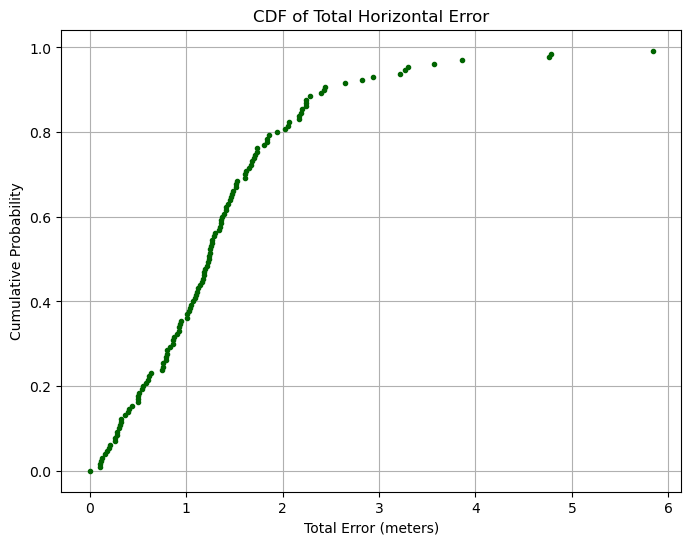

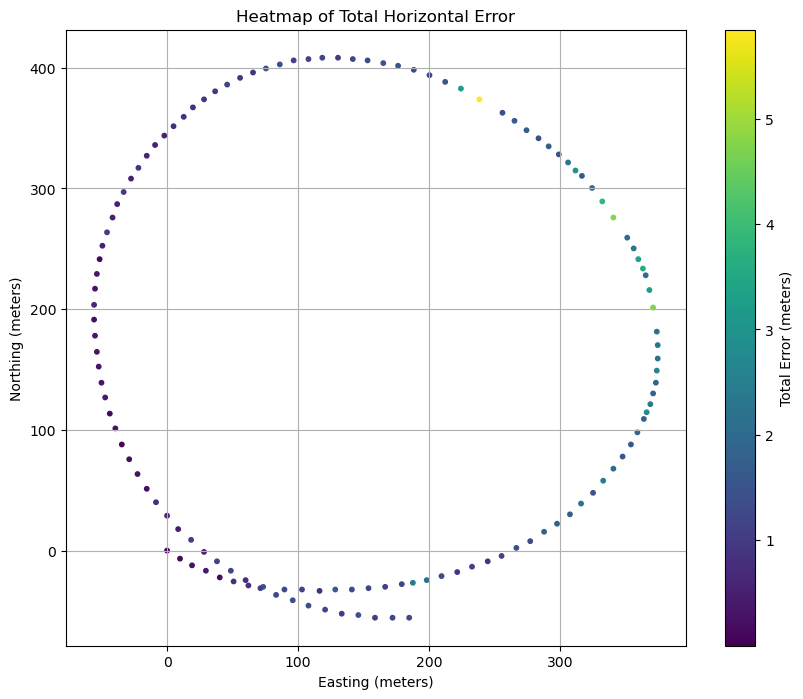

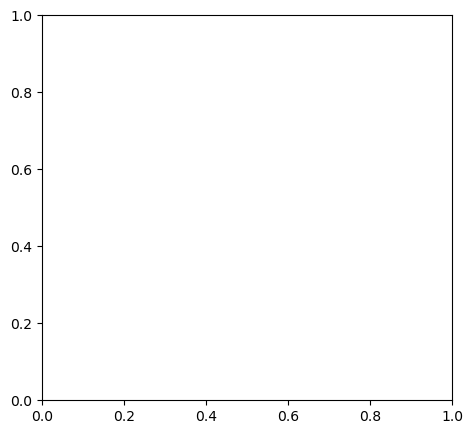

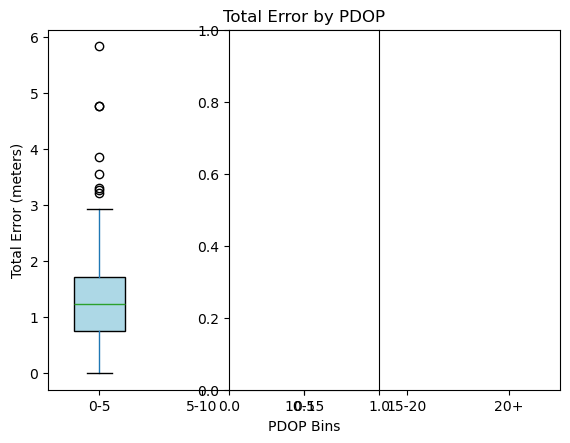

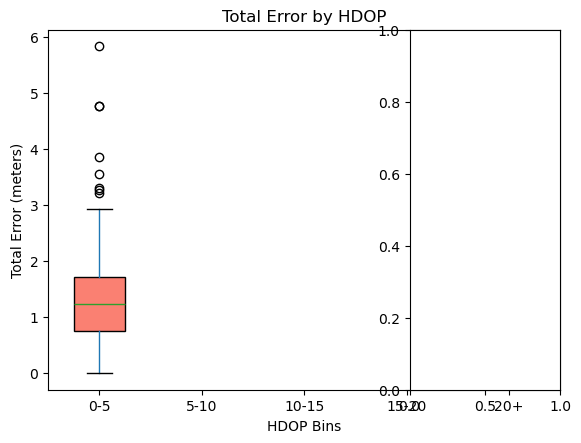

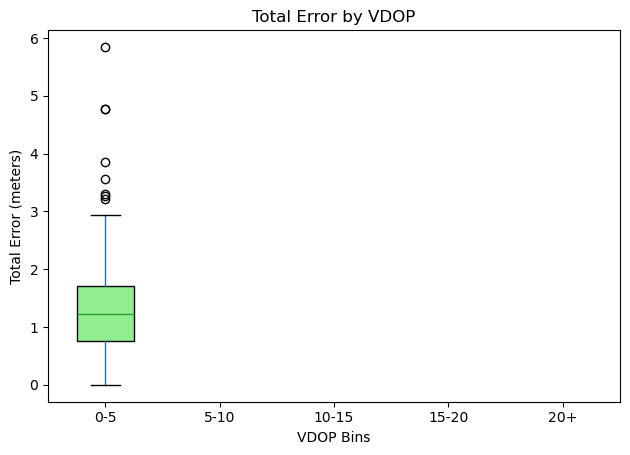

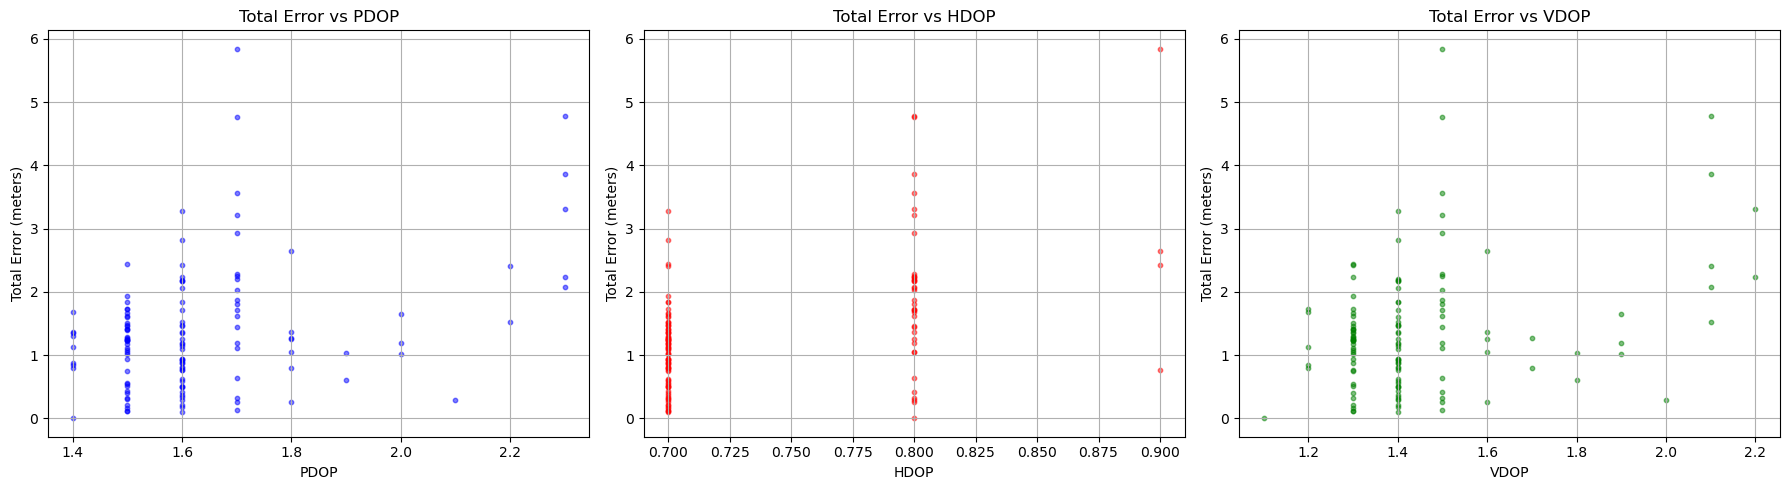

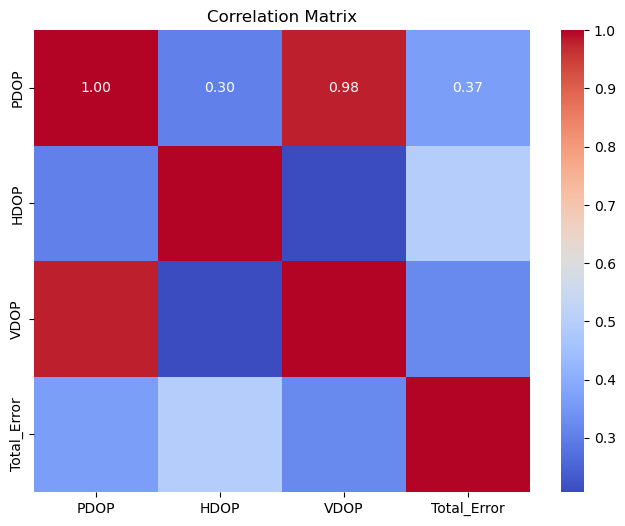

In [47]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '009_Fast_port_turn_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']

# === Modified ===

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
gps_df = pd.read_csv(gps_file, usecols=gps_columns)
log(f"GPS Data Loaded: {gps_df.shape[0]} rows")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    log(f"Loading IMU accelerometer data from {sensor}...")
    accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
    log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    
    log(f"Loading IMU gyroscope data from {sensor}...")
    gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
    log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    # merged_imu = merged_imu.dropna()
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
# combined_imu_df = combined_imu_df.dropna()
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# Aggregate Accelerometer Data from All Sensors
log("\nAggregating accelerometer data from all sensors...")
accel_columns = [f'x_accel_{sensor}' for sensor in sensor_names] + \
                [f'y_accel_{sensor}' for sensor in sensor_names] + \
                [f'z_accel_{sensor}' for sensor in sensor_names]

# Compute average accelerations
data_df['x_accel_avg'] = data_df[[f'x_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
data_df['y_accel_avg'] = data_df[[f'y_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
data_df['z_accel_avg'] = data_df[[f'z_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
log("Aggregated accelerometer data computed.")

# Define the state vector [E, N, V_E, V_N]
state = np.array([data_df.iloc[0]['E'],
                  data_df.iloc[0]['N'],
                  0,
                  0]).reshape(4,1)

# Define covariance matrices
P = np.eye(4) * 500  # Initial state covariance
Q = np.eye(4)        # Process noise covariance
# R_gps will be dynamically set based on HDOP ( === Modified === )
# R_imu is not used in this implementation

# Define identity matrix
I = np.eye(4)

# Store estimates
estimated_states = []

# === Added ===
# Base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy
# === End of Added ===

log("\nStarting Extended Kalman Filter (EKF) processing with aggregated IMU data and DOP incorporation...")
# EKF Implementation
for idx in range(len(data_df)):
    row = data_df.iloc[idx]
    
    # Time step
    if idx == 0:
        dt = 0.01  # Assume initial dt (e.g., 100Hz)
    else:
        dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
        if dt <= 0:
            dt = 0.01  # Handle non-positive dt
    
    # State Transition Matrix
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # Control Input (from aggregated IMU: average accelerometer data)
    # Assuming accel_x_avg and accel_y_avg are in m/s^2
    a_E = row['x_accel_avg']  # Aggregated accelerometer x-axis
    a_N = row['y_accel_avg']  # Aggregated accelerometer y-axis
    u = np.array([0.5 * a_E * dt**2,
                  0.5 * a_N * dt**2,
                  a_E * dt,
                  a_N * dt]).reshape(4,1)
    
    # Process model prediction
    state = F @ state + u
    P = F @ P @ F.T + Q
    
    # === Modified ===
    # Dynamically set R_gps based on HDOP
    # Assuming R_gps = (HDOP)^2 * R_base
    current_hdop = row['HDOP']
    R_gps = (current_hdop ** 2) * R_base
    # Alternatively, you can scale differently based on empirical data
    # R_gps = R_base * (1 + current_hdop)
    # === End of Modified ===
    
    # Measurement Update
    # GPS provides E and N
    z = np.array([row['E'], row['N']]).reshape(2,1)
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    
    y_innovation = z - H @ state  # Innovation
    S = H @ P @ H.T + R_gps
    K = P @ H.T @ np.linalg.inv(S)
    
    state = state + K @ y_innovation
    P = (I - K @ H) @ P
    
    # Store the estimated state
    estimated_states.append(state.flatten())
    
    # Optional: Print progress
    if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
        log(f"Processed {idx} rows...")

log("EKF processing completed.")

# Convert estimated states to DataFrame
estimated_states = np.array(estimated_states)
data_df['E_est'] = estimated_states[:,0]
data_df['N_est'] = estimated_states[:,1]

# Function to convert ENU back to lat/lon/alt
def enu_to_latlon(e, n, u):
    # Apply inverse rotation
    diff = np.array([e, n, u])
    ecef_diff = R.T @ diff
    # Compute ECEF coordinates
    x = ref_ecef[0] + ecef_diff[0]
    y = ref_ecef[1] + ecef_diff[1]
    z = ref_ecef[2] + ecef_diff[2]
    # Convert back to LLA
    lon, lat, alt = transformer_to_lla.transform(x, y, z)
    return lat, lon, alt

# Convert ENU back to lat/lon for plotting
log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
latlon_est = data_df.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
data_df['Lat_est'], data_df['Lng_est'], data_df['Alt_est'] = zip(*latlon_est)
log("Conversion completed.")

# Plotting
log("\nPlotting the trajectories...")
plt.figure(figsize=(10,8))
plt.plot(data_df['Lng'], data_df['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
plt.plot(data_df['Lng_est'], data_df['Lat_est'], label='Fused EKF', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS and EKF Fused Trajectory')
plt.legend()
plt.grid()
plt.show()

# ================== Difference Statistics and Visualization ==================

# Ensure that the necessary columns are present
required_columns = ['E', 'N', 'E_est', 'N_est', 'PDOP', 'HDOP', 'VDOP']
for col in required_columns:
    if col not in data_df.columns:
        log(f"Error: Column '{col}' not found in data_df.")
        sys.exit(f"Terminating script due to missing column: {col}")

# Calculate differences in Easting and Northing
data_df['E_diff'] = data_df['E_est'] - data_df['E']
data_df['N_diff'] = data_df['N_est'] - data_df['N']

# Calculate total horizontal error
data_df['Total_Error'] = np.sqrt(data_df['E_diff']**2 + data_df['N_diff']**2)

# === Added ===
# Analyze how DOP metrics correlate with estimation errors

# Binning PDOP, HDOP, VDOP for analysis
data_df['PDOP_bin'] = pd.cut(data_df['PDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
data_df['HDOP_bin'] = pd.cut(data_df['HDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
data_df['VDOP_bin'] = pd.cut(data_df['VDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
# === End of Added ===

# Compute statistics
statistics = {
    'E_diff': {
        'Mean': data_df['E_diff'].mean(),
        'Median': data_df['E_diff'].median(),
        'Std Dev': data_df['E_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['E_diff']**2)),
        'Max Error': data_df['E_diff'].abs().max()
    },
    'N_diff': {
        'Mean': data_df['N_diff'].mean(),
        'Median': data_df['N_diff'].median(),
        'Std Dev': data_df['N_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['N_diff']**2)),
        'Max Error': data_df['N_diff'].abs().max()
    },
    'Total_Error': {
        'Mean': data_df['Total_Error'].mean(),
        'Median': data_df['Total_Error'].median(),
        'Std Dev': data_df['Total_Error'].std(),
        'RMSE': np.sqrt(np.mean(data_df['Total_Error']**2)),
        'Max Error': data_df['Total_Error'].max()
    }
}

# === Added ===
# Compute additional statistics relating DOP metrics to errors

dop_statistics = {
    'PDOP': data_df.groupby('PDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
    'HDOP': data_df.groupby('HDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
    'VDOP': data_df.groupby('VDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index()
}
# === End of Added ===

# Print statistics if printing is enabled
if PRINT_ENABLED:
    print("\n=== Difference Statistics ===")
    for key, stats in statistics.items():
        print(f"\n{key}:")
        for stat_name, value in stats.items():
            print(f"  {stat_name}: {value:.4f} meters")
    
    print("\n=== DOP-based Error Statistics ===")
    for dop_metric, stats_df in dop_statistics.items():
        print(f"\n{dop_metric}-based Total Error:")
        print(stats_df)
# === End of Added ===

# Alternatively, always print statistics
print("\n=== Difference Statistics ===")
for key, stats in statistics.items():
    print(f"\n{key}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f} meters")

# === Added ===
print("\n=== DOP-based Error Statistics ===")
for dop_metric, stats_df in dop_statistics.items():
    print(f"\n{dop_metric}-based Total Error:")
    print(stats_df)
# === End of Added ===

# Visualization

# 1. Histograms of E_diff, N_diff, and Total_Error
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(data_df['E_diff'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Easting Differences (E_est - E)')
plt.xlabel('E_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data_df['N_diff'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Northing Differences (N_est - N)')
plt.xlabel('N_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data_df['Total_Error'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Scatter Plot of E_diff vs N_diff
plt.figure(figsize=(8, 6))
plt.scatter(data_df['E_diff'], data_df['N_diff'], alpha=0.5, s=10, c='purple')
plt.title('Scatter Plot of Easting vs Northing Differences')
plt.xlabel('E_diff (meters)')
plt.ylabel('N_diff (meters)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

# 3. Time Series of Total Error
plt.figure(figsize=(12, 6))
plt.plot(data_df['time_from_sync'], data_df['Total_Error'], color='orange')
plt.title('Total Horizontal Error Over Time')
plt.xlabel('Time from Sync (seconds)')
plt.ylabel('Total Error (meters)')
plt.grid(True)
plt.show()

# 4. Box Plots for E_diff, N_diff, and Total_Error
plt.figure(figsize=(10, 6))
box_data = [data_df['E_diff'], data_df['N_diff'], data_df['Total_Error']]
plt.boxplot(box_data, labels=['E_diff', 'N_diff', 'Total_Error'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Box Plots of Differences')
plt.ylabel('Error (meters)')
plt.grid(True, axis='y')
plt.show()

# 5. Cumulative Distribution Function (CDF) of Total Error
sorted_errors = np.sort(data_df['Total_Error'])
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none', color='darkgreen')
plt.title('CDF of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# 6. Error Heatmap (Optional)
# If you want to visualize the spatial distribution of errors
plt.figure(figsize=(10, 8))
sc = plt.scatter(data_df['E'], data_df['N'], c=data_df['Total_Error'], cmap='viridis', s=10)
plt.colorbar(sc, label='Total Error (meters)')
plt.title('Heatmap of Total Horizontal Error')
plt.xlabel('Easting (meters)')
plt.ylabel('Northing (meters)')
plt.grid(True)
plt.show()

# === Added ===
# Additional Visualizations: DOP vs Total Error

# 7. Box Plots of Total Error across DOP Bins
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
data_df.boxplot(column='Total_Error', by='PDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue'))
plt.title('Total Error by PDOP')
plt.suptitle('')
plt.xlabel('PDOP Bins')
plt.ylabel('Total Error (meters)')

plt.subplot(1, 3, 2)
data_df.boxplot(column='Total_Error', by='HDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='salmon'))
plt.title('Total Error by HDOP')
plt.suptitle('')
plt.xlabel('HDOP Bins')
plt.ylabel('Total Error (meters)')

plt.subplot(1, 3, 3)
data_df.boxplot(column='Total_Error', by='VDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightgreen'))
plt.title('Total Error by VDOP')
plt.suptitle('')
plt.xlabel('VDOP Bins')
plt.ylabel('Total Error (meters)')

plt.tight_layout()
plt.show()

# 8. Scatter Plots of DOP Metrics vs Total Error
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(data_df['PDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='blue')
plt.title('Total Error vs PDOP')
plt.xlabel('PDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(data_df['HDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='red')
plt.title('Total Error vs HDOP')
plt.xlabel('HDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(data_df['VDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='green')
plt.title('Total Error vs VDOP')
plt.xlabel('VDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.tight_layout()
plt.show()
# === End of Added ===

# 9. Correlation Matrix
import seaborn as sns

corr_matrix = data_df[['PDOP', 'HDOP', 'VDOP', 'Total_Error']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


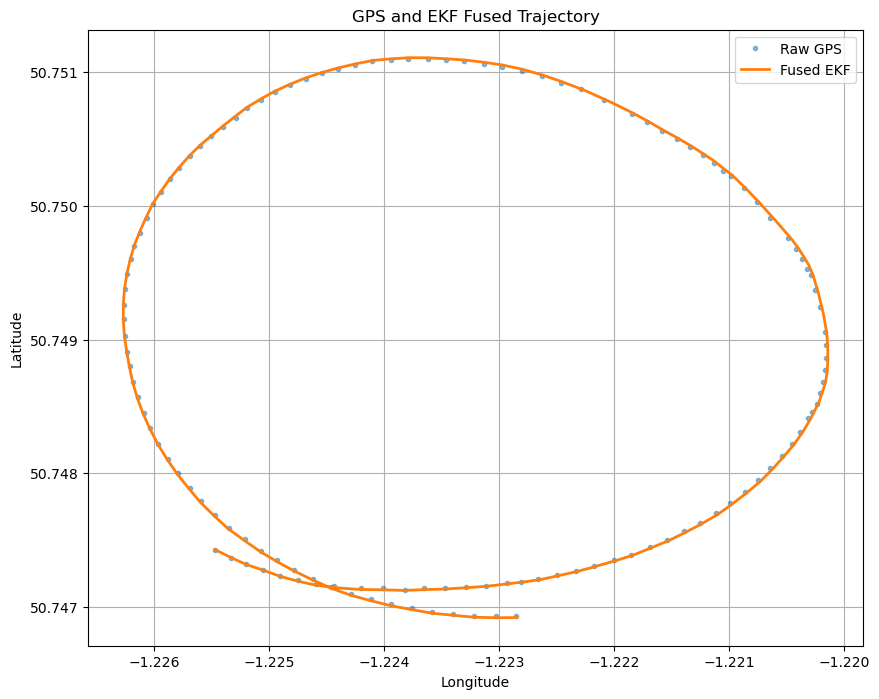

C:\Users\ben\AppData\Local\Temp\ipykernel_4448\1659874982.py:428: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PDOP': data_df.groupby('PDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
C:\Users\ben\AppData\Local\Temp\ipykernel_4448\1659874982.py:429: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'HDOP': data_df.groupby('HDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
C:\Users\ben\AppData\Local\Temp\ipykernel_4448\1659874982.py:430: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pand


=== Difference Statistics ===

E_diff:
  Mean: 0.4073 meters
  Median: 0.1421 meters
  Std Dev: 0.8863 meters
  RMSE: 0.9723 meters
  Max Error: 4.9773 meters

N_diff:
  Mean: -0.1265 meters
  Median: -0.2517 meters
  Std Dev: 1.0604 meters
  RMSE: 1.0638 meters
  Max Error: 3.9975 meters

Total_Error:
  Mean: 1.1770 meters
  Median: 1.0018 meters
  Std Dev: 0.8349 meters
  RMSE: 1.4412 meters
  Max Error: 5.3799 meters

=== DOP-based Error Statistics ===

PDOP-based Total Error:
  PDOP_bin      mean   median       std  count
0      0-5  1.177021  1.00177  0.834912    130
1     5-10       NaN      NaN       NaN      0
2    10-15       NaN      NaN       NaN      0
3    15-20       NaN      NaN       NaN      0
4      20+       NaN      NaN       NaN      0

HDOP-based Total Error:
  HDOP_bin      mean   median       std  count
0      0-5  1.177021  1.00177  0.834912    130
1     5-10       NaN      NaN       NaN      0
2    10-15       NaN      NaN       NaN      0
3    15-20       Na

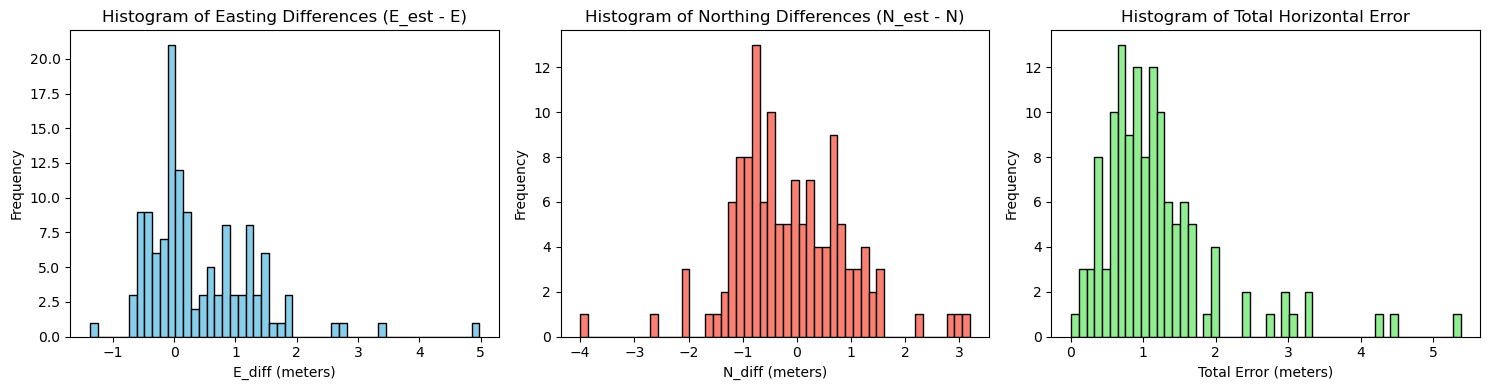

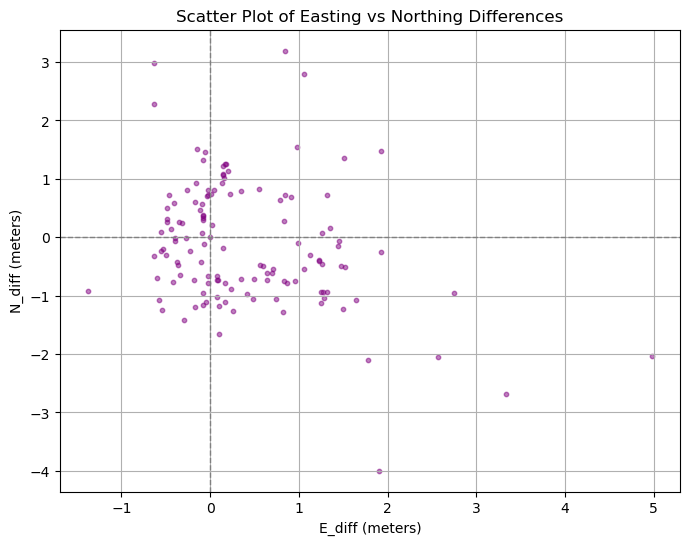

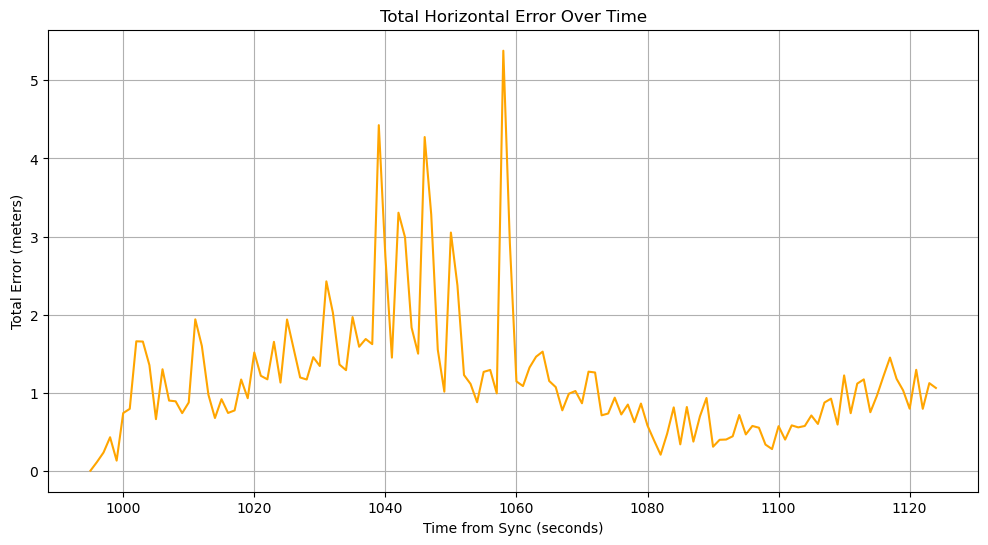

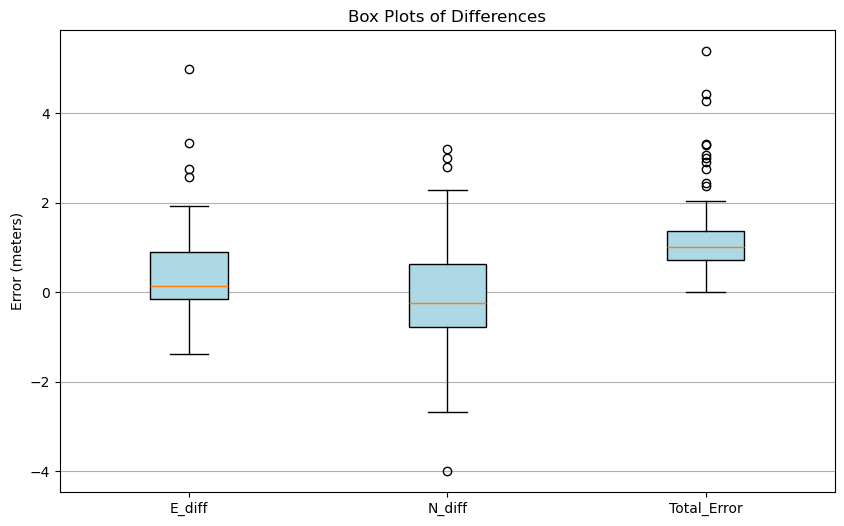

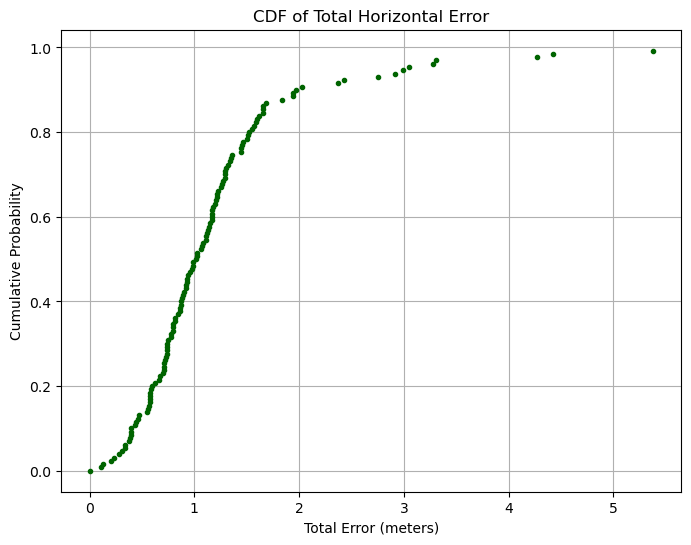

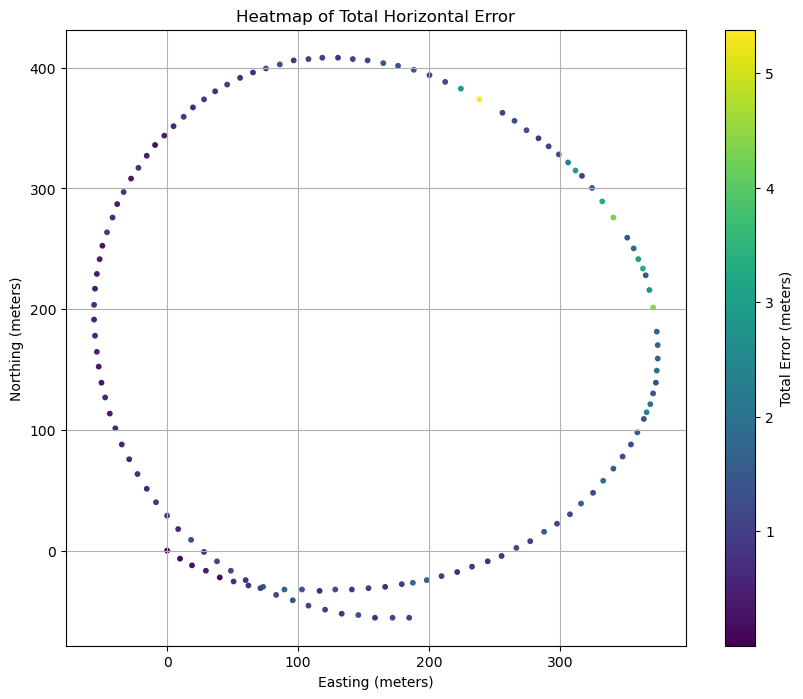

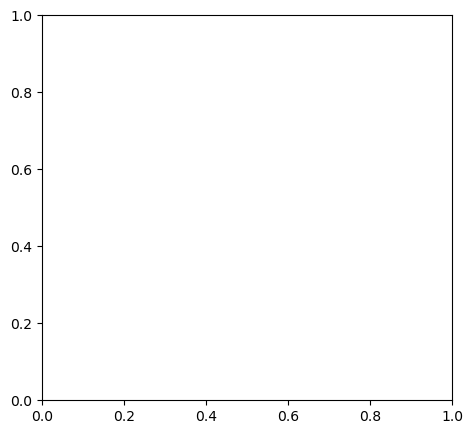

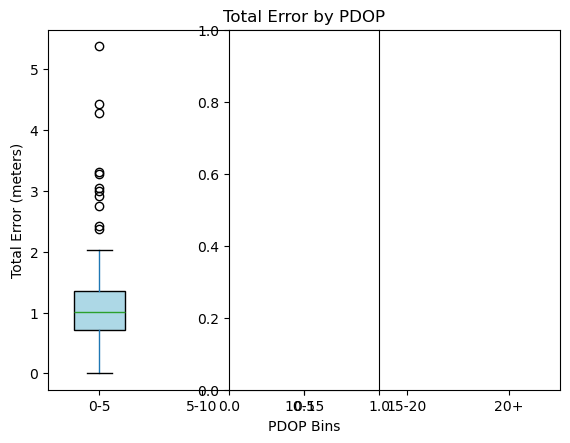

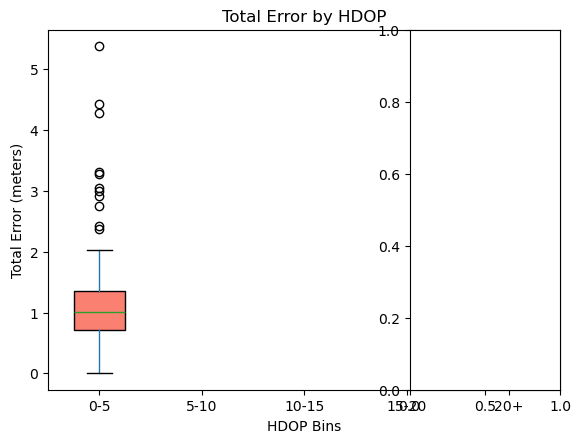

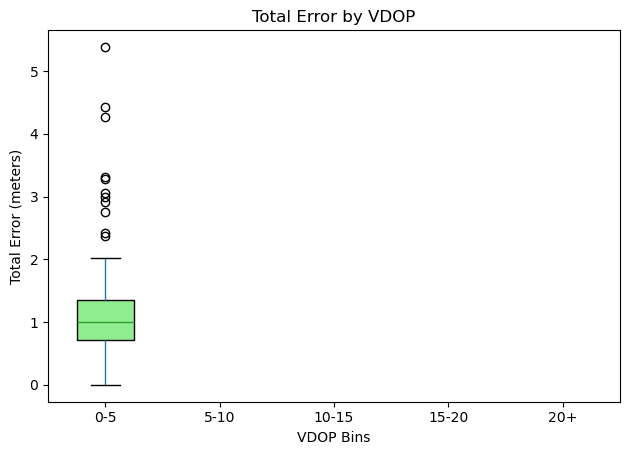

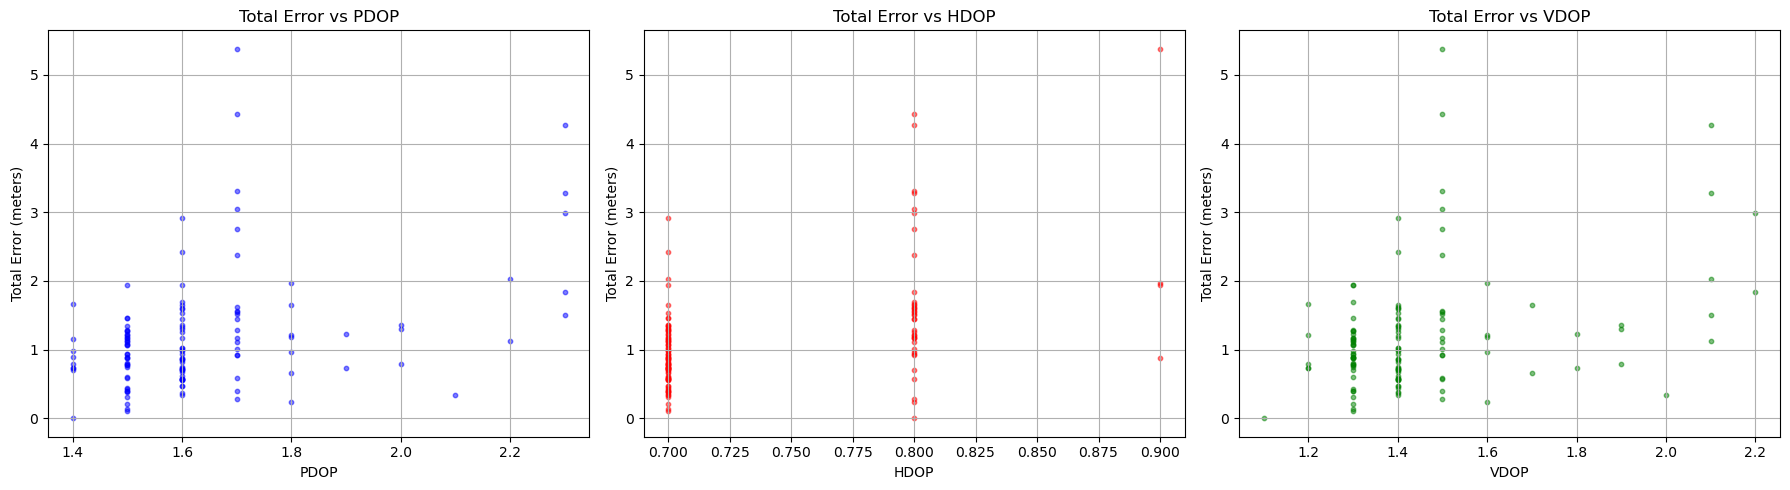

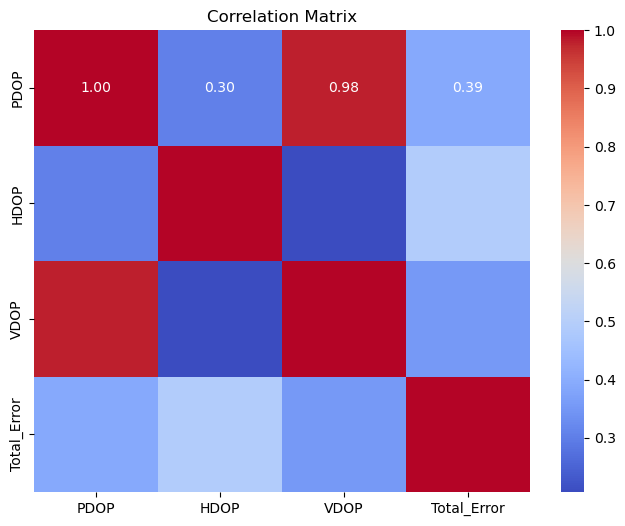

In [50]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '009_Fast_port_turn_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # === Modified ===

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
gps_df = pd.read_csv(gps_file, usecols=gps_columns)
log(f"GPS Data Loaded: {gps_df.shape[0]} rows")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    log(f"Loading IMU accelerometer data from {sensor}...")
    accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
    log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    
    log(f"Loading IMU gyroscope data from {sensor}...")
    gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
    log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    # merged_imu = merged_imu.dropna()
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
# combined_imu_df = combined_imu_df.dropna()
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Added ===
# Define rotation mappings for each IMU based on their orientations
# Mapping IMU local axes to ENU axes
# Each mapping is a transformation matrix or axis permutation with sign changes

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row['x_accel_wb'], row['y_accel_wb'], row['z_accel_wb']), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row['x_accel_3'], row['y_accel_3'], row['z_accel_3']), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row['x_accel_4'], row['y_accel_4'], row['z_accel_4']), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")
# === End of Added ===

# Aggregate Accelerometer Data from All Sensors
log("\nAggregating transformed accelerometer data from all sensors...")
# === Modified ===
# Now using transformed accelerometer data (E_accel_*, N_accel_*, U_accel_*)
data_df['x_accel_avg'] = data_df[['E_accel_wb', 'E_accel_3', 'E_accel_4']].mean(axis=1)
data_df['y_accel_avg'] = data_df[['N_accel_wb', 'N_accel_3', 'N_accel_4']].mean(axis=1)
data_df['z_accel_avg'] = data_df[['U_accel_wb', 'U_accel_3', 'U_accel_4']].mean(axis=1)
# === End of Modified ===
log("Aggregated accelerometer data computed.")

# Define the state vector [E, N, V_E, V_N]
state = np.array([data_df.iloc[0]['E'],
                  data_df.iloc[0]['N'],
                  0,
                  0]).reshape(4,1)

# Define covariance matrices
P = np.eye(4) * 500  # Initial state covariance
Q = np.eye(4)        # Process noise covariance
# R_gps will be dynamically set based on HDOP (from previous modifications)
# R_imu is not used in this implementation

# Define identity matrix
I = np.eye(4)

# Store estimates
estimated_states = []

# === Added ===
# Base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy
# === End of Added ===

log("\nStarting Extended Kalman Filter (EKF) processing with aggregated IMU data and DOP incorporation...")
# EKF Implementation
for idx in range(len(data_df)):
    row = data_df.iloc[idx]
    
    # Time step
    if idx == 0:
        dt = 0.01  # Assume initial dt (e.g., 100Hz)
    else:
        dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
        if dt <= 0:
            dt = 0.01  # Handle non-positive dt
    
    # State Transition Matrix
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # Control Input (from aggregated IMU: average accelerometer data)
    # Assuming x_accel_avg and y_accel_avg are in m/s^2
    a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
    a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
    u = np.array([0.5 * a_E * dt**2,
                  0.5 * a_N * dt**2,
                  a_E * dt,
                  a_N * dt]).reshape(4,1)
    
    # Process model prediction
    state = F @ state + u
    P = F @ P @ F.T + Q
    
    # === Modified ===
    # Dynamically set R_gps based on HDOP
    # Assuming R_gps = (HDOP)^2 * R_base
    current_hdop = row['HDOP']
    R_gps = (current_hdop ** 2) * R_base
    # Alternatively, you can scale differently based on empirical data
    # R_gps = R_base * (1 + current_hdop)
    # === End of Modified ===
    
    # Measurement Update
    # GPS provides E and N
    z = np.array([row['E'], row['N']]).reshape(2,1)
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    
    y_innovation = z - H @ state  # Innovation
    S = H @ P @ H.T + R_gps
    K = P @ H.T @ np.linalg.inv(S)
    
    state = state + K @ y_innovation
    P = (I - K @ H) @ P
    
    # Store the estimated state
    estimated_states.append(state.flatten())
    
    # Optional: Print progress
    if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
        log(f"Processed {idx} rows...")

log("EKF processing completed.")

# Convert estimated states to DataFrame
estimated_states = np.array(estimated_states)
data_df['E_est'] = estimated_states[:,0]
data_df['N_est'] = estimated_states[:,1]

# Function to convert ENU back to lat/lon/alt
def enu_to_latlon(e, n, u):
    # Apply inverse rotation
    diff = np.array([e, n, u])
    ecef_diff = R.T @ diff
    # Compute ECEF coordinates
    x = ref_ecef[0] + ecef_diff[0]
    y = ref_ecef[1] + ecef_diff[1]
    z = ref_ecef[2] + ecef_diff[2]
    # Convert back to LLA
    lon, lat, alt = transformer_to_lla.transform(x, y, z)
    return lat, lon, alt

# Convert ENU back to lat/lon for plotting
log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
latlon_est = data_df.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
data_df['Lat_est'], data_df['Lng_est'], data_df['Alt_est'] = zip(*latlon_est)
log("Conversion completed.")

# Plotting
log("\nPlotting the trajectories...")
plt.figure(figsize=(10,8))
plt.plot(data_df['Lng'], data_df['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
plt.plot(data_df['Lng_est'], data_df['Lat_est'], label='Fused EKF', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS and EKF Fused Trajectory')
plt.legend()
plt.grid()
plt.show()

# ================== Difference Statistics and Visualization ==================

# Ensure that the necessary columns are present
required_columns = ['E', 'N', 'E_est', 'N_est', 'PDOP', 'HDOP', 'VDOP']
for col in required_columns:
    if col not in data_df.columns:
        log(f"Error: Column '{col}' not found in data_df.")
        sys.exit(f"Terminating script due to missing column: {col}")

# Calculate differences in Easting and Northing
data_df['E_diff'] = data_df['E_est'] - data_df['E']
data_df['N_diff'] = data_df['N_est'] - data_df['N']

# Calculate total horizontal error
data_df['Total_Error'] = np.sqrt(data_df['E_diff']**2 + data_df['N_diff']**2)

# === Added ===
# Binning PDOP, HDOP, VDOP for analysis
data_df['PDOP_bin'] = pd.cut(data_df['PDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
data_df['HDOP_bin'] = pd.cut(data_df['HDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
data_df['VDOP_bin'] = pd.cut(data_df['VDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
# === End of Added ===

# Compute statistics
statistics = {
    'E_diff': {
        'Mean': data_df['E_diff'].mean(),
        'Median': data_df['E_diff'].median(),
        'Std Dev': data_df['E_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['E_diff']**2)),
        'Max Error': data_df['E_diff'].abs().max()
    },
    'N_diff': {
        'Mean': data_df['N_diff'].mean(),
        'Median': data_df['N_diff'].median(),
        'Std Dev': data_df['N_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['N_diff']**2)),
        'Max Error': data_df['N_diff'].abs().max()
    },
    'Total_Error': {
        'Mean': data_df['Total_Error'].mean(),
        'Median': data_df['Total_Error'].median(),
        'Std Dev': data_df['Total_Error'].std(),
        'RMSE': np.sqrt(np.mean(data_df['Total_Error']**2)),
        'Max Error': data_df['Total_Error'].max()
    }
}

# === Added ===
# Compute additional statistics relating DOP metrics to errors

dop_statistics = {
    'PDOP': data_df.groupby('PDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
    'HDOP': data_df.groupby('HDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
    'VDOP': data_df.groupby('VDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index()
}
# === End of Added ===

# Print statistics if printing is enabled
if PRINT_ENABLED:
    print("\n=== Difference Statistics ===")
    for key, stats in statistics.items():
        print(f"\n{key}:")
        for stat_name, value in stats.items():
            print(f"  {stat_name}: {value:.4f} meters")
    
    print("\n=== DOP-based Error Statistics ===")
    for dop_metric, stats_df in dop_statistics.items():
        print(f"\n{dop_metric}-based Total Error:")
        print(stats_df)
# === End of Added ===

# Alternatively, always print statistics
print("\n=== Difference Statistics ===")
for key, stats in statistics.items():
    print(f"\n{key}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f} meters")

# === Added ===
print("\n=== DOP-based Error Statistics ===")
for dop_metric, stats_df in dop_statistics.items():
    print(f"\n{dop_metric}-based Total Error:")
    print(stats_df)
# === End of Added ===

# Visualization

# 1. Histograms of E_diff, N_diff, and Total_Error
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(data_df['E_diff'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Easting Differences (E_est - E)')
plt.xlabel('E_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data_df['N_diff'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Northing Differences (N_est - N)')
plt.xlabel('N_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data_df['Total_Error'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Scatter Plot of E_diff vs N_diff
plt.figure(figsize=(8, 6))
plt.scatter(data_df['E_diff'], data_df['N_diff'], alpha=0.5, s=10, c='purple')
plt.title('Scatter Plot of Easting vs Northing Differences')
plt.xlabel('E_diff (meters)')
plt.ylabel('N_diff (meters)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

# 3. Time Series of Total Error
plt.figure(figsize=(12, 6))
plt.plot(data_df['time_from_sync'], data_df['Total_Error'], color='orange')
plt.title('Total Horizontal Error Over Time')
plt.xlabel('Time from Sync (seconds)')
plt.ylabel('Total Error (meters)')
plt.grid(True)
plt.show()

# 4. Box Plots for E_diff, N_diff, and Total_Error
plt.figure(figsize=(10, 6))
box_data = [data_df['E_diff'], data_df['N_diff'], data_df['Total_Error']]
plt.boxplot(box_data, labels=['E_diff', 'N_diff', 'Total_Error'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Box Plots of Differences')
plt.ylabel('Error (meters)')
plt.grid(True, axis='y')
plt.show()

# 5. Cumulative Distribution Function (CDF) of Total Error
sorted_errors = np.sort(data_df['Total_Error'])
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none', color='darkgreen')
plt.title('CDF of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# 6. Error Heatmap (Optional)
# If you want to visualize the spatial distribution of errors
plt.figure(figsize=(10, 8))
sc = plt.scatter(data_df['E'], data_df['N'], c=data_df['Total_Error'], cmap='viridis', s=10)
plt.colorbar(sc, label='Total Error (meters)')
plt.title('Heatmap of Total Horizontal Error')
plt.xlabel('Easting (meters)')
plt.ylabel('Northing (meters)')
plt.grid(True)
plt.show()

# === Added ===
# Additional Visualizations: DOP vs Total Error

# 7. Box Plots of Total Error across DOP Bins
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
data_df.boxplot(column='Total_Error', by='PDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue'))
plt.title('Total Error by PDOP')
plt.suptitle('')
plt.xlabel('PDOP Bins')
plt.ylabel('Total Error (meters)')

plt.subplot(1, 3, 2)
data_df.boxplot(column='Total_Error', by='HDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='salmon'))
plt.title('Total Error by HDOP')
plt.suptitle('')
plt.xlabel('HDOP Bins')
plt.ylabel('Total Error (meters)')

plt.subplot(1, 3, 3)
data_df.boxplot(column='Total_Error', by='VDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightgreen'))
plt.title('Total Error by VDOP')
plt.suptitle('')
plt.xlabel('VDOP Bins')
plt.ylabel('Total Error (meters)')

plt.tight_layout()
plt.show()

# 8. Scatter Plots of DOP Metrics vs Total Error
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(data_df['PDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='blue')
plt.title('Total Error vs PDOP')
plt.xlabel('PDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(data_df['HDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='red')
plt.title('Total Error vs HDOP')
plt.xlabel('HDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(data_df['VDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='green')
plt.title('Total Error vs VDOP')
plt.xlabel('VDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 9. Correlation Matrix
import seaborn as sns

corr_matrix = data_df[['PDOP', 'HDOP', 'VDOP', 'Total_Error']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# === End of Added ===



=== Running EKF for Configuration: No IMU ===

=== Running EKF for Configuration: Single IMU (wb) ===

=== Running EKF for Configuration: Single IMU (3) ===

=== Running EKF for Configuration: Single IMU (4) ===

=== Running EKF for Configuration: Dual IMUs (wb + 3) ===

=== Running EKF for Configuration: Dual IMUs (wb + 4) ===

=== Running EKF for Configuration: Dual IMUs (3 + 4) ===

=== Running EKF for Configuration: All IMUs (wb + 3 + 4) ===

=== Comparative RMSE Metrics ===
           Configuration    E_RMSE    N_RMSE  Total_Error_RMSE
0                 No IMU  0.000000  0.000000          0.000000
1        Single IMU (wb)  1.631971  1.048395          1.939707
2         Single IMU (3)  0.871814  1.069735          1.379997
3         Single IMU (4)  0.870155  1.077560          1.385029
4     Dual IMUs (wb + 3)  1.102351  1.057996          1.527918
5     Dual IMUs (wb + 4)  1.095758  1.062090          1.526015
6      Dual IMUs (3 + 4)  0.869637  1.072487          1.380759
7  All IMUs

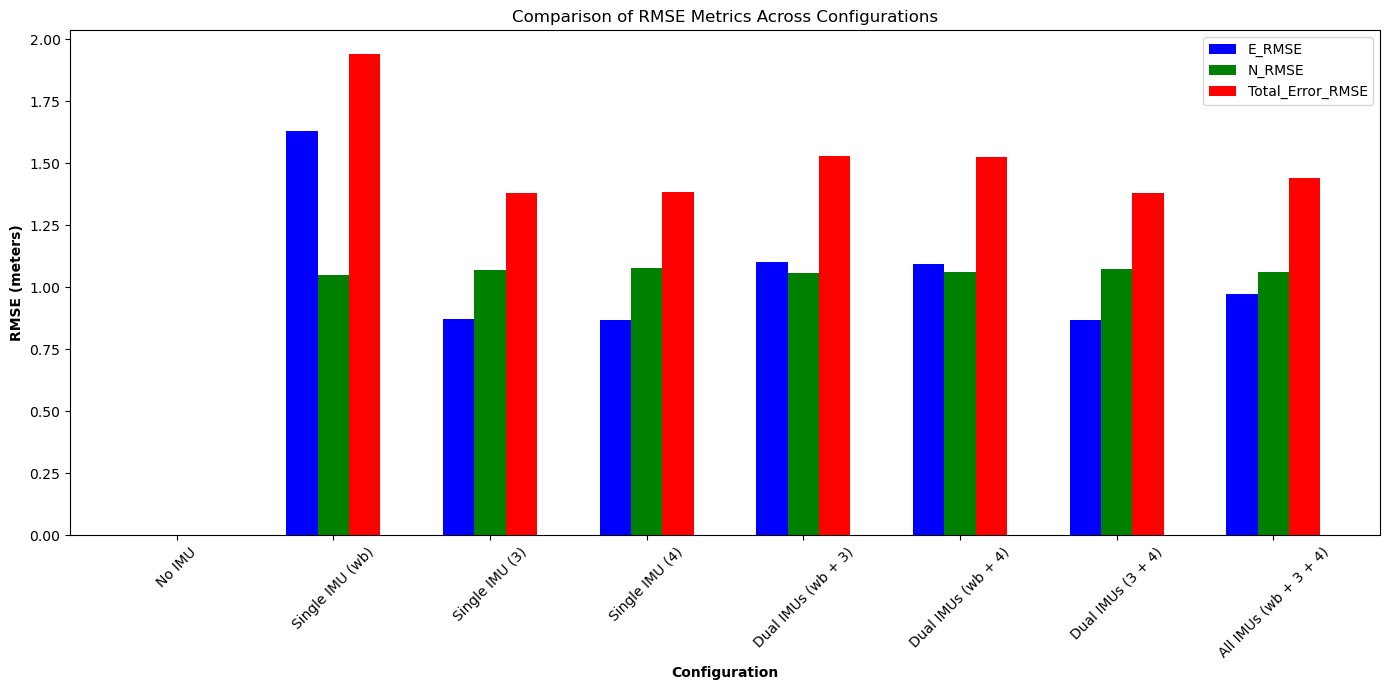

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

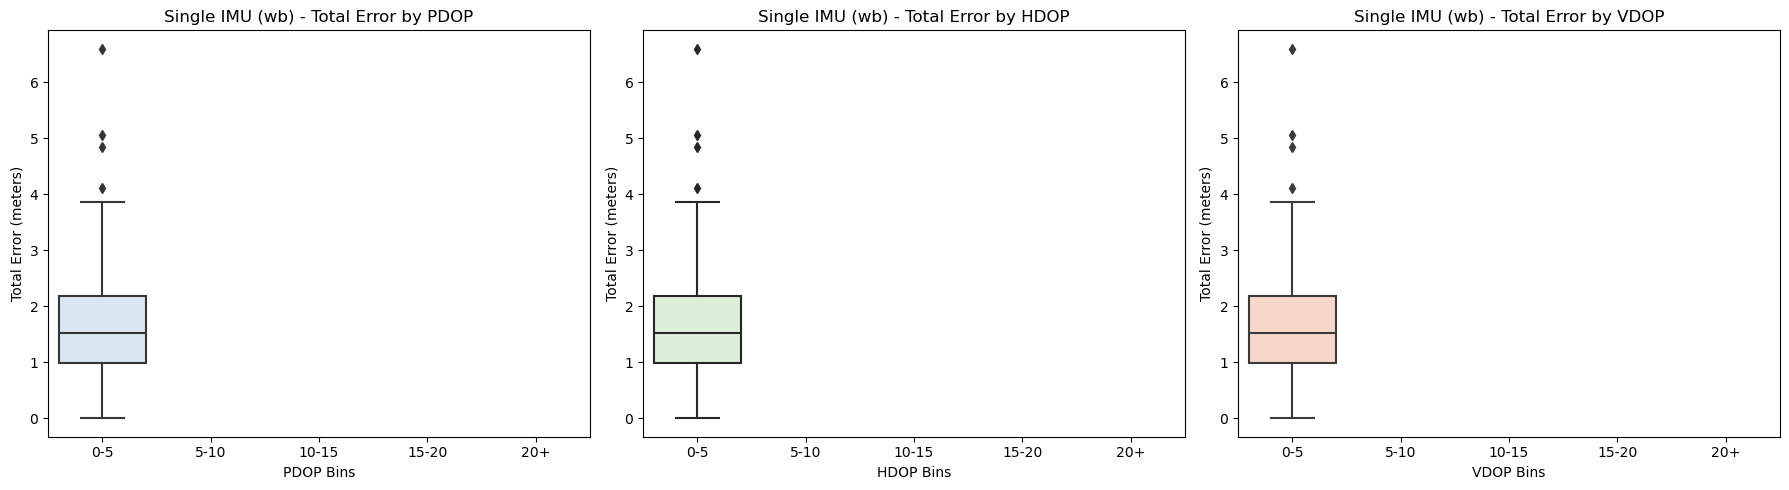

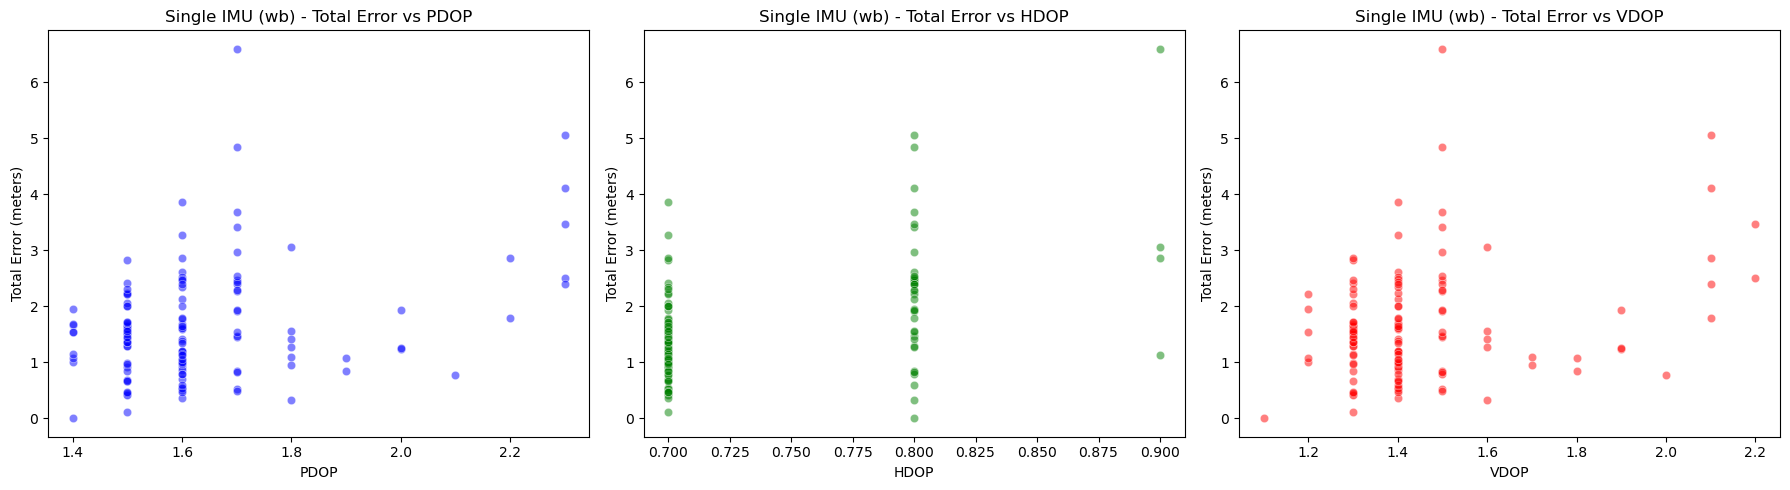

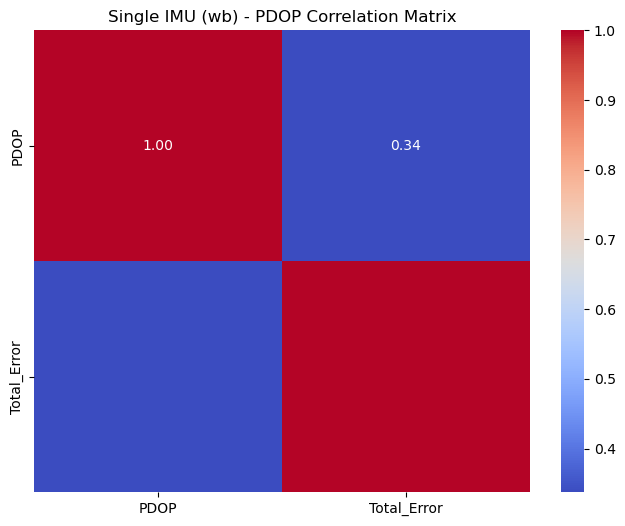

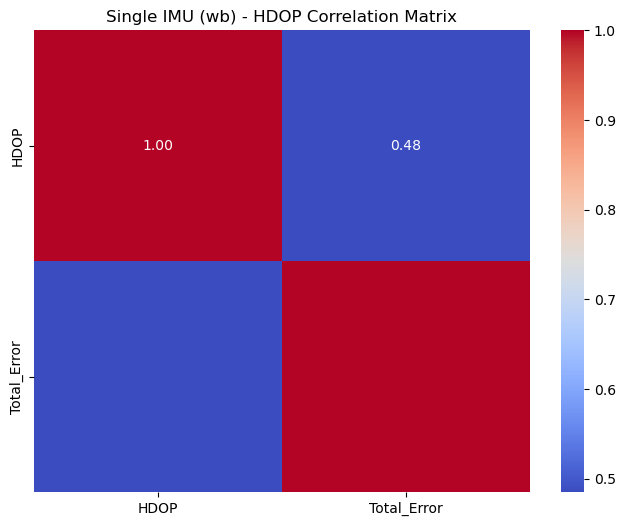

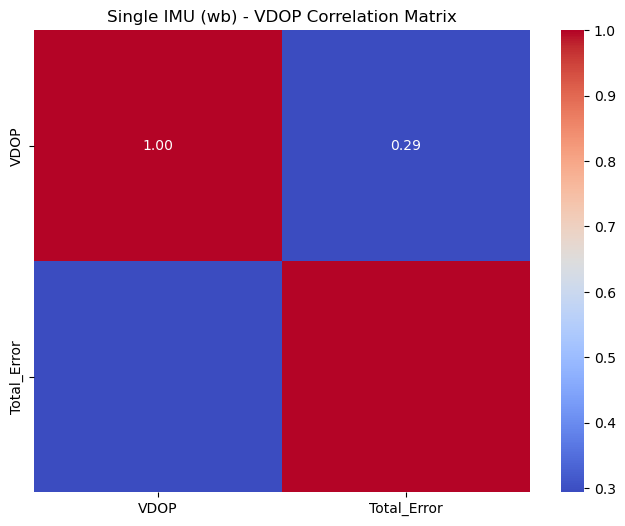

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

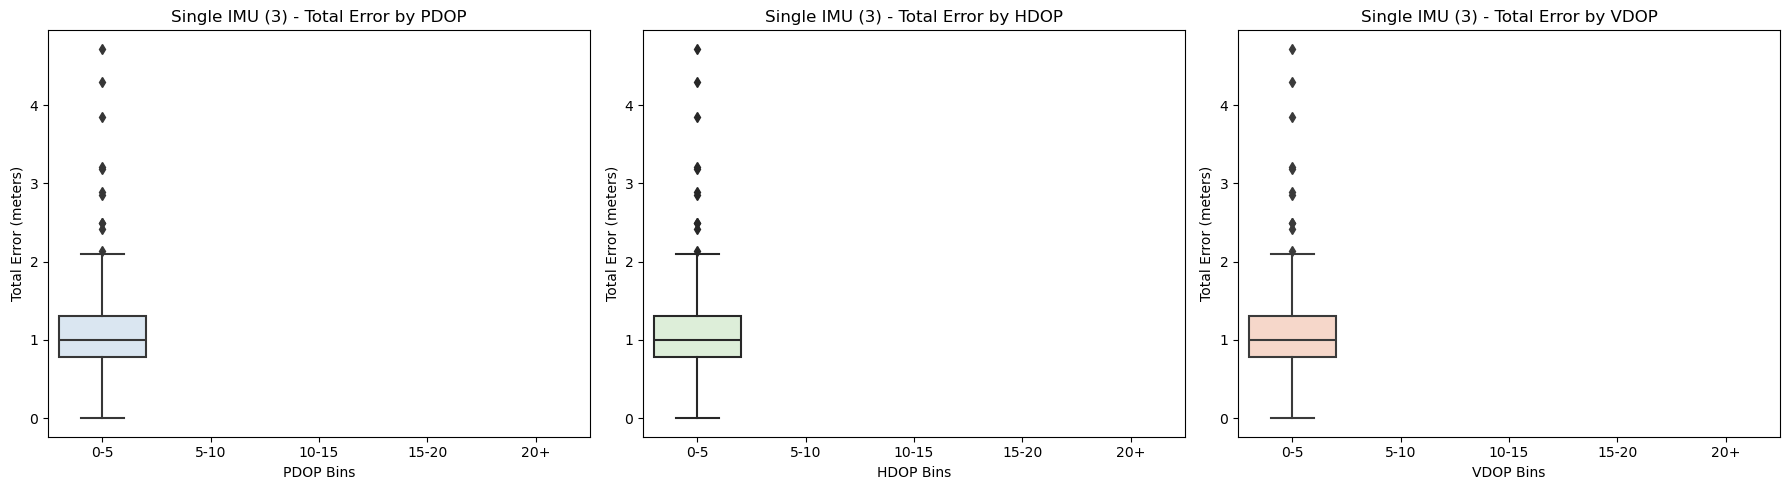

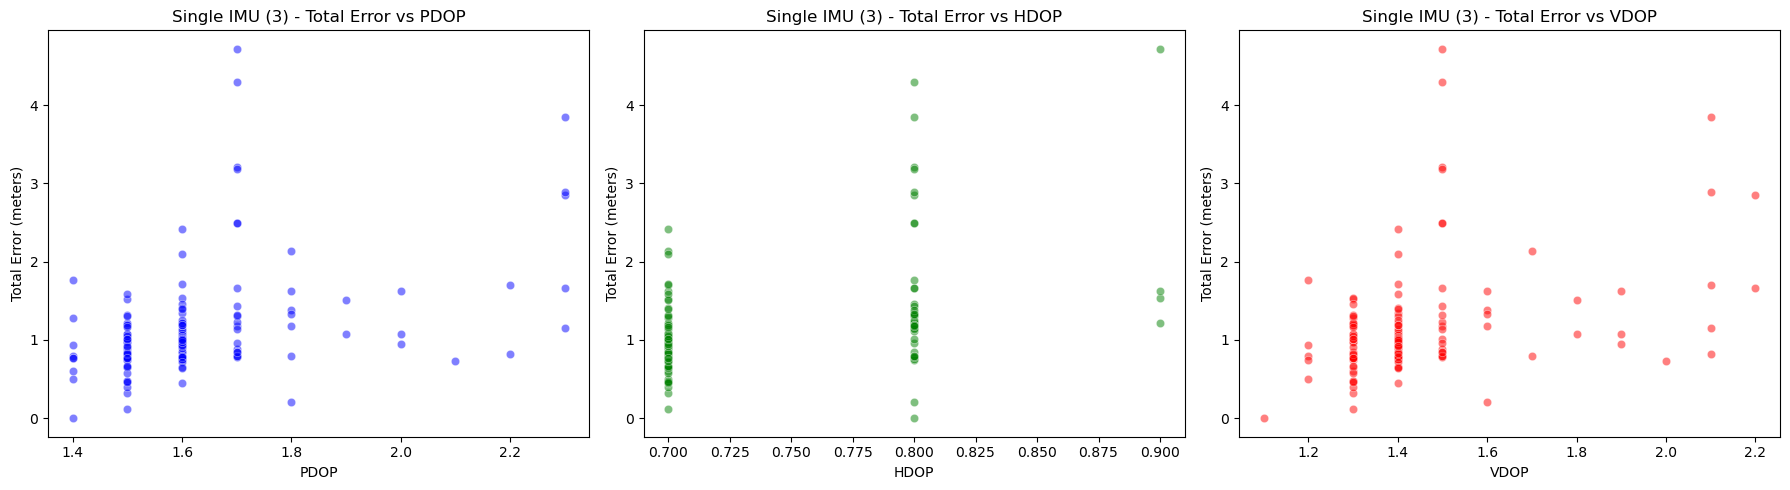

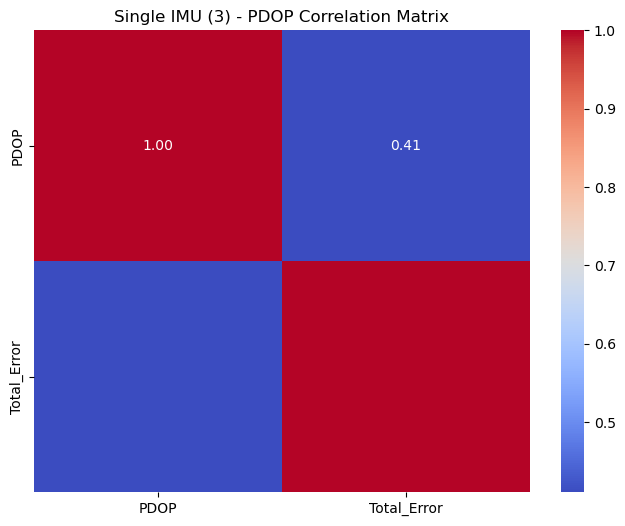

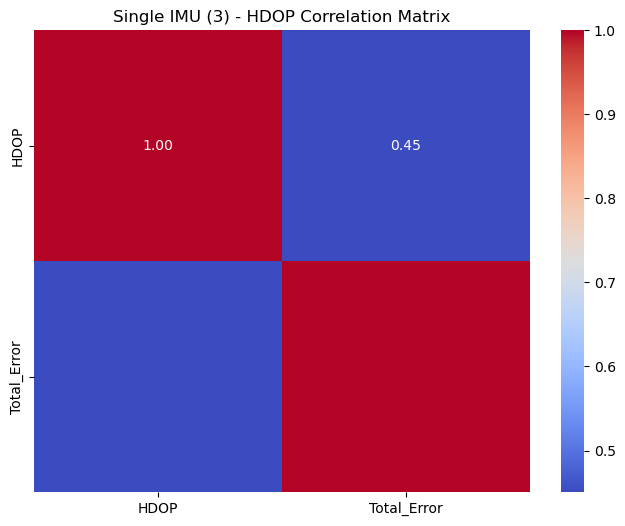

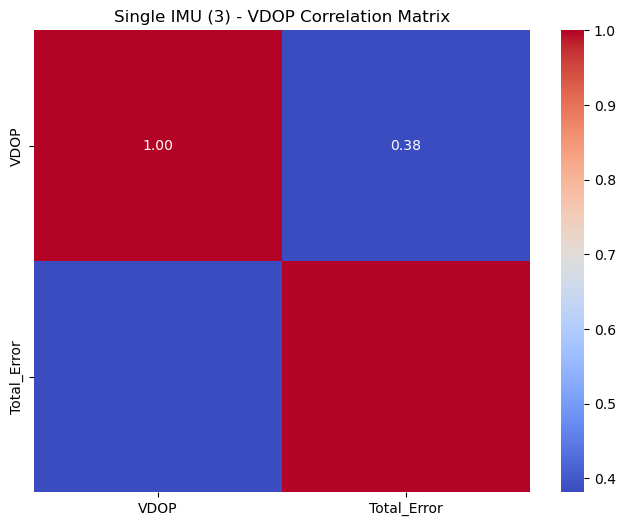

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

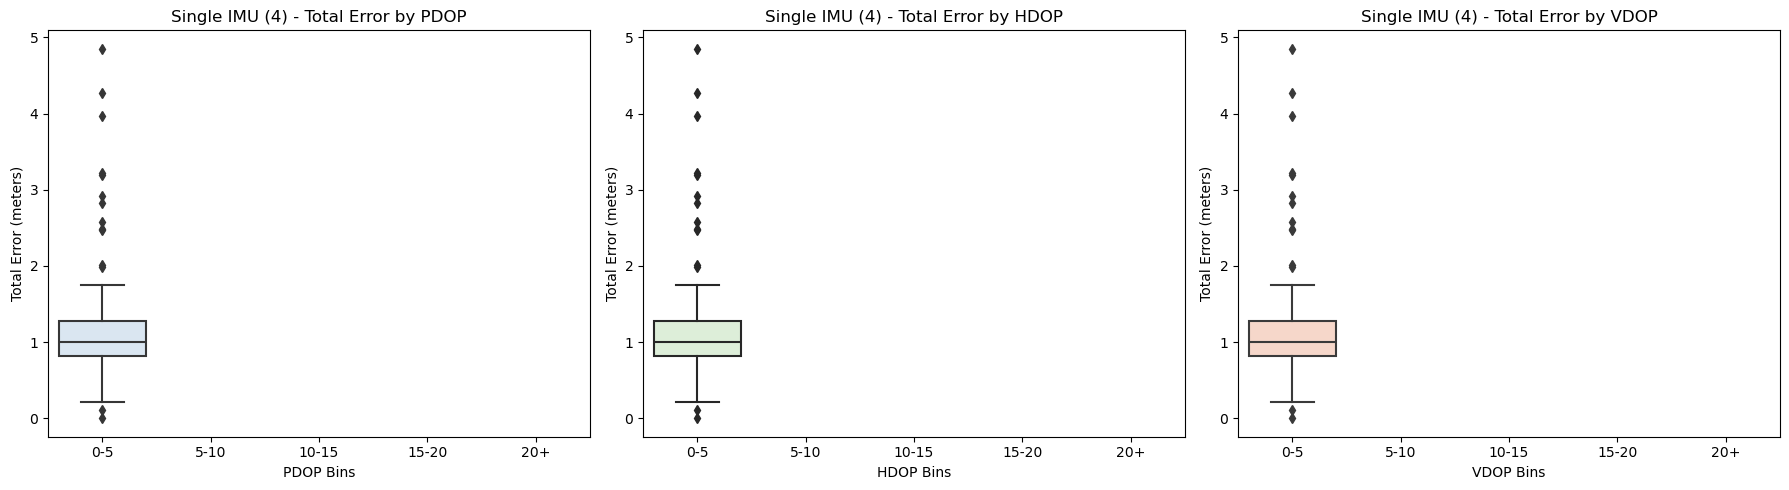

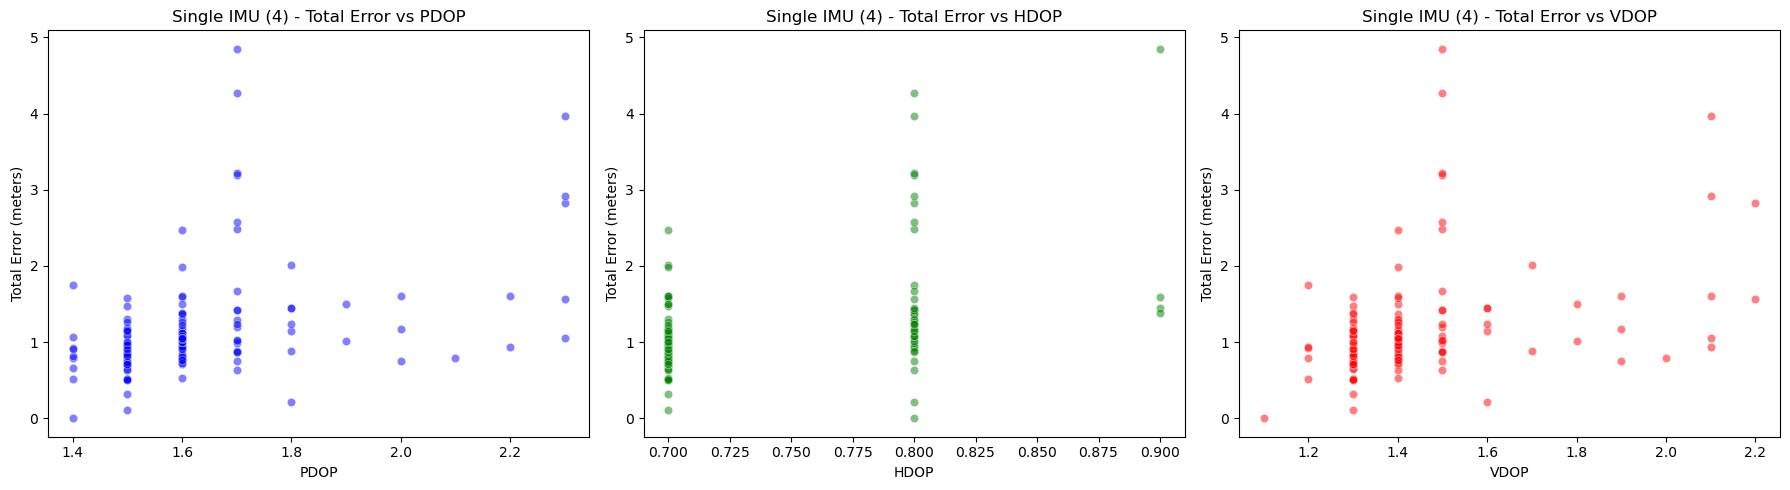

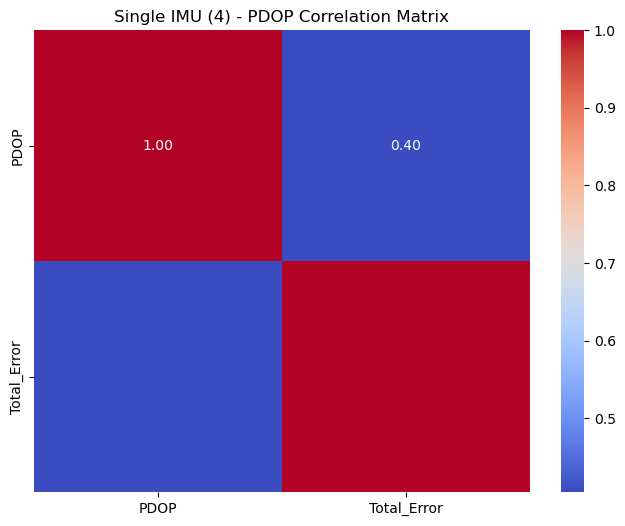

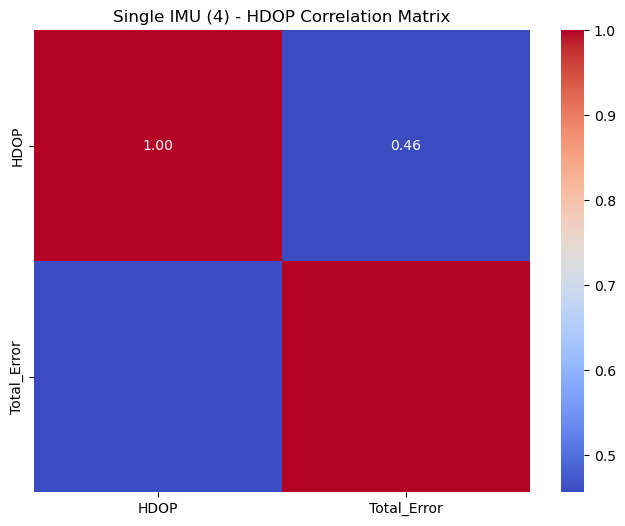

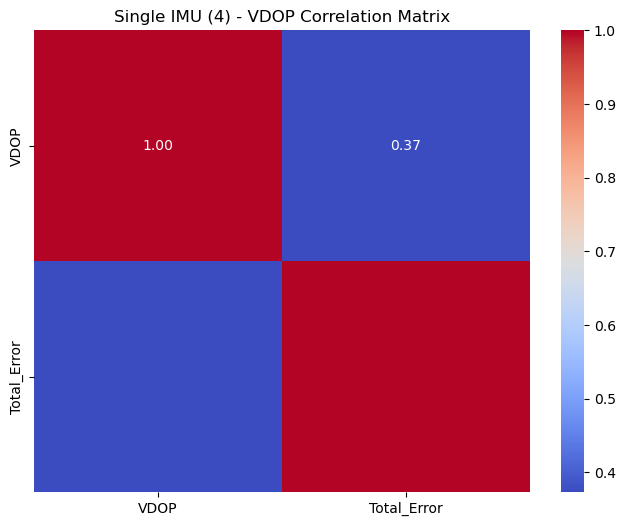

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

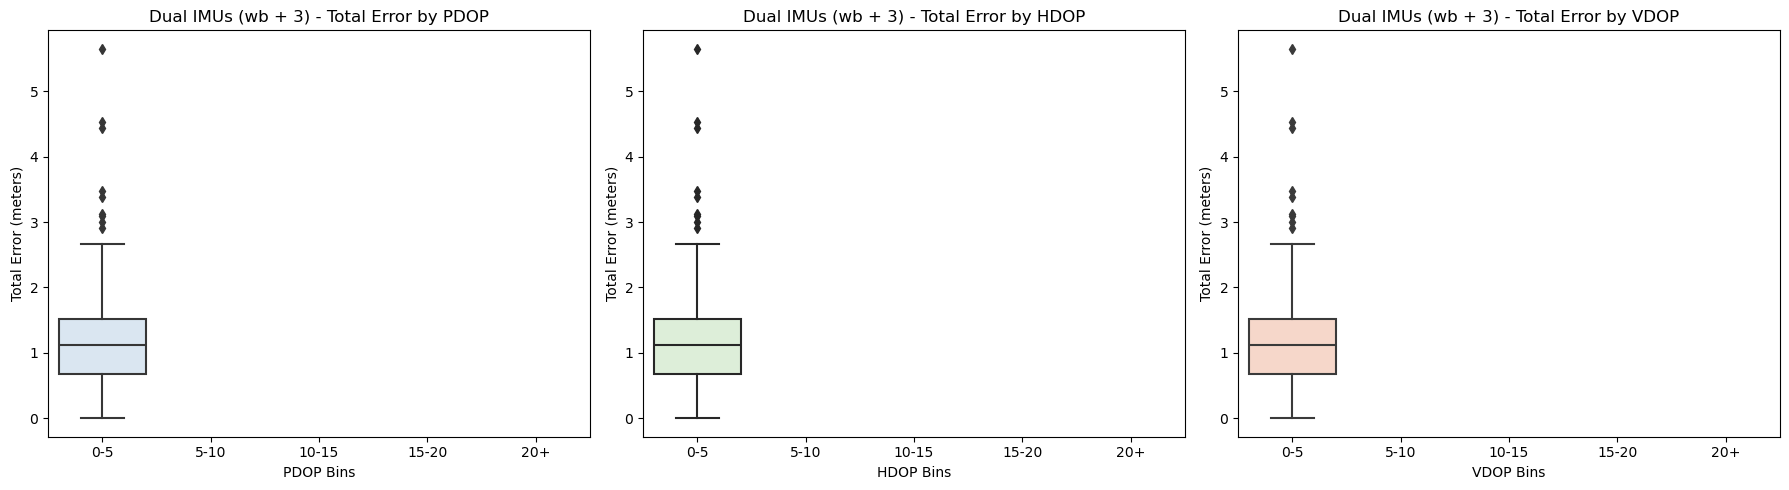

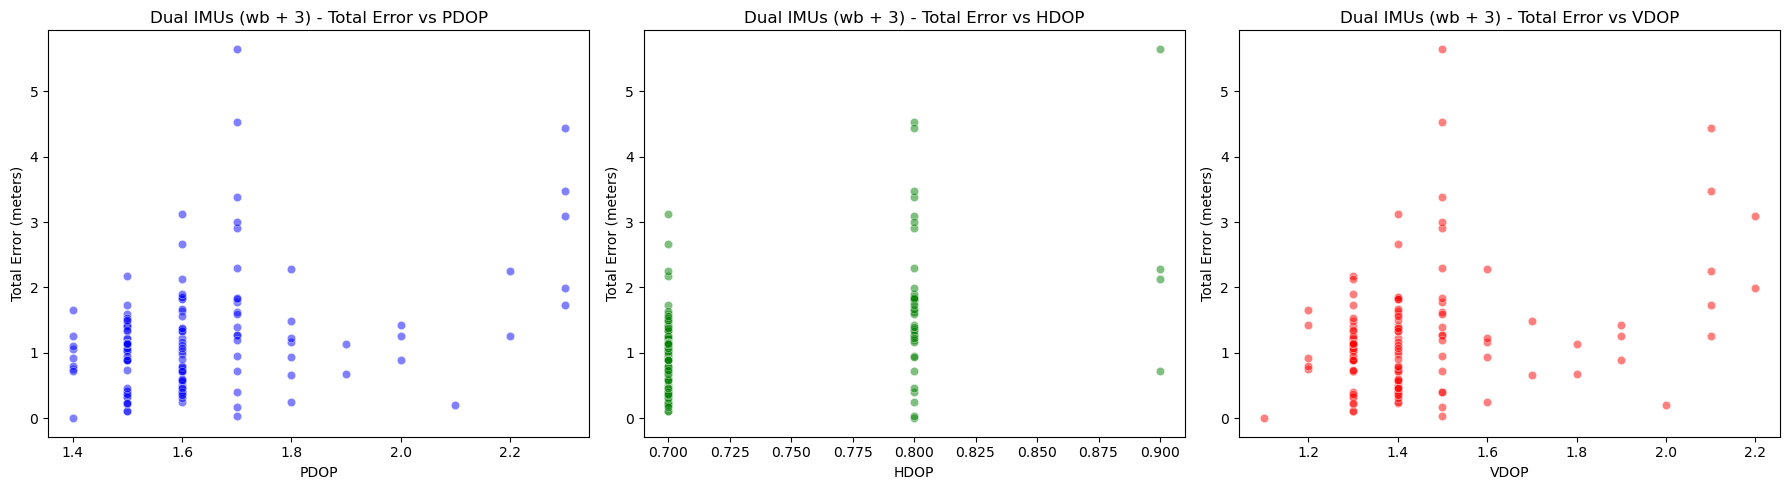

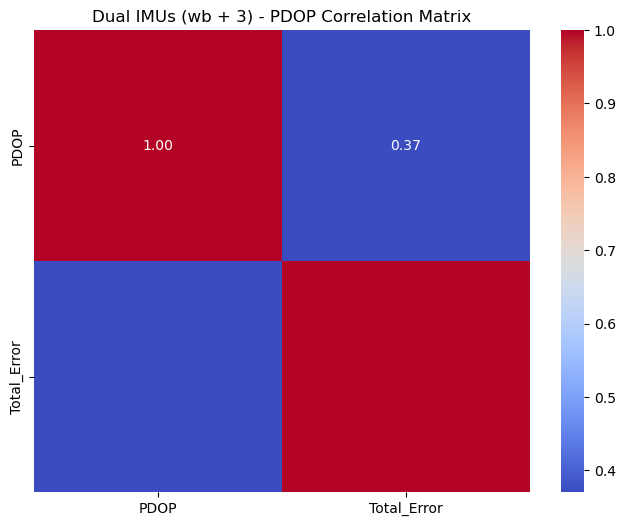

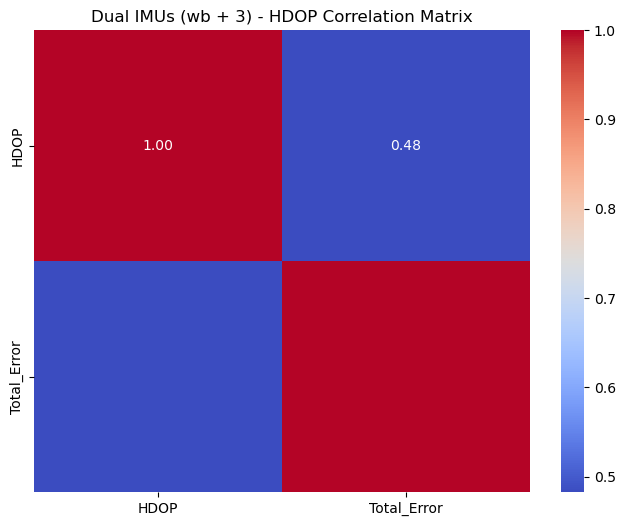

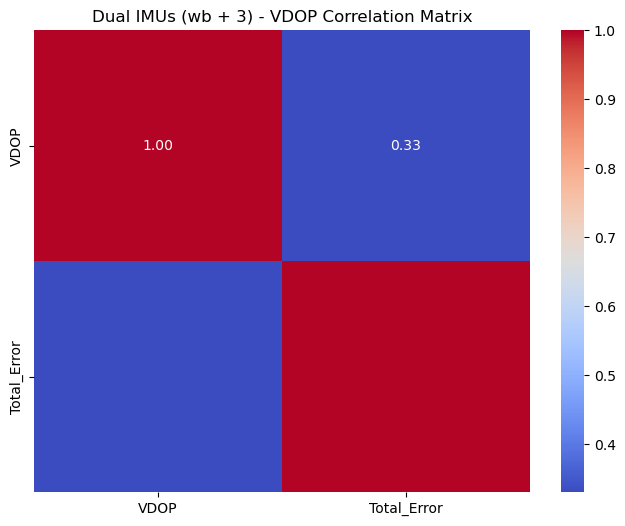

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

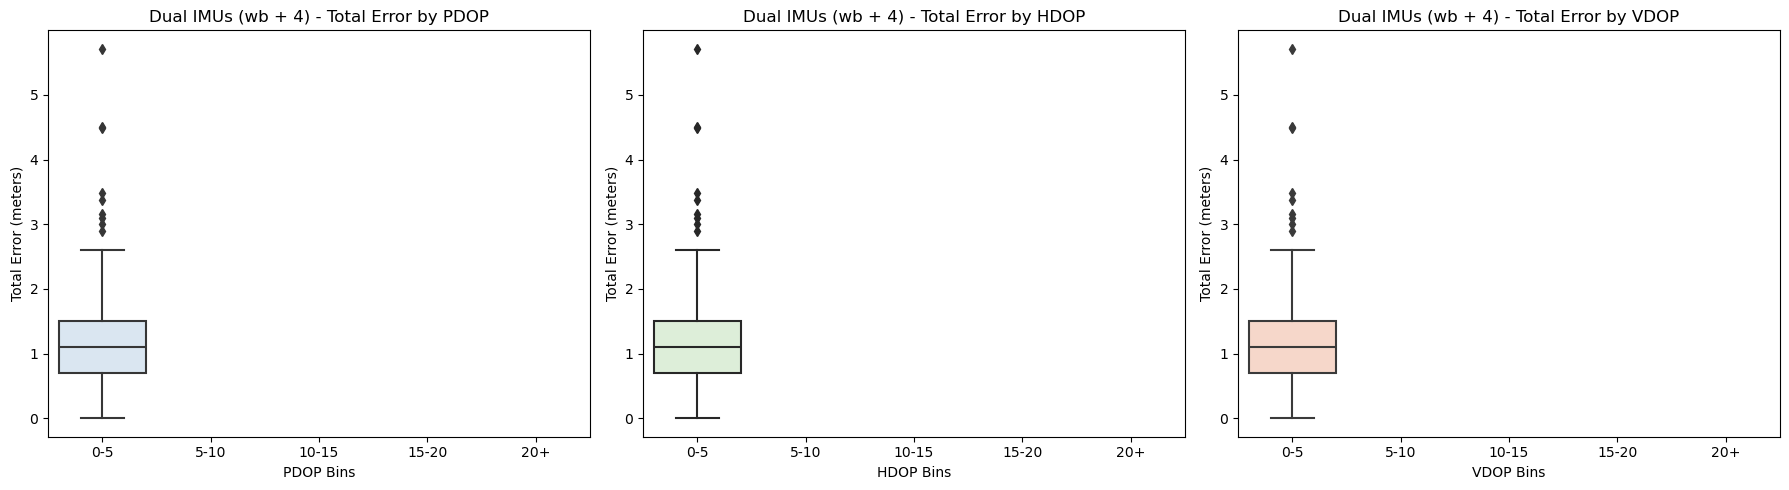

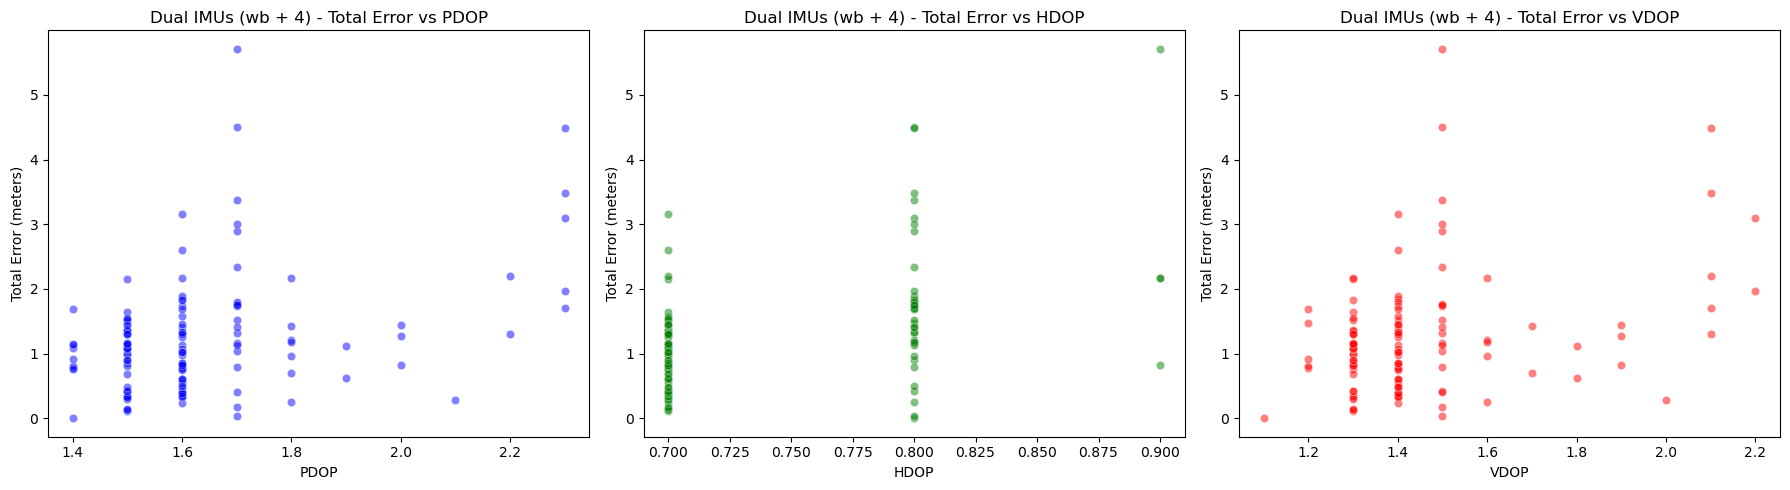

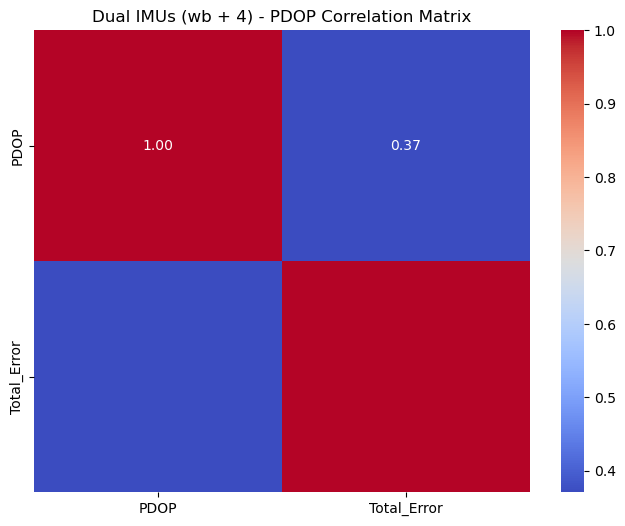

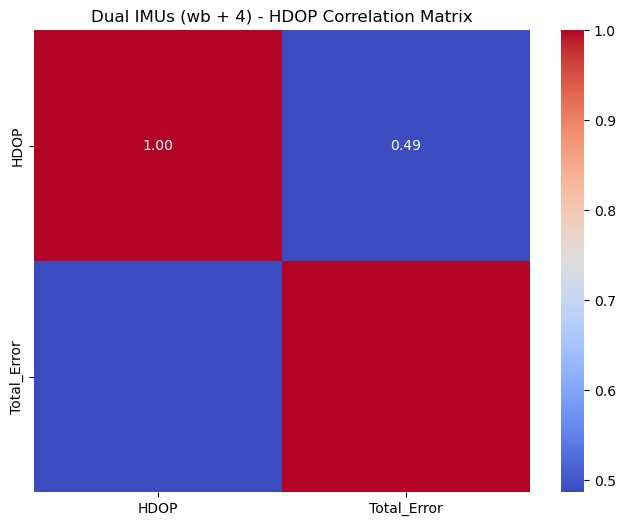

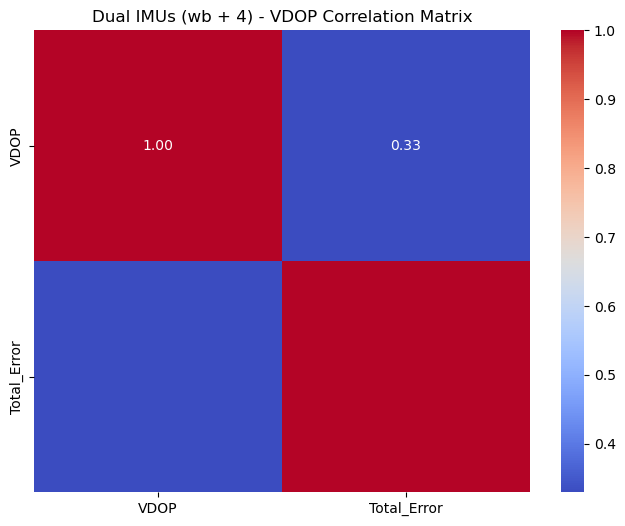

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

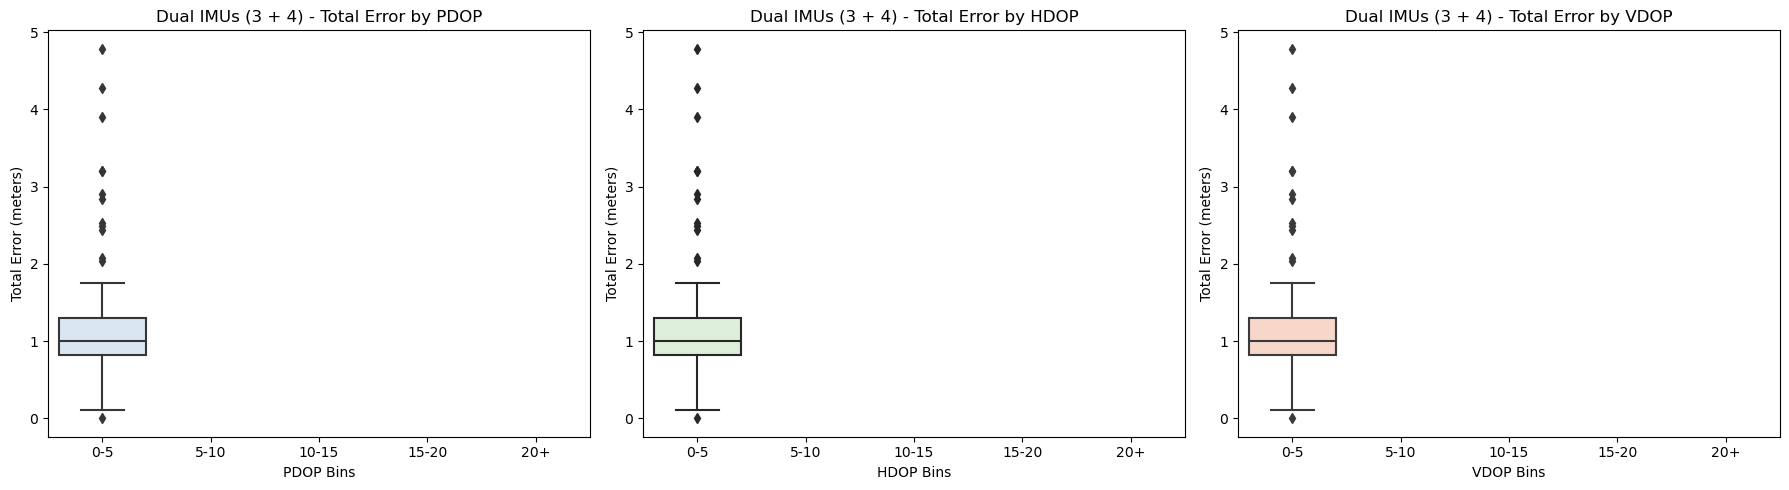

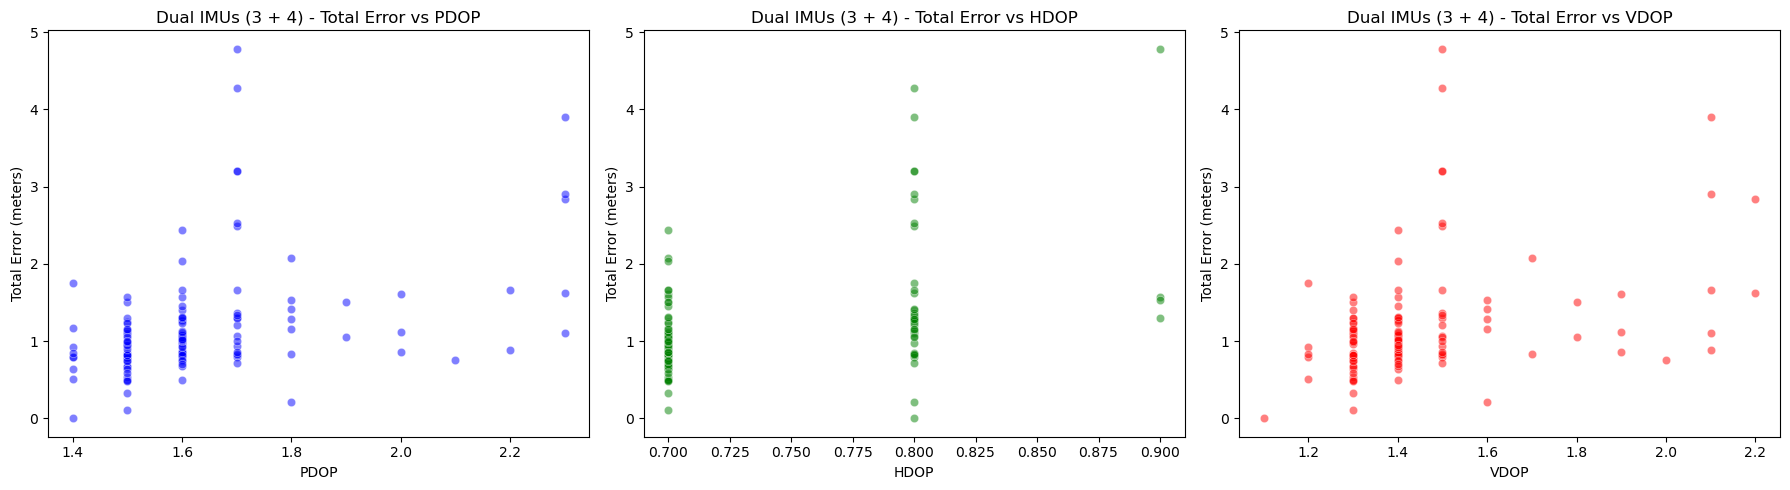

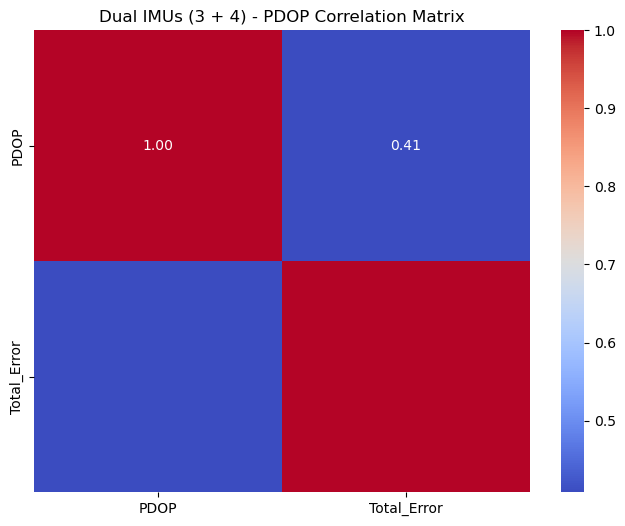

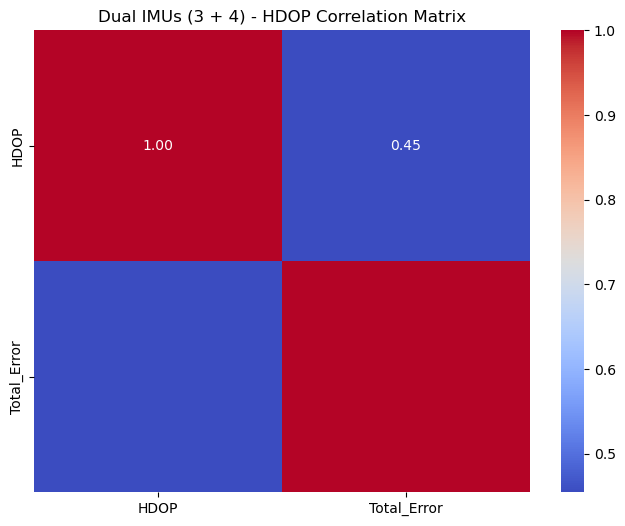

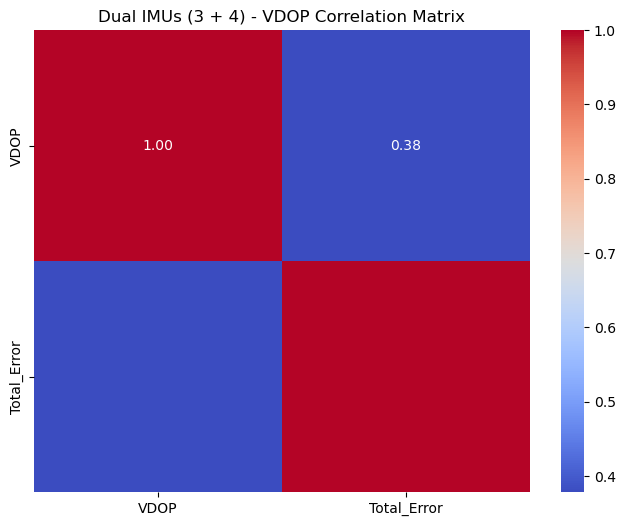

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

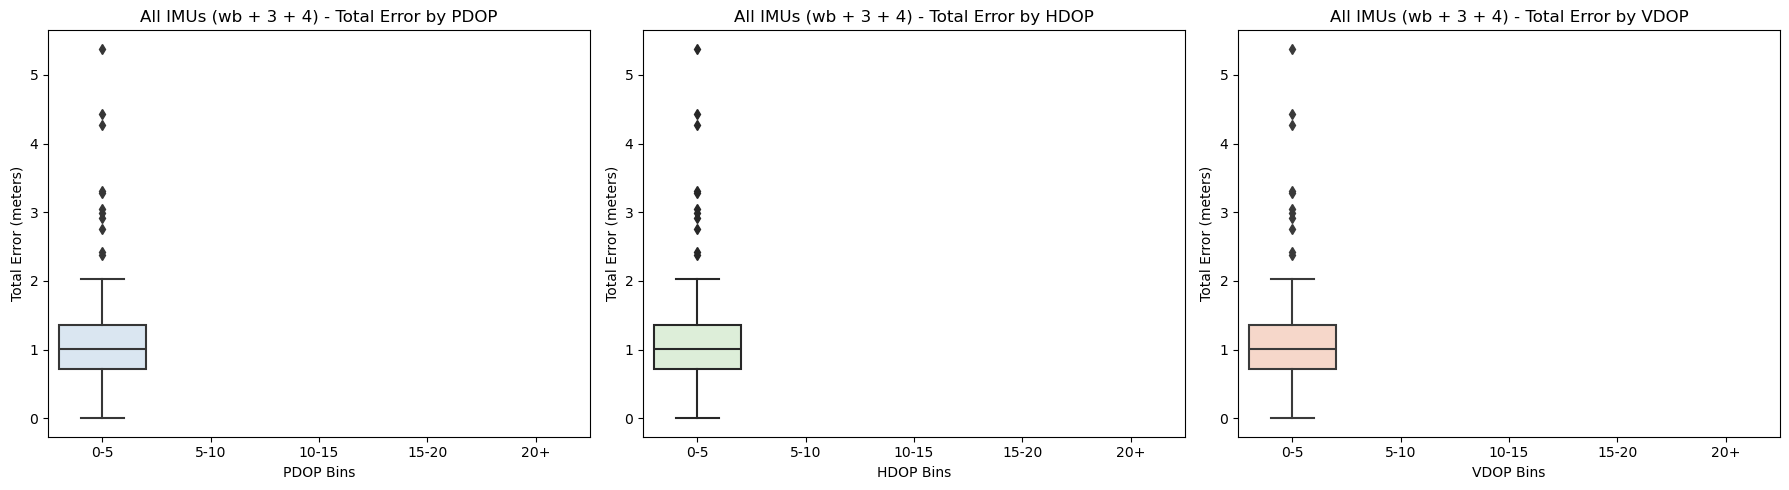

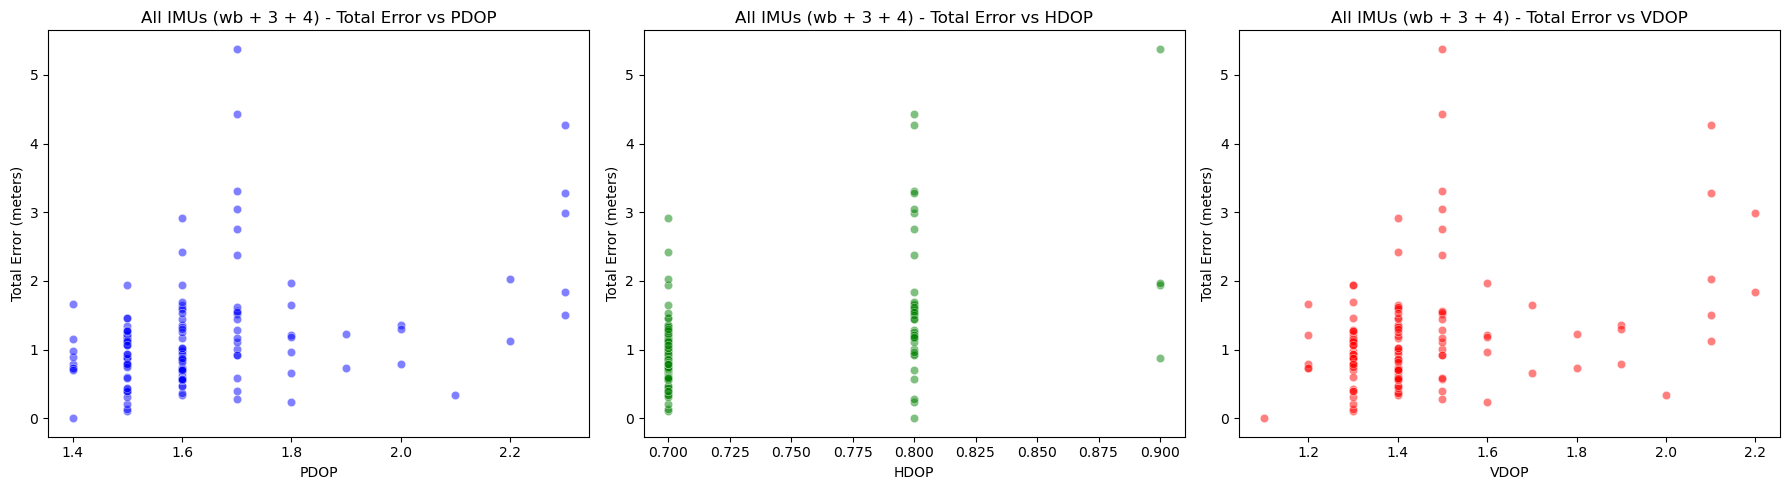

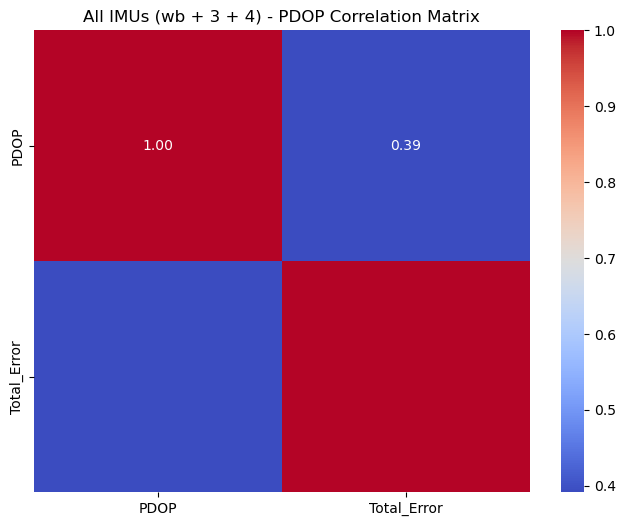

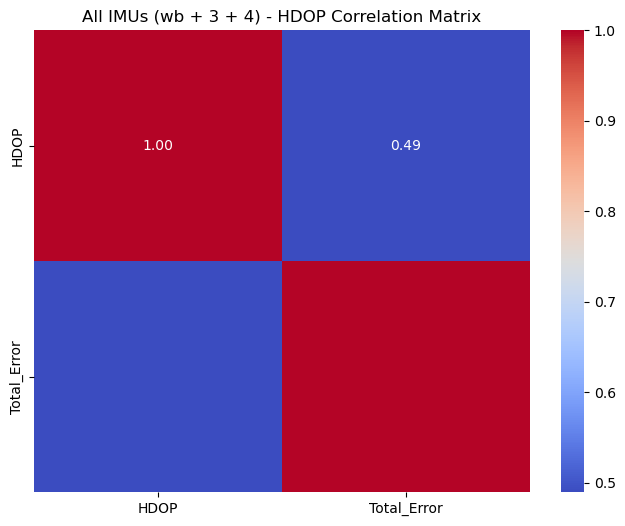

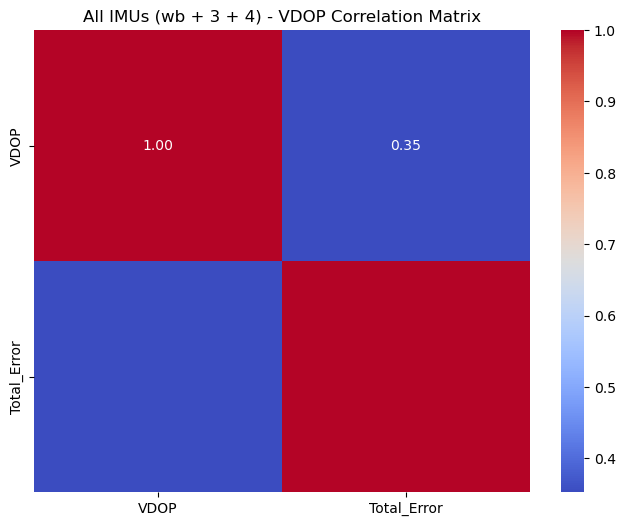

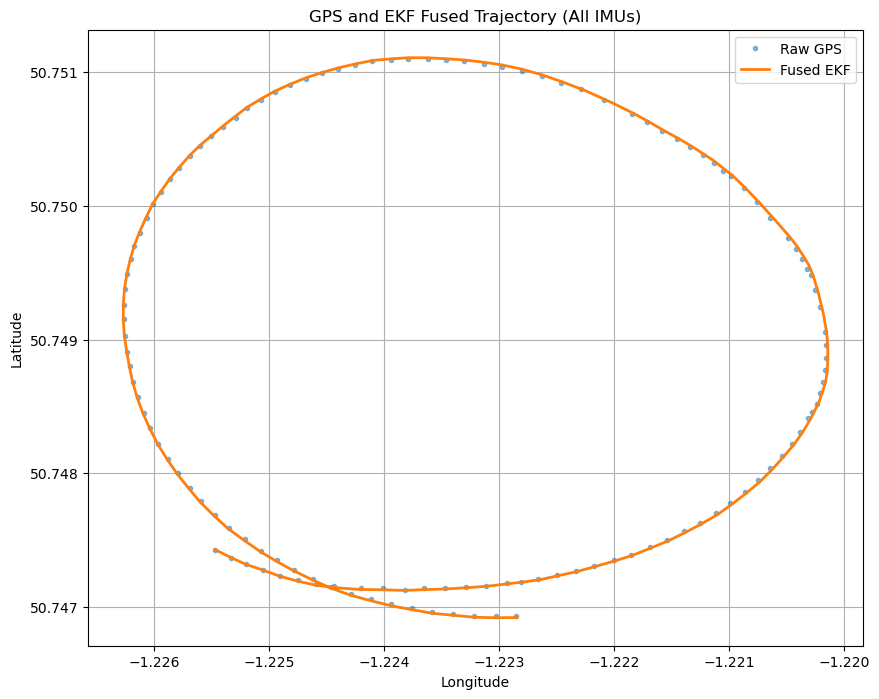

In [54]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer
import seaborn as sns

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '009_Fast_port_turn_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # IMU sensors

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# ================== Data Loading and Preprocessing ==================

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
try:
    gps_df = pd.read_csv(gps_file, usecols=gps_columns)
    log(f"GPS Data Loaded: {gps_df.shape[0]} rows")
except FileNotFoundError:
    sys.exit(f"Error: GPS file not found at path {gps_file}")
except Exception as e:
    sys.exit(f"Error loading GPS data: {e}")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    try:
        log(f"Loading IMU accelerometer data from {sensor}...")
        accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
        log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Accelerometer file not found for sensor {sensor} at path {accel_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading accelerometer data for sensor {sensor}: {e}")
    
    try:
        log(f"Loading IMU gyroscope data from {sensor}...")
        gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
        log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Gyroscope file not found for sensor {sensor} at path {gyro_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading gyroscope data for sensor {sensor}: {e}")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# Uncomment the next line if you want to drop NaNs
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Transform IMU Accelerometer Data Based on Orientations ===
# Define rotation mappings for each IMU based on their orientations

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row.get('x_accel_wb', 0), row.get('y_accel_wb', 0), row.get('z_accel_wb', 0)), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row.get('x_accel_3', 0), row.get('y_accel_3', 0), row.get('z_accel_3', 0)), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row.get('x_accel_4', 0), row.get('y_accel_4', 0), row.get('z_accel_4', 0)), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")

# ================== Extended Kalman Filter (EKF) Implementation ==================

# Function to run EKF based on selected IMU sensors
def run_ekf(data_df, selected_sensors, R_base):
    """
    Runs the EKF based on selected IMU sensors.
    
    Parameters:
    - data_df: Merged DataFrame containing GPS and selected IMU data.
    - selected_sensors: List of IMU sensors to use.
    - R_base: Base measurement noise covariance matrix.
    
    Returns:
    - data_df with estimated states.
    """
    # Initialize state vector [E, N, V_E, V_N]
    state = np.array([data_df.iloc[0]['E'],
                      data_df.iloc[0]['N'],
                      0,
                      0]).reshape(4,1)

    # Initialize covariance matrices
    P = np.eye(4) * 500  # Initial state covariance
    Q = np.eye(4)        # Process noise covariance
    I = np.eye(4)        # Identity matrix

    estimated_states = []
    
    for idx in range(len(data_df)):
        row = data_df.iloc[idx]
        
        # Time step
        if idx == 0:
            dt = 0.01  # Initial dt (e.g., 100Hz)
        else:
            dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
            if dt <= 0:
                dt = 0.01  # Handle non-positive dt
        
        # State Transition Matrix
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        # Control Input (if any)
        if selected_sensors:
            a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
            a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
            u = np.array([0.5 * a_E * dt**2,
                          0.5 * a_N * dt**2,
                          a_E * dt,
                          a_N * dt]).reshape(4,1)
        else:
            u = np.zeros((4,1))
        
        # Process model prediction
        state = F @ state + u
        P = F @ P @ F.T + Q
        
        # Measurement Update
        z = np.array([row['E'], row['N']]).reshape(2,1)
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])
        
        # Dynamically set R_gps based on HDOP
        current_hdop = row['HDOP']
        R_gps = (current_hdop ** 2) * R_base
        
        y_innovation = z - H @ state  # Innovation
        S = H @ P @ H.T + R_gps
        K = P @ H.T @ np.linalg.inv(S)
        
        state = state + K @ y_innovation
        P = (I - K @ H) @ P
        
        # Store the estimated state
        estimated_states.append(state.flatten())
        
        # Optional: Print progress
        if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
            log(f"Processed {idx} rows...")
    
    # Convert estimated states to DataFrame
    estimated_states = np.array(estimated_states)
    data_df['E_est'] = estimated_states[:,0]
    data_df['N_est'] = estimated_states[:,1]
    
    return data_df

# Function to aggregate IMU data based on selected sensors
def aggregate_imu_data(data_df, selected_sensors):
    """
    Aggregates accelerometer data from selected IMU sensors.
    
    Parameters:
    - data_df: DataFrame containing IMU data.
    - selected_sensors: List of IMU sensors to use.
    
    Returns:
    - data_df with aggregated accelerometer data.
    """
    if not selected_sensors:
        # No IMUs used
        data_df['x_accel_avg'] = 0
        data_df['y_accel_avg'] = 0
        data_df['z_accel_avg'] = 0
    else:
        # Check if the required transformed accelerometer columns exist
        required_columns_e = [f'E_accel_{sensor}' for sensor in selected_sensors]
        required_columns_n = [f'N_accel_{sensor}' for sensor in selected_sensors]
        required_columns_u = [f'U_accel_{sensor}' for sensor in selected_sensors]
        
        missing_e = [col for col in required_columns_e if col not in data_df.columns]
        missing_n = [col for col in required_columns_n if col not in data_df.columns]
        missing_u = [col for col in required_columns_u if col not in data_df.columns]
        
        if missing_e or missing_n or missing_u:
            missing = missing_e + missing_n + missing_u
            sys.exit(f"Error: Missing columns for IMU sensors {selected_sensors}: {missing}")
        
        # Aggregate accelerometer data
        data_df['x_accel_avg'] = data_df[required_columns_e].mean(axis=1)
        data_df['y_accel_avg'] = data_df[required_columns_n].mean(axis=1)
        data_df['z_accel_avg'] = data_df[required_columns_u].mean(axis=1)
    
    return data_df

# ================== Define IMU Configurations ==================

# Define base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy

# Define different IMU configurations
imu_configurations = {
    'No IMU': [],
    'Single IMU (wb)': ['wb'],
    'Single IMU (3)': ['3'],
    'Single IMU (4)': ['4'],
    'Dual IMUs (wb + 3)': ['wb', '3'],
    'Dual IMUs (wb + 4)': ['wb', '4'],
    'Dual IMUs (3 + 4)': ['3', '4'],
    'All IMUs (wb + 3 + 4)': ['wb', '3', '4']
}

# Dictionary to store results
results = {}

# ================== Run EKF for Each Configuration ==================

for config_name, sensors in imu_configurations.items():
    print(f"\n=== Running EKF for Configuration: {config_name} ===")
    
    if not sensors:
        # Scenario 1: No IMUs
        data_scenario = data_df.copy()
        data_scenario['x_accel_avg'] = 0
        data_scenario['y_accel_avg'] = 0
        data_scenario['z_accel_avg'] = 0
        
        # Initialize EKF estimates as GPS estimates
        data_scenario['E_est'] = data_scenario['E']
        data_scenario['N_est'] = data_scenario['N']
        
        # Calculate differences and errors
        data_scenario['E_diff'] = 0
        data_scenario['N_diff'] = 0
        data_scenario['Total_Error'] = 0
    else:
        # Scenario 2 & 3: With IMUs
        # Merge and aggregate IMU data based on selected sensors
        data_scenario = data_df.copy()
        data_scenario = aggregate_imu_data(data_scenario, sensors)
        
        # Run EKF
        data_scenario = run_ekf(data_scenario, sensors, R_base)
        
        # Calculate differences and errors
        data_scenario['E_diff'] = data_scenario['E_est'] - data_scenario['E']
        data_scenario['N_diff'] = data_scenario['N_est'] - data_scenario['N']
        data_scenario['Total_Error'] = np.sqrt(data_scenario['E_diff']**2 + data_scenario['N_diff']**2)
    
    # Store results
    results[config_name] = data_scenario

# ================== Comparative Analysis ==================

# Initialize a list to store RMSE statistics
comparison_list = []

for config_name, data in results.items():
    if config_name != 'No IMU':
        e_rmse = np.sqrt(np.mean(data['E_diff']**2))
        n_rmse = np.sqrt(np.mean(data['N_diff']**2))
        total_error_rmse = np.sqrt(np.mean(data['Total_Error']**2))
    else:
        # For No IMU, RMSEs are zero since E_est = E and N_est = N
        e_rmse = 0
        n_rmse = 0
        total_error_rmse = 0
    
    # Append the statistics as a dictionary
    comparison_list.append({
        'Configuration': config_name,
        'E_RMSE': e_rmse,
        'N_RMSE': n_rmse,
        'Total_Error_RMSE': total_error_rmse
    })

# Convert the list of dictionaries to a DataFrame using pd.DataFrame
comparison_df = pd.DataFrame(comparison_list)

print("\n=== Comparative RMSE Metrics ===")
print(comparison_df)

# ================== Visualization ==================

# Bar Chart of RMSE Metrics
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(14, 7))
plt.bar(r1, comparison_df['E_RMSE'], color='blue', width=bar_width, label='E_RMSE')
plt.bar(r2, comparison_df['N_RMSE'], color='green', width=bar_width, label='N_RMSE')
plt.bar(r3, comparison_df['Total_Error_RMSE'], color='red', width=bar_width, label='Total_Error_RMSE')

# Add labels and title
plt.xlabel('Configuration', fontweight='bold')
plt.ylabel('RMSE (meters)', fontweight='bold')
plt.title('Comparison of RMSE Metrics Across Configurations')
plt.xticks([r + bar_width for r in range(len(comparison_df))], comparison_df['Configuration'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ================== DOP-based Analysis ==================

# Define DOP bins
dop_bins = [0, 5, 10, 15, 20, np.inf]
dop_labels = ['0-5', '5-10', '10-15', '15-20', '20+']

# Function to plot DOP-based error statistics
def plot_dop_statistics(data_df, config_name):
    """
    Plots box plots and scatter plots of Total_Error against DOP metrics.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    # Box Plots of Total Error by DOP Bins
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='PDOP_bin', y='Total_Error', data=data_df, palette='Blues')
    plt.title(f'{config_name} - Total Error by PDOP')
    plt.xlabel('PDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='HDOP_bin', y='Total_Error', data=data_df, palette='Greens')
    plt.title(f'{config_name} - Total Error by HDOP')
    plt.xlabel('HDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='VDOP_bin', y='Total_Error', data=data_df, palette='Reds')
    plt.title(f'{config_name} - Total Error by VDOP')
    plt.xlabel('VDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Scatter Plots of DOP Metrics vs Total Error
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='PDOP', y='Total_Error', data=data_df, alpha=0.5, color='blue')
    plt.title(f'{config_name} - Total Error vs PDOP')
    plt.xlabel('PDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='HDOP', y='Total_Error', data=data_df, alpha=0.5, color='green')
    plt.title(f'{config_name} - Total Error vs HDOP')
    plt.xlabel('HDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='VDOP', y='Total_Error', data=data_df, alpha=0.5, color='red')
    plt.title(f'{config_name} - Total Error vs VDOP')
    plt.xlabel('VDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation Matrix Heatmap
    plt.figure(figsize=(8,6))
    corr_matrix_pdop = data_df[['PDOP', 'Total_Error']].corr()
    sns.heatmap(corr_matrix_pdop, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{config_name} - PDOP Correlation Matrix')
    plt.show()
    
    plt.figure(figsize=(8,6))
    corr_matrix_hdop = data_df[['HDOP', 'Total_Error']].corr()
    sns.heatmap(corr_matrix_hdop, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{config_name} - HDOP Correlation Matrix')
    plt.show()
    
    plt.figure(figsize=(8,6))
    corr_matrix_vdop = data_df[['VDOP', 'Total_Error']].corr()
    sns.heatmap(corr_matrix_vdop, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{config_name} - VDOP Correlation Matrix')
    plt.show()

# Iterate over configurations and perform DOP-based analysis
for config_name, data in results.items():
    if config_name != 'No IMU':
        # Binning DOP metrics
        data['PDOP_bin'] = pd.cut(data['PDOP'], bins=dop_bins, labels=dop_labels)
        data['HDOP_bin'] = pd.cut(data['HDOP'], bins=dop_bins, labels=dop_labels)
        data['VDOP_bin'] = pd.cut(data['VDOP'], bins=dop_bins, labels=dop_labels)
        
        # Plot DOP-based statistics
        plot_dop_statistics(data, config_name)

# ================== Optional: Plot Trajectories ==================

# Plotting the trajectories for the configuration with all IMUs
if 'All IMUs (wb + 3 + 4)' in results:
    data_all = results['All IMUs (wb + 3 + 4)']
    
    # Function to convert ENU back to lat/lon for plotting
    def enu_to_latlon(e, n, u):
        # Apply inverse rotation
        diff = np.array([e, n, u])
        ecef_diff = R.T @ diff
        # Compute ECEF coordinates
        x = ref_ecef[0] + ecef_diff[0]
        y = ref_ecef[1] + ecef_diff[1]
        z = ref_ecef[2] + ecef_diff[2]
        # Convert back to LLA
        lon, lat, alt = transformer_to_lla.transform(x, y, z)
        return lat, lon, alt
    
    # Convert ENU back to lat/lon for plotting
    log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
    latlon_est = data_all.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
    data_all['Lat_est'], data_all['Lng_est'], data_all['Alt_est'] = zip(*latlon_est)
    log("Conversion completed.")
    
    # Plotting the trajectories
    log("\nPlotting the trajectories...")
    plt.figure(figsize=(10,8))
    plt.plot(data_all['Lng'], data_all['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
    plt.plot(data_all['Lng_est'], data_all['Lat_est'], label='Fused EKF', linewidth=2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('GPS and EKF Fused Trajectory (All IMUs)')
    plt.legend()
    plt.grid()
    plt.show()

# ================== End of Script ==================



=== Running EKF for Configuration: No IMU ===

=== Running EKF for Configuration: Single IMU (wb) ===

=== Running EKF for Configuration: Single IMU (3) ===

=== Running EKF for Configuration: Single IMU (4) ===

=== Running EKF for Configuration: Dual IMUs (wb + 3) ===

=== Running EKF for Configuration: Dual IMUs (wb + 4) ===

=== Running EKF for Configuration: Dual IMUs (3 + 4) ===

=== Running EKF for Configuration: All IMUs (wb + 3 + 4) ===

=== Comparative RMSE Metrics ===
           Configuration    E_RMSE    N_RMSE  Total_Error_RMSE
0                 No IMU  0.000000  0.000000          0.000000
1        Single IMU (wb)  1.631971  1.048395          1.939707
2         Single IMU (3)  0.871814  1.069735          1.379997
3         Single IMU (4)  0.870155  1.077560          1.385029
4     Dual IMUs (wb + 3)  1.102351  1.057996          1.527918
5     Dual IMUs (wb + 4)  1.095758  1.062090          1.526015
6      Dual IMUs (3 + 4)  0.869637  1.072487          1.380759
7  All IMUs

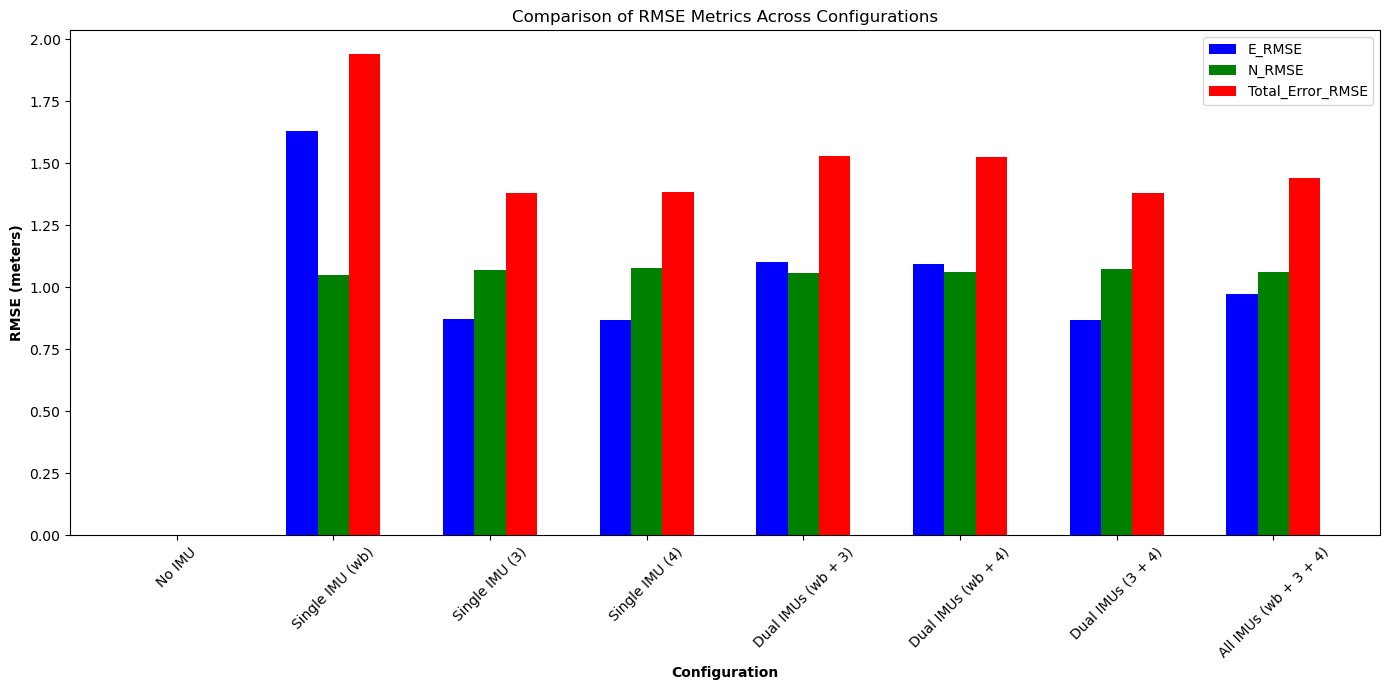

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

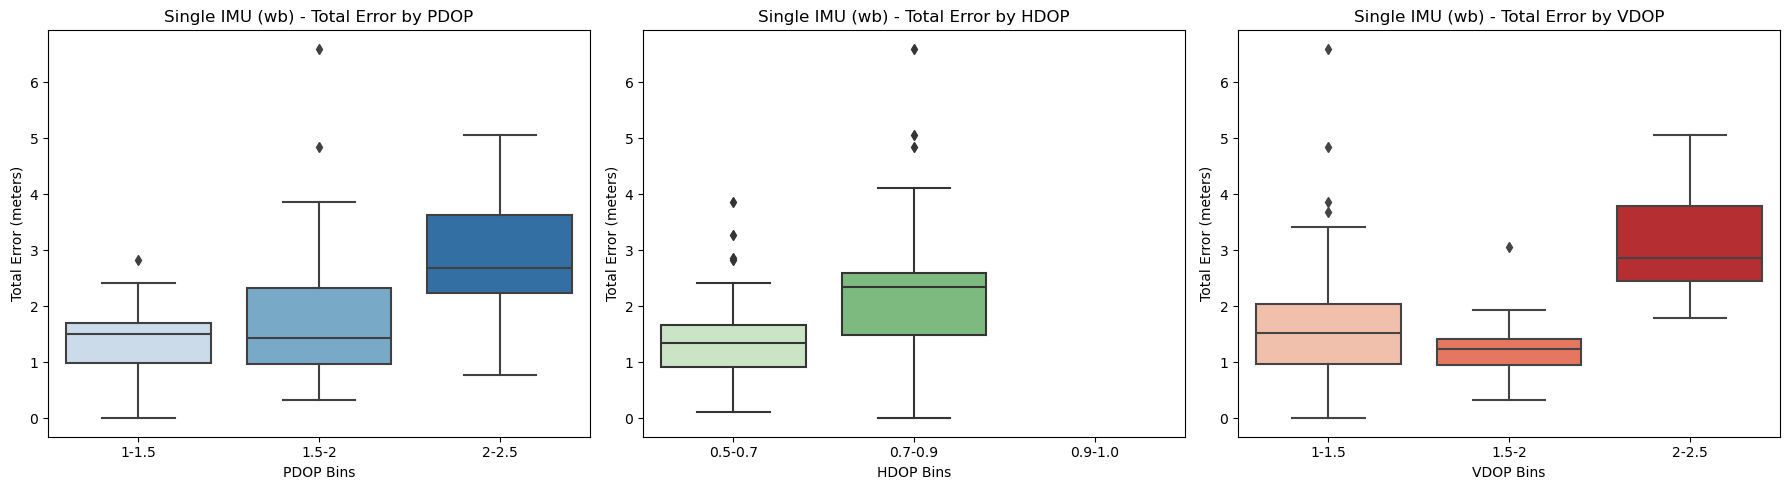

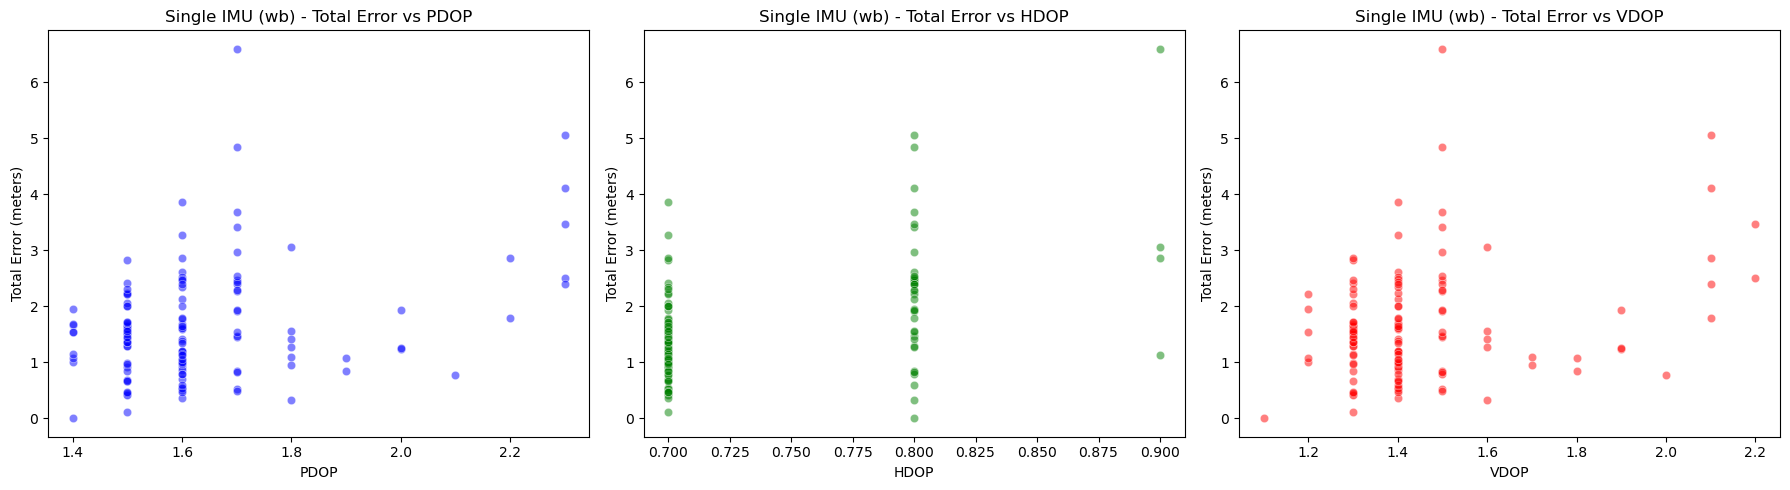

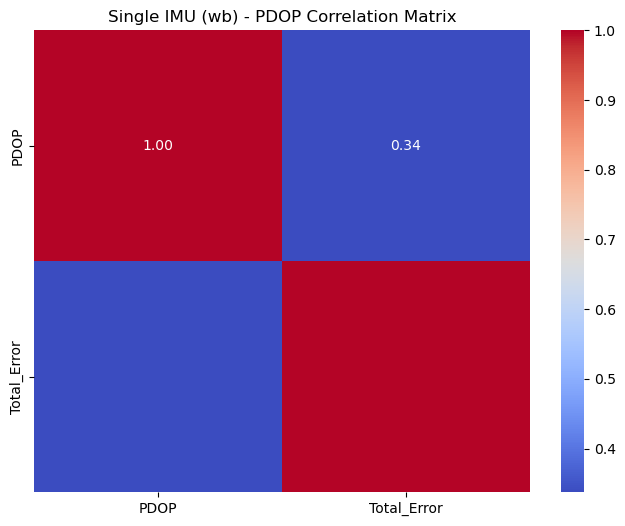

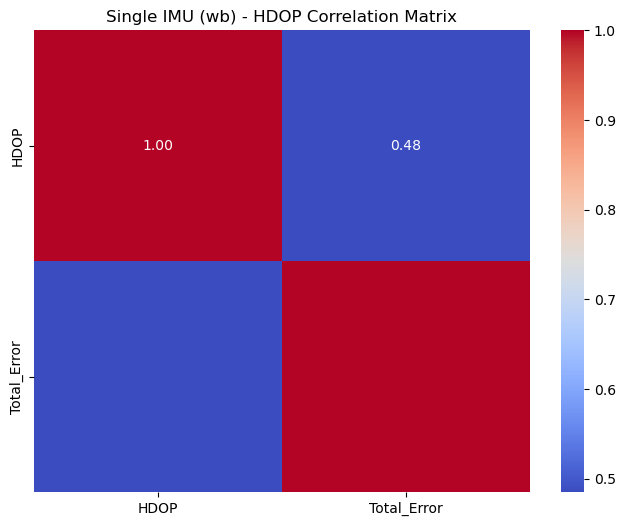

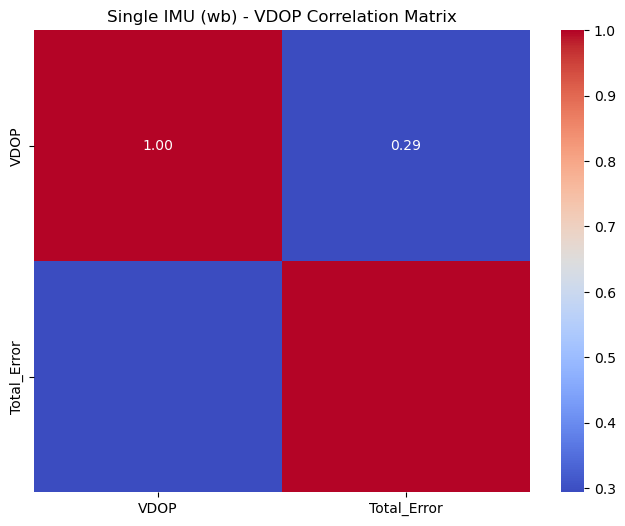

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

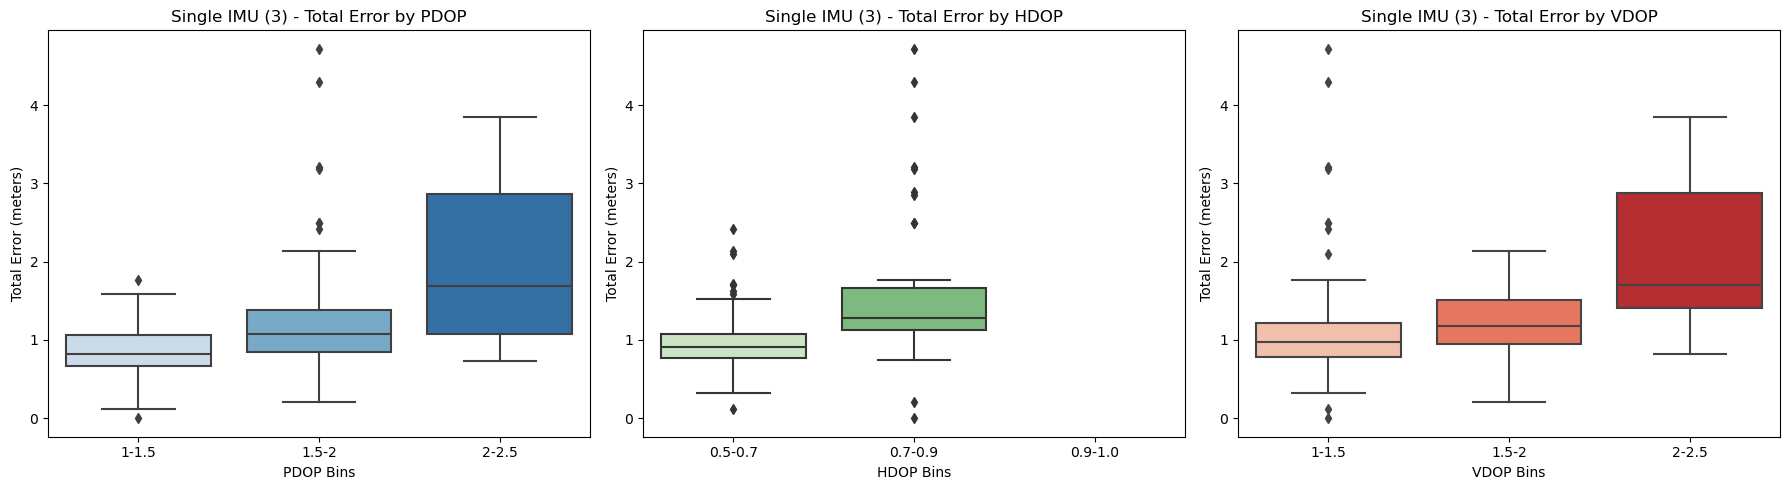

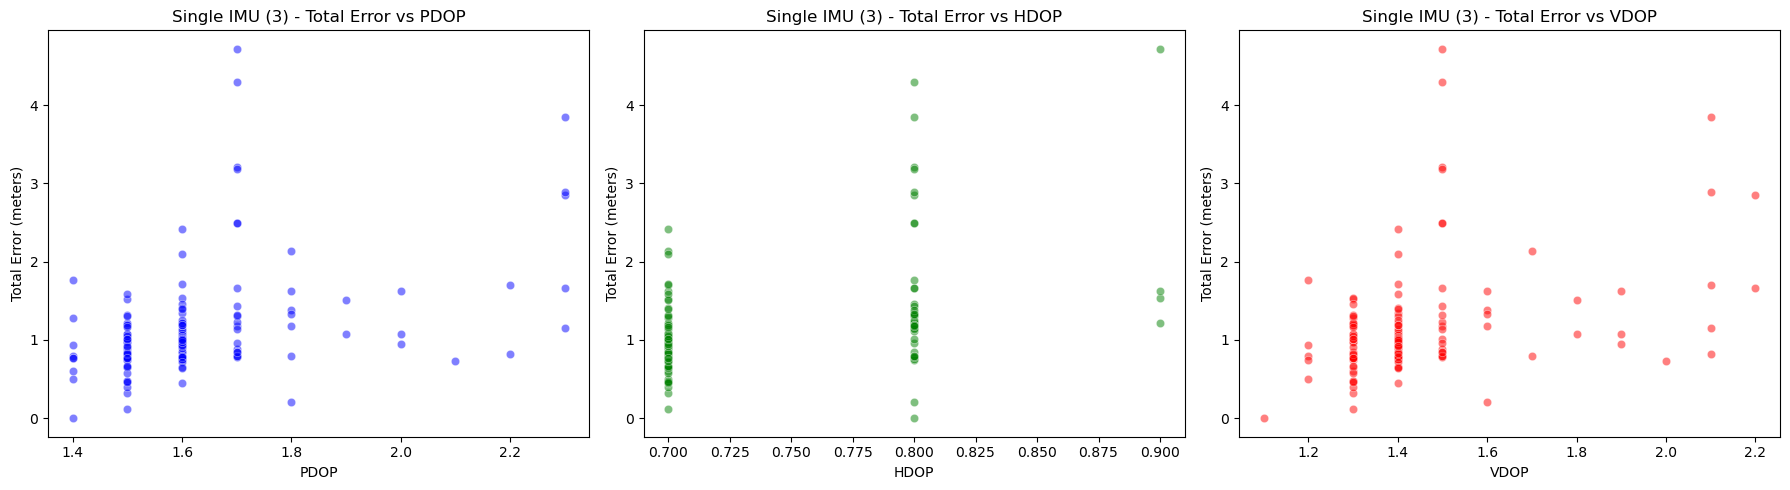

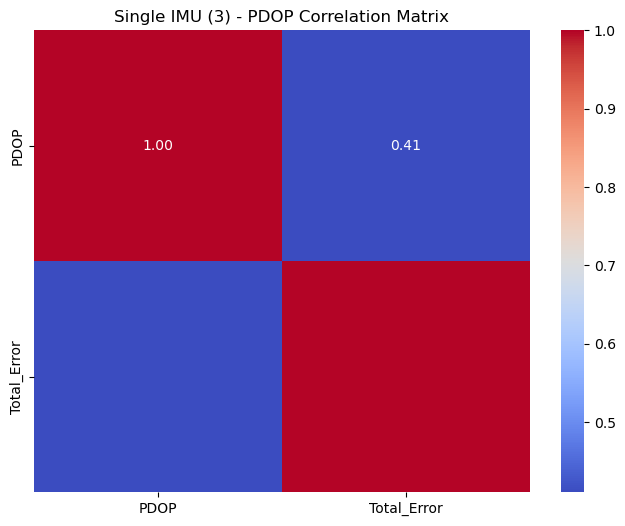

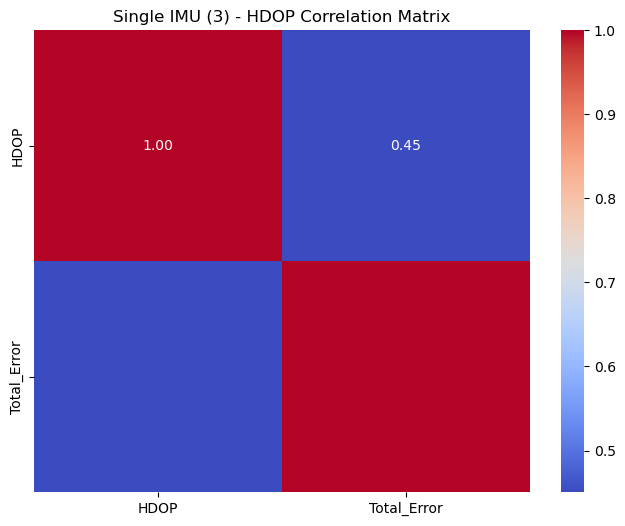

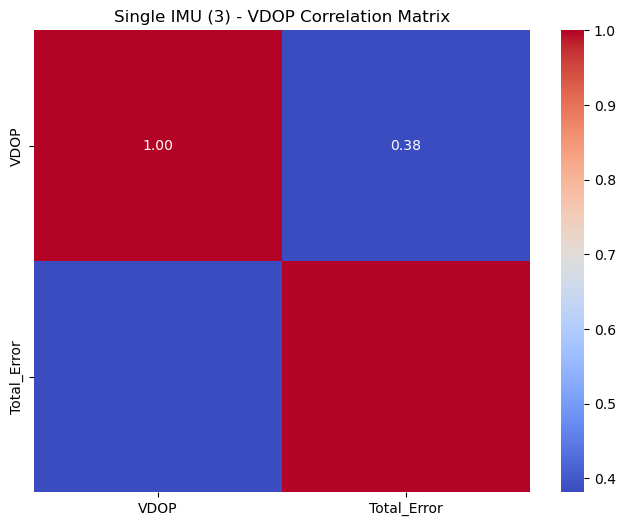

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

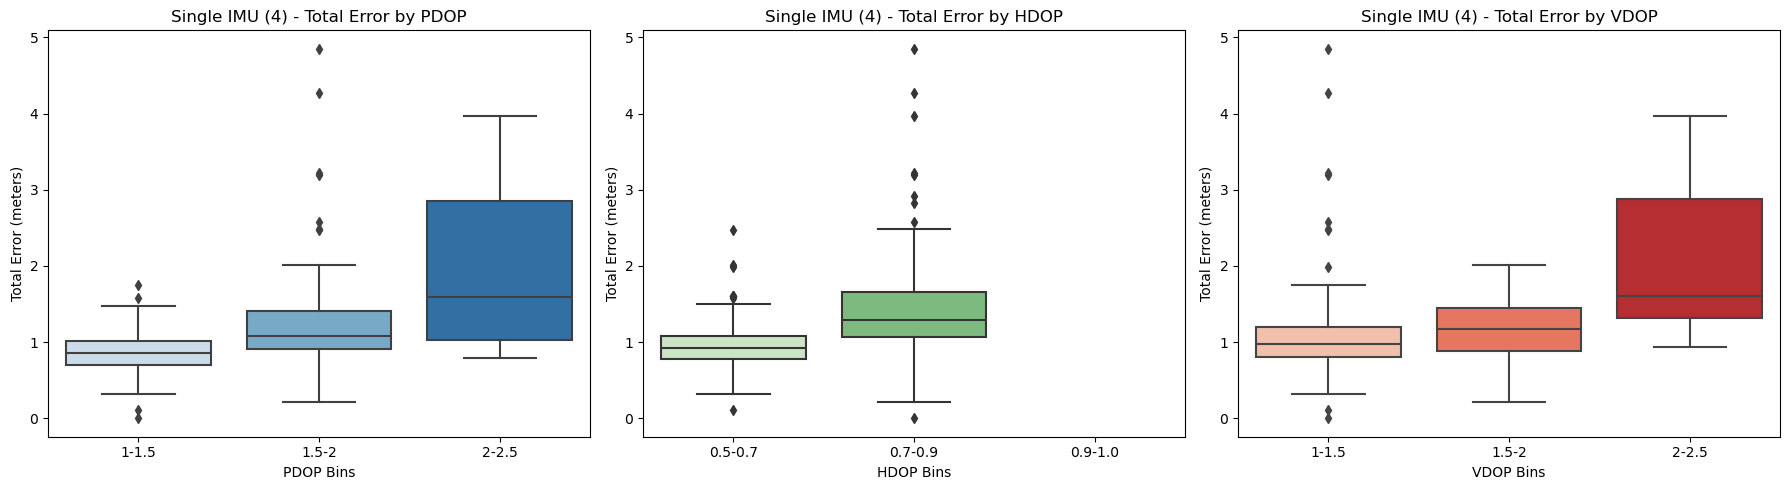

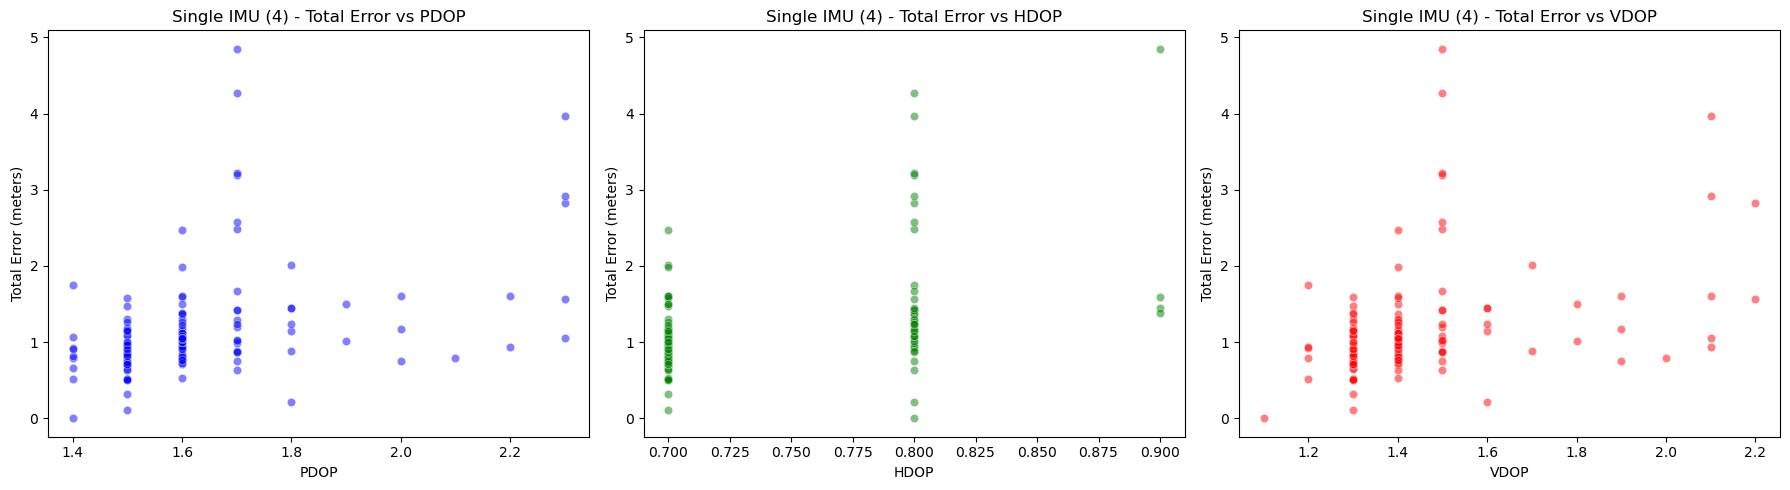

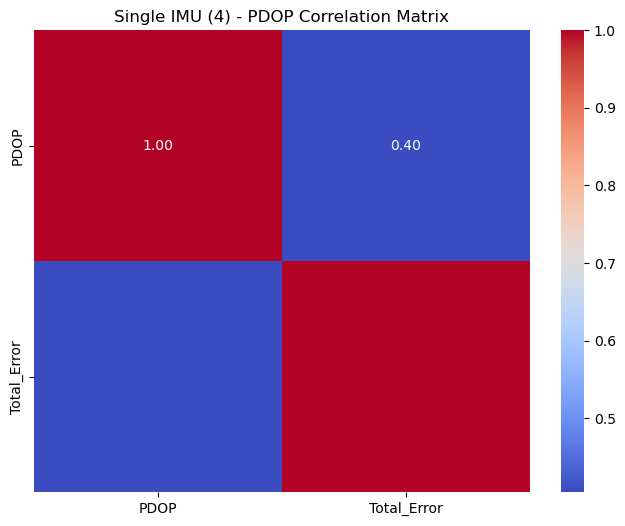

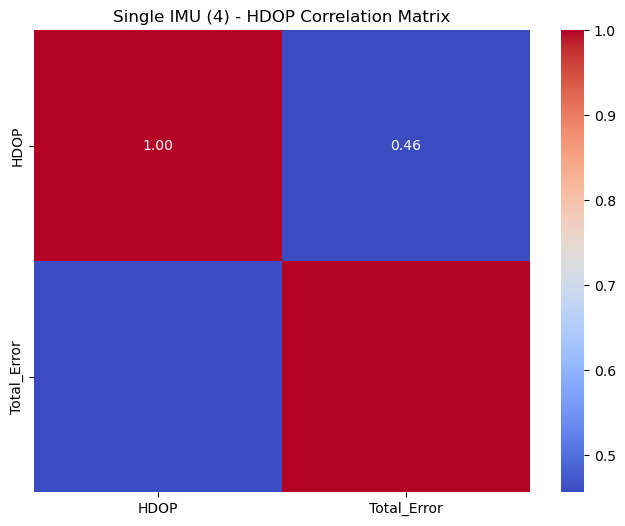

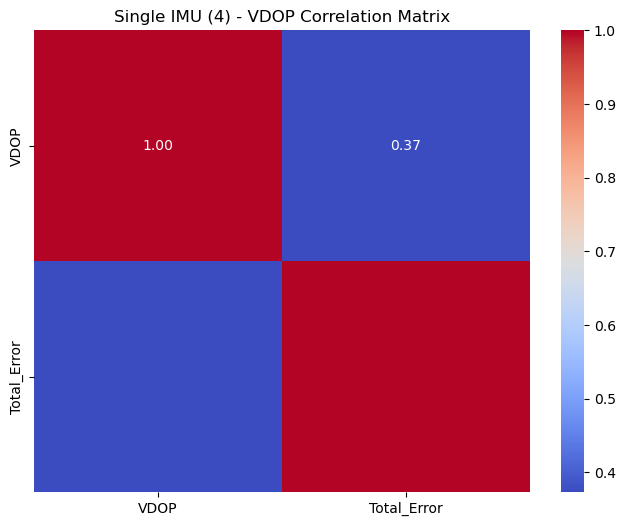

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

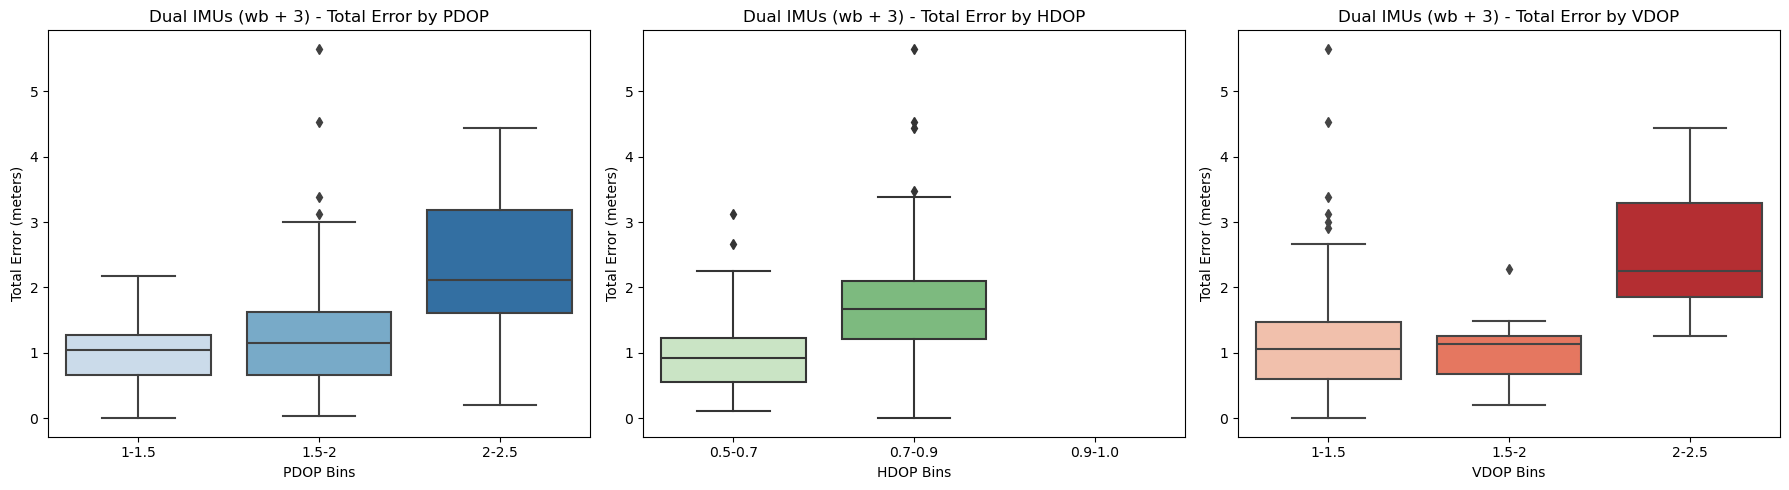

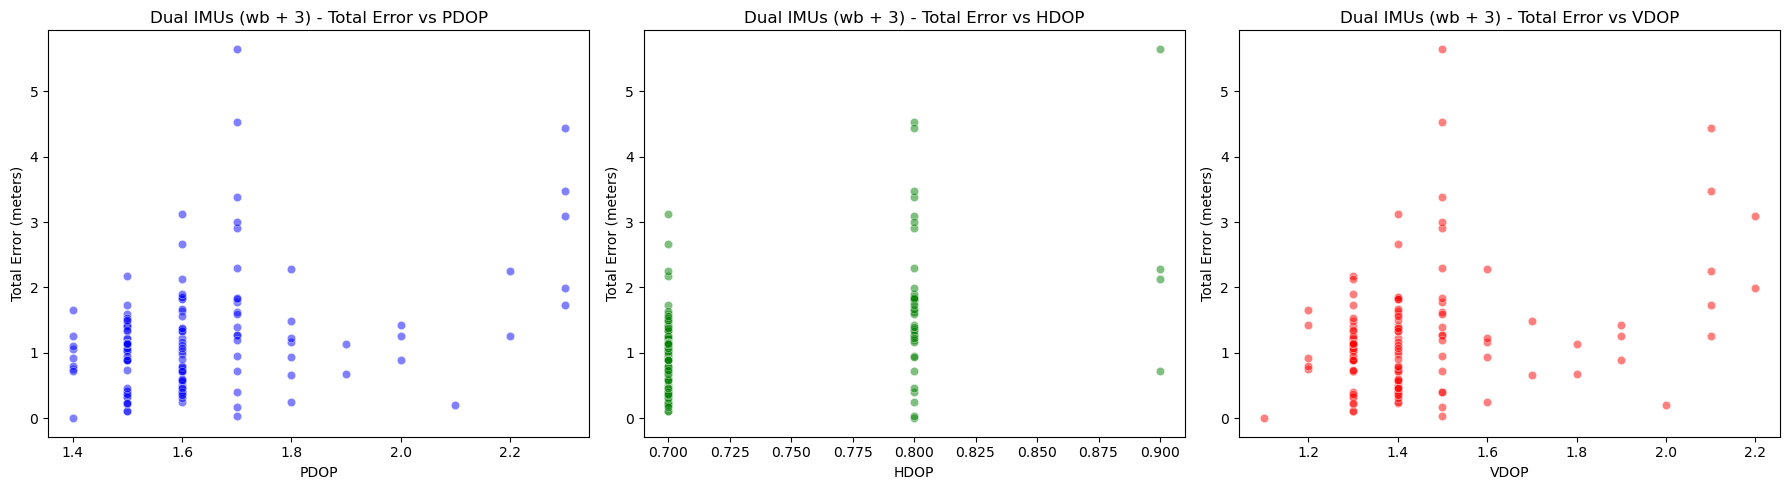

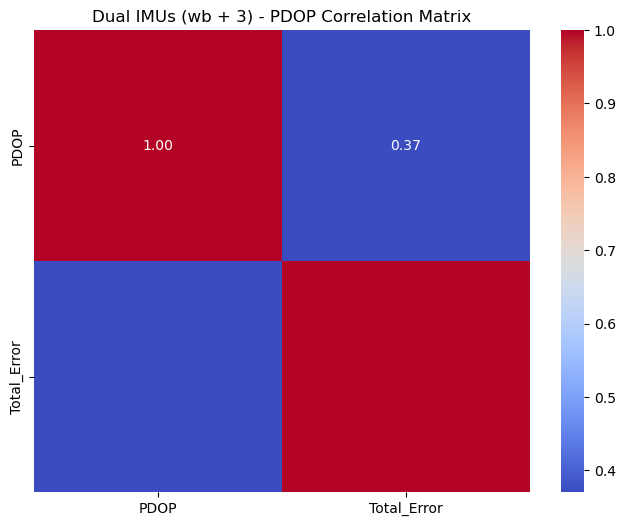

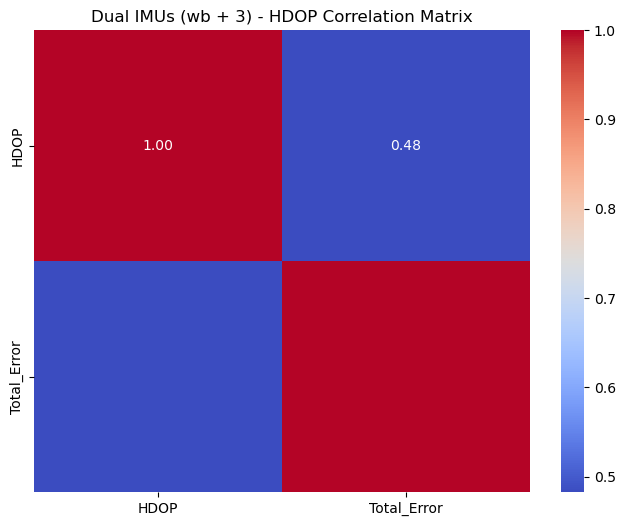

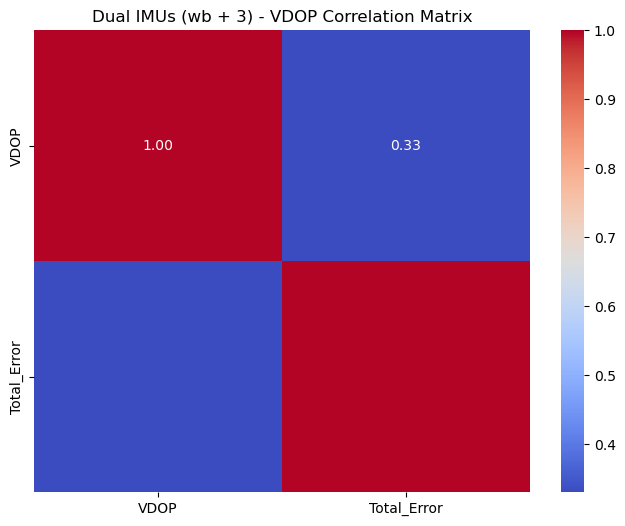

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

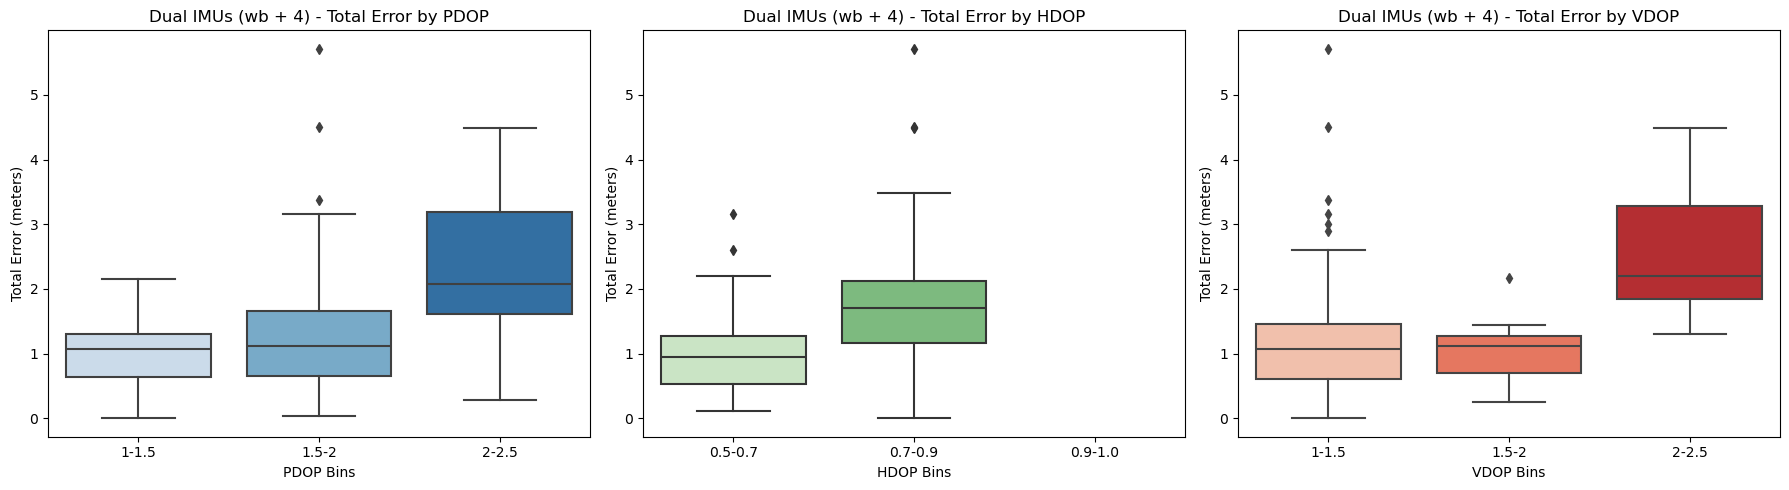

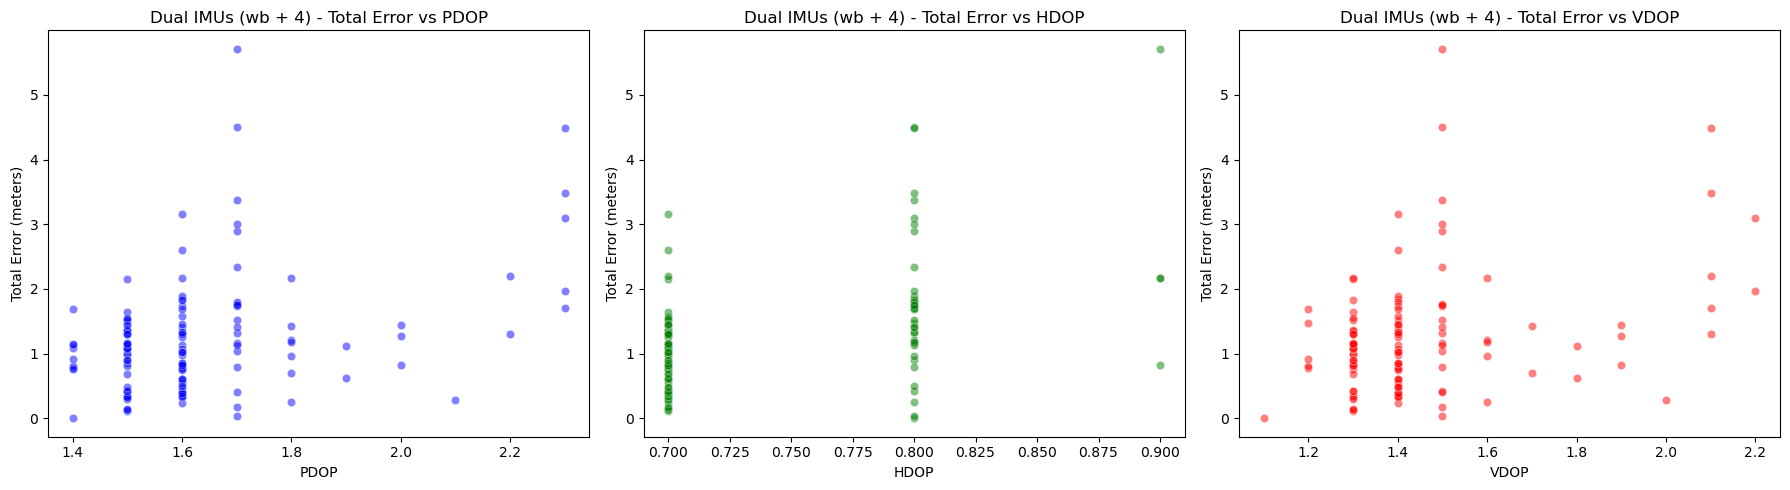

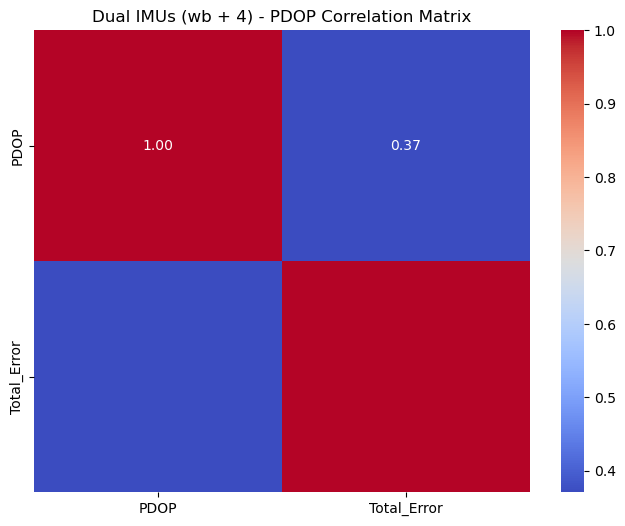

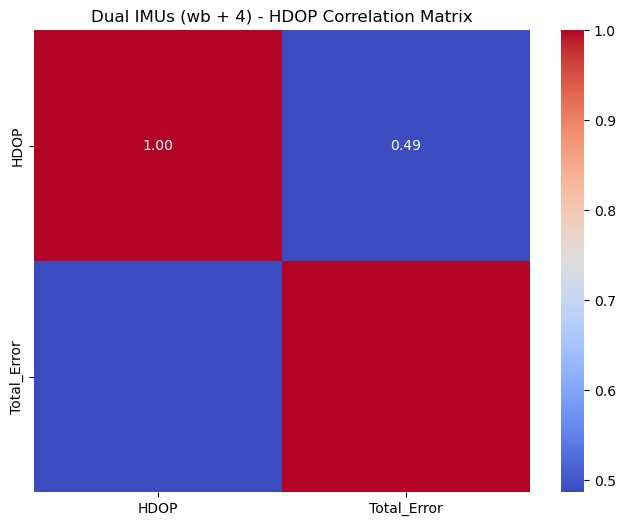

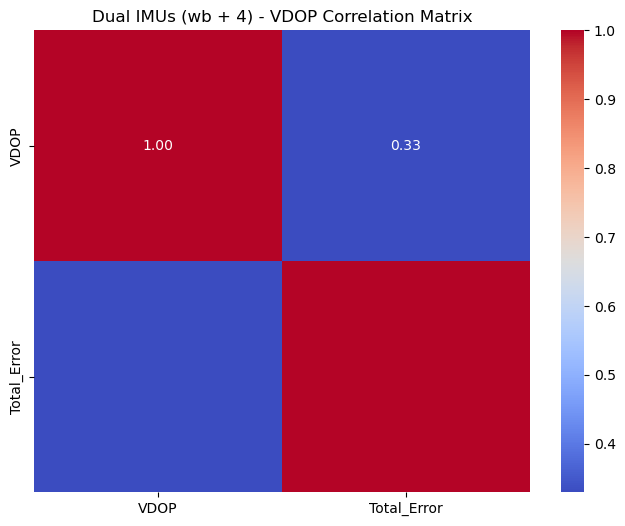

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

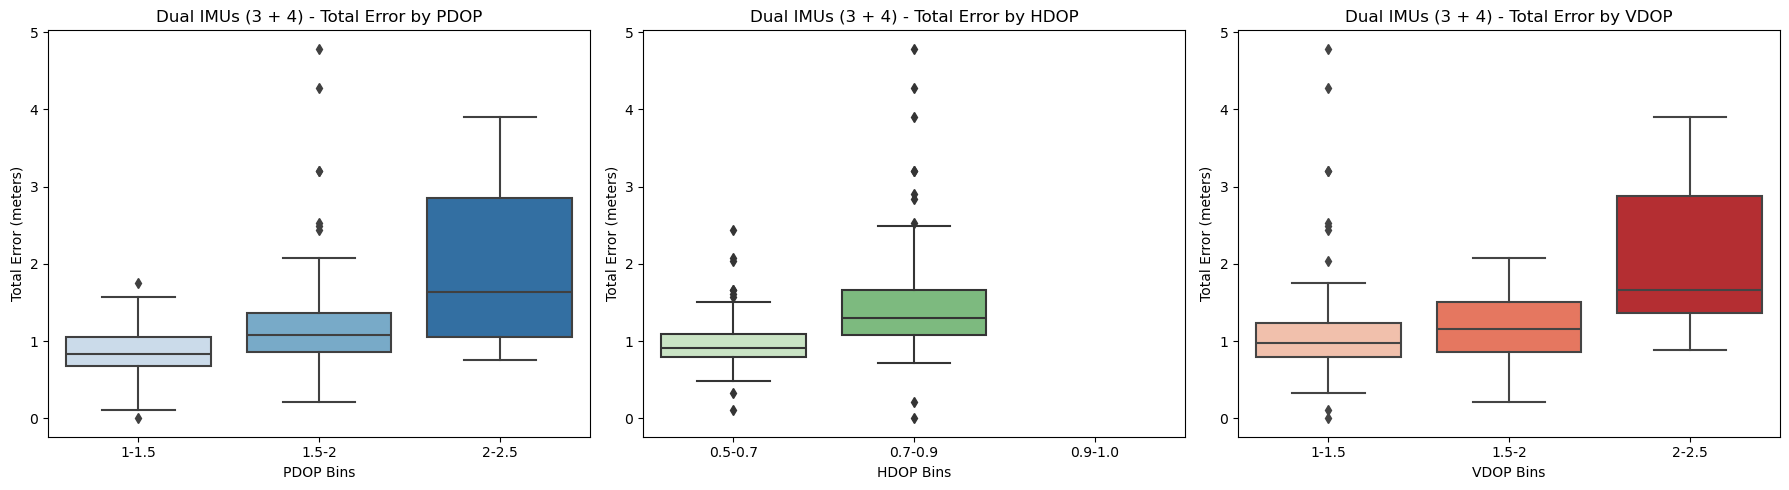

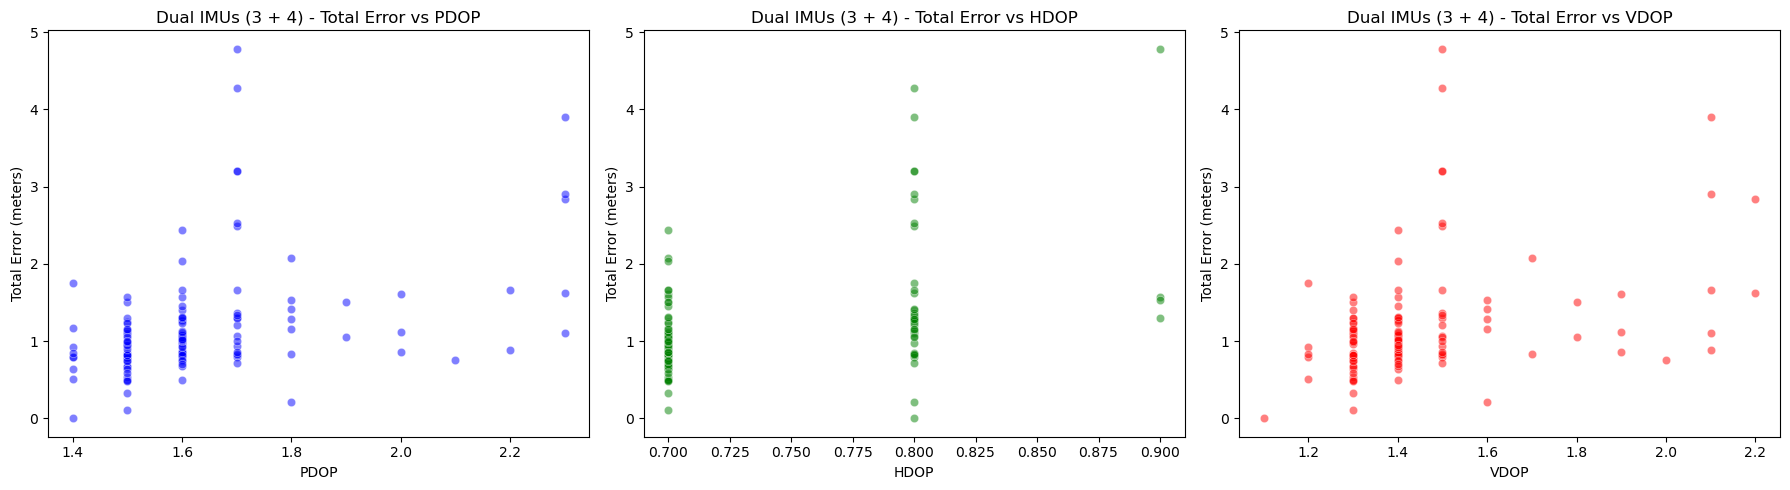

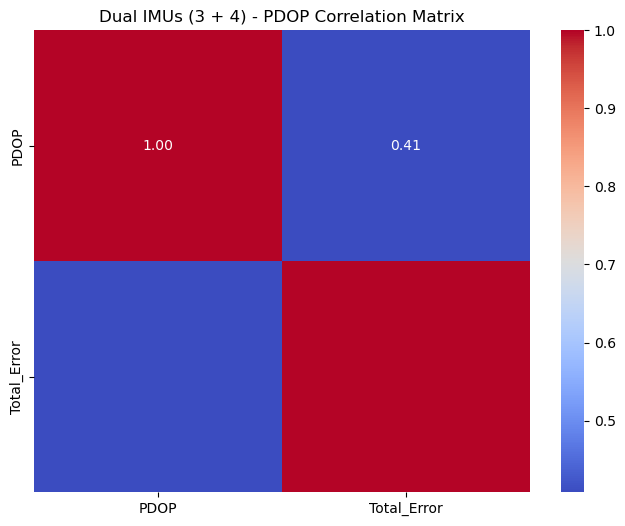

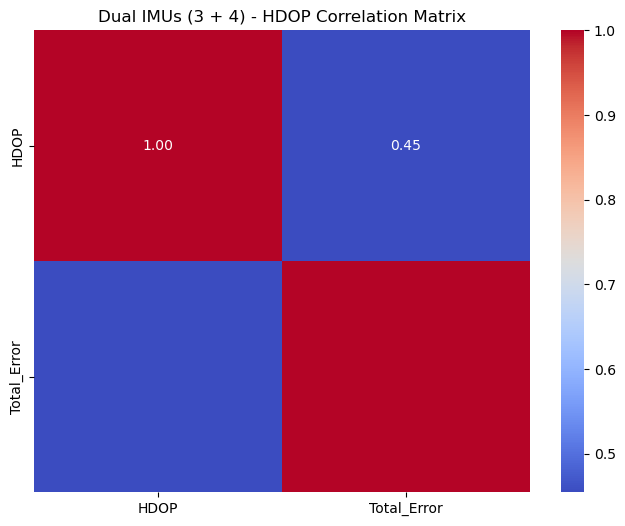

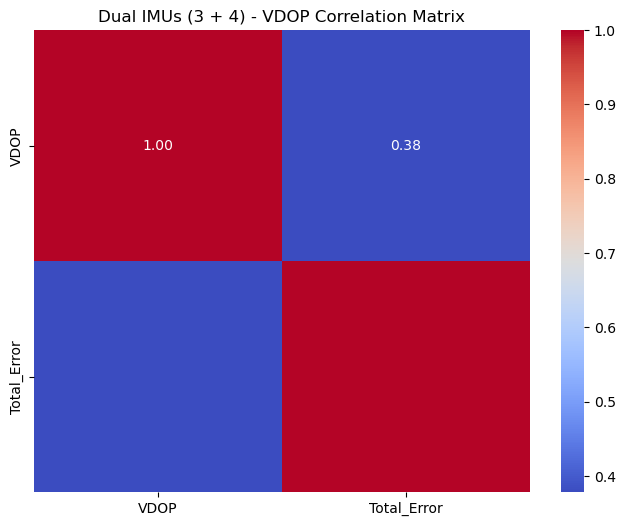

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

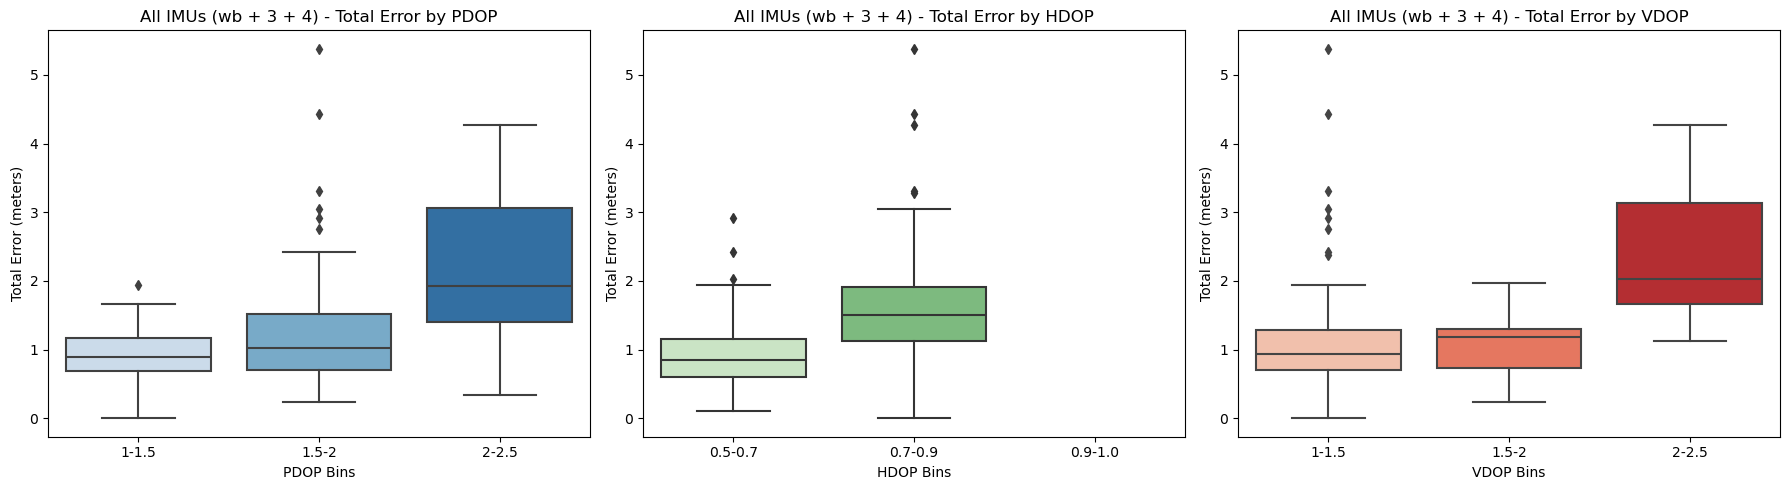

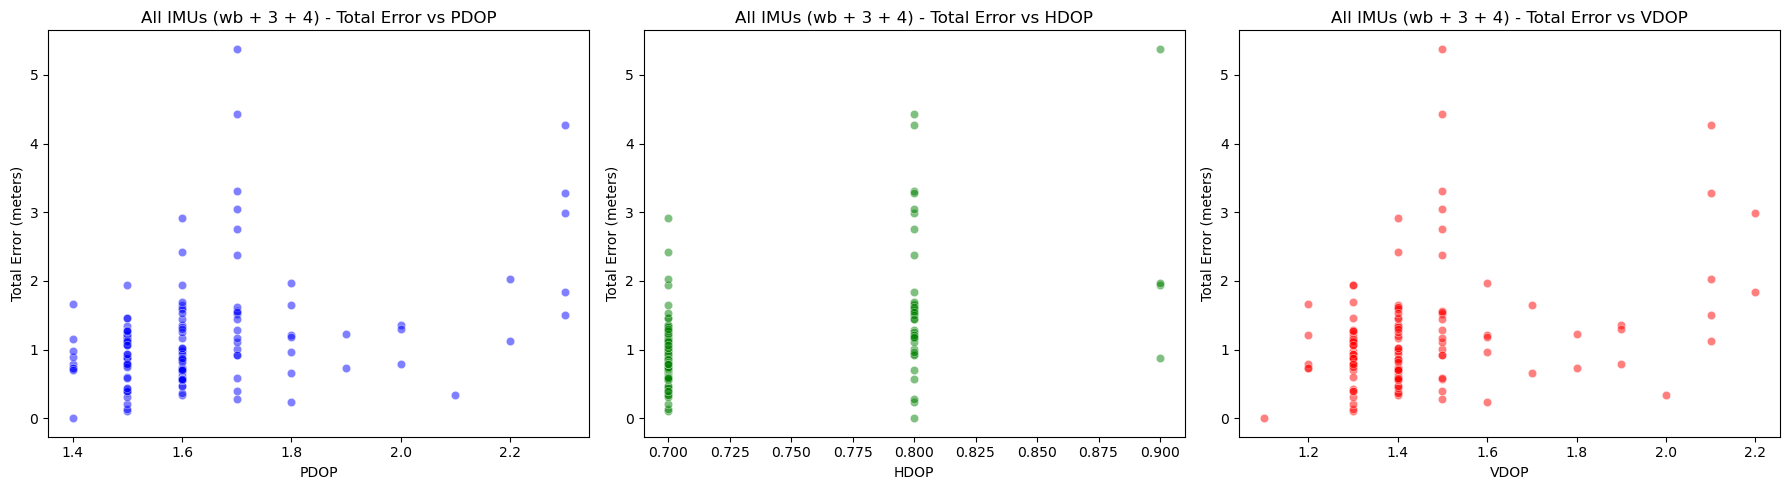

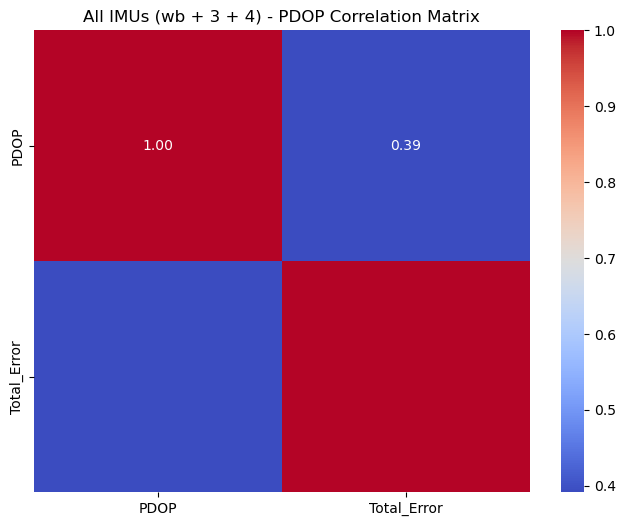

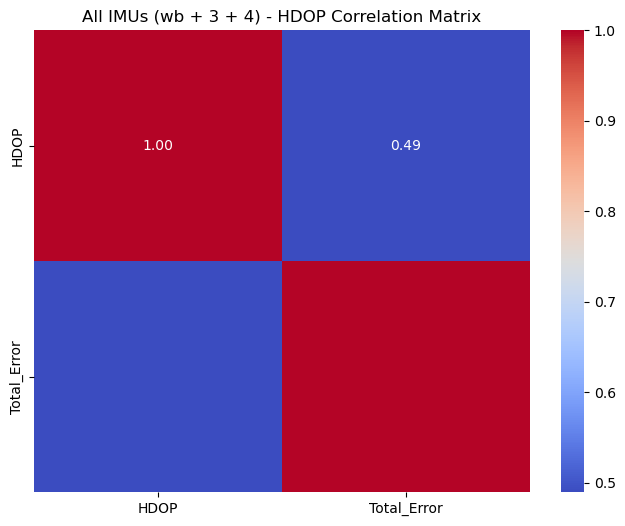

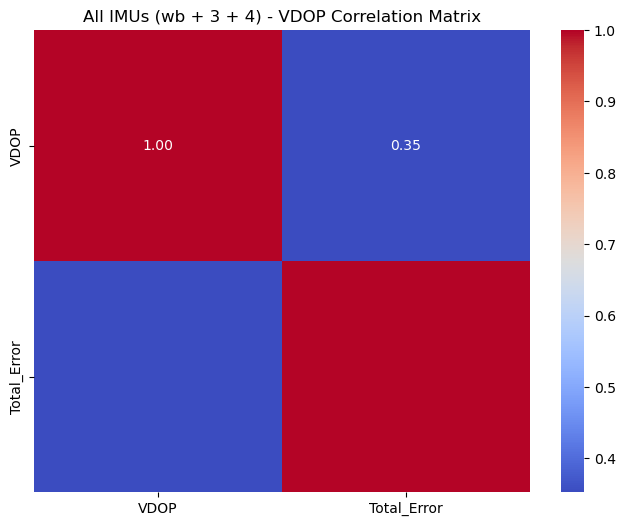

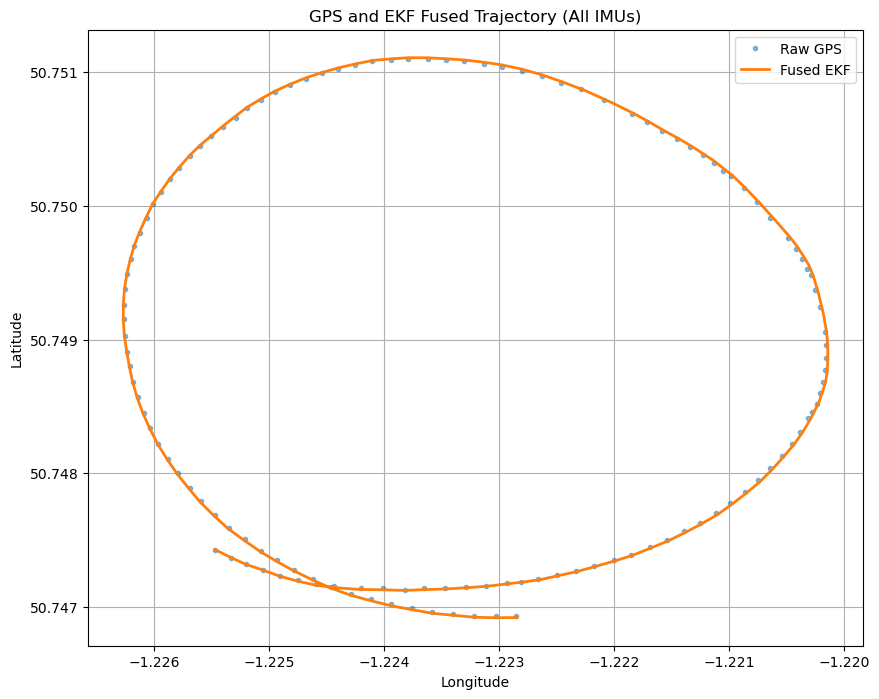

In [3]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer
import seaborn as sns

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '009_Fast_port_turn_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # IMU sensors

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# ================== Data Loading and Preprocessing ==================

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
try:
    gps_df = pd.read_csv(gps_file, usecols=gps_columns)
    log(f"GPS Data Loaded: {gps_df.shape[0]} rows")
except FileNotFoundError:
    sys.exit(f"Error: GPS file not found at path {gps_file}")
except Exception as e:
    sys.exit(f"Error loading GPS data: {e}")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    try:
        log(f"Loading IMU accelerometer data from {sensor}...")
        accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
        log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Accelerometer file not found for sensor {sensor} at path {accel_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading accelerometer data for sensor {sensor}: {e}")
    
    try:
        log(f"Loading IMU gyroscope data from {sensor}...")
        gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
        log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Gyroscope file not found for sensor {sensor} at path {gyro_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading gyroscope data for sensor {sensor}: {e}")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# Uncomment the next line if you want to drop NaNs
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Transform IMU Accelerometer Data Based on Orientations ===
# Define rotation mappings for each IMU based on their orientations

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row.get('x_accel_wb', 0), row.get('y_accel_wb', 0), row.get('z_accel_wb', 0)), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row.get('x_accel_3', 0), row.get('y_accel_3', 0), row.get('z_accel_3', 0)), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row.get('x_accel_4', 0), row.get('y_accel_4', 0), row.get('z_accel_4', 0)), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")

# ================== Extended Kalman Filter (EKF) Implementation ==================

# Function to run EKF based on selected IMU sensors
def run_ekf(data_df, selected_sensors, R_base):
    """
    Runs the EKF based on selected IMU sensors.
    
    Parameters:
    - data_df: Merged DataFrame containing GPS and selected IMU data.
    - selected_sensors: List of IMU sensors to use.
    - R_base: Base measurement noise covariance matrix.
    
    Returns:
    - data_df with estimated states.
    """
    # Initialize state vector [E, N, V_E, V_N]
    state = np.array([data_df.iloc[0]['E'],
                      data_df.iloc[0]['N'],
                      0,
                      0]).reshape(4,1)

    # Initialize covariance matrices
    P = np.eye(4) * 500  # Initial state covariance
    Q = np.eye(4)        # Process noise covariance
    I = np.eye(4)        # Identity matrix

    estimated_states = []
    
    for idx in range(len(data_df)):
        row = data_df.iloc[idx]
        
        # Time step
        if idx == 0:
            dt = 0.01  # Initial dt (e.g., 100Hz)
        else:
            dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
            if dt <= 0:
                dt = 0.01  # Handle non-positive dt
        
        # State Transition Matrix
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        # Control Input (if any)
        if selected_sensors:
            a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
            a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
            u = np.array([0.5 * a_E * dt**2,
                          0.5 * a_N * dt**2,
                          a_E * dt,
                          a_N * dt]).reshape(4,1)
        else:
            u = np.zeros((4,1))
        
        # Process model prediction
        state = F @ state + u
        P = F @ P @ F.T + Q
        
        # Measurement Update
        z = np.array([row['E'], row['N']]).reshape(2,1)
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])
        
        # Dynamically set R_gps based on HDOP
        current_hdop = row['HDOP']
        R_gps = (current_hdop ** 2) * R_base
        
        y_innovation = z - H @ state  # Innovation
        S = H @ P @ H.T + R_gps
        K = P @ H.T @ np.linalg.inv(S)
        
        state = state + K @ y_innovation
        P = (I - K @ H) @ P
        
        # Store the estimated state
        estimated_states.append(state.flatten())
        
        # Optional: Print progress
        if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
            log(f"Processed {idx} rows...")
    
    # Convert estimated states to DataFrame
    estimated_states = np.array(estimated_states)
    data_df['E_est'] = estimated_states[:,0]
    data_df['N_est'] = estimated_states[:,1]
    
    return data_df

# Function to aggregate IMU data based on selected sensors
def aggregate_imu_data(data_df, selected_sensors):
    """
    Aggregates accelerometer data from selected IMU sensors.
    
    Parameters:
    - data_df: DataFrame containing IMU data.
    - selected_sensors: List of IMU sensors to use.
    
    Returns:
    - data_df with aggregated accelerometer data.
    """
    if not selected_sensors:
        # No IMUs used
        data_df['x_accel_avg'] = 0
        data_df['y_accel_avg'] = 0
        data_df['z_accel_avg'] = 0
    else:
        # Check if the required transformed accelerometer columns exist
        required_columns_e = [f'E_accel_{sensor}' for sensor in selected_sensors]
        required_columns_n = [f'N_accel_{sensor}' for sensor in selected_sensors]
        required_columns_u = [f'U_accel_{sensor}' for sensor in selected_sensors]
        
        missing_e = [col for col in required_columns_e if col not in data_df.columns]
        missing_n = [col for col in required_columns_n if col not in data_df.columns]
        missing_u = [col for col in required_columns_u if col not in data_df.columns]
        
        if missing_e or missing_n or missing_u:
            missing = missing_e + missing_n + missing_u
            sys.exit(f"Error: Missing columns for IMU sensors {selected_sensors}: {missing}")
        
        # Aggregate accelerometer data
        data_df['x_accel_avg'] = data_df[required_columns_e].mean(axis=1)
        data_df['y_accel_avg'] = data_df[required_columns_n].mean(axis=1)
        data_df['z_accel_avg'] = data_df[required_columns_u].mean(axis=1)
    
    return data_df

# ================== Define IMU Configurations ==================

# Define base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy

# Define different IMU configurations
imu_configurations = {
    'No IMU': [],
    'Single IMU (wb)': ['wb'],
    'Single IMU (3)': ['3'],
    'Single IMU (4)': ['4'],
    'Dual IMUs (wb + 3)': ['wb', '3'],
    'Dual IMUs (wb + 4)': ['wb', '4'],
    'Dual IMUs (3 + 4)': ['3', '4'],
    'All IMUs (wb + 3 + 4)': ['wb', '3', '4']
}

# Dictionary to store results
results = {}

# ================== Run EKF for Each Configuration ==================

for config_name, sensors in imu_configurations.items():
    print(f"\n=== Running EKF for Configuration: {config_name} ===")
    
    if not sensors:
        # Scenario 1: No IMUs
        data_scenario = data_df.copy()
        data_scenario['x_accel_avg'] = 0
        data_scenario['y_accel_avg'] = 0
        data_scenario['z_accel_avg'] = 0
        
        # Initialize EKF estimates as GPS estimates
        data_scenario['E_est'] = data_scenario['E']
        data_scenario['N_est'] = data_scenario['N']
        
        # Calculate differences and errors
        data_scenario['E_diff'] = 0
        data_scenario['N_diff'] = 0
        data_scenario['Total_Error'] = 0
    else:
        # Scenario 2 & 3: With IMUs
        # Merge and aggregate IMU data based on selected sensors
        data_scenario = data_df.copy()
        data_scenario = aggregate_imu_data(data_scenario, sensors)
        
        # Run EKF
        data_scenario = run_ekf(data_scenario, sensors, R_base)
        
        # Calculate differences and errors
        data_scenario['E_diff'] = data_scenario['E_est'] - data_scenario['E']
        data_scenario['N_diff'] = data_scenario['N_est'] - data_scenario['N']
        data_scenario['Total_Error'] = np.sqrt(data_scenario['E_diff']**2 + data_scenario['N_diff']**2)
    
    # Store results
    results[config_name] = data_scenario

# ================== Comparative Analysis ==================

# Initialize a list to store RMSE statistics
comparison_list = []

for config_name, data in results.items():
    if config_name != 'No IMU':
        e_rmse = np.sqrt(np.mean(data['E_diff']**2))
        n_rmse = np.sqrt(np.mean(data['N_diff']**2))
        total_error_rmse = np.sqrt(np.mean(data['Total_Error']**2))
    else:
        # For No IMU, RMSEs are zero since E_est = E and N_est = N
        e_rmse = 0
        n_rmse = 0
        total_error_rmse = 0
    
    # Append the statistics as a dictionary
    comparison_list.append({
        'Configuration': config_name,
        'E_RMSE': e_rmse,
        'N_RMSE': n_rmse,
        'Total_Error_RMSE': total_error_rmse
    })

# Convert the list of dictionaries to a DataFrame using pd.DataFrame
comparison_df = pd.DataFrame(comparison_list)

print("\n=== Comparative RMSE Metrics ===")
print(comparison_df)

# ================== Visualization ==================

# Bar Chart of RMSE Metrics
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(14, 7))
plt.bar(r1, comparison_df['E_RMSE'], color='blue', width=bar_width, label='E_RMSE')
plt.bar(r2, comparison_df['N_RMSE'], color='green', width=bar_width, label='N_RMSE')
plt.bar(r3, comparison_df['Total_Error_RMSE'], color='red', width=bar_width, label='Total_Error_RMSE')

# Add labels and title
plt.xlabel('Configuration', fontweight='bold')
plt.ylabel('RMSE (meters)', fontweight='bold')
plt.title('Comparison of RMSE Metrics Across Configurations')
plt.xticks([r + bar_width for r in range(len(comparison_df))], comparison_df['Configuration'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ================== DOP-based Analysis ==================

# Define DOP bins based on specified ranges
pdop_bins = [1, 1.5, 2, 2.5]
pdop_labels = ['1-1.5', '1.5-2', '2-2.5']

hdop_bins = [0.5, 0.7, 0.9, 1.0]
hdop_labels = ['0.5-0.7', '0.7-0.9', '0.9-1.0']

vdop_bins = [1, 1.5, 2, 2.5]
vdop_labels = ['1-1.5', '1.5-2', '2-2.5']

# Function to plot DOP-based error statistics
def plot_dop_statistics(data_df, config_name):
    """
    Plots box plots and scatter plots of Total_Error against DOP metrics.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    # Box Plots of Total Error by DOP Bins
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='PDOP_bin', y='Total_Error', data=data_df, palette='Blues')
    plt.title(f'{config_name} - Total Error by PDOP')
    plt.xlabel('PDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='HDOP_bin', y='Total_Error', data=data_df, palette='Greens')
    plt.title(f'{config_name} - Total Error by HDOP')
    plt.xlabel('HDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='VDOP_bin', y='Total_Error', data=data_df, palette='Reds')
    plt.title(f'{config_name} - Total Error by VDOP')
    plt.xlabel('VDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Scatter Plots of DOP Metrics vs Total Error
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='PDOP', y='Total_Error', data=data_df, alpha=0.5, color='blue')
    plt.title(f'{config_name} - Total Error vs PDOP')
    plt.xlabel('PDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='HDOP', y='Total_Error', data=data_df, alpha=0.5, color='green')
    plt.title(f'{config_name} - Total Error vs HDOP')
    plt.xlabel('HDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='VDOP', y='Total_Error', data=data_df, alpha=0.5, color='red')
    plt.title(f'{config_name} - Total Error vs VDOP')
    plt.xlabel('VDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation Matrix Heatmap
    plt.figure(figsize=(8,6))
    corr_matrix_pdop = data_df[['PDOP', 'Total_Error']].corr()
    sns.heatmap(corr_matrix_pdop, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{config_name} - PDOP Correlation Matrix')
    plt.show()
    
    plt.figure(figsize=(8,6))
    corr_matrix_hdop = data_df[['HDOP', 'Total_Error']].corr()
    sns.heatmap(corr_matrix_hdop, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{config_name} - HDOP Correlation Matrix')
    plt.show()
    
    plt.figure(figsize=(8,6))
    corr_matrix_vdop = data_df[['VDOP', 'Total_Error']].corr()
    sns.heatmap(corr_matrix_vdop, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{config_name} - VDOP Correlation Matrix')
    plt.show()

# Iterate over configurations and perform DOP-based analysis
for config_name, data in results.items():
    if config_name != 'No IMU':
        # Binning DOP metrics based on specified ranges
        data['PDOP_bin'] = pd.cut(data['PDOP'], bins=pdop_bins, labels=pdop_labels, include_lowest=True)
        data['HDOP_bin'] = pd.cut(data['HDOP'], bins=hdop_bins, labels=hdop_labels, include_lowest=True)
        data['VDOP_bin'] = pd.cut(data['VDOP'], bins=vdop_bins, labels=vdop_labels, include_lowest=True)
        
        # Plot DOP-based statistics
        plot_dop_statistics(data, config_name)

# ================== Optional: Plot Trajectories ==================

# Plotting the trajectories for the configuration with all IMUs
if 'All IMUs (wb + 3 + 4)' in results:
    data_all = results['All IMUs (wb + 3 + 4)']
    
    # Function to convert ENU back to lat/lon for plotting
    def enu_to_latlon(e, n, u):
        # Apply inverse rotation
        diff = np.array([e, n, u])
        ecef_diff = R.T @ diff
        # Compute ECEF coordinates
        x = ref_ecef[0] + ecef_diff[0]
        y = ref_ecef[1] + ecef_diff[1]
        z = ref_ecef[2] + ecef_diff[2]
        # Convert back to LLA
        lon, lat, alt = transformer_to_lla.transform(x, y, z)
        return lat, lon, alt
    
    # Convert ENU back to lat/lon for plotting
    log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
    latlon_est = data_all.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
    data_all['Lat_est'], data_all['Lng_est'], data_all['Alt_est'] = zip(*latlon_est)
    log("Conversion completed.")
    
    # Plotting the trajectories
    log("\nPlotting the trajectories...")
    plt.figure(figsize=(10,8))
    plt.plot(data_all['Lng'], data_all['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
    plt.plot(data_all['Lng_est'], data_all['Lat_est'], label='Fused EKF', linewidth=2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('GPS and EKF Fused Trajectory (All IMUs)')
    plt.legend()
    plt.grid()
    plt.show()

# ================== End of Script ==================


c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


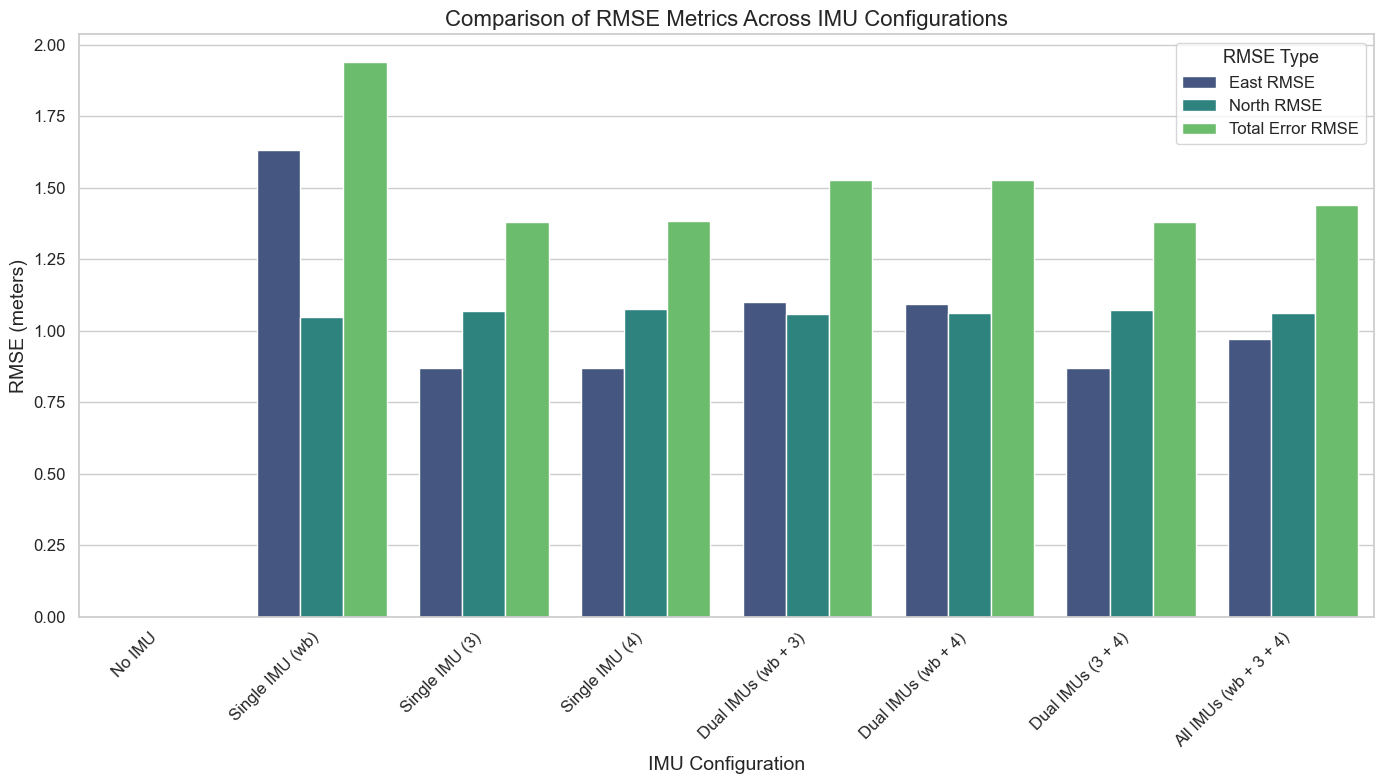

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that 'Configuration' is treated as a categorical variable with a specific order
comparison_df['Configuration'] = pd.Categorical(
    comparison_df['Configuration'],
    categories=[
        'No IMU',
        'Single IMU (wb)',
        'Single IMU (3)',
        'Single IMU (4)',
        'Dual IMUs (wb + 3)',
        'Dual IMUs (wb + 4)',
        'Dual IMUs (3 + 4)',
        'All IMUs (wb + 3 + 4)'
    ],
    ordered=True
)

# Melt the DataFrame to long-form for seaborn compatibility
comparison_melted = comparison_df.melt(
    id_vars='Configuration',
    value_vars=['E_RMSE', 'N_RMSE', 'Total_Error_RMSE'],
    var_name='RMSE_Type',
    value_name='RMSE_Value'
)

# Rename RMSE_Type for better readability in the plot
comparison_melted['RMSE_Type'] = comparison_melted['RMSE_Type'].map({
    'E_RMSE': 'East RMSE',
    'N_RMSE': 'North RMSE',
    'Total_Error_RMSE': 'Total Error RMSE'
})

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
sns.barplot(
    data=comparison_melted,
    x='Configuration',
    y='RMSE_Value',
    hue='RMSE_Type',
    palette='viridis'
)

# Customize the plot
plt.title('Comparison of RMSE Metrics Across IMU Configurations', fontsize=16)
plt.xlabel('IMU Configuration', fontsize=14)
plt.ylabel('RMSE (meters)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='RMSE Type', fontsize=12, title_fontsize=13)
plt.tight_layout()

# Display the plot
plt.show()


c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


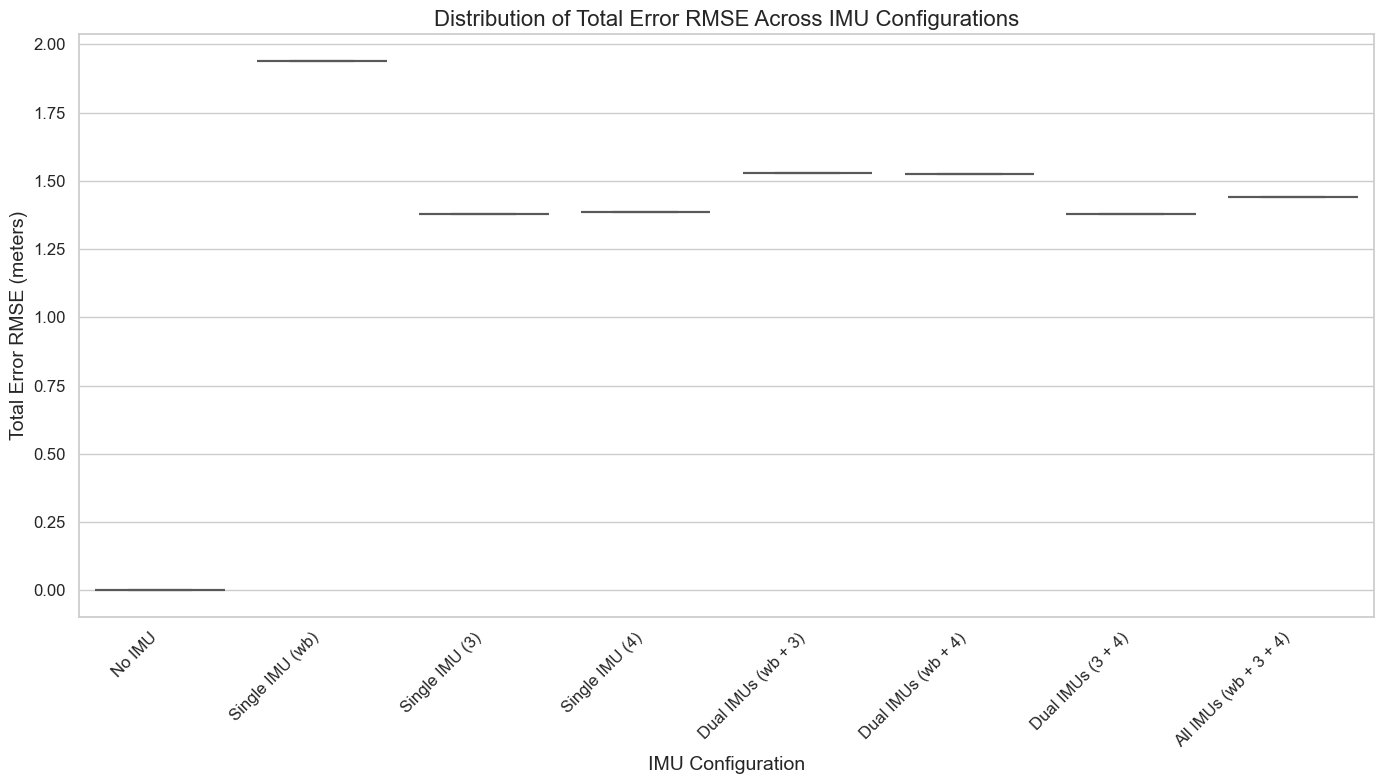

In [5]:
# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create box plots for Total_Error across configurations
sns.boxplot(
    data=comparison_df,
    x='Configuration',
    y='Total_Error_RMSE',
    palette='Set2'
)

# Customize the plot
plt.title('Distribution of Total Error RMSE Across IMU Configurations', fontsize=16)
plt.xlabel('IMU Configuration', fontsize=14)
plt.ylabel('Total Error RMSE (meters)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


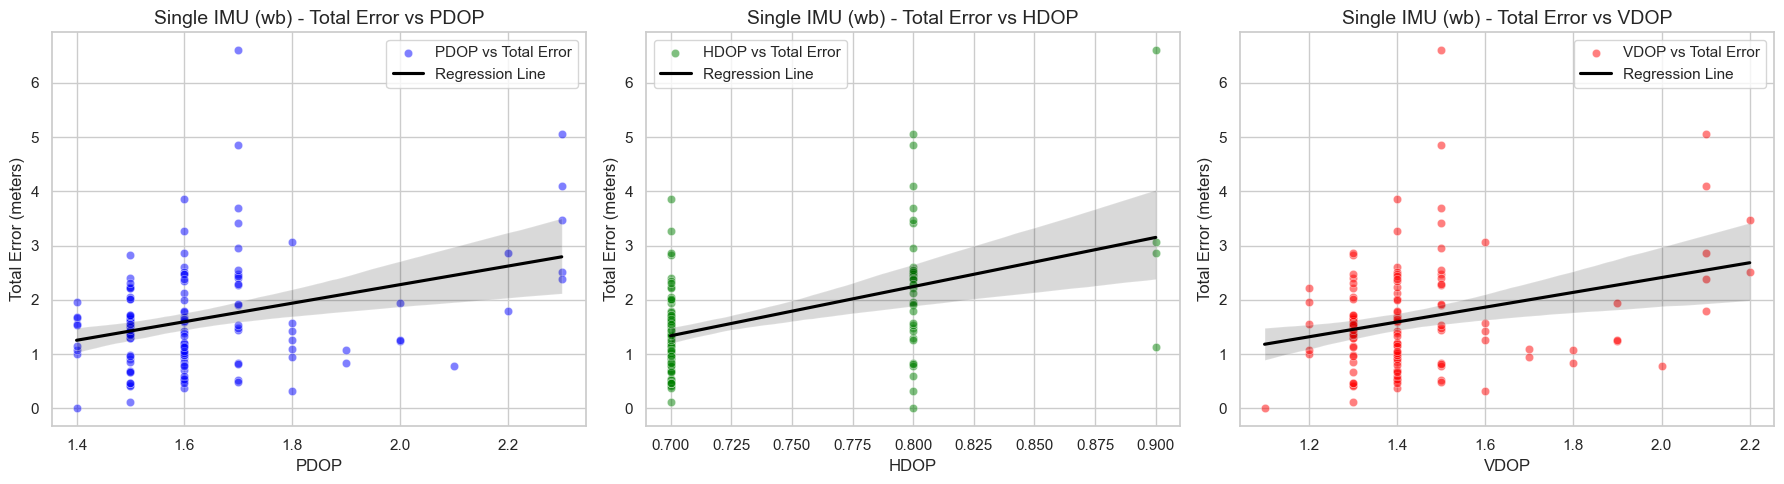

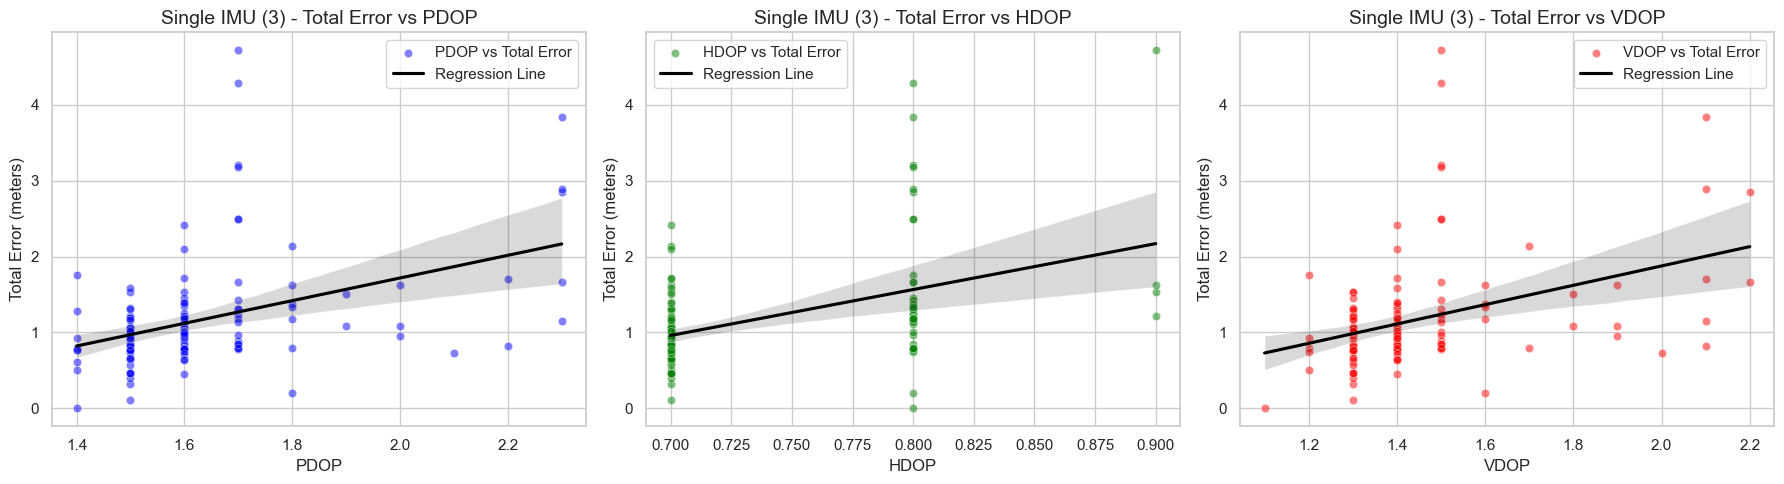

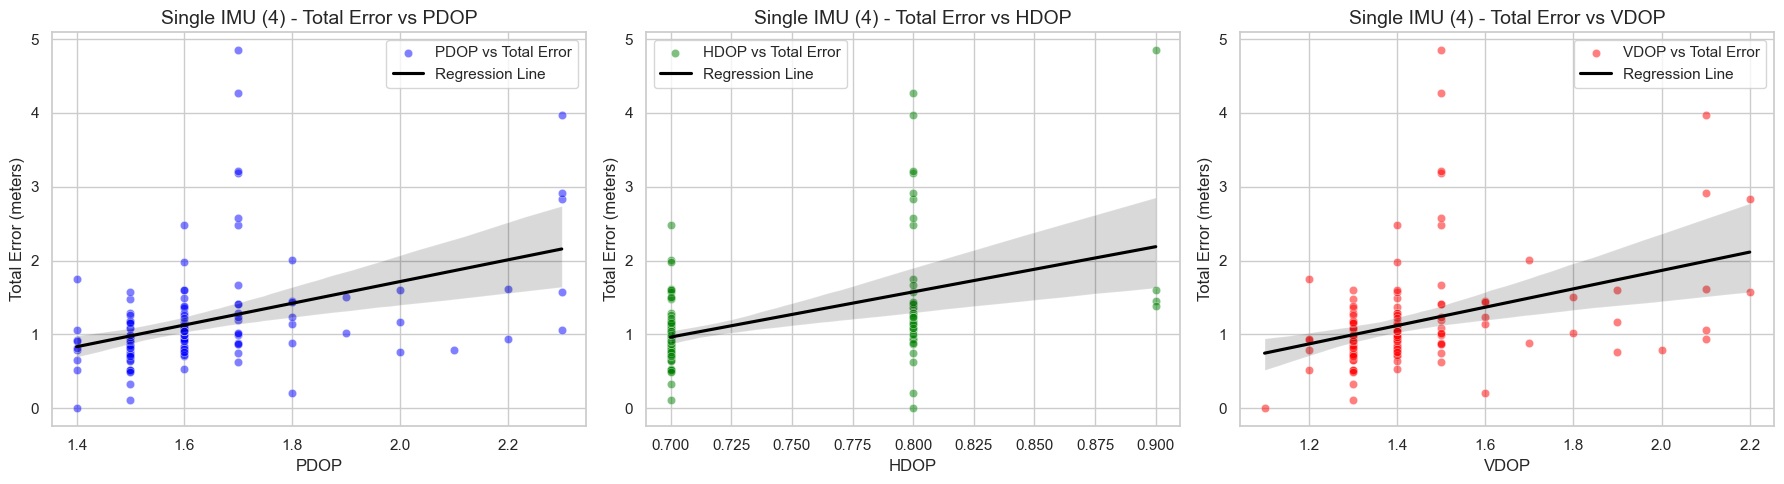

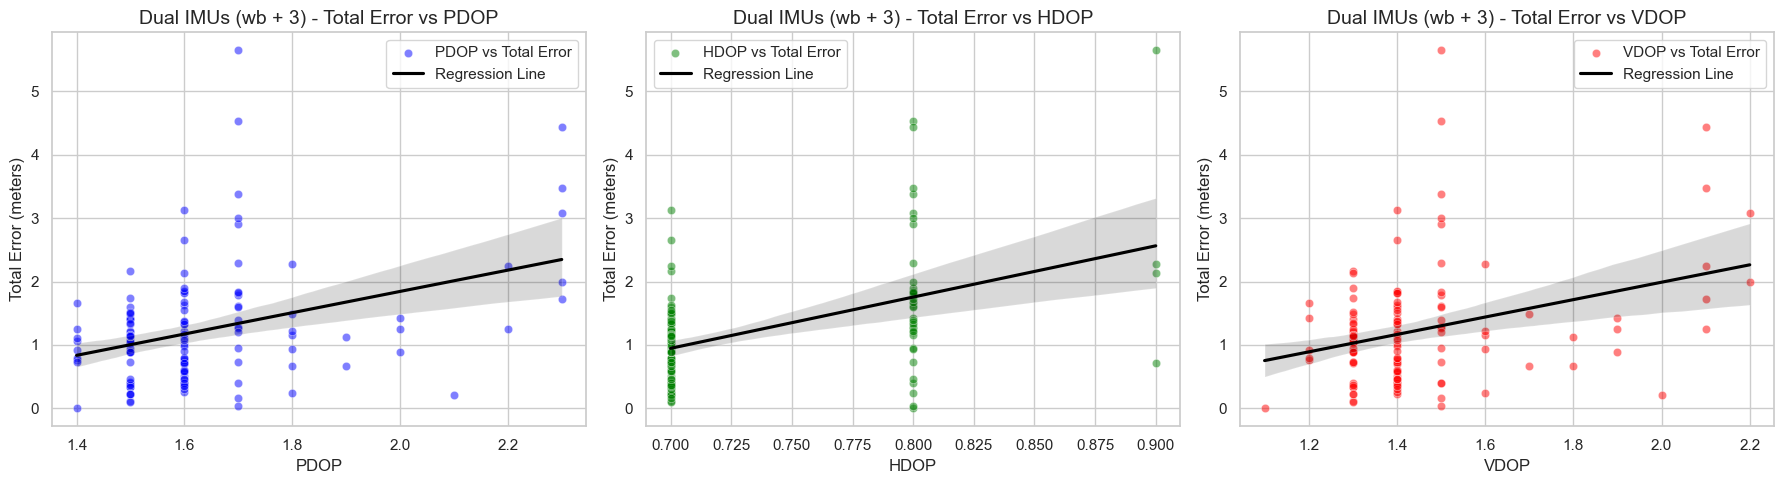

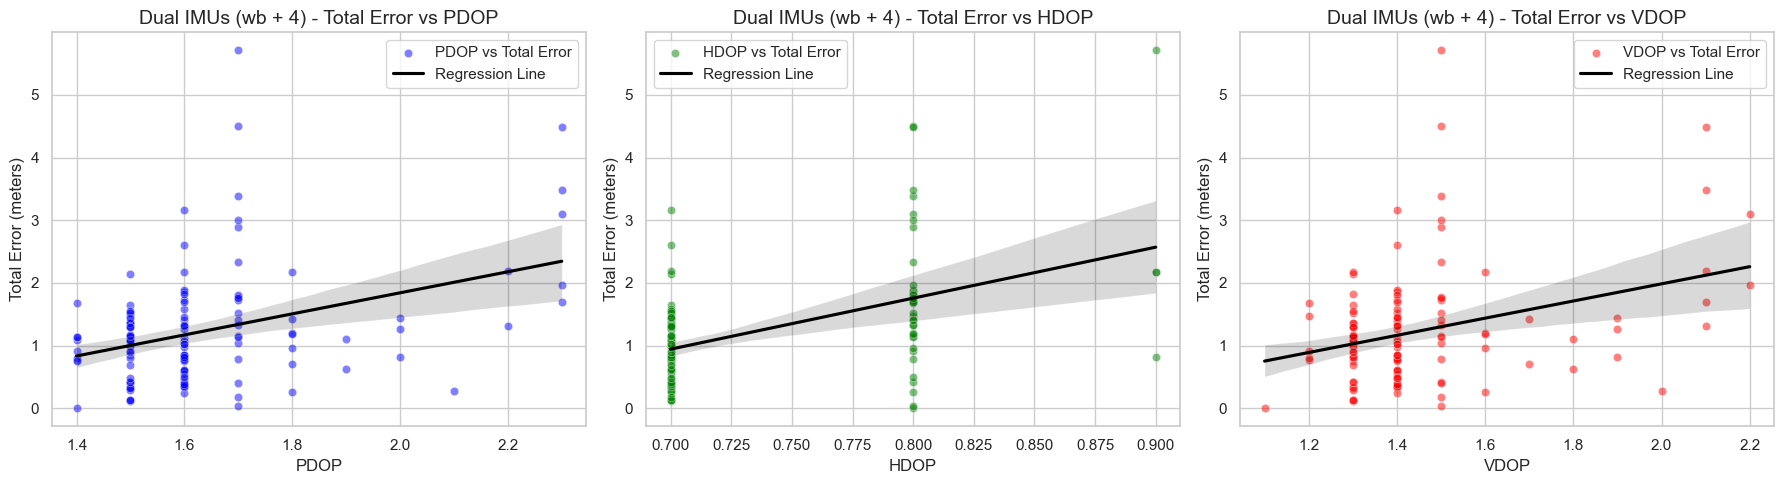

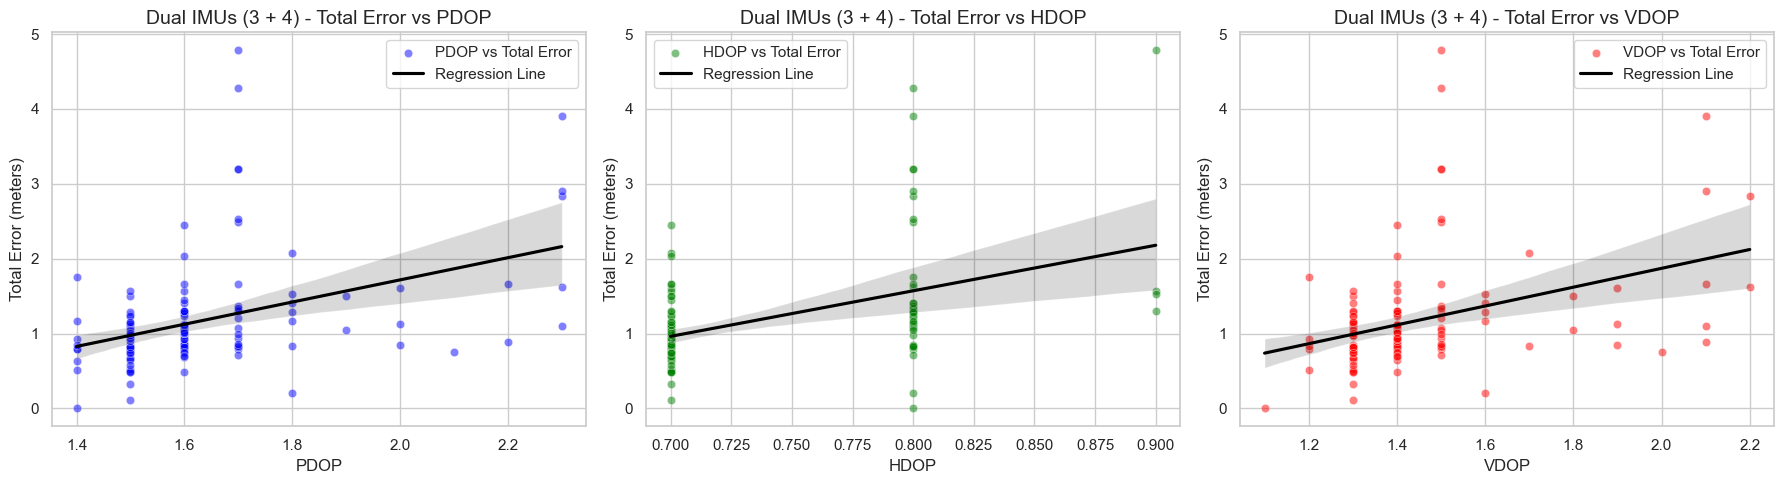

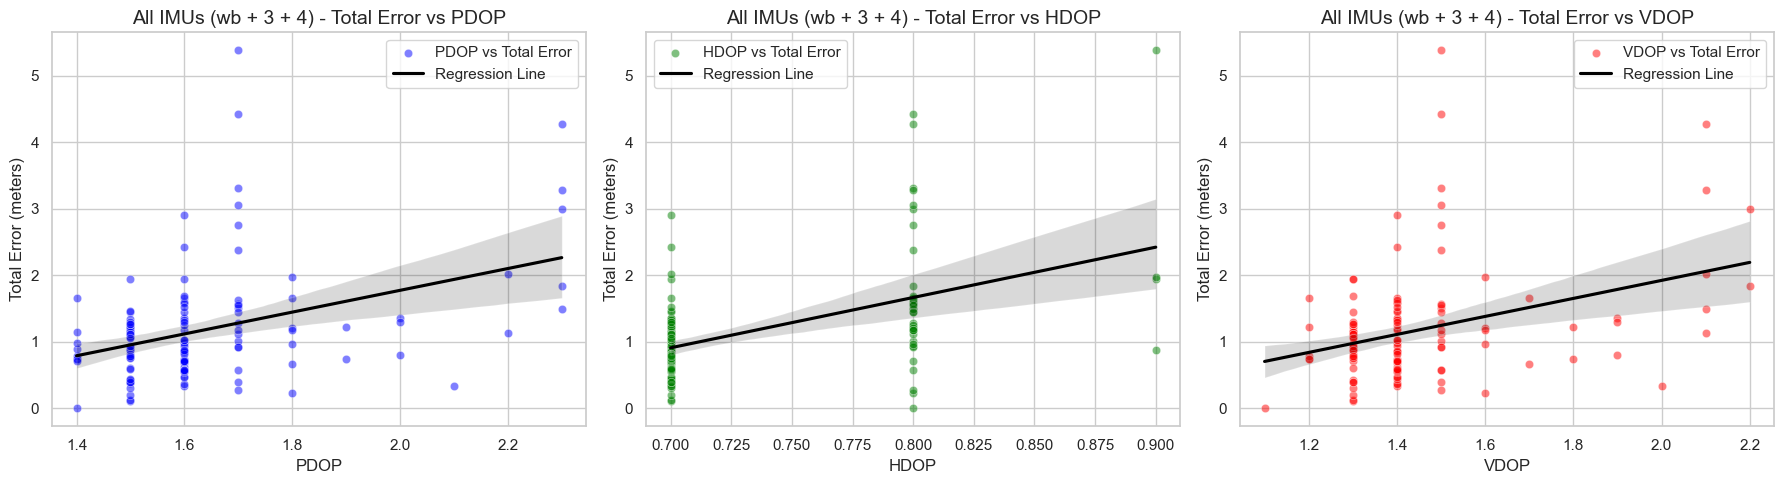

In [6]:
# Define a function to create scatter plots with regression lines for a given configuration
def plot_scatter_with_regression(data_df, config_name):
    """
    Plots scatter plots of Total_Error vs DOP metrics with regression lines.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    dop_metrics = ['PDOP', 'HDOP', 'VDOP']
    colors = ['blue', 'green', 'red']
    
    plt.figure(figsize=(18, 5))
    
    for i, dop in enumerate(dop_metrics, 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(
            data=data_df,
            x=dop,
            y='Total_Error',
            color=colors[i-1],
            alpha=0.5,
            label=f'{dop} vs Total Error'
        )
        sns.regplot(
            data=data_df,
            x=dop,
            y='Total_Error',
            scatter=False,
            color='black',
            label='Regression Line'
        )
        plt.title(f'{config_name} - Total Error vs {dop}', fontsize=14)
        plt.xlabel(f'{dop}', fontsize=12)
        plt.ylabel('Total Error (meters)', fontsize=12)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Iterate over configurations and create scatter plots
for config_name, data in results.items():
    if config_name != 'No IMU':
        plot_scatter_with_regression(data, config_name)


c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


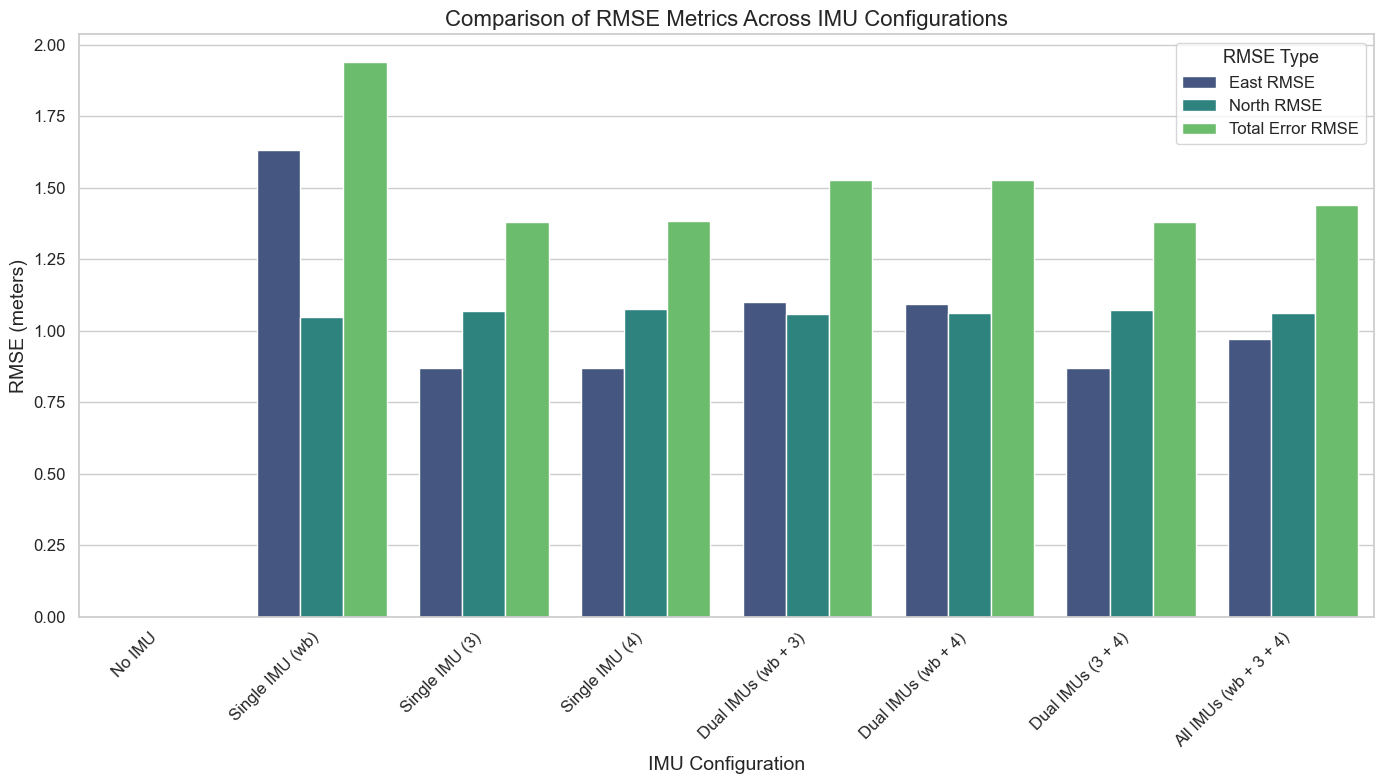

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'Configuration' is treated as a categorical variable with a specific order
comparison_df['Configuration'] = pd.Categorical(
    comparison_df['Configuration'],
    categories=[
        'No IMU',
        'Single IMU (wb)',
        'Single IMU (3)',
        'Single IMU (4)',
        'Dual IMUs (wb + 3)',
        'Dual IMUs (wb + 4)',
        'Dual IMUs (3 + 4)',
        'All IMUs (wb + 3 + 4)'
    ],
    ordered=True
)

# Melt the DataFrame to long-form for seaborn compatibility
comparison_melted = comparison_df.melt(
    id_vars='Configuration',
    value_vars=['E_RMSE', 'N_RMSE', 'Total_Error_RMSE'],
    var_name='RMSE_Type',
    value_name='RMSE_Value'
)

# Rename RMSE_Type for better readability in the plot
comparison_melted['RMSE_Type'] = comparison_melted['RMSE_Type'].map({
    'E_RMSE': 'East RMSE',
    'N_RMSE': 'North RMSE',
    'Total_Error_RMSE': 'Total Error RMSE'
})

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
sns.barplot(
    data=comparison_melted,
    x='Configuration',
    y='RMSE_Value',
    hue='RMSE_Type',
    palette='viridis'
)

# Customize the plot
plt.title('Comparison of RMSE Metrics Across IMU Configurations', fontsize=16)
plt.xlabel('IMU Configuration', fontsize=14)
plt.ylabel('RMSE (meters)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='RMSE Type', fontsize=12, title_fontsize=13)
plt.tight_layout()

# Display the plot
plt.show()


c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


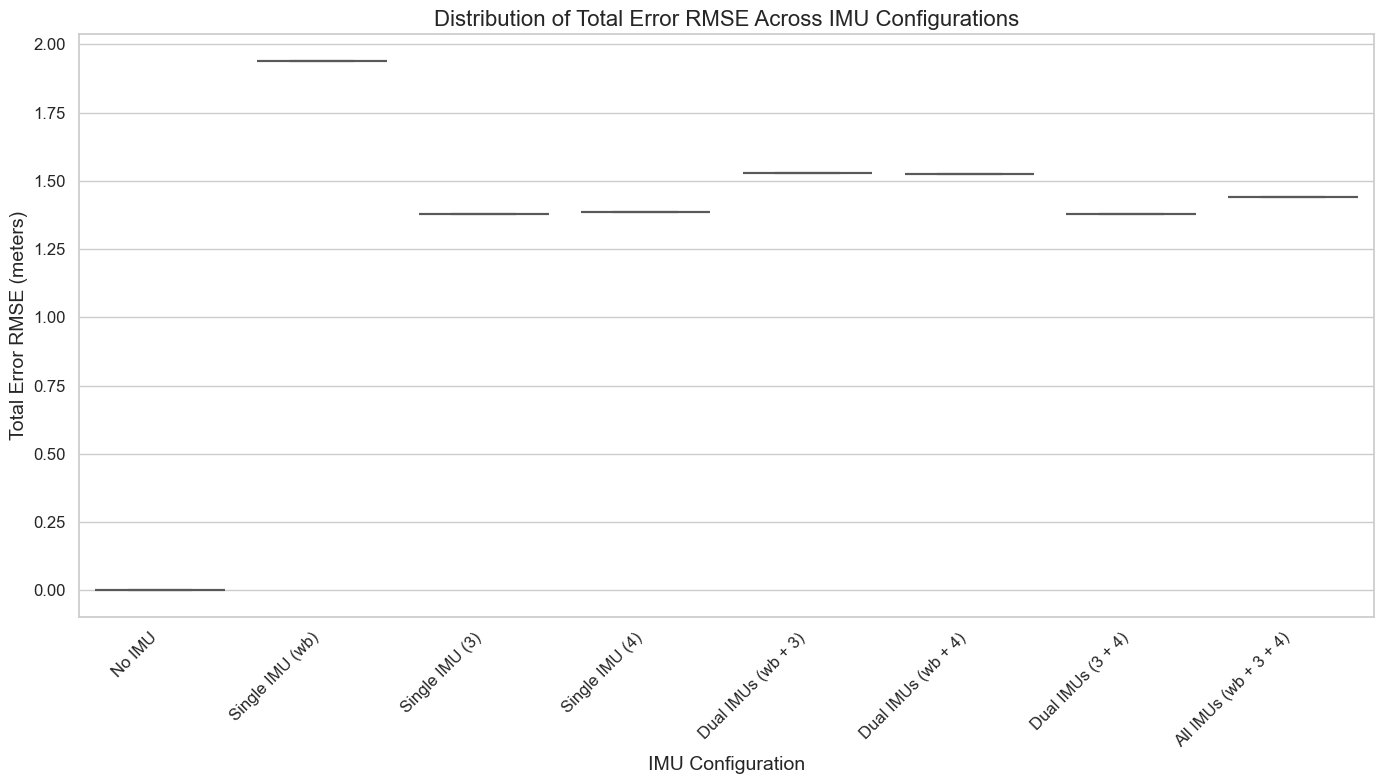

In [10]:
# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create box plots for Total_Error_RMSE across configurations
sns.boxplot(
    data=comparison_df,
    x='Configuration',
    y='Total_Error_RMSE',
    palette='Set2'
)

# Customize the plot
plt.title('Distribution of Total Error RMSE Across IMU Configurations', fontsize=16)
plt.xlabel('IMU Configuration', fontsize=14)
plt.ylabel('Total Error RMSE (meters)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


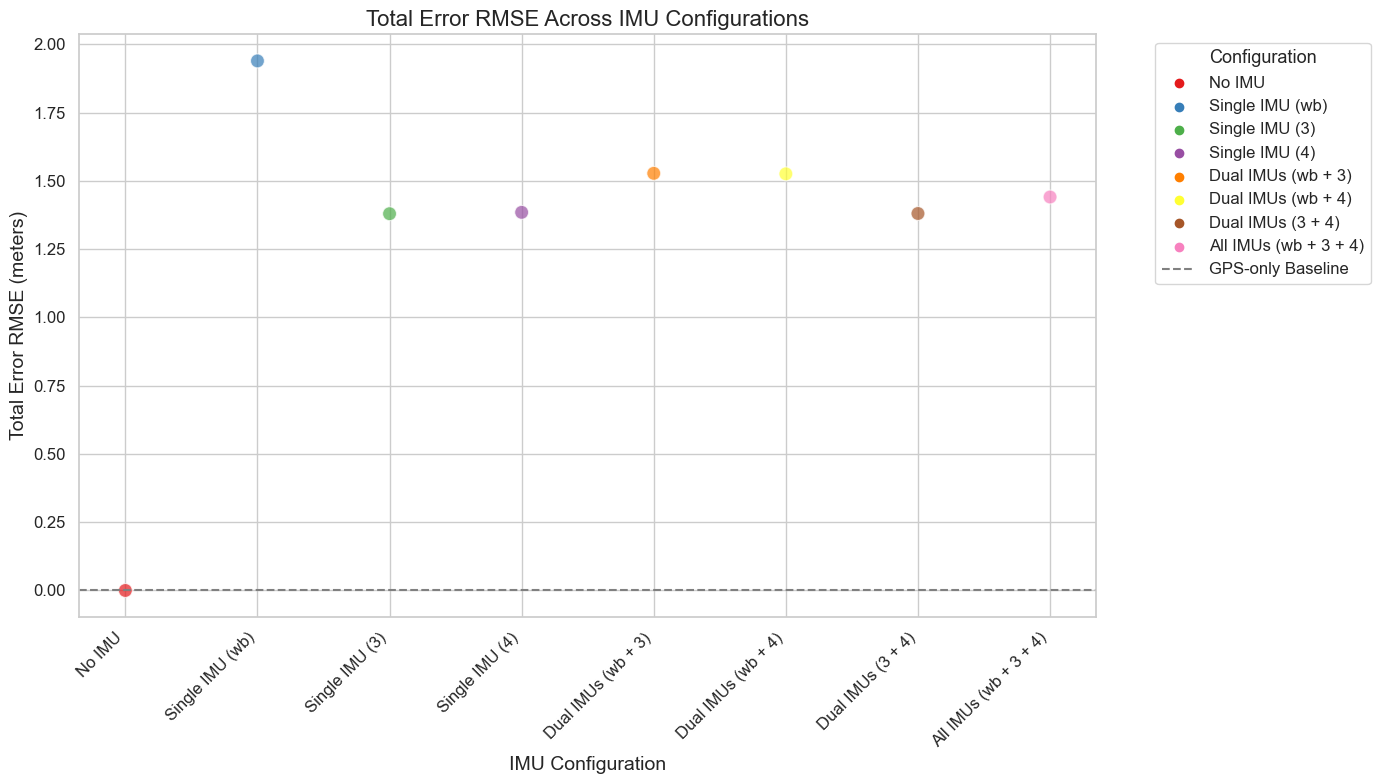

In [11]:
# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a scatter plot for each configuration
sns.scatterplot(
    data=comparison_df,
    x='Configuration',
    y='Total_Error_RMSE',
    hue='Configuration',
    palette='Set1',
    s=100,
    alpha=0.7
)

# Add a horizontal line for the GPS-only baseline
gps_total_error = comparison_df.loc[comparison_df['Configuration'] == 'No IMU', 'Total_Error_RMSE'].values[0]
plt.axhline(y=gps_total_error, color='gray', linestyle='--', label='GPS-only Baseline')

# Customize the plot
plt.title('Total Error RMSE Across IMU Configurations', fontsize=16)
plt.xlabel('IMU Configuration', fontsize=14)
plt.ylabel('Total Error RMSE (meters)', fontsize=14)
plt.legend(title='Configuration', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend. 

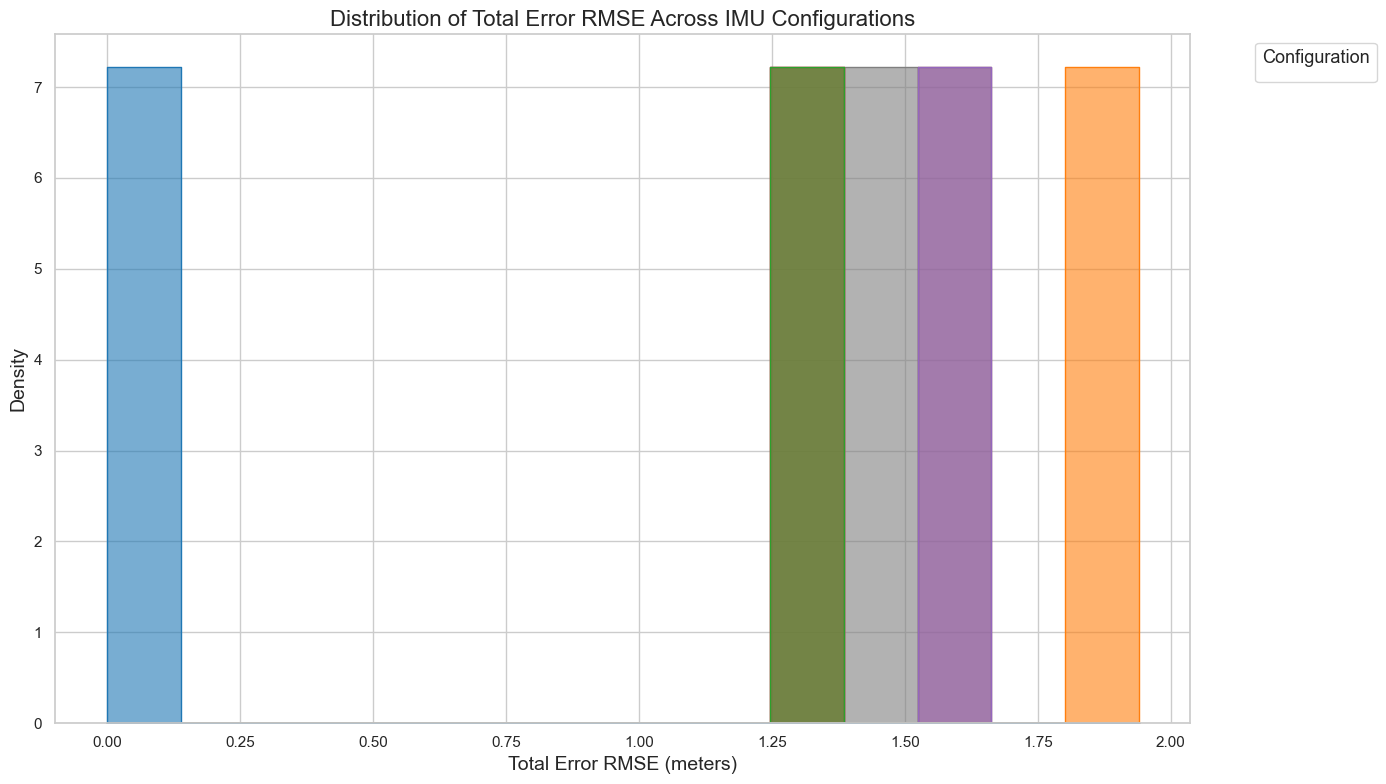

In [12]:
# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create histograms for Total_Error_RMSE across configurations
sns.histplot(
    data=comparison_df,
    x='Total_Error_RMSE',
    hue='Configuration',
    element='step',
    stat='density',
    common_norm=False,
    palette='tab10',
    alpha=0.6
)

# Customize the plot
plt.title('Distribution of Total Error RMSE Across IMU Configurations', fontsize=16)
plt.xlabel('Total Error RMSE (meters)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Configuration', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


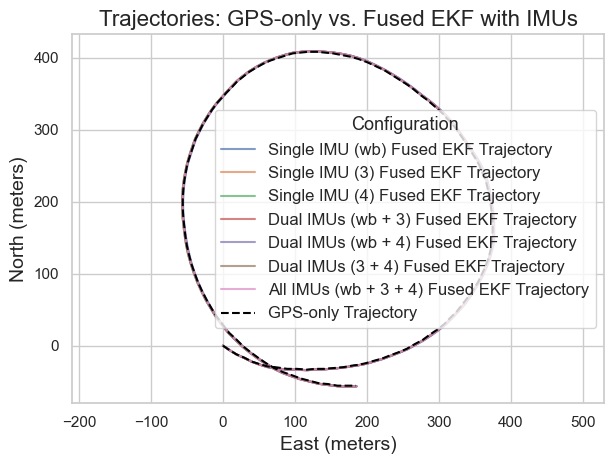

In [13]:
# Iterate over configurations and plot trajectories
for config_name, data in results.items():
    if config_name != 'No IMU':
        plt.plot(data['E_est'], data['N_est'], label=f'{config_name} Fused EKF Trajectory', alpha=0.7)

# Plot GPS-only trajectory
gps_data = results['No IMU']
plt.plot(gps_data['E'], gps_data['N'], label='GPS-only Trajectory', linestyle='--', color='black')

# Customize the plot
plt.title('Trajectories: GPS-only vs. Fused EKF with IMUs', fontsize=16)
plt.xlabel('East (meters)', fontsize=14)
plt.ylabel('North (meters)', fontsize=14)
plt.legend(title='Configuration', fontsize=12, title_fontsize=13)
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling on both axes
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select the configuration to analyze (e.g., 'All IMUs (wb + 3 + 4)')
config_to_analyze = 'All IMUs (wb + 3 + 4)'

# Extract the corresponding DataFrame
data_all = results[config_to_analyze]

# Number of high-error points to identify
N = 3

# Find the top N points with the highest Total_Error_RMSE
top_errors = data_all.nlargest(N, 'Total_Error')

# Display the top N high-error points
print(f"Top {N} High-Error Points for Configuration '{config_to_analyze}':")
print(top_errors[['E_est', 'N_est', 'Total_Error']])


Top 3 High-Error Points for Configuration 'All IMUs (wb + 3 + 4)':
         E_est       N_est  Total_Error
63  243.513946  371.740969     5.379940
44  373.127073  197.366105     4.426490
51  344.205572  273.217165     4.274231


In [15]:
# Define the window size for zoom (in meters)
window_size = 50  # Adjust as needed

# Create a list to store the zoom regions
zoom_regions = []

for index, row in top_errors.iterrows():
    center_e = row['E_est']
    center_n = row['N_est']
    
    # Define the bounding box for the zoomed-in region
    zoom_region = {
        'title': f"High Error Point {index} (E={center_e:.2f}, N={center_n:.2f})",
        'e_min': center_e - window_size,
        'e_max': center_e + window_size,
        'n_min': center_n - window_size,
        'n_max': center_n + window_size
    }
    
    zoom_regions.append(zoom_region)

# Display the defined zoom regions
for region in zoom_regions:
    print(region)


{'title': 'High Error Point 63 (E=243.51, N=371.74)', 'e_min': 193.51394558899105, 'e_max': 293.5139455889911, 'n_min': 321.74096936438133, 'n_max': 421.74096936438133}
{'title': 'High Error Point 44 (E=373.13, N=197.37)', 'e_min': 323.1270729679361, 'e_max': 423.1270729679361, 'n_min': 147.3661054581275, 'n_max': 247.3661054581275}
{'title': 'High Error Point 51 (E=344.21, N=273.22)', 'e_min': 294.20557208943126, 'e_max': 394.20557208943126, 'n_min': 223.21716514672977, 'n_max': 323.21716514672977}


KeyError: '63'

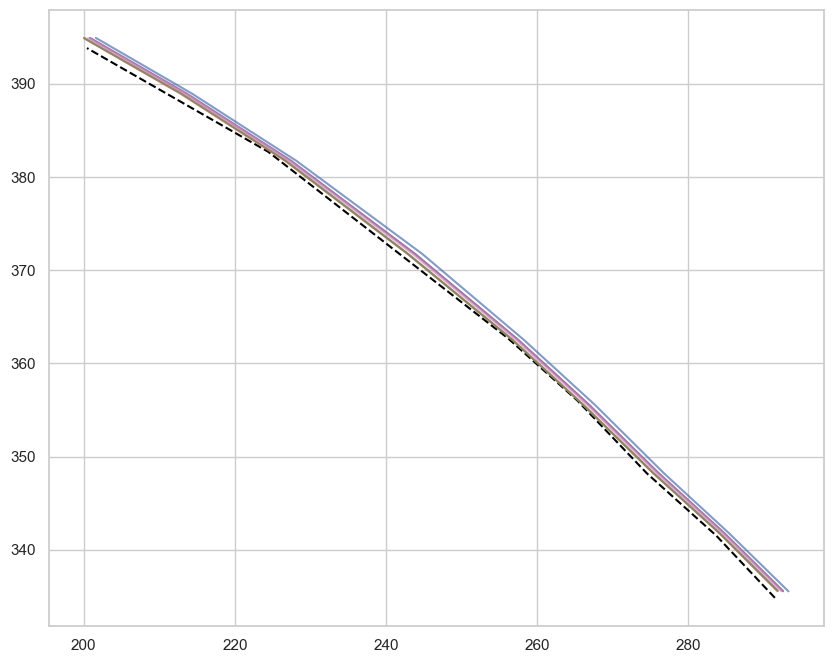

In [16]:
# Define a list of configurations to compare (including GPS-only)
configurations = [
    'No IMU',
    'Single IMU (wb)',
    'Single IMU (3)',
    'Single IMU (4)',
    'Dual IMUs (wb + 3)',
    'Dual IMUs (wb + 4)',
    'Dual IMUs (3 + 4)',
    'All IMUs (wb + 3 + 4)'
]

# Create a dictionary to store data for each configuration
config_data = {config: results[config] for config in configurations}

# Iterate over each zoom region and create plots
for region in zoom_regions:
    title = region['title']
    e_min = region['e_min']
    e_max = region['e_max']
    n_min = region['n_min']
    n_max = region['n_max']
    
    plt.figure(figsize=(10, 8))
    
    # Plot each configuration's trajectory within the zoomed-in region
    for config in configurations:
        data = config_data[config]
        # Filter data within the bounding box
        subset = data[
            (data['E_est'] >= e_min) & (data['E_est'] <= e_max) &
            (data['N_est'] >= n_min) & (data['N_est'] <= n_max)
        ]
        if not subset.empty:
            if config == 'No IMU':
                plt.plot(subset['E'], subset['N'], label=f'{config}', linestyle='--', color='black')
            else:
                plt.plot(subset['E_est'], subset['N_est'], label=f'{config}', alpha=0.7)
    
    # Highlight the high-error point
    high_error_data = data_all.iloc[top_errors.index[top_errors.index.get_loc(region['title'].split()[3])]]
    plt.scatter(high_error_data['E_est'], high_error_data['N_est'], color='red', s=100, zorder=5, label='High Error Point')
    
    # Customize the plot
    plt.title(f"{title} - Zoomed-In Trajectory", fontsize=16)
    plt.xlabel('East (meters)', fontsize=14)
    plt.ylabel('North (meters)', fontsize=14)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(e_min, e_max)
    plt.ylim(n_min, n_max)
    plt.grid(True)
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [18]:
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Function to plot zoomed-in trajectory based on user selection
def interactive_zoom(n=1):
    if n < 1 or n > N:
        print(f"Please select a value between 1 and {N}")
        return
    
    region = zoom_regions[n-1]
    title = region['title']
    e_min = region['e_min']
    e_max = region['e_max']
    n_min = region['n_min']
    n_max = region['n_max']
    
    plt.figure(figsize=(10, 8))
    
    # Plot each configuration's trajectory within the zoomed-in region
    for config in configurations:
        data = config_data[config]
        # Filter data within the bounding box
        subset = data[
            (data['E_est'] >= e_min) & (data['E_est'] <= e_max) &
            (data['N_est'] >= n_min) & (data['N_est'] <= n_max)
        ]
        if not subset.empty:
            if config == 'No IMU':
                plt.plot(subset['E'], subset['N'], label=f'{config}', linestyle='--', color='black')
            else:
                plt.plot(subset['E_est'], subset['N_est'], label=f'{config}', alpha=0.7)
    
    # Highlight the high-error point
    high_error_data = data_all.loc[top_errors.index[n-1]]
    plt.scatter(high_error_data['E_est'], high_error_data['N_est'], color='red', s=100, zorder=5, label='High Error Point')
    
    # Customize the plot
    plt.title(f"{title} - Zoomed-In Trajectory", fontsize=16)
    plt.xlabel('East (meters)', fontsize=14)
    plt.ylabel('North (meters)', fontsize=14)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(e_min, e_max)
    plt.ylim(n_min, n_max)
    plt.grid(True)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Create an interactive widget
interact(interactive_zoom, n=IntSlider(min=1, max=N, step=1, value=1, description='Zoom Region:'));


interactive(children=(IntSlider(value=1, description='Zoom Region:', max=3, min=1), Output()), _dom_classes=('…

In [20]:
import numpy as np
import pandas as pd

# Select the configuration to analyze (e.g., 'All IMUs (wb + 3 + 4)')
config_to_analyze = 'All IMUs (wb + 3 + 4)'

# Extract the corresponding DataFrame
data_all = results[config_to_analyze].copy()

# Number of representative points per category
N = 3

# Define error categories based on quantiles
data_all['Error_Category'] = pd.qcut(data_all['Total_Error'], q=3, labels=['Small Error', 'Average Error', 'High Error'])

# Display the distribution of error categories
print(data_all['Error_Category'].value_counts())


Error_Category
Small Error      44
Average Error    43
High Error       43
Name: count, dtype: int64


In [21]:
# Initialize a dictionary to store representative points for each category
representative_points = {}

for category in ['Small Error', 'Average Error', 'High Error']:
    if category == 'Small Error':
        # Select points with the smallest errors
        rep_points = data_all.nsmallest(N, 'Total_Error')
    elif category == 'High Error':
        # Select points with the largest errors
        rep_points = data_all.nlargest(N, 'Total_Error')
    else:
        # For 'Average Error', select points closest to the median error
        median_error = data_all['Total_Error'].median()
        rep_points = data_all.iloc[(data_all['Total_Error'] - median_error).abs().argsort()[:N]]
    
    representative_points[category] = rep_points

# Display representative points
for category, points in representative_points.items():
    print(f"\n{category}:")
    print(points[['E_est', 'N_est', 'Total_Error']])



Small Error:
          E_est         N_est   Total_Error
0  2.209783e-07 -7.287253e-09  2.210984e-07
1  9.788292e+00 -6.611753e+00  1.119419e-01
4  4.016667e+01 -2.236128e+01  1.291679e-01

Average Error:
         E_est       N_est  Total_Error
54  317.666616  311.011452     1.012498
62  257.167061  362.566128     0.991041
73  119.111122  409.083532     0.986425

High Error:
         E_est       N_est  Total_Error
63  243.513946  371.740969     5.379940
44  373.127073  197.366105     4.426490
51  344.205572  273.217165     4.274231


In [22]:
# Define the window size for zoom (in meters)
window_size = 50  # Adjust as needed

# Create a list to store the zoom regions
zoom_regions = []

for category, points in representative_points.items():
    for idx, row in points.iterrows():
        center_e = row['E_est']
        center_n = row['N_est']
        
        # Define the bounding box for the zoomed-in region
        zoom_region = {
            'title': f"{category} - Point {idx} (E={center_e:.2f}, N={center_n:.2f})",
            'e_min': center_e - window_size,
            'e_max': center_e + window_size,
            'n_min': center_n - window_size,
            'n_max': center_n + window_size,
            'category': category
        }
        
        zoom_regions.append(zoom_region)

# Display the defined zoom regions
for region in zoom_regions:
    print(region)


{'title': 'Small Error - Point 0 (E=0.00, N=-0.00)', 'e_min': -49.99999977902174, 'e_max': 50.00000022097826, 'n_min': -50.000000007287255, 'n_max': 49.999999992712745, 'category': 'Small Error'}
{'title': 'Small Error - Point 1 (E=9.79, N=-6.61)', 'e_min': -40.21170833468769, 'e_max': 59.78829166531231, 'n_min': -56.61175311318696, 'n_max': 43.38824688681304, 'category': 'Small Error'}
{'title': 'Small Error - Point 4 (E=40.17, N=-22.36)', 'e_min': -9.833329817248554, 'e_max': 90.16667018275145, 'n_min': -72.36128364668936, 'n_max': 27.638716353310638, 'category': 'Small Error'}
{'title': 'Average Error - Point 54 (E=317.67, N=311.01)', 'e_min': 267.6666157788939, 'e_max': 367.6666157788939, 'n_min': 261.0114521344264, 'n_max': 361.0114521344264, 'category': 'Average Error'}
{'title': 'Average Error - Point 62 (E=257.17, N=362.57)', 'e_min': 207.16706143602443, 'e_max': 307.1670614360244, 'n_min': 312.56612751062147, 'n_max': 412.56612751062147, 'category': 'Average Error'}
{'title': 

In [25]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Define a list of configurations to compare (including GPS-only)
configurations = [
    'No IMU',
    'Single IMU (wb)',
    'Single IMU (3)',
    'Single IMU (4)',
    'Dual IMUs (wb + 3)',
    'Dual IMUs (wb + 4)',
    'Dual IMUs (3 + 4)',
    'All IMUs (wb + 3 + 4)'
]

# Create a dictionary to store data for each configuration
config_data = {config: results[config] for config in configurations}

# Extract unique error categories
error_categories = ['Small Error', 'Average Error', 'High Error']

# Create dropdown for selecting error category with default value 'High Error'
category_dropdown = widgets.Dropdown(
    options=error_categories,
    value='High Error',
    description='Error Category:',
    disabled=False,
)

# Create zoomed-in region dropdown (initially empty)
zoom_dropdown = widgets.Dropdown(
    options=[],  # to be updated
    value=None,
    description='Zoom Region:',
    disabled=False,
)

# Define a function to update zoom_dropdown based on selected category
def update_zoom_dropdown(selected_category):
    # Filter zoom_regions based on selected category
    filtered_regions = [region for region in zoom_regions if region['category'] == selected_category]
    # Create a list of titles
    titles = [region['title'] for region in filtered_regions]
    zoom_dropdown.options = titles
    # Set default value
    if titles:
        zoom_dropdown.value = titles[0]
    else:
        zoom_dropdown.value = None

# Initialize zoom_dropdown based on initial category selection
update_zoom_dropdown(category_dropdown.value)

# Observe changes in category_dropdown to update zoom_dropdown
category_dropdown.observe(lambda change: update_zoom_dropdown(change['new']), names='value')

# Function to plot zoomed-in trajectory based on selections
def plot_zoomed_trajectory(selected_zoom):
    if selected_zoom is None:
        print("No zoom region selected.")
        return
    
    # Find the corresponding zoom region
    region = next((r for r in zoom_regions if r['title'] == selected_zoom), None)
    if region is None:
        print("Selected zoom region not found.")
        return
    
    title = region['title']
    e_min = region['e_min']
    e_max = region['e_max']
    n_min = region['n_min']
    n_max = region['n_max']
    
    plt.figure(figsize=(10, 8))
    
    # Plot each configuration's trajectory within the zoomed-in region
    for config in configurations:
        data = config_data[config]
        # Filter data within the bounding box
        subset = data[
            (data['E_est'] >= e_min) & (data['E_est'] <= e_max) &
            (data['N_est'] >= n_min) & (data['N_est'] <= n_max)
        ]
        if not subset.empty:
            if config == 'No IMU':
                plt.plot(subset['E'], subset['N'], label=f'{config}', linestyle='--', color='black')
            else:
                plt.plot(subset['E_est'], subset['N_est'], label=f'{config}', alpha=0.7)
    
    # Highlight the representative point
    # Extract the index from the title
    try:
        # Assuming the title format: "{Category} - Point {index} (E={E}, N={N})"
        point_index_str = title.split('Point ')[1].split(' ')[0]
        point_index = int(point_index_str)
    except (IndexError, ValueError):
        print("Error parsing point index from title.")
        point_index = None
    
    if point_index is not None and point_index in data_all.index:
        high_error_data = data_all.loc[point_index]
        plt.scatter(high_error_data['E_est'], high_error_data['N_est'], color='red', s=100, zorder=5, label='Representative Point')
    else:
        print("Representative point index is invalid.")
    
    # Customize the plot
    plt.title(f"{title} - Zoomed-In Trajectory", fontsize=16)
    plt.xlabel('East (meters)', fontsize=14)
    plt.ylabel('North (meters)', fontsize=14)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(e_min, e_max)
    plt.ylim(n_min, n_max)
    plt.grid(True)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Create the interactive widget
interactive_plot = widgets.interactive_output(
    plot_zoomed_trajectory,
    {'selected_zoom': zoom_dropdown}
)

# Display the widgets and the plot
display(widgets.VBox([category_dropdown, zoom_dropdown]), interactive_plot)


Output()

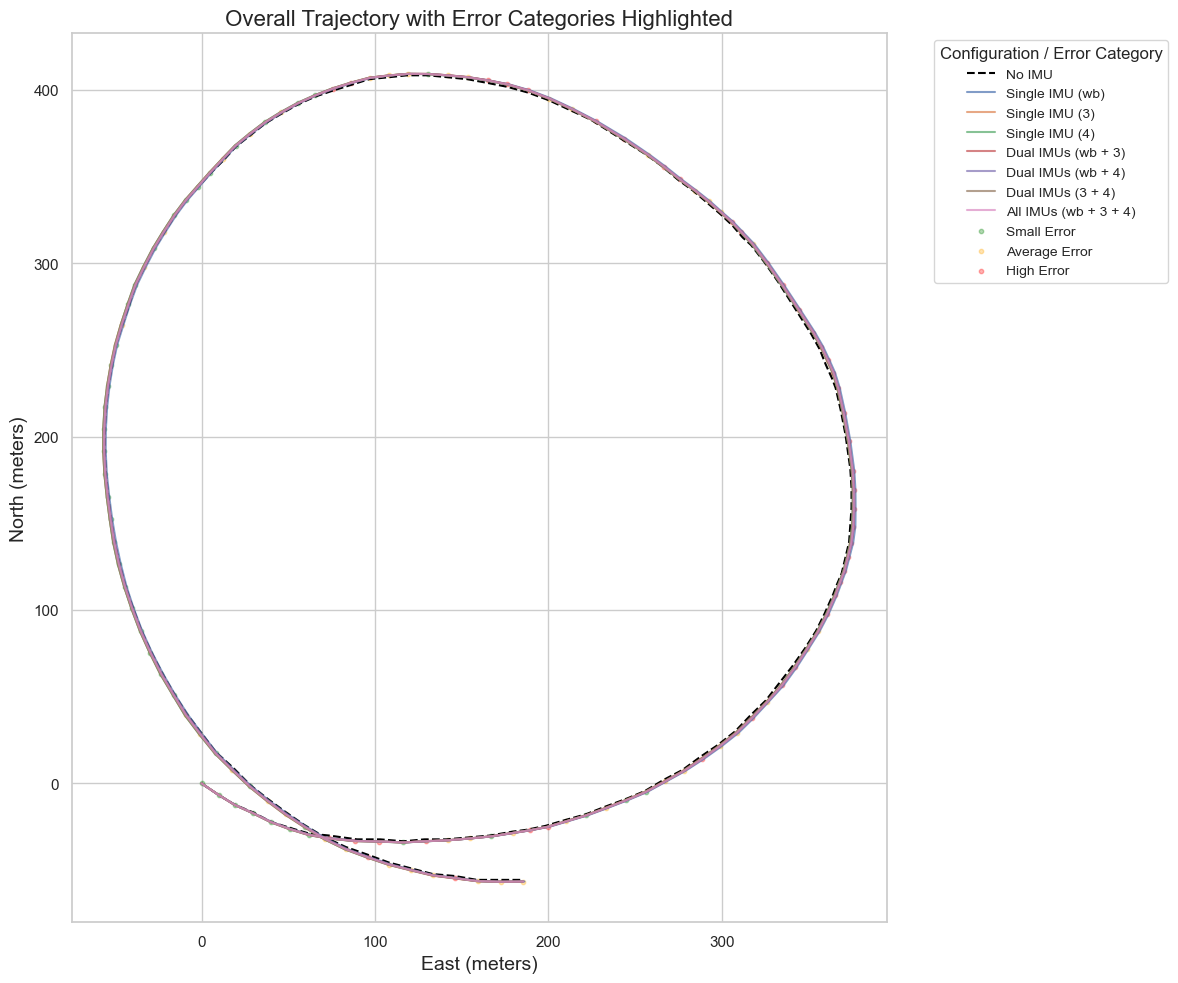

In [24]:
# Initialize the matplotlib figure
plt.figure(figsize=(12, 10))

# Define color palette for error categories
error_palette = {
    'Small Error': 'green',
    'Average Error': 'orange',
    'High Error': 'red'
}

# Plot trajectories for each configuration
for config in configurations:
    data = config_data[config]
    if config == 'No IMU':
        plt.plot(data['E'], data['N'], label=f'{config}', linestyle='--', color='black')
    else:
        plt.plot(data['E_est'], data['N_est'], label=f'{config}', alpha=0.7)

# Scatter plot of all points color-coded by error category
for category, color in error_palette.items():
    subset = data_all[data_all['Error_Category'] == category]
    plt.scatter(
        subset['E_est'],
        subset['N_est'],
        label=category,
        color=color,
        alpha=0.3,
        s=10
    )

# Customize the plot
plt.title('Overall Trajectory with Error Categories Highlighted', fontsize=16)
plt.xlabel('East (meters)', fontsize=14)
plt.ylabel('North (meters)', fontsize=14)
plt.legend(title='Configuration / Error Category', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling on both axes
plt.tight_layout()

# Display the plot
plt.show()



=== Running EKF for Configuration: No IMU ===

=== Running EKF for Configuration: Single IMU (wb) ===

=== Running EKF for Configuration: Single IMU (3) ===

=== Running EKF for Configuration: Single IMU (4) ===

=== Running EKF for Configuration: Dual IMUs (wb + 3) ===

=== Running EKF for Configuration: Dual IMUs (wb + 4) ===

=== Running EKF for Configuration: Dual IMUs (3 + 4) ===

=== Running EKF for Configuration: All IMUs (wb + 3 + 4) ===

=== Comparative RMSE Metrics ===
           Configuration    E_RMSE    N_RMSE  Total_Error_RMSE
0                 No IMU  0.000000  0.000000          0.000000
1        Single IMU (wb)  1.234831  0.286968          1.267737
2         Single IMU (3)  0.315544  0.288138          0.427308
3         Single IMU (4)  0.322914  0.295552          0.437750
4     Dual IMUs (wb + 3)  0.628605  0.283702          0.689660
5     Dual IMUs (wb + 4)  0.633261  0.287965          0.695661
6      Dual IMUs (3 + 4)  0.313885  0.290020          0.427359
7  All IMUs

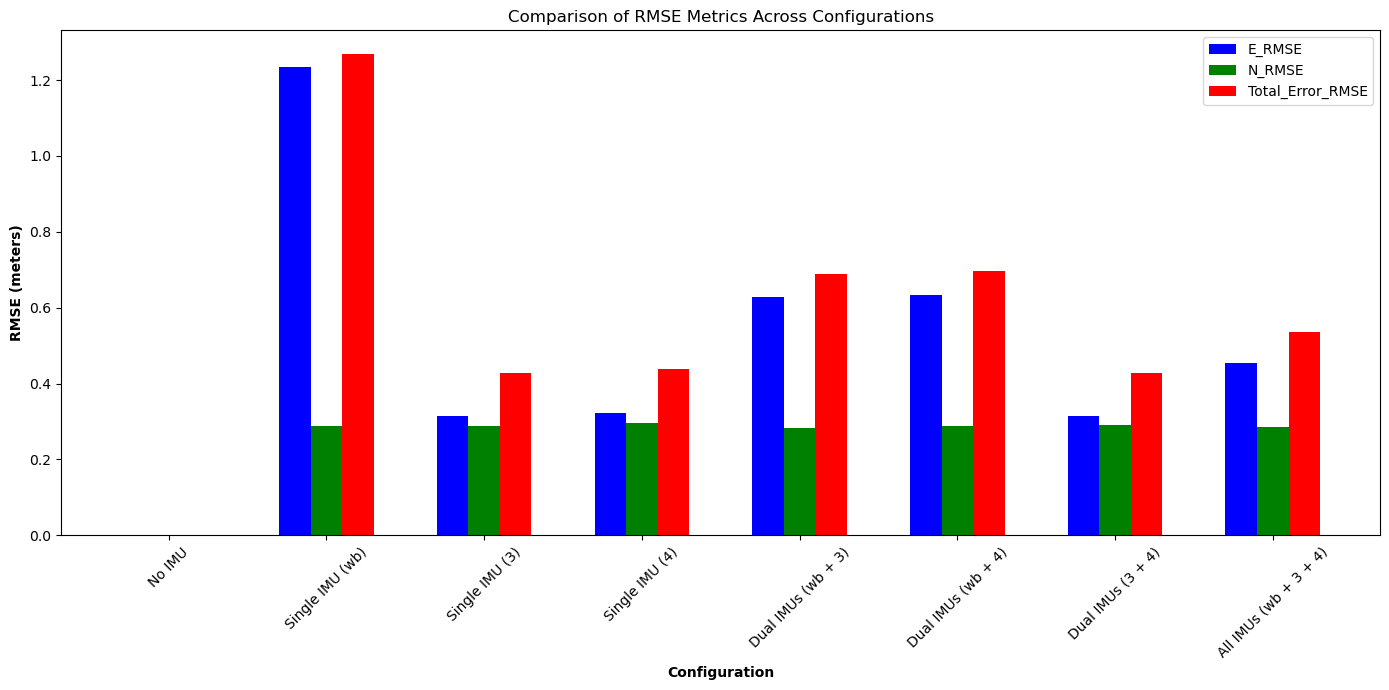

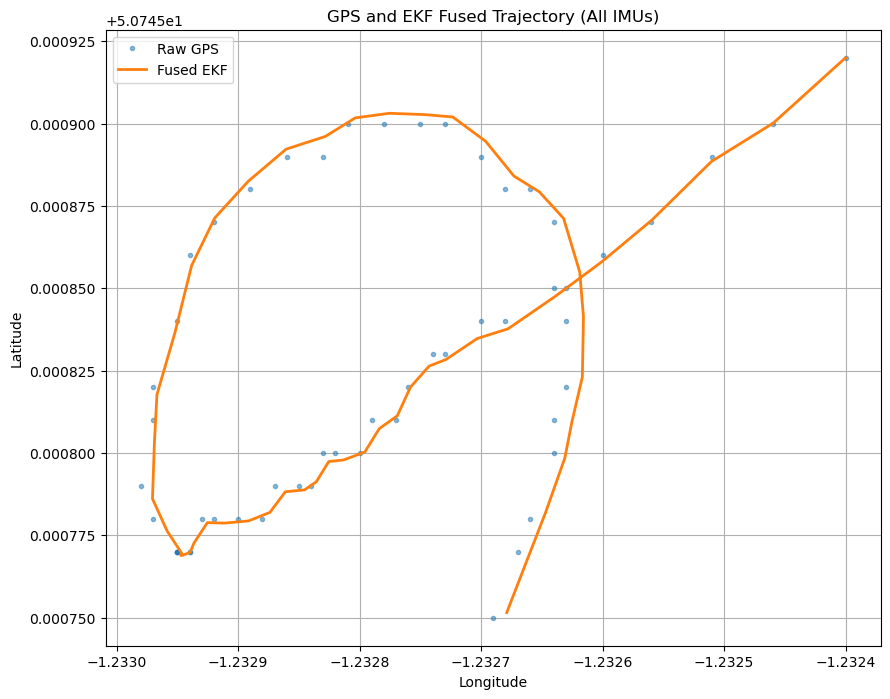

In [2]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer
import seaborn as sns

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '011_Static_stbd_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # IMU sensors

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# ================== Data Loading and Preprocessing ==================

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
try:
    gps_df = pd.read_csv(gps_file, usecols=gps_columns)
    log(f"GPS Data Loaded: {gps_df.shape[0]} rows")
except FileNotFoundError:
    sys.exit(f"Error: GPS file not found at path {gps_file}")
except Exception as e:
    sys.exit(f"Error loading GPS data: {e}")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    try:
        log(f"Loading IMU accelerometer data from {sensor}...")
        accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
        log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Accelerometer file not found for sensor {sensor} at path {accel_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading accelerometer data for sensor {sensor}: {e}")
    
    try:
        log(f"Loading IMU gyroscope data from {sensor}...")
        gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
        log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Gyroscope file not found for sensor {sensor} at path {gyro_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading gyroscope data for sensor {sensor}: {e}")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# Uncomment the next line if you want to drop NaNs
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Transform IMU Accelerometer Data Based on Orientations ===
# Define rotation mappings for each IMU based on their orientations

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row.get('x_accel_wb', 0), row.get('y_accel_wb', 0), row.get('z_accel_wb', 0)), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row.get('x_accel_3', 0), row.get('y_accel_3', 0), row.get('z_accel_3', 0)), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row.get('x_accel_4', 0), row.get('y_accel_4', 0), row.get('z_accel_4', 0)), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")

# ================== Extended Kalman Filter (EKF) Implementation ==================

# Function to run EKF based on selected IMU sensors
def run_ekf(data_df, selected_sensors, R_base):
    """
    Runs the EKF based on selected IMU sensors.
    
    Parameters:
    - data_df: Merged DataFrame containing GPS and selected IMU data.
    - selected_sensors: List of IMU sensors to use.
    - R_base: Base measurement noise covariance matrix.
    
    Returns:
    - data_df with estimated states.
    """
    # Initialize state vector [E, N, V_E, V_N]
    state = np.array([data_df.iloc[0]['E'],
                      data_df.iloc[0]['N'],
                      0,
                      0]).reshape(4,1)

    # Initialize covariance matrices
    P = np.eye(4) * 500  # Initial state covariance
    Q = np.eye(4)        # Process noise covariance
    I = np.eye(4)        # Identity matrix

    estimated_states = []
    
    for idx in range(len(data_df)):
        row = data_df.iloc[idx]
        
        # Time step
        if idx == 0:
            dt = 0.01  # Initial dt (e.g., 100Hz)
        else:
            dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
            if dt <= 0:
                dt = 0.01  # Handle non-positive dt
        
        # State Transition Matrix
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        # Control Input (if any)
        if selected_sensors:
            a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
            a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
            u = np.array([0.5 * a_E * dt**2,
                          0.5 * a_N * dt**2,
                          a_E * dt,
                          a_N * dt]).reshape(4,1)
        else:
            u = np.zeros((4,1))
        
        # Process model prediction
        state = F @ state + u
        P = F @ P @ F.T + Q
        
        # Measurement Update
        z = np.array([row['E'], row['N']]).reshape(2,1)
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])
        
        # Dynamically set R_gps based on HDOP
        current_hdop = row['HDOP']
        R_gps = (current_hdop ** 2) * R_base
        
        y_innovation = z - H @ state  # Innovation
        S = H @ P @ H.T + R_gps
        K = P @ H.T @ np.linalg.inv(S)
        
        state = state + K @ y_innovation
        P = (I - K @ H) @ P
        
        # Store the estimated state
        estimated_states.append(state.flatten())
        
        # Optional: Print progress
        if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
            log(f"Processed {idx} rows...")
    
    # Convert estimated states to DataFrame
    estimated_states = np.array(estimated_states)
    data_df['E_est'] = estimated_states[:,0]
    data_df['N_est'] = estimated_states[:,1]
    
    return data_df

# Function to aggregate IMU data based on selected sensors
def aggregate_imu_data(data_df, selected_sensors):
    """
    Aggregates accelerometer data from selected IMU sensors.
    
    Parameters:
    - data_df: DataFrame containing IMU data.
    - selected_sensors: List of IMU sensors to use.
    
    Returns:
    - data_df with aggregated accelerometer data.
    """
    if not selected_sensors:
        # No IMUs used
        data_df['x_accel_avg'] = 0
        data_df['y_accel_avg'] = 0
        data_df['z_accel_avg'] = 0
    else:
        # Check if the required transformed accelerometer columns exist
        required_columns_e = [f'E_accel_{sensor}' for sensor in selected_sensors]
        required_columns_n = [f'N_accel_{sensor}' for sensor in selected_sensors]
        required_columns_u = [f'U_accel_{sensor}' for sensor in selected_sensors]
        
        missing_e = [col for col in required_columns_e if col not in data_df.columns]
        missing_n = [col for col in required_columns_n if col not in data_df.columns]
        missing_u = [col for col in required_columns_u if col not in data_df.columns]
        
        if missing_e or missing_n or missing_u:
            missing = missing_e + missing_n + missing_u
            sys.exit(f"Error: Missing columns for IMU sensors {selected_sensors}: {missing}")
        
        # Aggregate accelerometer data
        data_df['x_accel_avg'] = data_df[required_columns_e].mean(axis=1)
        data_df['y_accel_avg'] = data_df[required_columns_n].mean(axis=1)
        data_df['z_accel_avg'] = data_df[required_columns_u].mean(axis=1)
    
    return data_df

# ================== Define IMU Configurations ==================

# Define base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy

# Define different IMU configurations
imu_configurations = {
    'No IMU': [],
    'Single IMU (wb)': ['wb'],
    'Single IMU (3)': ['3'],
    'Single IMU (4)': ['4'],
    'Dual IMUs (wb + 3)': ['wb', '3'],
    'Dual IMUs (wb + 4)': ['wb', '4'],
    'Dual IMUs (3 + 4)': ['3', '4'],
    'All IMUs (wb + 3 + 4)': ['wb', '3', '4']
}

# Dictionary to store results
results = {}

# ================== Run EKF for Each Configuration ==================

for config_name, sensors in imu_configurations.items():
    print(f"\n=== Running EKF for Configuration: {config_name} ===")
    
    if not sensors:
        # Scenario 1: No IMUs
        data_scenario = data_df.copy()
        data_scenario['x_accel_avg'] = 0
        data_scenario['y_accel_avg'] = 0
        data_scenario['z_accel_avg'] = 0
        
        # Initialize EKF estimates as GPS estimates
        data_scenario['E_est'] = data_scenario['E']
        data_scenario['N_est'] = data_scenario['N']
        
        # Calculate differences and errors
        data_scenario['E_diff'] = 0
        data_scenario['N_diff'] = 0
        data_scenario['Total_Error'] = 0
    else:
        # Scenario 2 & 3: With IMUs
        # Merge and aggregate IMU data based on selected sensors
        data_scenario = data_df.copy()
        data_scenario = aggregate_imu_data(data_scenario, sensors)
        
        # Run EKF
        data_scenario = run_ekf(data_scenario, sensors, R_base)
        
        # Calculate differences and errors
        data_scenario['E_diff'] = data_scenario['E_est'] - data_scenario['E']
        data_scenario['N_diff'] = data_scenario['N_est'] - data_scenario['N']
        data_scenario['Total_Error'] = np.sqrt(data_scenario['E_diff']**2 + data_scenario['N_diff']**2)
    
    # Store results
    results[config_name] = data_scenario

# ================== Comparative Analysis ==================

# Initialize a list to store RMSE statistics
comparison_list = []

for config_name, data in results.items():
    if config_name != 'No IMU':
        e_rmse = np.sqrt(np.mean(data['E_diff']**2))
        n_rmse = np.sqrt(np.mean(data['N_diff']**2))
        total_error_rmse = np.sqrt(np.mean(data['Total_Error']**2))
    else:
        # For No IMU, RMSEs are zero since E_est = E and N_est = N
        e_rmse = 0
        n_rmse = 0
        total_error_rmse = 0
    
    # Append the statistics as a dictionary
    comparison_list.append({
        'Configuration': config_name,
        'E_RMSE': e_rmse,
        'N_RMSE': n_rmse,
        'Total_Error_RMSE': total_error_rmse
    })

# Convert the list of dictionaries to a DataFrame using pd.DataFrame
comparison_df = pd.DataFrame(comparison_list)

print("\n=== Comparative RMSE Metrics ===")
print(comparison_df)

# ================== Visualization ==================

# Bar Chart of RMSE Metrics
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(14, 7))
plt.bar(r1, comparison_df['E_RMSE'], color='blue', width=bar_width, label='E_RMSE')
plt.bar(r2, comparison_df['N_RMSE'], color='green', width=bar_width, label='N_RMSE')
plt.bar(r3, comparison_df['Total_Error_RMSE'], color='red', width=bar_width, label='Total_Error_RMSE')

# Add labels and title
plt.xlabel('Configuration', fontweight='bold')
plt.ylabel('RMSE (meters)', fontweight='bold')
plt.title('Comparison of RMSE Metrics Across Configurations')
plt.xticks([r + bar_width for r in range(len(comparison_df))], comparison_df['Configuration'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ================== DOP-based Analysis ==================

# Define DOP bins based on specified ranges
pdop_bins = [1, 1.5, 2, 2.5]
pdop_labels = ['1-1.5', '1.5-2', '2-2.5']

hdop_bins = [0.5, 0.7, 0.9, 1.0]
hdop_labels = ['0.5-0.7', '0.7-0.9', '0.9-1.0']

vdop_bins = [1, 1.5, 2, 2.5]
vdop_labels = ['1-1.5', '1.5-2', '2-2.5']

# Function to plot DOP-based error statistics
def plot_dop_statistics(data_df, config_name):
    """
    Plots box plots and scatter plots of Total_Error against DOP metrics.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    # Box Plots of Total Error by DOP Bins
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='PDOP_bin', y='Total_Error', data=data_df, palette='Blues')
    plt.title(f'{config_name} - Total Error by PDOP')
    plt.xlabel('PDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='HDOP_bin', y='Total_Error', data=data_df, palette='Greens')
    plt.title(f'{config_name} - Total Error by HDOP')
    plt.xlabel('HDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='VDOP_bin', y='Total_Error', data=data_df, palette='Reds')
    plt.title(f'{config_name} - Total Error by VDOP')
    plt.xlabel('VDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Scatter Plots of DOP Metrics vs Total Error
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='PDOP', y='Total_Error', data=data_df, alpha=0.5, color='blue')
    plt.title(f'{config_name} - Total Error vs PDOP')
    plt.xlabel('PDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='HDOP', y='Total_Error', data=data_df, alpha=0.5, color='green')
    plt.title(f'{config_name} - Total Error vs HDOP')
    plt.xlabel('HDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='VDOP', y='Total_Error', data=data_df, alpha=0.5, color='red')
    plt.title(f'{config_name} - Total Error vs VDOP')
    plt.xlabel('VDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()

# Iterate over configurations and perform DOP-based analysis
for config_name, data in results.items():
    if config_name != 'No IMU':
        # Binning DOP metrics based on specified ranges
        data['PDOP_bin'] = pd.cut(data['PDOP'], bins=pdop_bins, labels=pdop_labels, include_lowest=True)
        data['HDOP_bin'] = pd.cut(data['HDOP'], bins=hdop_bins, labels=hdop_labels, include_lowest=True)
        data['VDOP_bin'] = pd.cut(data['VDOP'], bins=vdop_bins, labels=vdop_labels, include_lowest=True)
        
        # Plot DOP-based statistics
        # plot_dop_statistics(data, config_name)

# ================== Optional: Plot Trajectories ==================

# Plotting the trajectories for the configuration with all IMUs
if 'All IMUs (wb + 3 + 4)' in results:
    data_all = results['All IMUs (wb + 3 + 4)']
    
    # Function to convert ENU back to lat/lon for plotting
    def enu_to_latlon(e, n, u):
        # Apply inverse rotation
        diff = np.array([e, n, u])
        ecef_diff = R.T @ diff
        # Compute ECEF coordinates
        x = ref_ecef[0] + ecef_diff[0]
        y = ref_ecef[1] + ecef_diff[1]
        z = ref_ecef[2] + ecef_diff[2]
        # Convert back to LLA
        lon, lat, alt = transformer_to_lla.transform(x, y, z)
        return lat, lon, alt
    
    # Convert ENU back to lat/lon for plotting
    log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
    latlon_est = data_all.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
    data_all['Lat_est'], data_all['Lng_est'], data_all['Alt_est'] = zip(*latlon_est)
    log("Conversion completed.")
    
    # Plotting the trajectories
    log("\nPlotting the trajectories...")
    plt.figure(figsize=(10,8))
    plt.plot(data_all['Lng'], data_all['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
    plt.plot(data_all['Lng_est'], data_all['Lat_est'], label='Fused EKF', linewidth=2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('GPS and EKF Fused Trajectory (All IMUs)')
    plt.legend()
    plt.grid()
    plt.show()

# ================== End of Script ==================


c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


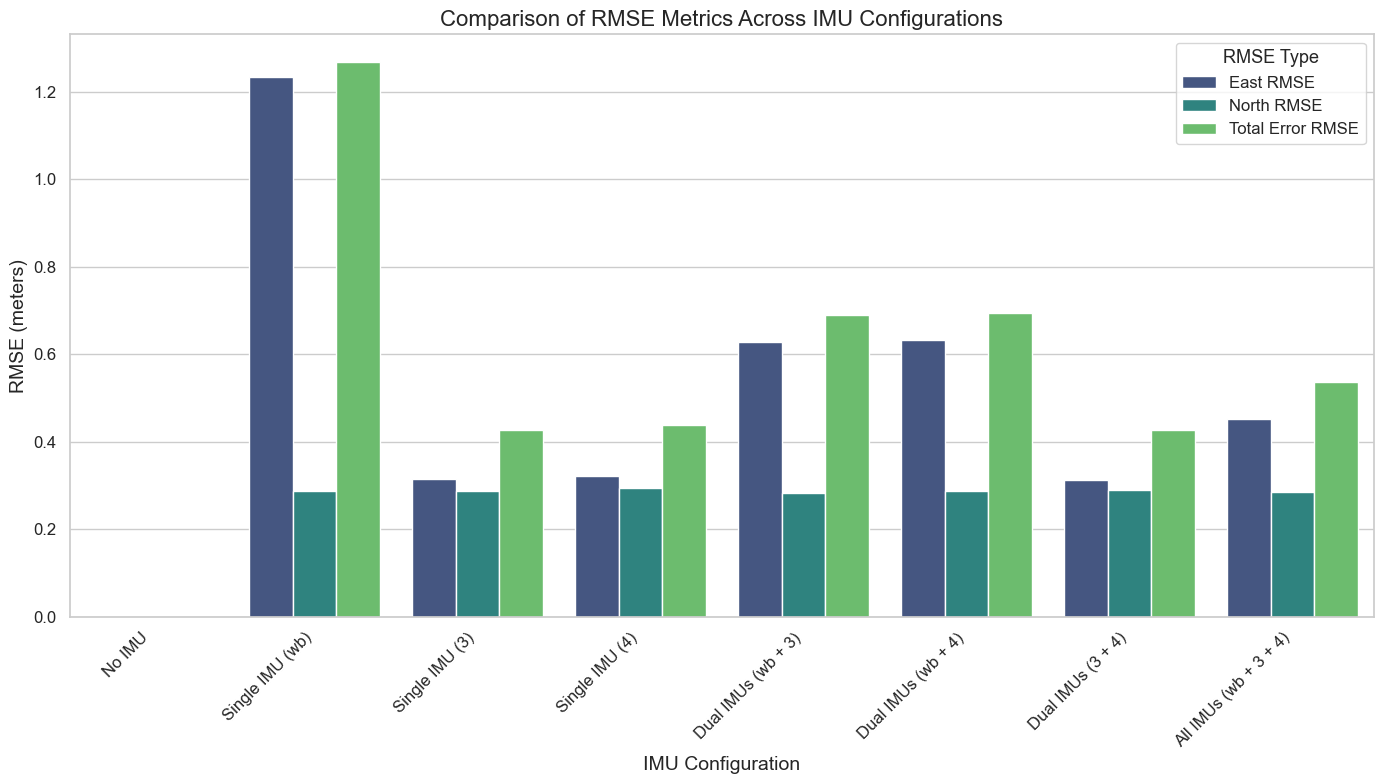

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that 'Configuration' is treated as a categorical variable with a specific order
comparison_df['Configuration'] = pd.Categorical(
    comparison_df['Configuration'],
    categories=[
        'No IMU',
        'Single IMU (wb)',
        'Single IMU (3)',
        'Single IMU (4)',
        'Dual IMUs (wb + 3)',
        'Dual IMUs (wb + 4)',
        'Dual IMUs (3 + 4)',
        'All IMUs (wb + 3 + 4)'
    ],
    ordered=True
)

# Melt the DataFrame to long-form for seaborn compatibility
comparison_melted = comparison_df.melt(
    id_vars='Configuration',
    value_vars=['E_RMSE', 'N_RMSE', 'Total_Error_RMSE'],
    var_name='RMSE_Type',
    value_name='RMSE_Value'
)

# Rename RMSE_Type for better readability in the plot
comparison_melted['RMSE_Type'] = comparison_melted['RMSE_Type'].map({
    'E_RMSE': 'East RMSE',
    'N_RMSE': 'North RMSE',
    'Total_Error_RMSE': 'Total Error RMSE'
})

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
sns.barplot(
    data=comparison_melted,
    x='Configuration',
    y='RMSE_Value',
    hue='RMSE_Type',
    palette='viridis'
)

# Customize the plot
plt.title('Comparison of RMSE Metrics Across IMU Configurations', fontsize=16)
plt.xlabel('IMU Configuration', fontsize=14)
plt.ylabel('RMSE (meters)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='RMSE Type', fontsize=12, title_fontsize=13)
plt.tight_layout()

# Display the plot
plt.show()



=== Running EKF for Configuration: No IMU ===

=== Running EKF for Configuration: Single IMU (wb) ===

=== Running EKF for Configuration: Single IMU (3) ===

=== Running EKF for Configuration: Single IMU (4) ===

=== Running EKF for Configuration: Dual IMUs (wb + 3) ===

=== Running EKF for Configuration: Dual IMUs (wb + 4) ===

=== Running EKF for Configuration: Dual IMUs (3 + 4) ===

=== Running EKF for Configuration: All IMUs (wb + 3 + 4) ===

=== Comparative RMSE Metrics ===
           Configuration    E_RMSE    N_RMSE  Total_Error_RMSE
0                 No IMU  0.000000  0.000000          0.000000
1        Single IMU (wb)  1.336088  0.277186          1.364538
2         Single IMU (3)  0.238607  0.283531          0.370571
3         Single IMU (4)  0.290499  0.271941          0.397921
4     Dual IMUs (wb + 3)  0.685313  0.277942          0.739530
5     Dual IMUs (wb + 4)  0.695301  0.272658          0.746850
6      Dual IMUs (3 + 4)  0.260791  0.274236          0.378440
7  All IMUs

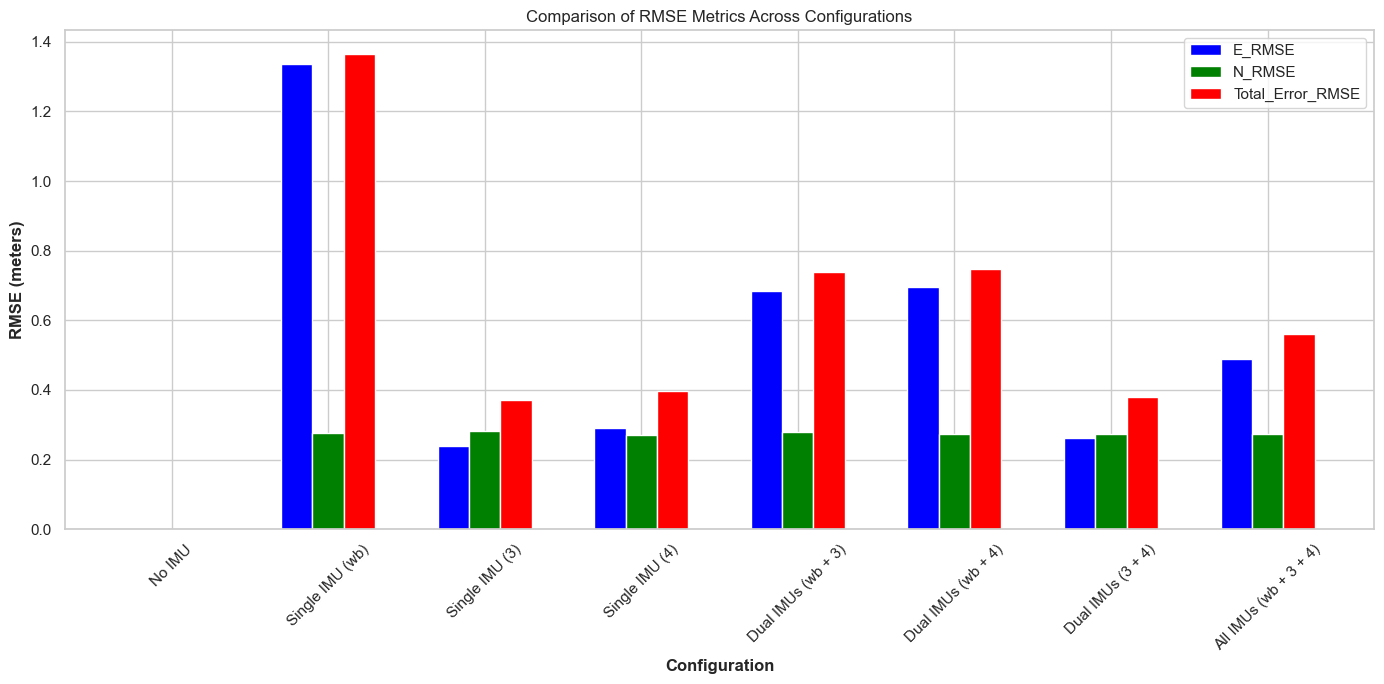

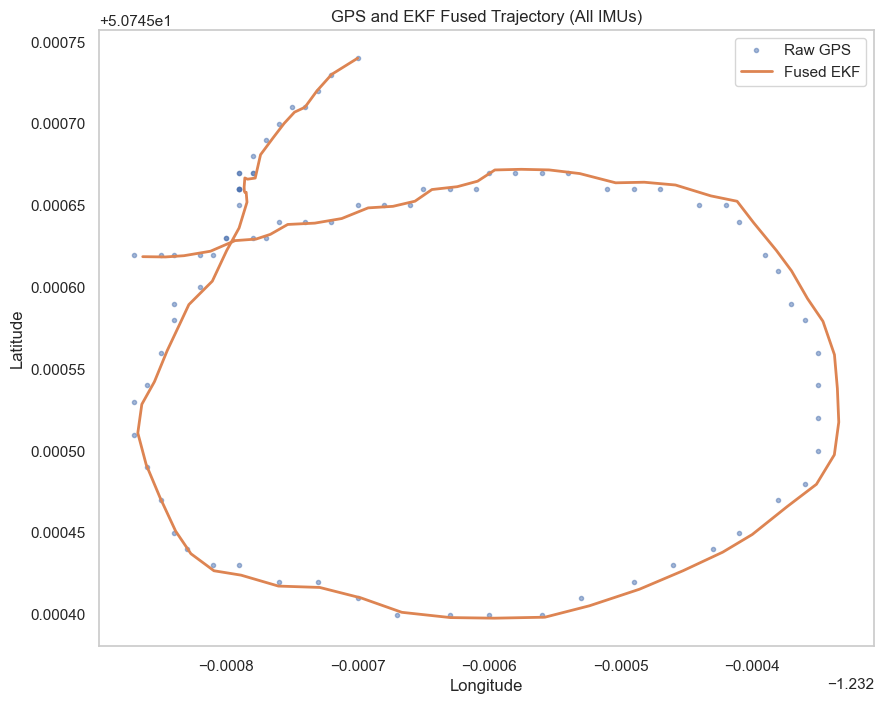

In [4]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer
import seaborn as sns

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '012_Static_port_1'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # IMU sensors

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# ================== Data Loading and Preprocessing ==================

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
try:
    gps_df = pd.read_csv(gps_file, usecols=gps_columns)
    log(f"GPS Data Loaded: {gps_df.shape[0]} rows")
except FileNotFoundError:
    sys.exit(f"Error: GPS file not found at path {gps_file}")
except Exception as e:
    sys.exit(f"Error loading GPS data: {e}")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    try:
        log(f"Loading IMU accelerometer data from {sensor}...")
        accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
        log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Accelerometer file not found for sensor {sensor} at path {accel_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading accelerometer data for sensor {sensor}: {e}")
    
    try:
        log(f"Loading IMU gyroscope data from {sensor}...")
        gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
        log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Gyroscope file not found for sensor {sensor} at path {gyro_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading gyroscope data for sensor {sensor}: {e}")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# Uncomment the next line if you want to drop NaNs
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Transform IMU Accelerometer Data Based on Orientations ===
# Define rotation mappings for each IMU based on their orientations

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row.get('x_accel_wb', 0), row.get('y_accel_wb', 0), row.get('z_accel_wb', 0)), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row.get('x_accel_3', 0), row.get('y_accel_3', 0), row.get('z_accel_3', 0)), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row.get('x_accel_4', 0), row.get('y_accel_4', 0), row.get('z_accel_4', 0)), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")

# ================== Extended Kalman Filter (EKF) Implementation ==================

# Function to run EKF based on selected IMU sensors
def run_ekf(data_df, selected_sensors, R_base):
    """
    Runs the EKF based on selected IMU sensors.
    
    Parameters:
    - data_df: Merged DataFrame containing GPS and selected IMU data.
    - selected_sensors: List of IMU sensors to use.
    - R_base: Base measurement noise covariance matrix.
    
    Returns:
    - data_df with estimated states.
    """
    # Initialize state vector [E, N, V_E, V_N]
    state = np.array([data_df.iloc[0]['E'],
                      data_df.iloc[0]['N'],
                      0,
                      0]).reshape(4,1)

    # Initialize covariance matrices
    P = np.eye(4) * 500  # Initial state covariance
    Q = np.eye(4)        # Process noise covariance
    I = np.eye(4)        # Identity matrix

    estimated_states = []
    
    for idx in range(len(data_df)):
        row = data_df.iloc[idx]
        
        # Time step
        if idx == 0:
            dt = 0.01  # Initial dt (e.g., 100Hz)
        else:
            dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
            if dt <= 0:
                dt = 0.01  # Handle non-positive dt
        
        # State Transition Matrix
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        # Control Input (if any)
        if selected_sensors:
            a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
            a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
            u = np.array([0.5 * a_E * dt**2,
                          0.5 * a_N * dt**2,
                          a_E * dt,
                          a_N * dt]).reshape(4,1)
        else:
            u = np.zeros((4,1))
        
        # Process model prediction
        state = F @ state + u
        P = F @ P @ F.T + Q
        
        # Measurement Update
        z = np.array([row['E'], row['N']]).reshape(2,1)
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])
        
        # Dynamically set R_gps based on HDOP
        current_hdop = row['HDOP']
        R_gps = (current_hdop ** 2) * R_base
        
        y_innovation = z - H @ state  # Innovation
        S = H @ P @ H.T + R_gps
        K = P @ H.T @ np.linalg.inv(S)
        
        state = state + K @ y_innovation
        P = (I - K @ H) @ P
        
        # Store the estimated state
        estimated_states.append(state.flatten())
        
        # Optional: Print progress
        if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
            log(f"Processed {idx} rows...")
    
    # Convert estimated states to DataFrame
    estimated_states = np.array(estimated_states)
    data_df['E_est'] = estimated_states[:,0]
    data_df['N_est'] = estimated_states[:,1]
    
    return data_df

# Function to aggregate IMU data based on selected sensors
def aggregate_imu_data(data_df, selected_sensors):
    """
    Aggregates accelerometer data from selected IMU sensors.
    
    Parameters:
    - data_df: DataFrame containing IMU data.
    - selected_sensors: List of IMU sensors to use.
    
    Returns:
    - data_df with aggregated accelerometer data.
    """
    if not selected_sensors:
        # No IMUs used
        data_df['x_accel_avg'] = 0
        data_df['y_accel_avg'] = 0
        data_df['z_accel_avg'] = 0
    else:
        # Check if the required transformed accelerometer columns exist
        required_columns_e = [f'E_accel_{sensor}' for sensor in selected_sensors]
        required_columns_n = [f'N_accel_{sensor}' for sensor in selected_sensors]
        required_columns_u = [f'U_accel_{sensor}' for sensor in selected_sensors]
        
        missing_e = [col for col in required_columns_e if col not in data_df.columns]
        missing_n = [col for col in required_columns_n if col not in data_df.columns]
        missing_u = [col for col in required_columns_u if col not in data_df.columns]
        
        if missing_e or missing_n or missing_u:
            missing = missing_e + missing_n + missing_u
            sys.exit(f"Error: Missing columns for IMU sensors {selected_sensors}: {missing}")
        
        # Aggregate accelerometer data
        data_df['x_accel_avg'] = data_df[required_columns_e].mean(axis=1)
        data_df['y_accel_avg'] = data_df[required_columns_n].mean(axis=1)
        data_df['z_accel_avg'] = data_df[required_columns_u].mean(axis=1)
    
    return data_df

# ================== Define IMU Configurations ==================

# Define base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy

# Define different IMU configurations
imu_configurations = {
    'No IMU': [],
    'Single IMU (wb)': ['wb'],
    'Single IMU (3)': ['3'],
    'Single IMU (4)': ['4'],
    'Dual IMUs (wb + 3)': ['wb', '3'],
    'Dual IMUs (wb + 4)': ['wb', '4'],
    'Dual IMUs (3 + 4)': ['3', '4'],
    'All IMUs (wb + 3 + 4)': ['wb', '3', '4']
}

# Dictionary to store results
results = {}

# ================== Run EKF for Each Configuration ==================

for config_name, sensors in imu_configurations.items():
    print(f"\n=== Running EKF for Configuration: {config_name} ===")
    
    if not sensors:
        # Scenario 1: No IMUs
        data_scenario = data_df.copy()
        data_scenario['x_accel_avg'] = 0
        data_scenario['y_accel_avg'] = 0
        data_scenario['z_accel_avg'] = 0
        
        # Initialize EKF estimates as GPS estimates
        data_scenario['E_est'] = data_scenario['E']
        data_scenario['N_est'] = data_scenario['N']
        
        # Calculate differences and errors
        data_scenario['E_diff'] = 0
        data_scenario['N_diff'] = 0
        data_scenario['Total_Error'] = 0
    else:
        # Scenario 2 & 3: With IMUs
        # Merge and aggregate IMU data based on selected sensors
        data_scenario = data_df.copy()
        data_scenario = aggregate_imu_data(data_scenario, sensors)
        
        # Run EKF
        data_scenario = run_ekf(data_scenario, sensors, R_base)
        
        # Calculate differences and errors
        data_scenario['E_diff'] = data_scenario['E_est'] - data_scenario['E']
        data_scenario['N_diff'] = data_scenario['N_est'] - data_scenario['N']
        data_scenario['Total_Error'] = np.sqrt(data_scenario['E_diff']**2 + data_scenario['N_diff']**2)
    
    # Store results
    results[config_name] = data_scenario

# ================== Comparative Analysis ==================

# Initialize a list to store RMSE statistics
comparison_list = []

for config_name, data in results.items():
    if config_name != 'No IMU':
        e_rmse = np.sqrt(np.mean(data['E_diff']**2))
        n_rmse = np.sqrt(np.mean(data['N_diff']**2))
        total_error_rmse = np.sqrt(np.mean(data['Total_Error']**2))
    else:
        # For No IMU, RMSEs are zero since E_est = E and N_est = N
        e_rmse = 0
        n_rmse = 0
        total_error_rmse = 0
    
    # Append the statistics as a dictionary
    comparison_list.append({
        'Configuration': config_name,
        'E_RMSE': e_rmse,
        'N_RMSE': n_rmse,
        'Total_Error_RMSE': total_error_rmse
    })

# Convert the list of dictionaries to a DataFrame using pd.DataFrame
comparison_df = pd.DataFrame(comparison_list)

print("\n=== Comparative RMSE Metrics ===")
print(comparison_df)

# ================== Visualization ==================

# Bar Chart of RMSE Metrics
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(14, 7))
plt.bar(r1, comparison_df['E_RMSE'], color='blue', width=bar_width, label='E_RMSE')
plt.bar(r2, comparison_df['N_RMSE'], color='green', width=bar_width, label='N_RMSE')
plt.bar(r3, comparison_df['Total_Error_RMSE'], color='red', width=bar_width, label='Total_Error_RMSE')

# Add labels and title
plt.xlabel('Configuration', fontweight='bold')
plt.ylabel('RMSE (meters)', fontweight='bold')
plt.title('Comparison of RMSE Metrics Across Configurations')
plt.xticks([r + bar_width for r in range(len(comparison_df))], comparison_df['Configuration'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ================== DOP-based Analysis ==================

# Define DOP bins based on specified ranges
pdop_bins = [1, 1.5, 2, 2.5]
pdop_labels = ['1-1.5', '1.5-2', '2-2.5']

hdop_bins = [0.5, 0.7, 0.9, 1.0]
hdop_labels = ['0.5-0.7', '0.7-0.9', '0.9-1.0']

vdop_bins = [1, 1.5, 2, 2.5]
vdop_labels = ['1-1.5', '1.5-2', '2-2.5']

# Function to plot DOP-based error statistics
def plot_dop_statistics(data_df, config_name):
    """
    Plots box plots and scatter plots of Total_Error against DOP metrics.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    # Box Plots of Total Error by DOP Bins
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='PDOP_bin', y='Total_Error', data=data_df, palette='Blues')
    plt.title(f'{config_name} - Total Error by PDOP')
    plt.xlabel('PDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='HDOP_bin', y='Total_Error', data=data_df, palette='Greens')
    plt.title(f'{config_name} - Total Error by HDOP')
    plt.xlabel('HDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='VDOP_bin', y='Total_Error', data=data_df, palette='Reds')
    plt.title(f'{config_name} - Total Error by VDOP')
    plt.xlabel('VDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Scatter Plots of DOP Metrics vs Total Error
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='PDOP', y='Total_Error', data=data_df, alpha=0.5, color='blue')
    plt.title(f'{config_name} - Total Error vs PDOP')
    plt.xlabel('PDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='HDOP', y='Total_Error', data=data_df, alpha=0.5, color='green')
    plt.title(f'{config_name} - Total Error vs HDOP')
    plt.xlabel('HDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='VDOP', y='Total_Error', data=data_df, alpha=0.5, color='red')
    plt.title(f'{config_name} - Total Error vs VDOP')
    plt.xlabel('VDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()

# Iterate over configurations and perform DOP-based analysis
for config_name, data in results.items():
    if config_name != 'No IMU':
        # Binning DOP metrics based on specified ranges
        data['PDOP_bin'] = pd.cut(data['PDOP'], bins=pdop_bins, labels=pdop_labels, include_lowest=True)
        data['HDOP_bin'] = pd.cut(data['HDOP'], bins=hdop_bins, labels=hdop_labels, include_lowest=True)
        data['VDOP_bin'] = pd.cut(data['VDOP'], bins=vdop_bins, labels=vdop_labels, include_lowest=True)
        
        # Plot DOP-based statistics
        # plot_dop_statistics(data, config_name)

# ================== Optional: Plot Trajectories ==================

# Plotting the trajectories for the configuration with all IMUs
if 'All IMUs (wb + 3 + 4)' in results:
    data_all = results['All IMUs (wb + 3 + 4)']
    
    # Function to convert ENU back to lat/lon for plotting
    def enu_to_latlon(e, n, u):
        # Apply inverse rotation
        diff = np.array([e, n, u])
        ecef_diff = R.T @ diff
        # Compute ECEF coordinates
        x = ref_ecef[0] + ecef_diff[0]
        y = ref_ecef[1] + ecef_diff[1]
        z = ref_ecef[2] + ecef_diff[2]
        # Convert back to LLA
        lon, lat, alt = transformer_to_lla.transform(x, y, z)
        return lat, lon, alt
    
    # Convert ENU back to lat/lon for plotting
    log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
    latlon_est = data_all.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
    data_all['Lat_est'], data_all['Lng_est'], data_all['Alt_est'] = zip(*latlon_est)
    log("Conversion completed.")
    
    # Plotting the trajectories
    log("\nPlotting the trajectories...")
    plt.figure(figsize=(10,8))
    plt.plot(data_all['Lng'], data_all['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
    plt.plot(data_all['Lng_est'], data_all['Lat_est'], label='Fused EKF', linewidth=2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('GPS and EKF Fused Trajectory (All IMUs)')
    plt.legend()
    plt.grid()
    plt.show()

# ================== End of Script ==================



=== Running EKF for Configuration: No IMU ===

=== Running EKF for Configuration: Single IMU (wb) ===

=== Running EKF for Configuration: Single IMU (3) ===

=== Running EKF for Configuration: Single IMU (4) ===

=== Running EKF for Configuration: Dual IMUs (wb + 3) ===

=== Running EKF for Configuration: Dual IMUs (wb + 4) ===

=== Running EKF for Configuration: Dual IMUs (3 + 4) ===

=== Running EKF for Configuration: All IMUs (wb + 3 + 4) ===

=== Comparative RMSE Metrics ===
           Configuration    E_RMSE    N_RMSE  Total_Error_RMSE
0                 No IMU  0.000000  0.000000          0.000000
1        Single IMU (wb)  1.290429  0.295259          1.323777
2         Single IMU (3)  0.255634  0.305045          0.397996
3         Single IMU (4)  0.251987  0.284907          0.380355
4     Dual IMUs (wb + 3)  0.632115  0.295134          0.697620
5     Dual IMUs (wb + 4)  0.659549  0.286967          0.719274
6      Dual IMUs (3 + 4)  0.235959  0.290929          0.374588
7  All IMUs

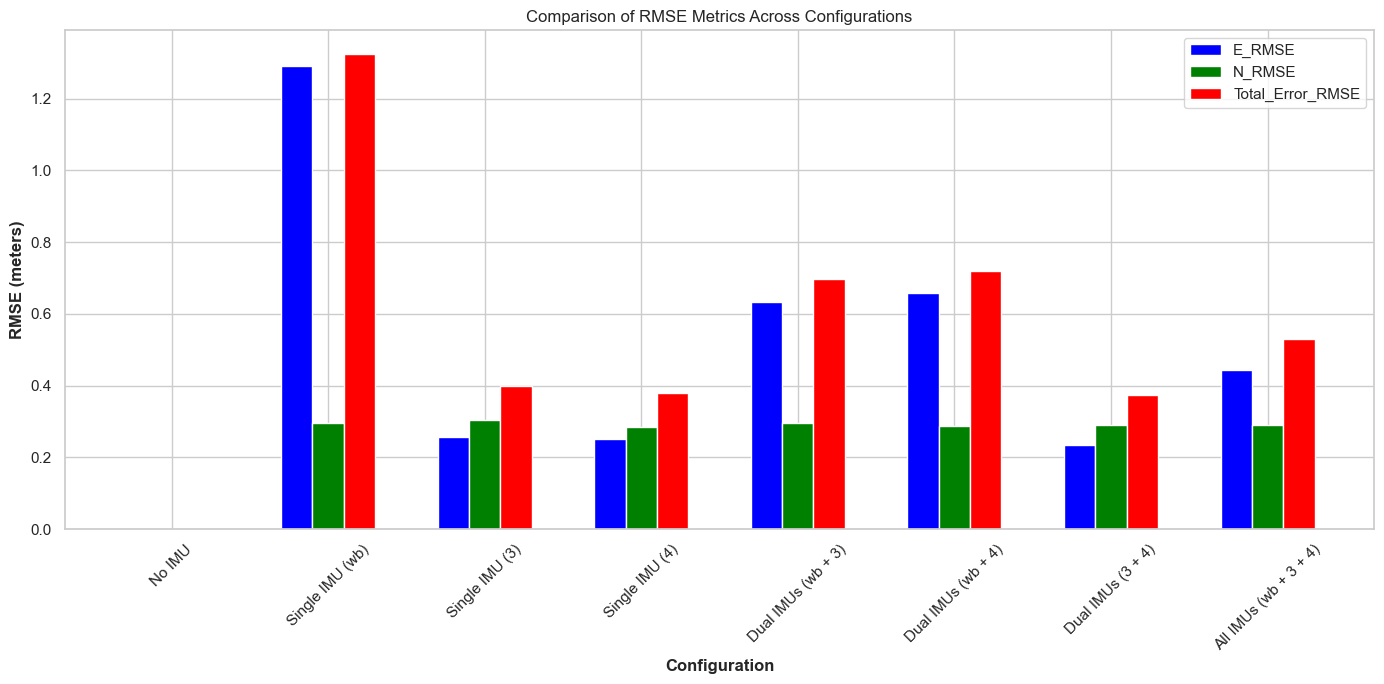

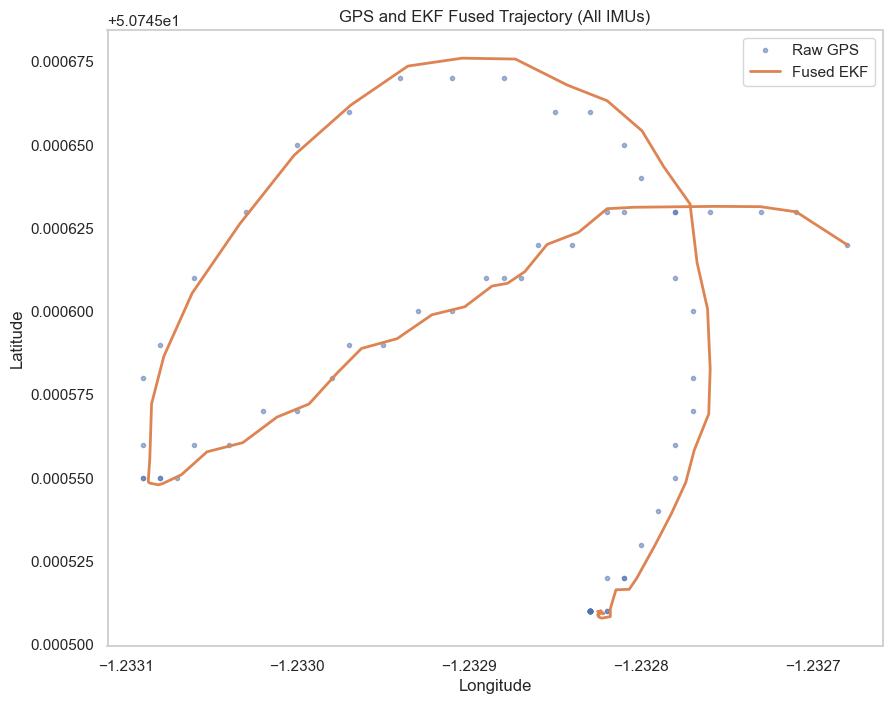

In [5]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer
import seaborn as sns

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '014_Static_stbd_2'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # IMU sensors

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# ================== Data Loading and Preprocessing ==================

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
try:
    gps_df = pd.read_csv(gps_file, usecols=gps_columns)
    log(f"GPS Data Loaded: {gps_df.shape[0]} rows")
except FileNotFoundError:
    sys.exit(f"Error: GPS file not found at path {gps_file}")
except Exception as e:
    sys.exit(f"Error loading GPS data: {e}")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    try:
        log(f"Loading IMU accelerometer data from {sensor}...")
        accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
        log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Accelerometer file not found for sensor {sensor} at path {accel_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading accelerometer data for sensor {sensor}: {e}")
    
    try:
        log(f"Loading IMU gyroscope data from {sensor}...")
        gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
        log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Gyroscope file not found for sensor {sensor} at path {gyro_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading gyroscope data for sensor {sensor}: {e}")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# Uncomment the next line if you want to drop NaNs
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Transform IMU Accelerometer Data Based on Orientations ===
# Define rotation mappings for each IMU based on their orientations

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row.get('x_accel_wb', 0), row.get('y_accel_wb', 0), row.get('z_accel_wb', 0)), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row.get('x_accel_3', 0), row.get('y_accel_3', 0), row.get('z_accel_3', 0)), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row.get('x_accel_4', 0), row.get('y_accel_4', 0), row.get('z_accel_4', 0)), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")

# ================== Extended Kalman Filter (EKF) Implementation ==================

# Function to run EKF based on selected IMU sensors
def run_ekf(data_df, selected_sensors, R_base):
    """
    Runs the EKF based on selected IMU sensors.
    
    Parameters:
    - data_df: Merged DataFrame containing GPS and selected IMU data.
    - selected_sensors: List of IMU sensors to use.
    - R_base: Base measurement noise covariance matrix.
    
    Returns:
    - data_df with estimated states.
    """
    # Initialize state vector [E, N, V_E, V_N]
    state = np.array([data_df.iloc[0]['E'],
                      data_df.iloc[0]['N'],
                      0,
                      0]).reshape(4,1)

    # Initialize covariance matrices
    P = np.eye(4) * 500  # Initial state covariance
    Q = np.eye(4)        # Process noise covariance
    I = np.eye(4)        # Identity matrix

    estimated_states = []
    
    for idx in range(len(data_df)):
        row = data_df.iloc[idx]
        
        # Time step
        if idx == 0:
            dt = 0.01  # Initial dt (e.g., 100Hz)
        else:
            dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
            if dt <= 0:
                dt = 0.01  # Handle non-positive dt
        
        # State Transition Matrix
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        # Control Input (if any)
        if selected_sensors:
            a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
            a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
            u = np.array([0.5 * a_E * dt**2,
                          0.5 * a_N * dt**2,
                          a_E * dt,
                          a_N * dt]).reshape(4,1)
        else:
            u = np.zeros((4,1))
        
        # Process model prediction
        state = F @ state + u
        P = F @ P @ F.T + Q
        
        # Measurement Update
        z = np.array([row['E'], row['N']]).reshape(2,1)
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])
        
        # Dynamically set R_gps based on HDOP
        current_hdop = row['HDOP']
        R_gps = (current_hdop ** 2) * R_base
        
        y_innovation = z - H @ state  # Innovation
        S = H @ P @ H.T + R_gps
        K = P @ H.T @ np.linalg.inv(S)
        
        state = state + K @ y_innovation
        P = (I - K @ H) @ P
        
        # Store the estimated state
        estimated_states.append(state.flatten())
        
        # Optional: Print progress
        if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
            log(f"Processed {idx} rows...")
    
    # Convert estimated states to DataFrame
    estimated_states = np.array(estimated_states)
    data_df['E_est'] = estimated_states[:,0]
    data_df['N_est'] = estimated_states[:,1]
    
    return data_df

# Function to aggregate IMU data based on selected sensors
def aggregate_imu_data(data_df, selected_sensors):
    """
    Aggregates accelerometer data from selected IMU sensors.
    
    Parameters:
    - data_df: DataFrame containing IMU data.
    - selected_sensors: List of IMU sensors to use.
    
    Returns:
    - data_df with aggregated accelerometer data.
    """
    if not selected_sensors:
        # No IMUs used
        data_df['x_accel_avg'] = 0
        data_df['y_accel_avg'] = 0
        data_df['z_accel_avg'] = 0
    else:
        # Check if the required transformed accelerometer columns exist
        required_columns_e = [f'E_accel_{sensor}' for sensor in selected_sensors]
        required_columns_n = [f'N_accel_{sensor}' for sensor in selected_sensors]
        required_columns_u = [f'U_accel_{sensor}' for sensor in selected_sensors]
        
        missing_e = [col for col in required_columns_e if col not in data_df.columns]
        missing_n = [col for col in required_columns_n if col not in data_df.columns]
        missing_u = [col for col in required_columns_u if col not in data_df.columns]
        
        if missing_e or missing_n or missing_u:
            missing = missing_e + missing_n + missing_u
            sys.exit(f"Error: Missing columns for IMU sensors {selected_sensors}: {missing}")
        
        # Aggregate accelerometer data
        data_df['x_accel_avg'] = data_df[required_columns_e].mean(axis=1)
        data_df['y_accel_avg'] = data_df[required_columns_n].mean(axis=1)
        data_df['z_accel_avg'] = data_df[required_columns_u].mean(axis=1)
    
    return data_df

# ================== Define IMU Configurations ==================

# Define base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy

# Define different IMU configurations
imu_configurations = {
    'No IMU': [],
    'Single IMU (wb)': ['wb'],
    'Single IMU (3)': ['3'],
    'Single IMU (4)': ['4'],
    'Dual IMUs (wb + 3)': ['wb', '3'],
    'Dual IMUs (wb + 4)': ['wb', '4'],
    'Dual IMUs (3 + 4)': ['3', '4'],
    'All IMUs (wb + 3 + 4)': ['wb', '3', '4']
}

# Dictionary to store results
results = {}

# ================== Run EKF for Each Configuration ==================

for config_name, sensors in imu_configurations.items():
    print(f"\n=== Running EKF for Configuration: {config_name} ===")
    
    if not sensors:
        # Scenario 1: No IMUs
        data_scenario = data_df.copy()
        data_scenario['x_accel_avg'] = 0
        data_scenario['y_accel_avg'] = 0
        data_scenario['z_accel_avg'] = 0
        
        # Initialize EKF estimates as GPS estimates
        data_scenario['E_est'] = data_scenario['E']
        data_scenario['N_est'] = data_scenario['N']
        
        # Calculate differences and errors
        data_scenario['E_diff'] = 0
        data_scenario['N_diff'] = 0
        data_scenario['Total_Error'] = 0
    else:
        # Scenario 2 & 3: With IMUs
        # Merge and aggregate IMU data based on selected sensors
        data_scenario = data_df.copy()
        data_scenario = aggregate_imu_data(data_scenario, sensors)
        
        # Run EKF
        data_scenario = run_ekf(data_scenario, sensors, R_base)
        
        # Calculate differences and errors
        data_scenario['E_diff'] = data_scenario['E_est'] - data_scenario['E']
        data_scenario['N_diff'] = data_scenario['N_est'] - data_scenario['N']
        data_scenario['Total_Error'] = np.sqrt(data_scenario['E_diff']**2 + data_scenario['N_diff']**2)
    
    # Store results
    results[config_name] = data_scenario

# ================== Comparative Analysis ==================

# Initialize a list to store RMSE statistics
comparison_list = []

for config_name, data in results.items():
    if config_name != 'No IMU':
        e_rmse = np.sqrt(np.mean(data['E_diff']**2))
        n_rmse = np.sqrt(np.mean(data['N_diff']**2))
        total_error_rmse = np.sqrt(np.mean(data['Total_Error']**2))
    else:
        # For No IMU, RMSEs are zero since E_est = E and N_est = N
        e_rmse = 0
        n_rmse = 0
        total_error_rmse = 0
    
    # Append the statistics as a dictionary
    comparison_list.append({
        'Configuration': config_name,
        'E_RMSE': e_rmse,
        'N_RMSE': n_rmse,
        'Total_Error_RMSE': total_error_rmse
    })

# Convert the list of dictionaries to a DataFrame using pd.DataFrame
comparison_df = pd.DataFrame(comparison_list)

print("\n=== Comparative RMSE Metrics ===")
print(comparison_df)

# ================== Visualization ==================

# Bar Chart of RMSE Metrics
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(14, 7))
plt.bar(r1, comparison_df['E_RMSE'], color='blue', width=bar_width, label='E_RMSE')
plt.bar(r2, comparison_df['N_RMSE'], color='green', width=bar_width, label='N_RMSE')
plt.bar(r3, comparison_df['Total_Error_RMSE'], color='red', width=bar_width, label='Total_Error_RMSE')

# Add labels and title
plt.xlabel('Configuration', fontweight='bold')
plt.ylabel('RMSE (meters)', fontweight='bold')
plt.title('Comparison of RMSE Metrics Across Configurations')
plt.xticks([r + bar_width for r in range(len(comparison_df))], comparison_df['Configuration'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ================== DOP-based Analysis ==================

# Define DOP bins based on specified ranges
pdop_bins = [1, 1.5, 2, 2.5]
pdop_labels = ['1-1.5', '1.5-2', '2-2.5']

hdop_bins = [0.5, 0.7, 0.9, 1.0]
hdop_labels = ['0.5-0.7', '0.7-0.9', '0.9-1.0']

vdop_bins = [1, 1.5, 2, 2.5]
vdop_labels = ['1-1.5', '1.5-2', '2-2.5']

# Function to plot DOP-based error statistics
def plot_dop_statistics(data_df, config_name):
    """
    Plots box plots and scatter plots of Total_Error against DOP metrics.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    # Box Plots of Total Error by DOP Bins
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='PDOP_bin', y='Total_Error', data=data_df, palette='Blues')
    plt.title(f'{config_name} - Total Error by PDOP')
    plt.xlabel('PDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='HDOP_bin', y='Total_Error', data=data_df, palette='Greens')
    plt.title(f'{config_name} - Total Error by HDOP')
    plt.xlabel('HDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='VDOP_bin', y='Total_Error', data=data_df, palette='Reds')
    plt.title(f'{config_name} - Total Error by VDOP')
    plt.xlabel('VDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Scatter Plots of DOP Metrics vs Total Error
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='PDOP', y='Total_Error', data=data_df, alpha=0.5, color='blue')
    plt.title(f'{config_name} - Total Error vs PDOP')
    plt.xlabel('PDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='HDOP', y='Total_Error', data=data_df, alpha=0.5, color='green')
    plt.title(f'{config_name} - Total Error vs HDOP')
    plt.xlabel('HDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='VDOP', y='Total_Error', data=data_df, alpha=0.5, color='red')
    plt.title(f'{config_name} - Total Error vs VDOP')
    plt.xlabel('VDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()

# Iterate over configurations and perform DOP-based analysis
for config_name, data in results.items():
    if config_name != 'No IMU':
        # Binning DOP metrics based on specified ranges
        data['PDOP_bin'] = pd.cut(data['PDOP'], bins=pdop_bins, labels=pdop_labels, include_lowest=True)
        data['HDOP_bin'] = pd.cut(data['HDOP'], bins=hdop_bins, labels=hdop_labels, include_lowest=True)
        data['VDOP_bin'] = pd.cut(data['VDOP'], bins=vdop_bins, labels=vdop_labels, include_lowest=True)
        
        # Plot DOP-based statistics
        # plot_dop_statistics(data, config_name)

# ================== Optional: Plot Trajectories ==================

# Plotting the trajectories for the configuration with all IMUs
if 'All IMUs (wb + 3 + 4)' in results:
    data_all = results['All IMUs (wb + 3 + 4)']
    
    # Function to convert ENU back to lat/lon for plotting
    def enu_to_latlon(e, n, u):
        # Apply inverse rotation
        diff = np.array([e, n, u])
        ecef_diff = R.T @ diff
        # Compute ECEF coordinates
        x = ref_ecef[0] + ecef_diff[0]
        y = ref_ecef[1] + ecef_diff[1]
        z = ref_ecef[2] + ecef_diff[2]
        # Convert back to LLA
        lon, lat, alt = transformer_to_lla.transform(x, y, z)
        return lat, lon, alt
    
    # Convert ENU back to lat/lon for plotting
    log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
    latlon_est = data_all.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
    data_all['Lat_est'], data_all['Lng_est'], data_all['Alt_est'] = zip(*latlon_est)
    log("Conversion completed.")
    
    # Plotting the trajectories
    log("\nPlotting the trajectories...")
    plt.figure(figsize=(10,8))
    plt.plot(data_all['Lng'], data_all['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
    plt.plot(data_all['Lng_est'], data_all['Lat_est'], label='Fused EKF', linewidth=2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('GPS and EKF Fused Trajectory (All IMUs)')
    plt.legend()
    plt.grid()
    plt.show()

# ================== End of Script ==================



=== Running EKF for Configuration: No IMU ===

=== Running EKF for Configuration: Single IMU (wb) ===

=== Running EKF for Configuration: Single IMU (3) ===

=== Running EKF for Configuration: Single IMU (4) ===

=== Running EKF for Configuration: Dual IMUs (wb + 3) ===

=== Running EKF for Configuration: Dual IMUs (wb + 4) ===

=== Running EKF for Configuration: Dual IMUs (3 + 4) ===

=== Running EKF for Configuration: All IMUs (wb + 3 + 4) ===

=== Comparative RMSE Metrics ===
           Configuration    E_RMSE    N_RMSE  Total_Error_RMSE
0                 No IMU  0.000000  0.000000          0.000000
1        Single IMU (wb)  1.301695  0.315218          1.339318
2         Single IMU (3)  0.296004  0.292984          0.416482
3         Single IMU (4)  0.337192  0.285988          0.442140
4     Dual IMUs (wb + 3)  0.677740  0.301432          0.741750
5     Dual IMUs (wb + 4)  0.689087  0.298979          0.751152
6      Dual IMUs (3 + 4)  0.312173  0.288046          0.424762
7  All IMUs

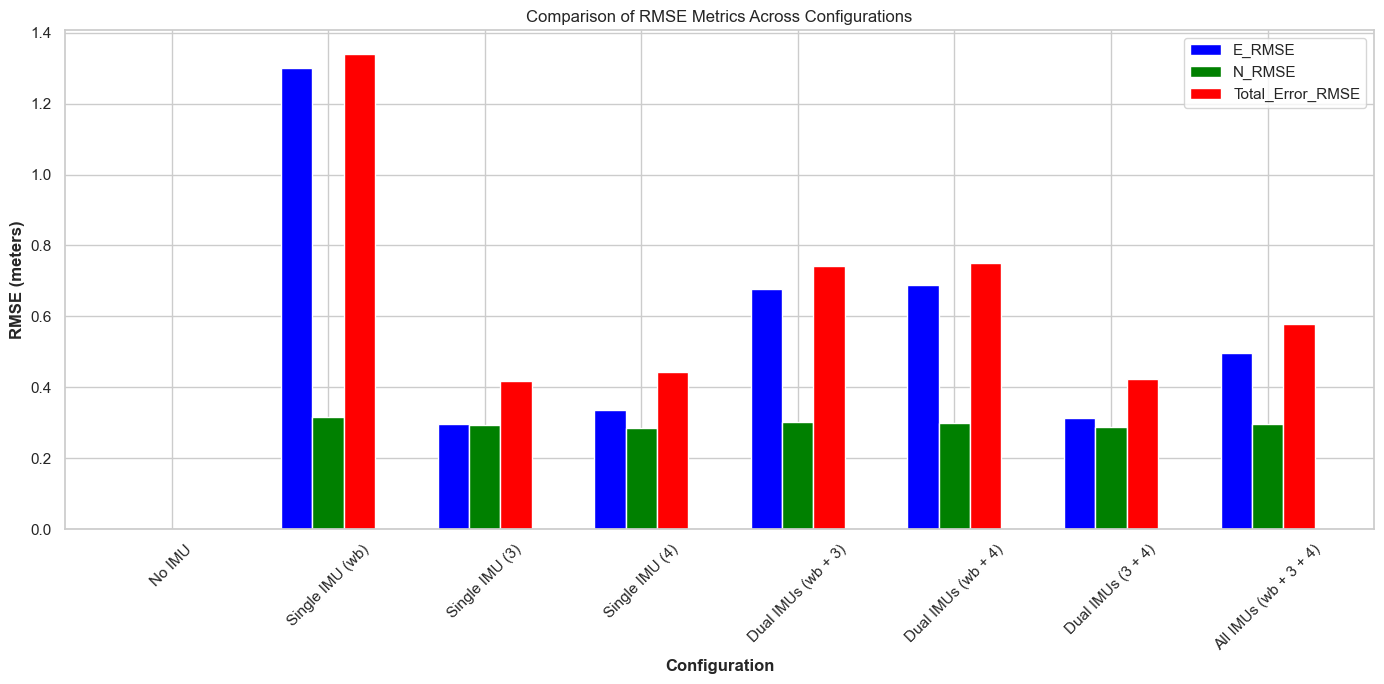

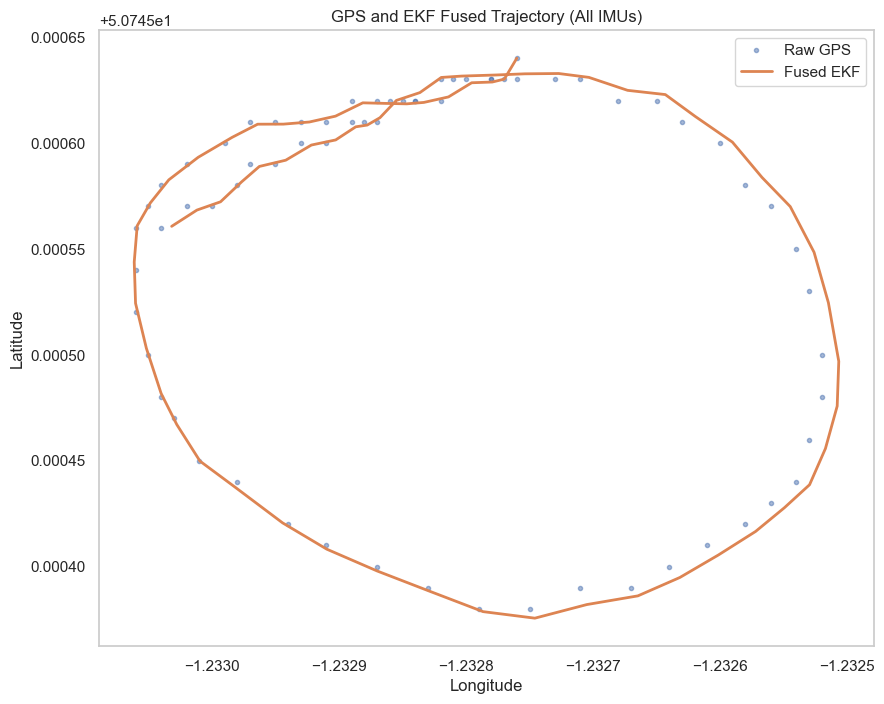

In [7]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer
import seaborn as sns

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '013_Static_port_2'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']  # IMU sensors

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# ================== Data Loading and Preprocessing ==================

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
try:
    gps_df = pd.read_csv(gps_file, usecols=gps_columns)
    log(f"GPS Data Loaded: {gps_df.shape[0]} rows")
except FileNotFoundError:
    sys.exit(f"Error: GPS file not found at path {gps_file}")
except Exception as e:
    sys.exit(f"Error loading GPS data: {e}")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    try:
        log(f"Loading IMU accelerometer data from {sensor}...")
        accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
        log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Accelerometer file not found for sensor {sensor} at path {accel_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading accelerometer data for sensor {sensor}: {e}")
    
    try:
        log(f"Loading IMU gyroscope data from {sensor}...")
        gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
            columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
        log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")
    except FileNotFoundError:
        sys.exit(f"Error: Gyroscope file not found for sensor {sensor} at path {gyro_files[sensor]}")
    except Exception as e:
        sys.exit(f"Error loading gyroscope data for sensor {sensor}: {e}")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# Uncomment the next line if you want to drop NaNs
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# === Transform IMU Accelerometer Data Based on Orientations ===
# Define rotation mappings for each IMU based on their orientations

def transform_accel_imu3(x, y, z):
    """
    IMU3 Orientation:
    X: Upward    -> ENU Z
    Y: Forward   -> ENU Y
    Z: Port      -> -ENU X
    """
    E = -z
    N = y
    U = x
    return E, N, U

def transform_accel_imu4(x, y, z):
    """
    IMU4 Orientation:
    X: Upward    -> ENU Z
    Y: Starboard -> ENU X
    Z: Forward   -> ENU Y
    """
    E = y
    N = z
    U = x
    return E, N, U

def transform_accel_wb(x, y, z):
    """
    wb Orientation:
    X: Upward       -> ENU Z
    Y: Aft          -> -ENU Y
    Z: Starboard    -> ENU X
    """
    E = z
    N = -y
    U = x
    return E, N, U

# Apply the transformations to each IMU's accelerometer data
log("\nTransforming accelerometer data based on IMU orientations...")

data_df[['E_accel_wb', 'N_accel_wb', 'U_accel_wb']] = data_df.apply(
    lambda row: transform_accel_wb(row.get('x_accel_wb', 0), row.get('y_accel_wb', 0), row.get('z_accel_wb', 0)), axis=1, result_type='expand')

data_df[['E_accel_3', 'N_accel_3', 'U_accel_3']] = data_df.apply(
    lambda row: transform_accel_imu3(row.get('x_accel_3', 0), row.get('y_accel_3', 0), row.get('z_accel_3', 0)), axis=1, result_type='expand')

data_df[['E_accel_4', 'N_accel_4', 'U_accel_4']] = data_df.apply(
    lambda row: transform_accel_imu4(row.get('x_accel_4', 0), row.get('y_accel_4', 0), row.get('z_accel_4', 0)), axis=1, result_type='expand')

log("Accelerometer data transformation completed.")

# ================== Extended Kalman Filter (EKF) Implementation ==================

# Function to run EKF based on selected IMU sensors
def run_ekf(data_df, selected_sensors, R_base):
    """
    Runs the EKF based on selected IMU sensors.
    
    Parameters:
    - data_df: Merged DataFrame containing GPS and selected IMU data.
    - selected_sensors: List of IMU sensors to use.
    - R_base: Base measurement noise covariance matrix.
    
    Returns:
    - data_df with estimated states.
    """
    # Initialize state vector [E, N, V_E, V_N]
    state = np.array([data_df.iloc[0]['E'],
                      data_df.iloc[0]['N'],
                      0,
                      0]).reshape(4,1)

    # Initialize covariance matrices
    P = np.eye(4) * 500  # Initial state covariance
    Q = np.eye(4)        # Process noise covariance
    I = np.eye(4)        # Identity matrix

    estimated_states = []
    
    for idx in range(len(data_df)):
        row = data_df.iloc[idx]
        
        # Time step
        if idx == 0:
            dt = 0.01  # Initial dt (e.g., 100Hz)
        else:
            dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
            if dt <= 0:
                dt = 0.01  # Handle non-positive dt
        
        # State Transition Matrix
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        # Control Input (if any)
        if selected_sensors:
            a_E = row['x_accel_avg']  # Aggregated accelerometer E-axis
            a_N = row['y_accel_avg']  # Aggregated accelerometer N-axis
            u = np.array([0.5 * a_E * dt**2,
                          0.5 * a_N * dt**2,
                          a_E * dt,
                          a_N * dt]).reshape(4,1)
        else:
            u = np.zeros((4,1))
        
        # Process model prediction
        state = F @ state + u
        P = F @ P @ F.T + Q
        
        # Measurement Update
        z = np.array([row['E'], row['N']]).reshape(2,1)
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])
        
        # Dynamically set R_gps based on HDOP
        current_hdop = row['HDOP']
        R_gps = (current_hdop ** 2) * R_base
        
        y_innovation = z - H @ state  # Innovation
        S = H @ P @ H.T + R_gps
        K = P @ H.T @ np.linalg.inv(S)
        
        state = state + K @ y_innovation
        P = (I - K @ H) @ P
        
        # Store the estimated state
        estimated_states.append(state.flatten())
        
        # Optional: Print progress
        if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
            log(f"Processed {idx} rows...")
    
    # Convert estimated states to DataFrame
    estimated_states = np.array(estimated_states)
    data_df['E_est'] = estimated_states[:,0]
    data_df['N_est'] = estimated_states[:,1]
    
    return data_df

# Function to aggregate IMU data based on selected sensors
def aggregate_imu_data(data_df, selected_sensors):
    """
    Aggregates accelerometer data from selected IMU sensors.
    
    Parameters:
    - data_df: DataFrame containing IMU data.
    - selected_sensors: List of IMU sensors to use.
    
    Returns:
    - data_df with aggregated accelerometer data.
    """
    if not selected_sensors:
        # No IMUs used
        data_df['x_accel_avg'] = 0
        data_df['y_accel_avg'] = 0
        data_df['z_accel_avg'] = 0
    else:
        # Check if the required transformed accelerometer columns exist
        required_columns_e = [f'E_accel_{sensor}' for sensor in selected_sensors]
        required_columns_n = [f'N_accel_{sensor}' for sensor in selected_sensors]
        required_columns_u = [f'U_accel_{sensor}' for sensor in selected_sensors]
        
        missing_e = [col for col in required_columns_e if col not in data_df.columns]
        missing_n = [col for col in required_columns_n if col not in data_df.columns]
        missing_u = [col for col in required_columns_u if col not in data_df.columns]
        
        if missing_e or missing_n or missing_u:
            missing = missing_e + missing_n + missing_u
            sys.exit(f"Error: Missing columns for IMU sensors {selected_sensors}: {missing}")
        
        # Aggregate accelerometer data
        data_df['x_accel_avg'] = data_df[required_columns_e].mean(axis=1)
        data_df['y_accel_avg'] = data_df[required_columns_n].mean(axis=1)
        data_df['z_accel_avg'] = data_df[required_columns_u].mean(axis=1)
    
    return data_df

# ================== Define IMU Configurations ==================

# Define base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy

# Define different IMU configurations
imu_configurations = {
    'No IMU': [],
    'Single IMU (wb)': ['wb'],
    'Single IMU (3)': ['3'],
    'Single IMU (4)': ['4'],
    'Dual IMUs (wb + 3)': ['wb', '3'],
    'Dual IMUs (wb + 4)': ['wb', '4'],
    'Dual IMUs (3 + 4)': ['3', '4'],
    'All IMUs (wb + 3 + 4)': ['wb', '3', '4']
}

# Dictionary to store results
results = {}

# ================== Run EKF for Each Configuration ==================

for config_name, sensors in imu_configurations.items():
    print(f"\n=== Running EKF for Configuration: {config_name} ===")
    
    if not sensors:
        # Scenario 1: No IMUs
        data_scenario = data_df.copy()
        data_scenario['x_accel_avg'] = 0
        data_scenario['y_accel_avg'] = 0
        data_scenario['z_accel_avg'] = 0
        
        # Initialize EKF estimates as GPS estimates
        data_scenario['E_est'] = data_scenario['E']
        data_scenario['N_est'] = data_scenario['N']
        
        # Calculate differences and errors
        data_scenario['E_diff'] = 0
        data_scenario['N_diff'] = 0
        data_scenario['Total_Error'] = 0
    else:
        # Scenario 2 & 3: With IMUs
        # Merge and aggregate IMU data based on selected sensors
        data_scenario = data_df.copy()
        data_scenario = aggregate_imu_data(data_scenario, sensors)
        
        # Run EKF
        data_scenario = run_ekf(data_scenario, sensors, R_base)
        
        # Calculate differences and errors
        data_scenario['E_diff'] = data_scenario['E_est'] - data_scenario['E']
        data_scenario['N_diff'] = data_scenario['N_est'] - data_scenario['N']
        data_scenario['Total_Error'] = np.sqrt(data_scenario['E_diff']**2 + data_scenario['N_diff']**2)
    
    # Store results
    results[config_name] = data_scenario

# ================== Comparative Analysis ==================

# Initialize a list to store RMSE statistics
comparison_list = []

for config_name, data in results.items():
    if config_name != 'No IMU':
        e_rmse = np.sqrt(np.mean(data['E_diff']**2))
        n_rmse = np.sqrt(np.mean(data['N_diff']**2))
        total_error_rmse = np.sqrt(np.mean(data['Total_Error']**2))
    else:
        # For No IMU, RMSEs are zero since E_est = E and N_est = N
        e_rmse = 0
        n_rmse = 0
        total_error_rmse = 0
    
    # Append the statistics as a dictionary
    comparison_list.append({
        'Configuration': config_name,
        'E_RMSE': e_rmse,
        'N_RMSE': n_rmse,
        'Total_Error_RMSE': total_error_rmse
    })

# Convert the list of dictionaries to a DataFrame using pd.DataFrame
comparison_df = pd.DataFrame(comparison_list)

print("\n=== Comparative RMSE Metrics ===")
print(comparison_df)

# ================== Visualization ==================

# Bar Chart of RMSE Metrics
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(14, 7))
plt.bar(r1, comparison_df['E_RMSE'], color='blue', width=bar_width, label='E_RMSE')
plt.bar(r2, comparison_df['N_RMSE'], color='green', width=bar_width, label='N_RMSE')
plt.bar(r3, comparison_df['Total_Error_RMSE'], color='red', width=bar_width, label='Total_Error_RMSE')

# Add labels and title
plt.xlabel('Configuration', fontweight='bold')
plt.ylabel('RMSE (meters)', fontweight='bold')
plt.title('Comparison of RMSE Metrics Across Configurations')
plt.xticks([r + bar_width for r in range(len(comparison_df))], comparison_df['Configuration'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ================== DOP-based Analysis ==================

# Define DOP bins based on specified ranges
pdop_bins = [1, 1.5, 2, 2.5]
pdop_labels = ['1-1.5', '1.5-2', '2-2.5']

hdop_bins = [0.5, 0.7, 0.9, 1.0]
hdop_labels = ['0.5-0.7', '0.7-0.9', '0.9-1.0']

vdop_bins = [1, 1.5, 2, 2.5]
vdop_labels = ['1-1.5', '1.5-2', '2-2.5']

# Function to plot DOP-based error statistics
def plot_dop_statistics(data_df, config_name):
    """
    Plots box plots and scatter plots of Total_Error against DOP metrics.
    
    Parameters:
    - data_df: DataFrame containing DOP bins and Total_Error.
    - config_name: Name of the IMU configuration.
    """
    # Box Plots of Total Error by DOP Bins
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='PDOP_bin', y='Total_Error', data=data_df, palette='Blues')
    plt.title(f'{config_name} - Total Error by PDOP')
    plt.xlabel('PDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='HDOP_bin', y='Total_Error', data=data_df, palette='Greens')
    plt.title(f'{config_name} - Total Error by HDOP')
    plt.xlabel('HDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='VDOP_bin', y='Total_Error', data=data_df, palette='Reds')
    plt.title(f'{config_name} - Total Error by VDOP')
    plt.xlabel('VDOP Bins')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()
    
    # Scatter Plots of DOP Metrics vs Total Error
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='PDOP', y='Total_Error', data=data_df, alpha=0.5, color='blue')
    plt.title(f'{config_name} - Total Error vs PDOP')
    plt.xlabel('PDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='HDOP', y='Total_Error', data=data_df, alpha=0.5, color='green')
    plt.title(f'{config_name} - Total Error vs HDOP')
    plt.xlabel('HDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='VDOP', y='Total_Error', data=data_df, alpha=0.5, color='red')
    plt.title(f'{config_name} - Total Error vs VDOP')
    plt.xlabel('VDOP')
    plt.ylabel('Total Error (meters)')
    
    plt.tight_layout()
    plt.show()

# Iterate over configurations and perform DOP-based analysis
for config_name, data in results.items():
    if config_name != 'No IMU':
        # Binning DOP metrics based on specified ranges
        data['PDOP_bin'] = pd.cut(data['PDOP'], bins=pdop_bins, labels=pdop_labels, include_lowest=True)
        data['HDOP_bin'] = pd.cut(data['HDOP'], bins=hdop_bins, labels=hdop_labels, include_lowest=True)
        data['VDOP_bin'] = pd.cut(data['VDOP'], bins=vdop_bins, labels=vdop_labels, include_lowest=True)
        
        # Plot DOP-based statistics
        # plot_dop_statistics(data, config_name)

# ================== Optional: Plot Trajectories ==================

# Plotting the trajectories for the configuration with all IMUs
if 'All IMUs (wb + 3 + 4)' in results:
    data_all = results['All IMUs (wb + 3 + 4)']
    
    # Function to convert ENU back to lat/lon for plotting
    def enu_to_latlon(e, n, u):
        # Apply inverse rotation
        diff = np.array([e, n, u])
        ecef_diff = R.T @ diff
        # Compute ECEF coordinates
        x = ref_ecef[0] + ecef_diff[0]
        y = ref_ecef[1] + ecef_diff[1]
        z = ref_ecef[2] + ecef_diff[2]
        # Convert back to LLA
        lon, lat, alt = transformer_to_lla.transform(x, y, z)
        return lat, lon, alt
    
    # Convert ENU back to lat/lon for plotting
    log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
    latlon_est = data_all.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
    data_all['Lat_est'], data_all['Lng_est'], data_all['Alt_est'] = zip(*latlon_est)
    log("Conversion completed.")
    
    # Plotting the trajectories
    log("\nPlotting the trajectories...")
    plt.figure(figsize=(10,8))
    plt.plot(data_all['Lng'], data_all['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
    plt.plot(data_all['Lng_est'], data_all['Lat_est'], label='Fused EKF', linewidth=2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('GPS and EKF Fused Trajectory (All IMUs)')
    plt.legend()
    plt.grid()
    plt.show()

# ================== End of Script ==================


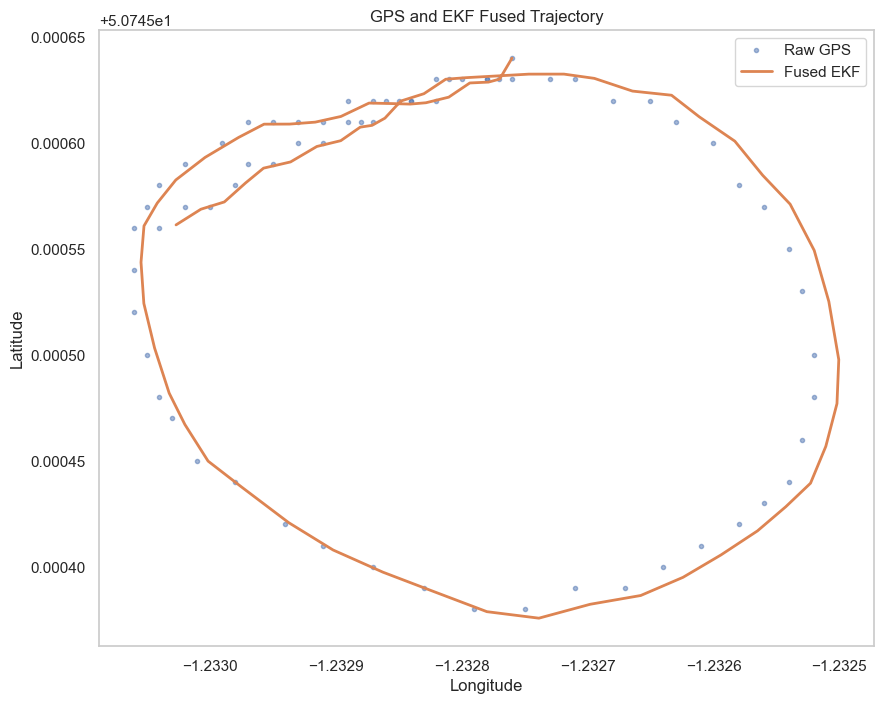

C:\Users\ben\AppData\Local\Temp\ipykernel_36584\456051403.py:378: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PDOP': data_df.groupby('PDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
C:\Users\ben\AppData\Local\Temp\ipykernel_36584\456051403.py:379: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'HDOP': data_df.groupby('HDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
C:\Users\ben\AppData\Local\Temp\ipykernel_36584\456051403.py:380: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pand


=== Difference Statistics ===

E_diff:
  Mean: 0.8450 meters
  Median: 0.8802 meters
  Std Dev: 0.3426 meters
  RMSE: 0.9109 meters
  Max Error: 1.5271 meters

N_diff:
  Mean: -0.0208 meters
  Median: -0.0185 meters
  Std Dev: 0.2822 meters
  RMSE: 0.2809 meters
  Max Error: 0.8575 meters

Total_Error:
  Mean: 0.8904 meters
  Median: 0.9279 meters
  Std Dev: 0.3430 meters
  RMSE: 0.9532 meters
  Max Error: 1.6196 meters

=== DOP-based Error Statistics ===

PDOP-based Total Error:
  PDOP_bin     mean    median       std  count
0      0-5  0.89035  0.927888  0.342998     68
1     5-10      NaN       NaN       NaN      0
2    10-15      NaN       NaN       NaN      0
3    15-20      NaN       NaN       NaN      0
4      20+      NaN       NaN       NaN      0

HDOP-based Total Error:
  HDOP_bin     mean    median       std  count
0      0-5  0.89035  0.927888  0.342998     68
1     5-10      NaN       NaN       NaN      0
2    10-15      NaN       NaN       NaN      0
3    15-20      NaN

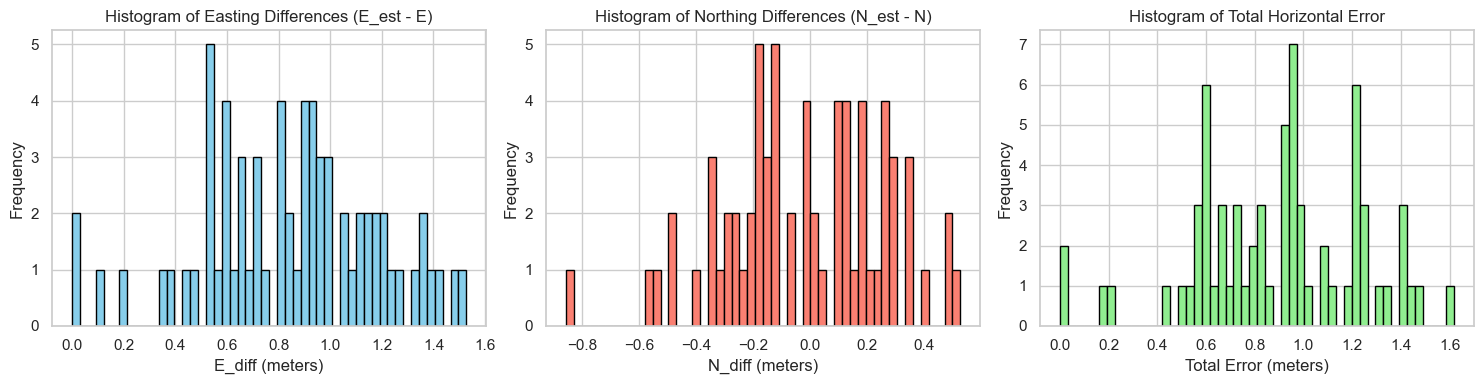

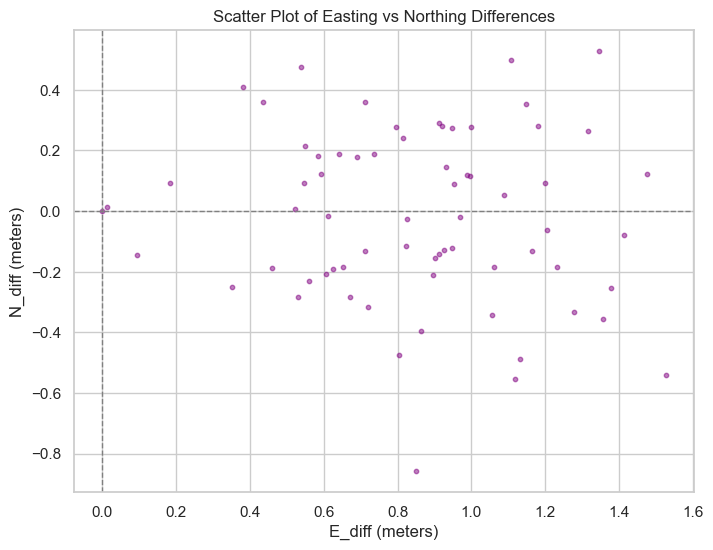

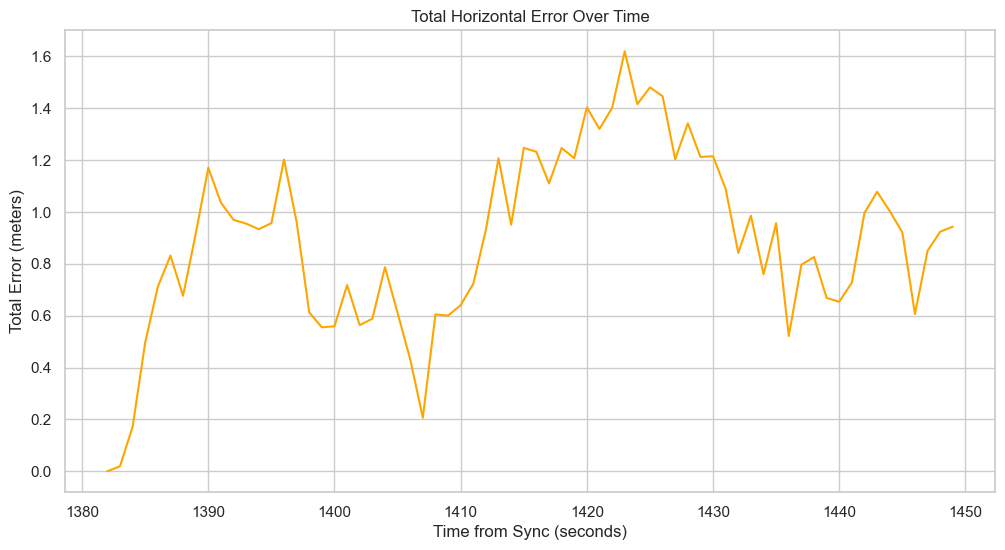

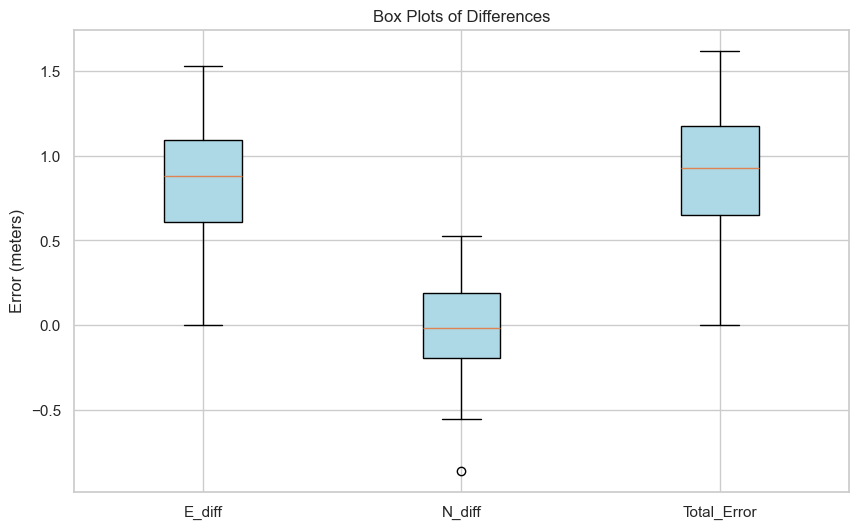

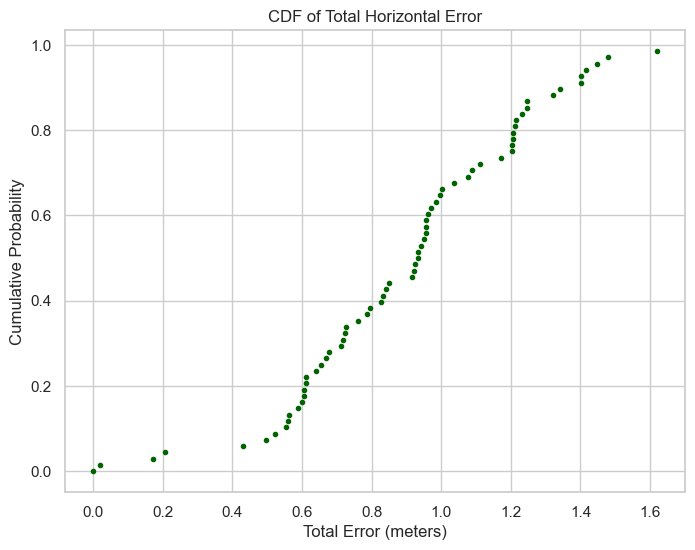

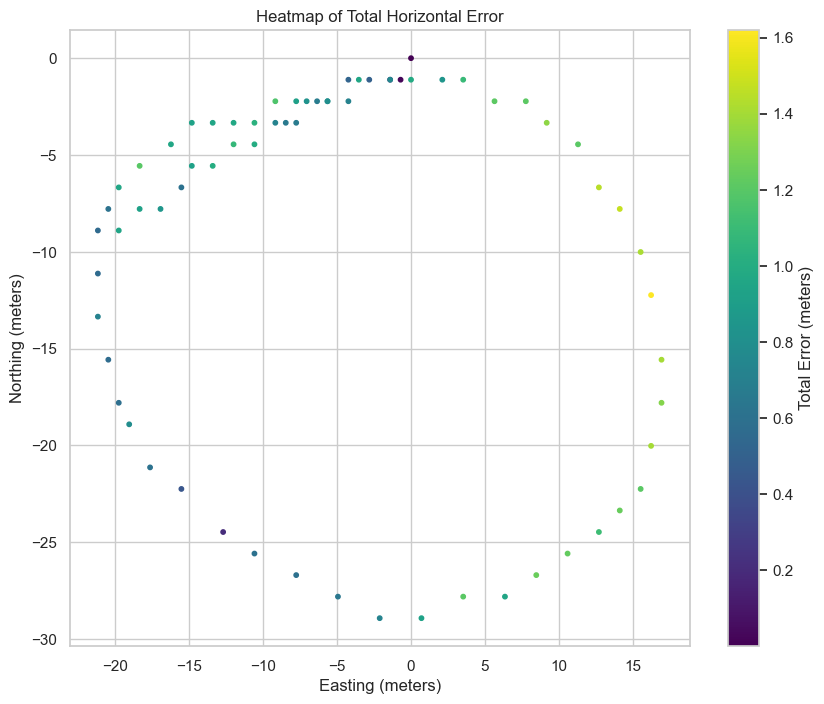

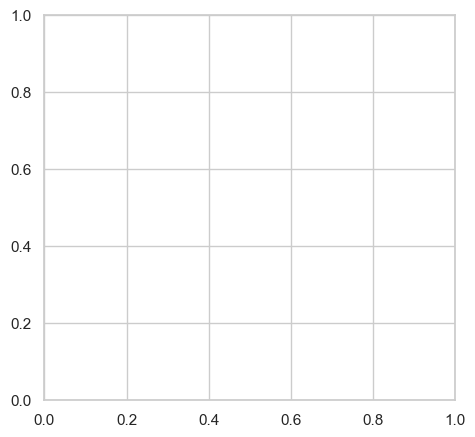

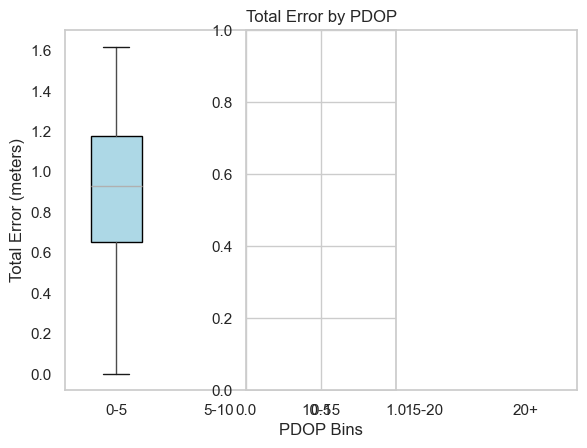

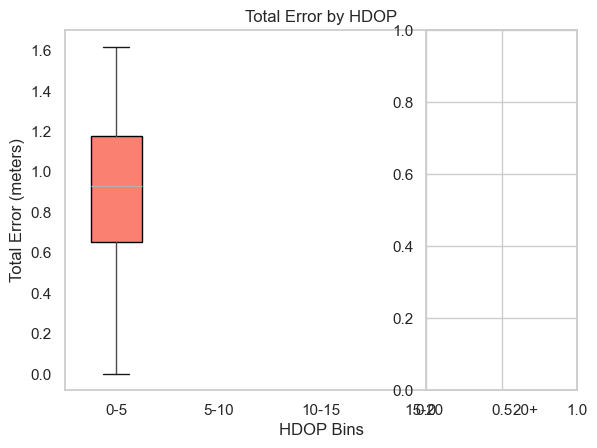

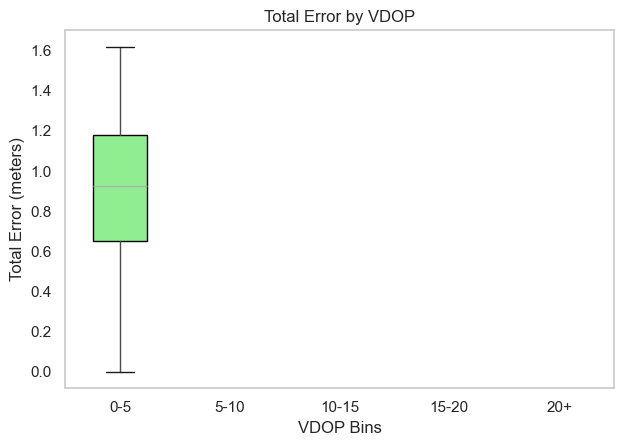

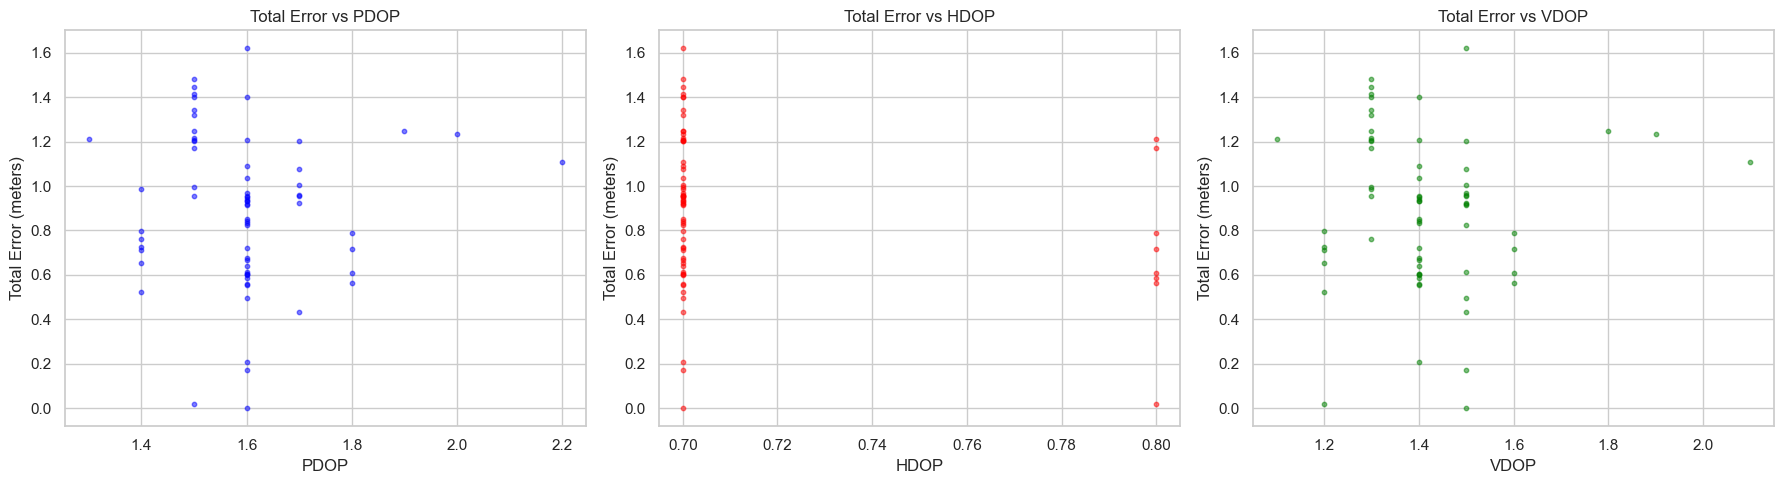

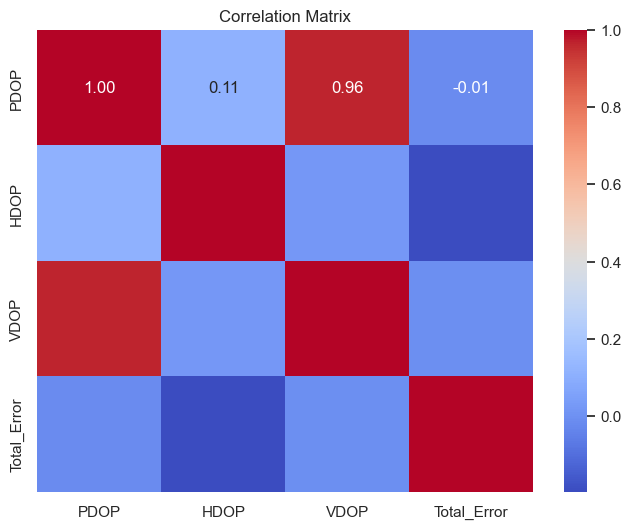

In [8]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

# ================== Configuration ==================
# Boolean flag to enable or disable printing
PRINT_ENABLED = False  # Set to False to disable all print statements

# Function to handle conditional printing
def log(message):
    if PRINT_ENABLED:
        print(message)

# Define experiment name and base directory
experiment_name = '013_Static_port_2'
base_dir = f'{experiment_name}/'
sensor_names = ['wb', '3', '4']

# === Modified ===

# Define file paths for GPS
gps_file = os.path.join(base_dir, f'GPS/GPS_{experiment_name}.csv')

# Define IMU directories and files for all sensors
imu_dirs = {sensor: os.path.join(base_dir, f'IMU/Sensor_{sensor}') for sensor in sensor_names}
accel_files = {sensor: os.path.join(imu_dirs[sensor], f'accel_{experiment_name}.csv') for sensor in sensor_names}
gyro_files = {sensor: os.path.join(imu_dirs[sensor], f'gyro_{experiment_name}.csv') for sensor in sensor_names}

# Load GPS data
gps_columns = ["Lat","Lng","Alt","Acc","Time","Prv","OrgLat","OrgLng","OrgAlt","OrgAcc",
              "Speed","Bearing","AdvPrv","Dly","Dst","AltOfst","Pressure","PressureRef",
              "RefAge","FromBT","Sats","Secs","AccDst","Quality","PDOP","VDOP",
              "HDOP","DGPSAge","DGPSStat","Category","TimeWithTZ","TimeWithMS",
              "DeviceTime","WriteTime","SpeedKPH","SpeedMPH","Battery","time_from_sync"]

log("Loading GPS data...")
gps_df = pd.read_csv(gps_file, usecols=gps_columns)
log(f"GPS Data Loaded: {gps_df.shape[0]} rows")

# Load IMU data (Accelerometer and Gyroscope) from all sensors
imu_columns = ["t", "x", "y", "z", "time_from_sync"]
accel_dfs = {}
gyro_dfs = {}

for sensor in sensor_names:
    log(f"Loading IMU accelerometer data from {sensor}...")
    accel_dfs[sensor] = pd.read_csv(accel_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_accel_{sensor}', 'y': f'y_accel_{sensor}', 'z': f'z_accel_{sensor}'})
    log(f"Accelerometer Data Loaded for {sensor}: {accel_dfs[sensor].shape[0]} rows")
    
    log(f"Loading IMU gyroscope data from {sensor}...")
    gyro_dfs[sensor] = pd.read_csv(gyro_files[sensor], usecols=imu_columns).rename(
        columns={'x': f'x_gyro_{sensor}', 'y': f'y_gyro_{sensor}', 'z': f'z_gyro_{sensor}'})
    log(f"Gyroscope Data Loaded for {sensor}: {gyro_dfs[sensor].shape[0]} rows")

# Check time_from_sync ranges for all sensors
log("\nTime Range in GPS Data:")
log(f"Start: {gps_df['time_from_sync'].min()}, End: {gps_df['time_from_sync'].max()}")

for sensor in sensor_names:
    log(f"\nTime Range in IMU Accelerometer Data for {sensor}:")
    log(f"Start: {accel_dfs[sensor]['time_from_sync'].min()}, End: {accel_dfs[sensor]['time_from_sync'].max()}")
    
    log(f"\nTime Range in IMU Gyroscope Data for {sensor}:")
    log(f"Start: {gyro_dfs[sensor]['time_from_sync'].min()}, End: {gyro_dfs[sensor]['time_from_sync'].max()}")

# Convert time_from_sync to numeric if necessary
gps_df['time_from_sync'] = pd.to_numeric(gps_df['time_from_sync'], errors='coerce')
for sensor in sensor_names:
    accel_dfs[sensor]['time_from_sync'] = pd.to_numeric(accel_dfs[sensor]['time_from_sync'], errors='coerce')
    gyro_dfs[sensor]['time_from_sync'] = pd.to_numeric(gyro_dfs[sensor]['time_from_sync'], errors='coerce')

# Sort DataFrames by 'time_from_sync'
gps_df_sorted = gps_df.sort_values('time_from_sync')

for sensor in sensor_names:
    accel_dfs[sensor] = accel_dfs[sensor].sort_values('time_from_sync')
    gyro_dfs[sensor] = gyro_dfs[sensor].sort_values('time_from_sync')

# Merge IMU Accelerometer and Gyroscope Data for each sensor
merged_imu_dfs = {}
for sensor in sensor_names:
    log(f"\nMerging IMU Accelerometer and Gyroscope Data for {sensor}...")
    merged_imu = pd.merge_asof(
        accel_dfs[sensor],
        gyro_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05,  # Adjust tolerance as needed
        suffixes=('_accel', '_gyro')
    )
    # merged_imu = merged_imu.dropna()
    merged_imu_dfs[sensor] = merged_imu
    log(f"IMU Data After Merging for {sensor}: {merged_imu.shape[0]} rows")

# Combine all merged IMU data into a single DataFrame
log("\nCombining IMU data from all sensors...")
combined_imu_df = merged_imu_dfs[sensor_names[0]].copy()
for sensor in sensor_names[1:]:
    combined_imu_df = pd.merge_asof(
        combined_imu_df,
        merged_imu_dfs[sensor],
        on='time_from_sync',
        direction='nearest',
        tolerance=0.05
    )
# combined_imu_df = combined_imu_df.dropna()
log(f"Combined IMU Data: {combined_imu_df.shape[0]} rows")

# Check for duplicates
log("\nChecking for duplicates in 'time_from_sync'...")
gps_duplicates = gps_df_sorted['time_from_sync'].duplicated().any()
imu_duplicates = combined_imu_df['time_from_sync'].duplicated().any()
log(f"GPS duplicates: {gps_duplicates}")
log(f"IMU duplicates: {imu_duplicates}")

# Merge GPS and IMU data based on time_from_sync
log("\nMerging GPS Data with Combined IMU Data...")
data_df = pd.merge_asof(
    gps_df_sorted,
    combined_imu_df,
    on='time_from_sync',
    direction='nearest',
    tolerance=0.05  # Adjust tolerance as needed
)
log(f"Data After Merging GPS and IMU: {data_df.shape[0]} rows")

# Drop rows with NaN values after merging
# data_df = data_df.dropna()
log(f"\nData After Dropping NaNs: {data_df.shape[0]} rows")

# Check if data_df is empty
if data_df.empty:
    log("\nError: Merged DataFrame is empty. No overlapping 'time_from_sync' between GPS and IMU data.")
    sys.exit("Terminating script due to empty merged data.")
else:
    log("\nMerged DataFrame is successfully created.")

# Coordinate Transformation: Convert lat/lon to ENU coordinates
# Define reference point (first GPS measurement)
ref_lat = data_df.iloc[0]['Lat']
ref_lon = data_df.iloc[0]['Lng']
ref_alt = data_df.iloc[0]['Alt']

log(f"\nReference Point for ENU Transformation:\nLat: {ref_lat}, Lng: {ref_lon}, Alt: {ref_alt}")

# Define transformers using pyproj
# LLA to ECEF
transformer_to_ecef = Transformer.from_crs("epsg:4979", "epsg:4978", always_xy=True)
# ECEF to LLA
transformer_to_lla = Transformer.from_crs("epsg:4978", "epsg:4979", always_xy=True)

# Reference point in ECEF
ref_ecef_x, ref_ecef_y, ref_ecef_z = transformer_to_ecef.transform(ref_lon, ref_lat, ref_alt)
ref_ecef = np.array([ref_ecef_x, ref_ecef_y, ref_ecef_z])

# Precompute rotation matrix based on reference latitude and longitude
sin_lat = np.sin(np.deg2rad(ref_lat))
cos_lat = np.cos(np.deg2rad(ref_lat))
sin_lon = np.sin(np.deg2rad(ref_lon))
cos_lon = np.cos(np.deg2rad(ref_lon))

# Rotation matrix from ECEF to ENU
R = np.array([
    [-sin_lon,              cos_lon,             0],
    [-sin_lat * cos_lon,  -sin_lat * sin_lon,    cos_lat],
    [cos_lat * cos_lon,    cos_lat * sin_lon,    sin_lat]
])

# Function to convert lat/lon/alt to ENU
def latlon_to_enu(lat, lon, alt):
    # Convert to ECEF
    x, y, z = transformer_to_ecef.transform(lon, lat, alt)
    # Compute difference vector
    diff = np.array([x, y, z]) - ref_ecef
    # Apply rotation
    enu = R @ diff
    e, n, u = enu
    return e, n, u

# Apply coordinate transformation
log("\nConverting GPS coordinates to ENU...")
enu_coords = data_df.apply(lambda row: latlon_to_enu(row['Lat'], row['Lng'], row['Alt']), axis=1)
data_df['E'], data_df['N'], data_df['U'] = zip(*enu_coords)
log("Coordinate transformation completed.")

# Aggregate Accelerometer Data from All Sensors
log("\nAggregating accelerometer data from all sensors...")
accel_columns = [f'x_accel_{sensor}' for sensor in sensor_names] + \
                [f'y_accel_{sensor}' for sensor in sensor_names] + \
                [f'z_accel_{sensor}' for sensor in sensor_names]

# Compute average accelerations
data_df['x_accel_avg'] = data_df[[f'x_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
data_df['y_accel_avg'] = data_df[[f'y_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
data_df['z_accel_avg'] = data_df[[f'z_accel_{sensor}' for sensor in sensor_names]].mean(axis=1)
log("Aggregated accelerometer data computed.")

# Define the state vector [E, N, V_E, V_N]
state = np.array([data_df.iloc[0]['E'],
                  data_df.iloc[0]['N'],
                  0,
                  0]).reshape(4,1)

# Define covariance matrices
P = np.eye(4) * 500  # Initial state covariance
Q = np.eye(4)        # Process noise covariance
# R_gps will be dynamically set based on HDOP ( === Modified === )
# R_imu is not used in this implementation

# Define identity matrix
I = np.eye(4)

# Store estimates
estimated_states = []

# === Added ===
# Base measurement noise covariance (assuming HDOP=1 corresponds to R_base)
R_base = np.eye(2) * 10  # You may need to calibrate this based on actual GPS accuracy
# === End of Added ===

log("\nStarting Extended Kalman Filter (EKF) processing with aggregated IMU data and DOP incorporation...")
# EKF Implementation
for idx in range(len(data_df)):
    row = data_df.iloc[idx]
    
    # Time step
    if idx == 0:
        dt = 0.01  # Assume initial dt (e.g., 100Hz)
    else:
        dt = row['time_from_sync'] - data_df.iloc[idx - 1]['time_from_sync']
        if dt <= 0:
            dt = 0.01  # Handle non-positive dt
    
    # State Transition Matrix
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # Control Input (from aggregated IMU: average accelerometer data)
    # Assuming accel_x_avg and accel_y_avg are in m/s^2
    a_E = row['x_accel_avg']  # Aggregated accelerometer x-axis
    a_N = row['y_accel_avg']  # Aggregated accelerometer y-axis
    u = np.array([0.5 * a_E * dt**2,
                  0.5 * a_N * dt**2,
                  a_E * dt,
                  a_N * dt]).reshape(4,1)
    
    # Process model prediction
    state = F @ state + u
    P = F @ P @ F.T + Q
    
    # === Modified ===
    # Dynamically set R_gps based on HDOP
    # Assuming R_gps = (HDOP)^2 * R_base
    current_hdop = row['HDOP']
    R_gps = (current_hdop ** 2) * R_base
    # Alternatively, you can scale differently based on empirical data
    # R_gps = R_base * (1 + current_hdop)
    # === End of Modified ===
    
    # Measurement Update
    # GPS provides E and N
    z = np.array([row['E'], row['N']]).reshape(2,1)
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    
    y_innovation = z - H @ state  # Innovation
    S = H @ P @ H.T + R_gps
    K = P @ H.T @ np.linalg.inv(S)
    
    state = state + K @ y_innovation
    P = (I - K @ H) @ P
    
    # Store the estimated state
    estimated_states.append(state.flatten())
    
    # Optional: Print progress
    if PRINT_ENABLED and idx % 1000 == 0 and idx != 0:
        log(f"Processed {idx} rows...")

log("EKF processing completed.")

# Convert estimated states to DataFrame
estimated_states = np.array(estimated_states)
data_df['E_est'] = estimated_states[:,0]
data_df['N_est'] = estimated_states[:,1]

# Function to convert ENU back to lat/lon/alt
def enu_to_latlon(e, n, u):
    # Apply inverse rotation
    diff = np.array([e, n, u])
    ecef_diff = R.T @ diff
    # Compute ECEF coordinates
    x = ref_ecef[0] + ecef_diff[0]
    y = ref_ecef[1] + ecef_diff[1]
    z = ref_ecef[2] + ecef_diff[2]
    # Convert back to LLA
    lon, lat, alt = transformer_to_lla.transform(x, y, z)
    return lat, lon, alt

# Convert ENU back to lat/lon for plotting
log("\nConverting estimated ENU coordinates back to Latitude and Longitude...")
latlon_est = data_df.apply(lambda row: enu_to_latlon(row['E_est'], row['N_est'], row['U']), axis=1)
data_df['Lat_est'], data_df['Lng_est'], data_df['Alt_est'] = zip(*latlon_est)
log("Conversion completed.")

# Plotting
log("\nPlotting the trajectories...")
plt.figure(figsize=(10,8))
plt.plot(data_df['Lng'], data_df['Lat'], label='Raw GPS', marker='.', linestyle='None', alpha=0.5)
plt.plot(data_df['Lng_est'], data_df['Lat_est'], label='Fused EKF', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS and EKF Fused Trajectory')
plt.legend()
plt.grid()
plt.show()

# ================== Difference Statistics and Visualization ==================

# Ensure that the necessary columns are present
required_columns = ['E', 'N', 'E_est', 'N_est', 'PDOP', 'HDOP', 'VDOP']
for col in required_columns:
    if col not in data_df.columns:
        log(f"Error: Column '{col}' not found in data_df.")
        sys.exit(f"Terminating script due to missing column: {col}")

# Calculate differences in Easting and Northing
data_df['E_diff'] = data_df['E_est'] - data_df['E']
data_df['N_diff'] = data_df['N_est'] - data_df['N']

# Calculate total horizontal error
data_df['Total_Error'] = np.sqrt(data_df['E_diff']**2 + data_df['N_diff']**2)

# === Added ===
# Analyze how DOP metrics correlate with estimation errors

# Binning PDOP, HDOP, VDOP for analysis
data_df['PDOP_bin'] = pd.cut(data_df['PDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
data_df['HDOP_bin'] = pd.cut(data_df['HDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
data_df['VDOP_bin'] = pd.cut(data_df['VDOP'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
# === End of Added ===

# Compute statistics
statistics = {
    'E_diff': {
        'Mean': data_df['E_diff'].mean(),
        'Median': data_df['E_diff'].median(),
        'Std Dev': data_df['E_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['E_diff']**2)),
        'Max Error': data_df['E_diff'].abs().max()
    },
    'N_diff': {
        'Mean': data_df['N_diff'].mean(),
        'Median': data_df['N_diff'].median(),
        'Std Dev': data_df['N_diff'].std(),
        'RMSE': np.sqrt(np.mean(data_df['N_diff']**2)),
        'Max Error': data_df['N_diff'].abs().max()
    },
    'Total_Error': {
        'Mean': data_df['Total_Error'].mean(),
        'Median': data_df['Total_Error'].median(),
        'Std Dev': data_df['Total_Error'].std(),
        'RMSE': np.sqrt(np.mean(data_df['Total_Error']**2)),
        'Max Error': data_df['Total_Error'].max()
    }
}

# === Added ===
# Compute additional statistics relating DOP metrics to errors

dop_statistics = {
    'PDOP': data_df.groupby('PDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
    'HDOP': data_df.groupby('HDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index(),
    'VDOP': data_df.groupby('VDOP_bin')['Total_Error'].agg(['mean', 'median', 'std', 'count']).reset_index()
}
# === End of Added ===

# Print statistics if printing is enabled
if PRINT_ENABLED:
    print("\n=== Difference Statistics ===")
    for key, stats in statistics.items():
        print(f"\n{key}:")
        for stat_name, value in stats.items():
            print(f"  {stat_name}: {value:.4f} meters")
    
    print("\n=== DOP-based Error Statistics ===")
    for dop_metric, stats_df in dop_statistics.items():
        print(f"\n{dop_metric}-based Total Error:")
        print(stats_df)
# === End of Added ===

# Alternatively, always print statistics
print("\n=== Difference Statistics ===")
for key, stats in statistics.items():
    print(f"\n{key}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f} meters")

# === Added ===
print("\n=== DOP-based Error Statistics ===")
for dop_metric, stats_df in dop_statistics.items():
    print(f"\n{dop_metric}-based Total Error:")
    print(stats_df)
# === End of Added ===

# Visualization

# 1. Histograms of E_diff, N_diff, and Total_Error
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(data_df['E_diff'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Easting Differences (E_est - E)')
plt.xlabel('E_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data_df['N_diff'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Northing Differences (N_est - N)')
plt.xlabel('N_diff (meters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data_df['Total_Error'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Scatter Plot of E_diff vs N_diff
plt.figure(figsize=(8, 6))
plt.scatter(data_df['E_diff'], data_df['N_diff'], alpha=0.5, s=10, c='purple')
plt.title('Scatter Plot of Easting vs Northing Differences')
plt.xlabel('E_diff (meters)')
plt.ylabel('N_diff (meters)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

# 3. Time Series of Total Error
plt.figure(figsize=(12, 6))
plt.plot(data_df['time_from_sync'], data_df['Total_Error'], color='orange')
plt.title('Total Horizontal Error Over Time')
plt.xlabel('Time from Sync (seconds)')
plt.ylabel('Total Error (meters)')
plt.grid(True)
plt.show()

# 4. Box Plots for E_diff, N_diff, and Total_Error
plt.figure(figsize=(10, 6))
box_data = [data_df['E_diff'], data_df['N_diff'], data_df['Total_Error']]
plt.boxplot(box_data, labels=['E_diff', 'N_diff', 'Total_Error'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Box Plots of Differences')
plt.ylabel('Error (meters)')
plt.grid(True, axis='y')
plt.show()

# 5. Cumulative Distribution Function (CDF) of Total Error
sorted_errors = np.sort(data_df['Total_Error'])
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none', color='darkgreen')
plt.title('CDF of Total Horizontal Error')
plt.xlabel('Total Error (meters)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# 6. Error Heatmap (Optional)
# If you want to visualize the spatial distribution of errors
plt.figure(figsize=(10, 8))
sc = plt.scatter(data_df['E'], data_df['N'], c=data_df['Total_Error'], cmap='viridis', s=10)
plt.colorbar(sc, label='Total Error (meters)')
plt.title('Heatmap of Total Horizontal Error')
plt.xlabel('Easting (meters)')
plt.ylabel('Northing (meters)')
plt.grid(True)
plt.show()

# === Added ===
# Additional Visualizations: DOP vs Total Error

# 7. Box Plots of Total Error across DOP Bins
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
data_df.boxplot(column='Total_Error', by='PDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue'))
plt.title('Total Error by PDOP')
plt.suptitle('')
plt.xlabel('PDOP Bins')
plt.ylabel('Total Error (meters)')

plt.subplot(1, 3, 2)
data_df.boxplot(column='Total_Error', by='HDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='salmon'))
plt.title('Total Error by HDOP')
plt.suptitle('')
plt.xlabel('HDOP Bins')
plt.ylabel('Total Error (meters)')

plt.subplot(1, 3, 3)
data_df.boxplot(column='Total_Error', by='VDOP_bin', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightgreen'))
plt.title('Total Error by VDOP')
plt.suptitle('')
plt.xlabel('VDOP Bins')
plt.ylabel('Total Error (meters)')

plt.tight_layout()
plt.show()

# 8. Scatter Plots of DOP Metrics vs Total Error
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(data_df['PDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='blue')
plt.title('Total Error vs PDOP')
plt.xlabel('PDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(data_df['HDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='red')
plt.title('Total Error vs HDOP')
plt.xlabel('HDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(data_df['VDOP'], data_df['Total_Error'], alpha=0.5, s=10, c='green')
plt.title('Total Error vs VDOP')
plt.xlabel('VDOP')
plt.ylabel('Total Error (meters)')
plt.grid(True)

plt.tight_layout()
plt.show()
# === End of Added ===

# 9. Correlation Matrix
import seaborn as sns

corr_matrix = data_df[['PDOP', 'HDOP', 'VDOP', 'Total_Error']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
